In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from wordcloud import WordCloud, STOPWORDS
import statistics
import numpy as np

import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [79]:
botometer_tweets = pd.read_csv('./Tweet-Reader/botometer-feedback-2019/botometer-feedback-2019.csv')
botwiki_tweets = pd.read_csv('./Tweet-Reader/botwiki-2019/botwiki-2019.csv')
celebrity_tweets = pd.read_csv('./Tweet-Reader/celebrity-2019/celebrity-2019.csv')
midterm_tweets = pd.read_csv('./Tweet-Reader/midterm-2018/midterm-2018.csv')
political_tweets = pd.read_csv('./Tweet-Reader/political-bots-2019/political-bots-2019.csv')
pronbots_tweets = pd.read_csv('./Tweet-Reader/pronbots-2019/pronbots-2019.csv')
vendor_tweets = pd.read_csv('./Tweet-Reader/vendor-purchased-2019/vendor-purchased-2019.csv')
verified_tweets = pd.read_csv('./Tweet-Reader/verified-2019/verified-2019.csv')

In [80]:
tweets_arr = (botometer_tweets, botwiki_tweets, celebrity_tweets, midterm_tweets, political_tweets, pronbots_tweets, vendor_tweets, verified_tweets)

In [81]:
tweets_arr = tuple(map(lambda x: x.dropna(), tweets_arr))

In [76]:
botometer_tweets = botometer_tweets.dropna()
botwiki_tweets = botwiki_tweets.dropna()
celebrity_tweets = celebrity_tweets.dropna()
midterm_tweets = midterm_tweets.dropna()
political_tweets = political_tweets.dropna()
pronbots_tweets = pronbots_tweets.dropna()
vendor_tweets = vendor_tweets.dropna()
verified_tweets = verified_tweets.dropna()

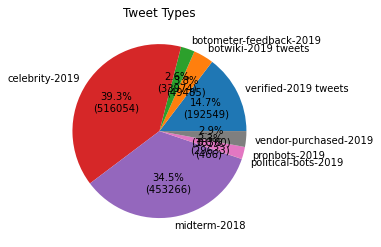

In [62]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

data = [len(verified_tweets), len(botwiki_tweets), len(botometer_tweets), len(celebrity_tweets), len(midterm_tweets), len(political_tweets), len(pronbots_tweets), len(vendor_tweets)]
plt.pie(data, 
        labels = ['verified-2019 tweets', 'botwiki-2019 tweets', 'botometer-feedback-2019', 'celebrity-2019', 'midterm-2018', 'political-bots-2019', 'pronbots-2019', 'vendor-purchased-2019'],
        autopct = lambda pct: func(pct, data))
plt.title('Tweet Types')
plt.show()

In [48]:
def callForEach(array, function):
    for i in array:
        i = function(i)

In [82]:
def fixTime(tweets):
    newDates = []
    for oldDate in tweets['Date']:
        trimmedDate = oldDate
        if trimmedDate.find('+') != -1:
            trimmedDate = trimmedDate[0:trimmedDate.find('+')]
        newDates.append(datetime.datetime.strptime(trimmedDate, '%Y-%m-%d %H:%M:%S'))
    newDates = pd.DataFrame(newDates, columns=['Date'])
    tweets['Date'] = newDates
    return tweets

In [83]:
#callForEach(tweets_arr, fixTime)
tweets_arr = tuple(map(lambda x: fixTime(x), tweets_arr))

/tmp/ipykernel_4023/865759047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['Date'] = newDates


In [89]:
users_arr = tuple(map(lambda x: pd.DataFrame(x.User_ID.unique(), columns = ["ID"]), tweets_arr))

In [78]:
botmeter_tweets = fixTime(botometer_tweets)
botwiki_tweets = fixTime(botwiki_tweets)
celebrity_tweets = fixTime(celebrity_tweets)
midterm_tweets = fixTime(midterm_tweets)
political_tweets = fixTime(political_tweets)
pronbots_tweets = fixTime(pronbots_tweets)
vendor_tweets = fixTime(vendor_tweets)
verified_tweets = fixTime(verified_tweets)

/tmp/ipykernel_4023/865759047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['Date'] = newDates


In [54]:
botmeter_users = pd.DataFrame(botmeter_tweets.User_ID.unique(), columns = ["ID"])
botwiki_users = pd.DataFrame(botwiki_tweets.User_ID.unique(), columns = ["ID"])
celebrity_users = pd.DataFrame(celebrity_tweets.User_ID.unique(), columns = ["ID"])
midterm_users = pd.DataFrame(midterm_tweets.User_ID.unique(), columns = ["ID"])
political_users = pd.DataFrame(political_tweets.User_ID.unique(), columns = ["ID"])
pronbots_users = pd.DataFrame(pronbots_tweets.User_ID.unique(), columns = ["ID"])
vendor_users = pd.DataFrame(vendor_tweets.User_ID.unique(), columns = ["ID"])
verified_users = pd.DataFrame(verified_tweets.User_ID.unique(), columns = ["ID"])

In [55]:
users_arr = [botmeter_users, botwiki_users, celebrity_users, midterm_users, political_users, pronbots_users, vendor_users, verified_users]

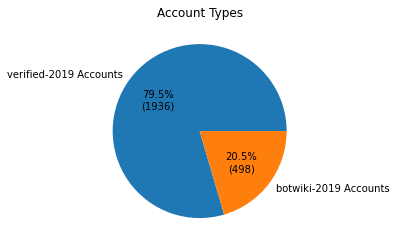

In [9]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

data = [len(verified_users), len(botwiki_users)]
plt.pie(data, 
        labels = ['verified-2019 Accounts', 'botwiki-2019 Accounts'],
        autopct = lambda pct: func(pct, data))
plt.title('Account Types')
plt.show()

In [10]:
def calculateAverageTweetLength(users, tweets):
    curr_ID = users['ID'][0]
    user_index = 0
    tweet_count = 0
    char_count = 0

    users['Average_Tweet_Length'] = 0
    for index, tweet in tweets.iterrows():
        if curr_ID != tweet['User_ID']:
            if tweet_count != 0:
                users['Average_Tweet_Length'][user_index] = char_count / tweet_count
            user_index += 1
            tweet_count = 0
            char_count = 0
            curr_ID = tweet['User_ID']
        tweet_count += 1
        char_count += len(tweet['Text'])

    if tweet_count != 0:
        users['Average_Tweet_Length'][user_index] = char_count / tweet_count
    
    return users

In [35]:
botwiki_users = calculateAverageTweetLength(botwiki_users, botwiki_tweets)
verified_users = calculateAverageTweetLength(verified_users, verified_tweets)

/tmp/ipykernel_6437/3490059406.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users['Average_Tweet_Length'][user_index] = char_count / tweet_count
/tmp/ipykernel_6437/3490059406.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users['Average_Tweet_Length'][user_index] = char_count / tweet_count


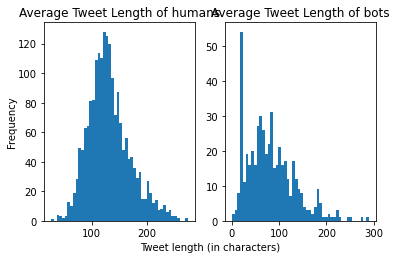

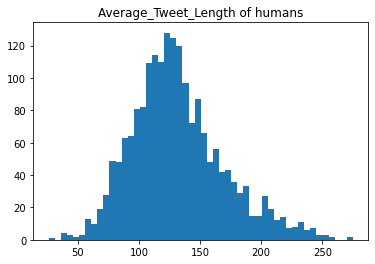

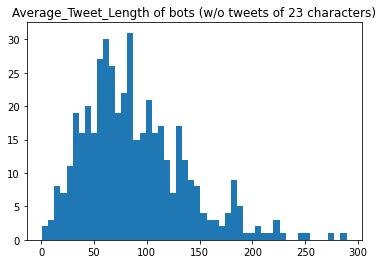

In [13]:
n_bins = 50

fig, axs = plt.subplots(1, 2, tight_layout=True)
axs[0].hist(verified_users['Average_Tweet_Length'], bins=n_bins)
axs[0].set_title('Average Tweet Length of humans')
axs[1].hist(botwiki_users['Average_Tweet_Length'], bins=n_bins)
axs[1].set_title('Average Tweet Length of bots')
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel('Tweet length (in characters)')
plt.ylabel('Frequency')
plt.show()

plt.hist(verified_users['Average_Tweet_Length'], bins=n_bins)
plt.title('Average_Tweet_Length of humans')
plt.show()

temp = botwiki_users[botwiki_users['Average_Tweet_Length'] != 23]
plt.hist(temp['Average_Tweet_Length'], bins=n_bins)
plt.title('Average_Tweet_Length of bots (w/o tweets of 23 characters)')
plt.show()


The peak in human tweets is likely due to Twitter's previous 140 character limit. <br />
Peak in bots is 23, images with no text <br />
Tweets also go beyond the current 280 character limit due to links, mentions, and images.

In [14]:
def calculateTweetFrequency(users, tweets):
    curr_ID = users['ID'][0]
    user_index = 0
    tweet_count = 0
    start_date = tweets['Date'][0]
    end_date = tweets['Date'][0]

    users['Average_Tweets_Per_Day'] = 0
    for index, tweet in tweets.iterrows():
        if curr_ID != tweet['User_ID']:
            if tweet_count != 0:
                users['Average_Tweets_Per_Day'][user_index] = tweet_count / ((start_date - end_date).days + 1)
            user_index += 1
            tweet_count = 0
            curr_ID = tweet['User_ID']
            start_date = tweet['Date']
        tweet_count += 1
        end_date = tweet['Date']

    if tweet_count != 0:
        users['Average_Tweets_Per_Day'][user_index] = tweet_count / ((start_date - end_date).days + 1)
    
    return users

Slight bias introduced as the timeframe is based on most and least recent tweets, two guaranteed points.

In [36]:
verified_users = calculateTweetFrequency(verified_users, verified_tweets)
botwiki_users = calculateTweetFrequency(botwiki_users, botwiki_tweets)

/tmp/ipykernel_6437/2333451514.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users['Average_Tweets_Per_Day'][user_index] = tweet_count / ((start_date - end_date).days + 1)
/tmp/ipykernel_6437/2333451514.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users['Average_Tweets_Per_Day'][user_index] = tweet_count / ((start_date - end_date).days + 1)


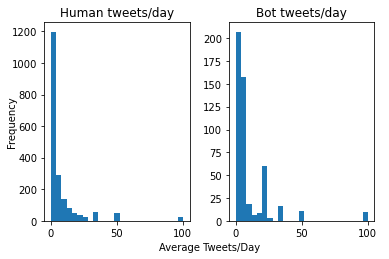

In [17]:
n_bins = 25

fig, axs = plt.subplots(1, 2, tight_layout=True)
axs[0].hist(verified_users['Average_Tweets_Per_Day'], bins=n_bins)
axs[0].set_title('Human tweets/day')
axs[1].hist(botwiki_users['Average_Tweets_Per_Day'], bins=n_bins)
axs[1].set_title('Bot tweets/day')
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel('Average Tweets/Day')
plt.ylabel('Frequency')
plt.show()

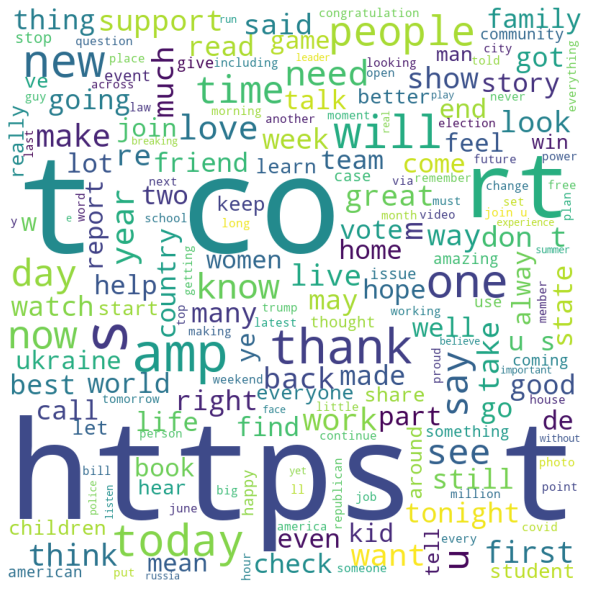

In [18]:
words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in verified_tweets['Text']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

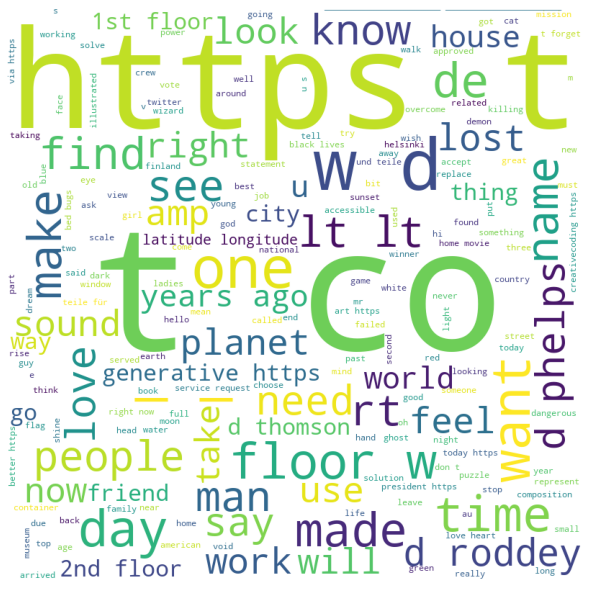

In [19]:
words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in botwiki_tweets['Text']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Sentiment Analysis
https://www.red-gate.com/simple-talk/development/data-science-development/sentiment-analysis-python/

In [20]:
def sentimentAnalysis(tweets):
    tweets["row_id"] = tweets.index + 1

    #create a new data frame with "id" and "comment" fields
    df_subset = tweets[['row_id', 'Text']].copy()
    #data clean-up
    #remove all non-aphabet characters
    df_subset['Text'] = df_subset['Text'].str.replace("[^a-zA-Z#]", " ")
    #covert to lower-case
    df_subset['Text'] = df_subset['Text'].str.casefold()
    
    # set up empty dataframe for staging output
    df1=pd.DataFrame()
    df1['row_id']=['99999999999']
    df1['sentiment_type']='NA999NA'
    df1['sentiment_score']=0
    
    print('Processing sentiment analysis...')
    sid = SentimentIntensityAnalyzer()
    t_df = df1

    total_tweets = len(df_subset)
    for index, row in df_subset.iterrows():
        scores = sid.polarity_scores(row[1])
        for key, value in scores.items():
            temp = [key,value,row[0]]
            df1['row_id']=row[0]
            df1['sentiment_type']=key
            df1['sentiment_score']=value
            t_df=t_df.append(df1)
        print(str(index) + " out of " + str(total_tweets))
    #remove dummy row with row_id = 99999999999
    t_df_cleaned = t_df[t_df.row_id != '99999999999']
    #remove duplicates if any exist
    t_df_cleaned = t_df_cleaned.drop_duplicates()
    # only keep rows where sentiment_type = compound
    t_df_cleaned = t_df[t_df.sentiment_type == 'compound']
    
    return pd.merge(tweets, t_df_cleaned, on='row_id', how='inner')

In [21]:
verified_tweets = sentimentAnalysis(verified_tweets)
verified_tweets.to_csv('./verified-2019_tweets_processed.csv')

/tmp/ipykernel_6437/2257099055.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df_subset['Text'] = df_subset['Text'].str.replace("[^a-zA-Z#]", " ")


Processing sentiment analysis...
0 out of 192549
1 out of 192549
2 out of 192549
3 out of 192549
4 out of 192549
5 out of 192549
6 out of 192549
7 out of 192549
8 out of 192549
9 out of 192549
10 out of 192549
11 out of 192549
12 out of 192549
13 out of 192549
14 out of 192549
15 out of 192549
16 out of 192549
17 out of 192549
18 out of 192549
19 out of 192549
20 out of 192549
21 out of 192549
22 out of 192549
23 out of 192549
24 out of 192549
25 out of 192549
26 out of 192549
27 out of 192549
28 out of 192549
29 out of 192549
30 out of 192549
31 out of 192549
32 out of 192549
33 out of 192549
34 out of 192549
35 out of 192549
36 out of 192549
37 out of 192549
38 out of 192549
39 out of 192549
40 out of 192549
41 out of 192549
42 out of 192549
43 out of 192549
44 out of 192549
45 out of 192549
46 out of 192549
47 out of 192549
48 out of 192549
49 out of 192549
50 out of 192549
51 out of 192549
52 out of 192549
53 out of 192549
54 out of 192549
55 out of 192549
56 out of 192549
57 out o

472 out of 192549
473 out of 192549
474 out of 192549
475 out of 192549
476 out of 192549
477 out of 192549
478 out of 192549
479 out of 192549
480 out of 192549
481 out of 192549
482 out of 192549
483 out of 192549
484 out of 192549
485 out of 192549
486 out of 192549
487 out of 192549
488 out of 192549
489 out of 192549
490 out of 192549
491 out of 192549
492 out of 192549
493 out of 192549
494 out of 192549
495 out of 192549
496 out of 192549
497 out of 192549
498 out of 192549
499 out of 192549
500 out of 192549
501 out of 192549
502 out of 192549
503 out of 192549
504 out of 192549
505 out of 192549
506 out of 192549
507 out of 192549
508 out of 192549
509 out of 192549
510 out of 192549
511 out of 192549
512 out of 192549
513 out of 192549
514 out of 192549
515 out of 192549
516 out of 192549
517 out of 192549
518 out of 192549
519 out of 192549
520 out of 192549
521 out of 192549
522 out of 192549
523 out of 192549
524 out of 192549
525 out of 192549
526 out of 192549
527 out of

940 out of 192549
941 out of 192549
942 out of 192549
943 out of 192549
944 out of 192549
945 out of 192549
946 out of 192549
947 out of 192549
948 out of 192549
949 out of 192549
950 out of 192549
951 out of 192549
952 out of 192549
953 out of 192549
954 out of 192549
955 out of 192549
956 out of 192549
957 out of 192549
958 out of 192549
959 out of 192549
960 out of 192549
961 out of 192549
962 out of 192549
963 out of 192549
964 out of 192549
965 out of 192549
966 out of 192549
967 out of 192549
968 out of 192549
969 out of 192549
970 out of 192549
971 out of 192549
972 out of 192549
973 out of 192549
974 out of 192549
975 out of 192549
976 out of 192549
977 out of 192549
978 out of 192549
979 out of 192549
980 out of 192549
981 out of 192549
982 out of 192549
983 out of 192549
984 out of 192549
985 out of 192549
986 out of 192549
987 out of 192549
988 out of 192549
989 out of 192549
990 out of 192549
991 out of 192549
992 out of 192549
993 out of 192549
994 out of 192549
995 out of

1458 out of 192549
1459 out of 192549
1460 out of 192549
1461 out of 192549
1462 out of 192549
1463 out of 192549
1464 out of 192549
1465 out of 192549
1466 out of 192549
1467 out of 192549
1468 out of 192549
1469 out of 192549
1470 out of 192549
1471 out of 192549
1472 out of 192549
1473 out of 192549
1474 out of 192549
1475 out of 192549
1476 out of 192549
1477 out of 192549
1478 out of 192549
1479 out of 192549
1480 out of 192549
1481 out of 192549
1482 out of 192549
1483 out of 192549
1484 out of 192549
1485 out of 192549
1486 out of 192549
1487 out of 192549
1488 out of 192549
1489 out of 192549
1490 out of 192549
1491 out of 192549
1492 out of 192549
1493 out of 192549
1494 out of 192549
1495 out of 192549
1496 out of 192549
1497 out of 192549
1498 out of 192549
1499 out of 192549
1500 out of 192549
1501 out of 192549
1502 out of 192549
1503 out of 192549
1504 out of 192549
1505 out of 192549
1506 out of 192549
1507 out of 192549
1508 out of 192549
1509 out of 192549
1510 out of 

1966 out of 192549
1967 out of 192549
1968 out of 192549
1969 out of 192549
1970 out of 192549
1971 out of 192549
1972 out of 192549
1973 out of 192549
1974 out of 192549
1975 out of 192549
1976 out of 192549
1977 out of 192549
1978 out of 192549
1979 out of 192549
1980 out of 192549
1981 out of 192549
1982 out of 192549
1983 out of 192549
1984 out of 192549
1985 out of 192549
1986 out of 192549
1987 out of 192549
1988 out of 192549
1989 out of 192549
1990 out of 192549
1991 out of 192549
1992 out of 192549
1993 out of 192549
1994 out of 192549
1995 out of 192549
1996 out of 192549
1997 out of 192549
1998 out of 192549
1999 out of 192549
2000 out of 192549
2001 out of 192549
2002 out of 192549
2003 out of 192549
2004 out of 192549
2005 out of 192549
2006 out of 192549
2007 out of 192549
2008 out of 192549
2009 out of 192549
2010 out of 192549
2011 out of 192549
2012 out of 192549
2013 out of 192549
2014 out of 192549
2015 out of 192549
2016 out of 192549
2017 out of 192549
2018 out of 

2462 out of 192549
2463 out of 192549
2464 out of 192549
2465 out of 192549
2466 out of 192549
2467 out of 192549
2468 out of 192549
2469 out of 192549
2470 out of 192549
2471 out of 192549
2472 out of 192549
2473 out of 192549
2474 out of 192549
2475 out of 192549
2476 out of 192549
2477 out of 192549
2478 out of 192549
2479 out of 192549
2480 out of 192549
2481 out of 192549
2482 out of 192549
2483 out of 192549
2484 out of 192549
2485 out of 192549
2486 out of 192549
2487 out of 192549
2488 out of 192549
2489 out of 192549
2490 out of 192549
2491 out of 192549
2492 out of 192549
2493 out of 192549
2494 out of 192549
2495 out of 192549
2496 out of 192549
2497 out of 192549
2498 out of 192549
2499 out of 192549
2500 out of 192549
2501 out of 192549
2502 out of 192549
2503 out of 192549
2504 out of 192549
2505 out of 192549
2506 out of 192549
2507 out of 192549
2508 out of 192549
2509 out of 192549
2510 out of 192549
2511 out of 192549
2512 out of 192549
2513 out of 192549
2514 out of 

2932 out of 192549
2933 out of 192549
2934 out of 192549
2935 out of 192549
2936 out of 192549
2937 out of 192549
2938 out of 192549
2939 out of 192549
2940 out of 192549
2941 out of 192549
2942 out of 192549
2943 out of 192549
2944 out of 192549
2945 out of 192549
2946 out of 192549
2947 out of 192549
2948 out of 192549
2949 out of 192549
2950 out of 192549
2951 out of 192549
2952 out of 192549
2953 out of 192549
2954 out of 192549
2955 out of 192549
2956 out of 192549
2957 out of 192549
2958 out of 192549
2959 out of 192549
2960 out of 192549
2961 out of 192549
2962 out of 192549
2963 out of 192549
2964 out of 192549
2965 out of 192549
2966 out of 192549
2967 out of 192549
2968 out of 192549
2969 out of 192549
2970 out of 192549
2971 out of 192549
2972 out of 192549
2973 out of 192549
2974 out of 192549
2975 out of 192549
2976 out of 192549
2977 out of 192549
2978 out of 192549
2979 out of 192549
2980 out of 192549
2981 out of 192549
2982 out of 192549
2983 out of 192549
2984 out of 

3402 out of 192549
3403 out of 192549
3404 out of 192549
3405 out of 192549
3406 out of 192549
3407 out of 192549
3408 out of 192549
3409 out of 192549
3410 out of 192549
3411 out of 192549
3412 out of 192549
3413 out of 192549
3414 out of 192549
3415 out of 192549
3416 out of 192549
3417 out of 192549
3418 out of 192549
3419 out of 192549
3420 out of 192549
3421 out of 192549
3422 out of 192549
3423 out of 192549
3424 out of 192549
3425 out of 192549
3426 out of 192549
3427 out of 192549
3428 out of 192549
3429 out of 192549
3430 out of 192549
3431 out of 192549
3432 out of 192549
3433 out of 192549
3434 out of 192549
3435 out of 192549
3436 out of 192549
3437 out of 192549
3438 out of 192549
3439 out of 192549
3440 out of 192549
3441 out of 192549
3442 out of 192549
3443 out of 192549
3444 out of 192549
3445 out of 192549
3446 out of 192549
3447 out of 192549
3448 out of 192549
3449 out of 192549
3450 out of 192549
3451 out of 192549
3452 out of 192549
3453 out of 192549
3454 out of 

3878 out of 192549
3879 out of 192549
3880 out of 192549
3881 out of 192549
3882 out of 192549
3883 out of 192549
3884 out of 192549
3885 out of 192549
3886 out of 192549
3887 out of 192549
3888 out of 192549
3889 out of 192549
3890 out of 192549
3891 out of 192549
3892 out of 192549
3893 out of 192549
3894 out of 192549
3895 out of 192549
3896 out of 192549
3897 out of 192549
3898 out of 192549
3899 out of 192549
3900 out of 192549
3901 out of 192549
3902 out of 192549
3903 out of 192549
3904 out of 192549
3905 out of 192549
3906 out of 192549
3907 out of 192549
3908 out of 192549
3909 out of 192549
3910 out of 192549
3911 out of 192549
3912 out of 192549
3913 out of 192549
3914 out of 192549
3915 out of 192549
3916 out of 192549
3917 out of 192549
3918 out of 192549
3919 out of 192549
3920 out of 192549
3921 out of 192549
3922 out of 192549
3923 out of 192549
3924 out of 192549
3925 out of 192549
3926 out of 192549
3927 out of 192549
3928 out of 192549
3929 out of 192549
3930 out of 

4327 out of 192549
4328 out of 192549
4329 out of 192549
4330 out of 192549
4331 out of 192549
4332 out of 192549
4333 out of 192549
4334 out of 192549
4335 out of 192549
4336 out of 192549
4337 out of 192549
4338 out of 192549
4339 out of 192549
4340 out of 192549
4341 out of 192549
4342 out of 192549
4343 out of 192549
4344 out of 192549
4345 out of 192549
4346 out of 192549
4347 out of 192549
4348 out of 192549
4349 out of 192549
4350 out of 192549
4351 out of 192549
4352 out of 192549
4353 out of 192549
4354 out of 192549
4355 out of 192549
4356 out of 192549
4357 out of 192549
4358 out of 192549
4359 out of 192549
4360 out of 192549
4361 out of 192549
4362 out of 192549
4363 out of 192549
4364 out of 192549
4365 out of 192549
4366 out of 192549
4367 out of 192549
4368 out of 192549
4369 out of 192549
4370 out of 192549
4371 out of 192549
4372 out of 192549
4373 out of 192549
4374 out of 192549
4375 out of 192549
4376 out of 192549
4377 out of 192549
4378 out of 192549
4379 out of 

4811 out of 192549
4812 out of 192549
4813 out of 192549
4814 out of 192549
4815 out of 192549
4816 out of 192549
4817 out of 192549
4818 out of 192549
4819 out of 192549
4820 out of 192549
4821 out of 192549
4822 out of 192549
4823 out of 192549
4824 out of 192549
4825 out of 192549
4826 out of 192549
4827 out of 192549
4828 out of 192549
4829 out of 192549
4830 out of 192549
4831 out of 192549
4832 out of 192549
4833 out of 192549
4834 out of 192549
4835 out of 192549
4836 out of 192549
4837 out of 192549
4838 out of 192549
4839 out of 192549
4840 out of 192549
4841 out of 192549
4842 out of 192549
4843 out of 192549
4844 out of 192549
4845 out of 192549
4846 out of 192549
4847 out of 192549
4848 out of 192549
4849 out of 192549
4850 out of 192549
4851 out of 192549
4852 out of 192549
4853 out of 192549
4854 out of 192549
4855 out of 192549
4856 out of 192549
4857 out of 192549
4858 out of 192549
4859 out of 192549
4860 out of 192549
4861 out of 192549
4862 out of 192549
4863 out of 

5303 out of 192549
5304 out of 192549
5305 out of 192549
5306 out of 192549
5307 out of 192549
5308 out of 192549
5309 out of 192549
5310 out of 192549
5311 out of 192549
5312 out of 192549
5313 out of 192549
5314 out of 192549
5315 out of 192549
5316 out of 192549
5317 out of 192549
5318 out of 192549
5319 out of 192549
5320 out of 192549
5321 out of 192549
5322 out of 192549
5323 out of 192549
5324 out of 192549
5325 out of 192549
5326 out of 192549
5327 out of 192549
5328 out of 192549
5329 out of 192549
5330 out of 192549
5331 out of 192549
5332 out of 192549
5333 out of 192549
5334 out of 192549
5335 out of 192549
5336 out of 192549
5337 out of 192549
5338 out of 192549
5339 out of 192549
5340 out of 192549
5341 out of 192549
5342 out of 192549
5343 out of 192549
5344 out of 192549
5345 out of 192549
5346 out of 192549
5347 out of 192549
5348 out of 192549
5349 out of 192549
5350 out of 192549
5351 out of 192549
5352 out of 192549
5353 out of 192549
5354 out of 192549
5355 out of 

5763 out of 192549
5764 out of 192549
5765 out of 192549
5766 out of 192549
5767 out of 192549
5768 out of 192549
5769 out of 192549
5770 out of 192549
5771 out of 192549
5772 out of 192549
5773 out of 192549
5774 out of 192549
5775 out of 192549
5776 out of 192549
5777 out of 192549
5778 out of 192549
5779 out of 192549
5780 out of 192549
5781 out of 192549
5782 out of 192549
5783 out of 192549
5784 out of 192549
5785 out of 192549
5786 out of 192549
5787 out of 192549
5788 out of 192549
5789 out of 192549
5790 out of 192549
5791 out of 192549
5792 out of 192549
5793 out of 192549
5794 out of 192549
5795 out of 192549
5796 out of 192549
5797 out of 192549
5798 out of 192549
5799 out of 192549
5800 out of 192549
5801 out of 192549
5802 out of 192549
5803 out of 192549
5804 out of 192549
5805 out of 192549
5806 out of 192549
5807 out of 192549
5808 out of 192549
5809 out of 192549
5810 out of 192549
5811 out of 192549
5812 out of 192549
5813 out of 192549
5814 out of 192549
5815 out of 

6231 out of 192549
6232 out of 192549
6233 out of 192549
6234 out of 192549
6235 out of 192549
6236 out of 192549
6237 out of 192549
6238 out of 192549
6239 out of 192549
6240 out of 192549
6241 out of 192549
6242 out of 192549
6243 out of 192549
6244 out of 192549
6245 out of 192549
6246 out of 192549
6247 out of 192549
6248 out of 192549
6249 out of 192549
6250 out of 192549
6251 out of 192549
6252 out of 192549
6253 out of 192549
6254 out of 192549
6255 out of 192549
6256 out of 192549
6257 out of 192549
6258 out of 192549
6259 out of 192549
6260 out of 192549
6261 out of 192549
6262 out of 192549
6263 out of 192549
6264 out of 192549
6265 out of 192549
6266 out of 192549
6267 out of 192549
6268 out of 192549
6269 out of 192549
6270 out of 192549
6271 out of 192549
6272 out of 192549
6273 out of 192549
6274 out of 192549
6275 out of 192549
6276 out of 192549
6277 out of 192549
6278 out of 192549
6279 out of 192549
6280 out of 192549
6281 out of 192549
6282 out of 192549
6283 out of 

6684 out of 192549
6685 out of 192549
6686 out of 192549
6687 out of 192549
6688 out of 192549
6689 out of 192549
6690 out of 192549
6691 out of 192549
6692 out of 192549
6693 out of 192549
6694 out of 192549
6695 out of 192549
6696 out of 192549
6697 out of 192549
6698 out of 192549
6699 out of 192549
6700 out of 192549
6701 out of 192549
6702 out of 192549
6703 out of 192549
6704 out of 192549
6705 out of 192549
6706 out of 192549
6707 out of 192549
6708 out of 192549
6709 out of 192549
6710 out of 192549
6711 out of 192549
6712 out of 192549
6713 out of 192549
6714 out of 192549
6715 out of 192549
6716 out of 192549
6717 out of 192549
6718 out of 192549
6719 out of 192549
6720 out of 192549
6721 out of 192549
6722 out of 192549
6723 out of 192549
6724 out of 192549
6725 out of 192549
6726 out of 192549
6727 out of 192549
6728 out of 192549
6729 out of 192549
6730 out of 192549
6731 out of 192549
6732 out of 192549
6733 out of 192549
6734 out of 192549
6735 out of 192549
6736 out of 

7173 out of 192549
7174 out of 192549
7175 out of 192549
7176 out of 192549
7177 out of 192549
7178 out of 192549
7179 out of 192549
7180 out of 192549
7181 out of 192549
7182 out of 192549
7183 out of 192549
7184 out of 192549
7185 out of 192549
7186 out of 192549
7187 out of 192549
7188 out of 192549
7189 out of 192549
7190 out of 192549
7191 out of 192549
7192 out of 192549
7193 out of 192549
7194 out of 192549
7195 out of 192549
7196 out of 192549
7197 out of 192549
7198 out of 192549
7199 out of 192549
7200 out of 192549
7201 out of 192549
7202 out of 192549
7203 out of 192549
7204 out of 192549
7205 out of 192549
7206 out of 192549
7207 out of 192549
7208 out of 192549
7209 out of 192549
7210 out of 192549
7211 out of 192549
7212 out of 192549
7213 out of 192549
7214 out of 192549
7215 out of 192549
7216 out of 192549
7217 out of 192549
7218 out of 192549
7219 out of 192549
7220 out of 192549
7221 out of 192549
7222 out of 192549
7223 out of 192549
7224 out of 192549
7225 out of 

7630 out of 192549
7631 out of 192549
7632 out of 192549
7633 out of 192549
7634 out of 192549
7635 out of 192549
7636 out of 192549
7637 out of 192549
7638 out of 192549
7639 out of 192549
7640 out of 192549
7641 out of 192549
7642 out of 192549
7643 out of 192549
7644 out of 192549
7645 out of 192549
7646 out of 192549
7647 out of 192549
7648 out of 192549
7649 out of 192549
7650 out of 192549
7651 out of 192549
7652 out of 192549
7653 out of 192549
7654 out of 192549
7655 out of 192549
7656 out of 192549
7657 out of 192549
7658 out of 192549
7659 out of 192549
7660 out of 192549
7661 out of 192549
7662 out of 192549
7663 out of 192549
7664 out of 192549
7665 out of 192549
7666 out of 192549
7667 out of 192549
7668 out of 192549
7669 out of 192549
7670 out of 192549
7671 out of 192549
7672 out of 192549
7673 out of 192549
7674 out of 192549
7675 out of 192549
7676 out of 192549
7677 out of 192549
7678 out of 192549
7679 out of 192549
7680 out of 192549
7681 out of 192549
7682 out of 

8076 out of 192549
8077 out of 192549
8078 out of 192549
8079 out of 192549
8080 out of 192549
8081 out of 192549
8082 out of 192549
8083 out of 192549
8084 out of 192549
8085 out of 192549
8086 out of 192549
8087 out of 192549
8088 out of 192549
8089 out of 192549
8090 out of 192549
8091 out of 192549
8092 out of 192549
8093 out of 192549
8094 out of 192549
8095 out of 192549
8096 out of 192549
8097 out of 192549
8098 out of 192549
8099 out of 192549
8100 out of 192549
8101 out of 192549
8102 out of 192549
8103 out of 192549
8104 out of 192549
8105 out of 192549
8106 out of 192549
8107 out of 192549
8108 out of 192549
8109 out of 192549
8110 out of 192549
8111 out of 192549
8112 out of 192549
8113 out of 192549
8114 out of 192549
8115 out of 192549
8116 out of 192549
8117 out of 192549
8118 out of 192549
8119 out of 192549
8120 out of 192549
8121 out of 192549
8122 out of 192549
8123 out of 192549
8124 out of 192549
8125 out of 192549
8126 out of 192549
8127 out of 192549
8128 out of 

8564 out of 192549
8565 out of 192549
8566 out of 192549
8567 out of 192549
8568 out of 192549
8569 out of 192549
8570 out of 192549
8571 out of 192549
8572 out of 192549
8573 out of 192549
8574 out of 192549
8575 out of 192549
8576 out of 192549
8577 out of 192549
8578 out of 192549
8579 out of 192549
8580 out of 192549
8581 out of 192549
8582 out of 192549
8583 out of 192549
8584 out of 192549
8585 out of 192549
8586 out of 192549
8587 out of 192549
8588 out of 192549
8589 out of 192549
8590 out of 192549
8591 out of 192549
8592 out of 192549
8593 out of 192549
8594 out of 192549
8595 out of 192549
8596 out of 192549
8597 out of 192549
8598 out of 192549
8599 out of 192549
8600 out of 192549
8601 out of 192549
8602 out of 192549
8603 out of 192549
8604 out of 192549
8605 out of 192549
8606 out of 192549
8607 out of 192549
8608 out of 192549
8609 out of 192549
8610 out of 192549
8611 out of 192549
8612 out of 192549
8613 out of 192549
8614 out of 192549
8615 out of 192549
8616 out of 

9040 out of 192549
9041 out of 192549
9042 out of 192549
9043 out of 192549
9044 out of 192549
9045 out of 192549
9046 out of 192549
9047 out of 192549
9048 out of 192549
9049 out of 192549
9050 out of 192549
9051 out of 192549
9052 out of 192549
9053 out of 192549
9054 out of 192549
9055 out of 192549
9056 out of 192549
9057 out of 192549
9058 out of 192549
9059 out of 192549
9060 out of 192549
9061 out of 192549
9062 out of 192549
9063 out of 192549
9064 out of 192549
9065 out of 192549
9066 out of 192549
9067 out of 192549
9068 out of 192549
9069 out of 192549
9070 out of 192549
9071 out of 192549
9072 out of 192549
9073 out of 192549
9074 out of 192549
9075 out of 192549
9076 out of 192549
9077 out of 192549
9078 out of 192549
9079 out of 192549
9080 out of 192549
9081 out of 192549
9082 out of 192549
9083 out of 192549
9084 out of 192549
9085 out of 192549
9086 out of 192549
9087 out of 192549
9088 out of 192549
9089 out of 192549
9090 out of 192549
9091 out of 192549
9092 out of 

9490 out of 192549
9491 out of 192549
9492 out of 192549
9493 out of 192549
9494 out of 192549
9495 out of 192549
9496 out of 192549
9497 out of 192549
9498 out of 192549
9499 out of 192549
9500 out of 192549
9501 out of 192549
9502 out of 192549
9503 out of 192549
9504 out of 192549
9505 out of 192549
9506 out of 192549
9507 out of 192549
9508 out of 192549
9509 out of 192549
9510 out of 192549
9511 out of 192549
9512 out of 192549
9513 out of 192549
9514 out of 192549
9515 out of 192549
9516 out of 192549
9517 out of 192549
9518 out of 192549
9519 out of 192549
9520 out of 192549
9521 out of 192549
9522 out of 192549
9523 out of 192549
9524 out of 192549
9525 out of 192549
9526 out of 192549
9527 out of 192549
9528 out of 192549
9529 out of 192549
9530 out of 192549
9531 out of 192549
9532 out of 192549
9533 out of 192549
9534 out of 192549
9535 out of 192549
9536 out of 192549
9537 out of 192549
9538 out of 192549
9539 out of 192549
9540 out of 192549
9541 out of 192549
9542 out of 

9922 out of 192549
9923 out of 192549
9924 out of 192549
9925 out of 192549
9926 out of 192549
9927 out of 192549
9928 out of 192549
9929 out of 192549
9930 out of 192549
9931 out of 192549
9932 out of 192549
9933 out of 192549
9934 out of 192549
9935 out of 192549
9936 out of 192549
9937 out of 192549
9938 out of 192549
9939 out of 192549
9940 out of 192549
9941 out of 192549
9942 out of 192549
9943 out of 192549
9944 out of 192549
9945 out of 192549
9946 out of 192549
9947 out of 192549
9948 out of 192549
9949 out of 192549
9950 out of 192549
9951 out of 192549
9952 out of 192549
9953 out of 192549
9954 out of 192549
9955 out of 192549
9956 out of 192549
9957 out of 192549
9958 out of 192549
9959 out of 192549
9960 out of 192549
9961 out of 192549
9962 out of 192549
9963 out of 192549
9964 out of 192549
9965 out of 192549
9966 out of 192549
9967 out of 192549
9968 out of 192549
9969 out of 192549
9970 out of 192549
9971 out of 192549
9972 out of 192549
9973 out of 192549
9974 out of 

10390 out of 192549
10391 out of 192549
10392 out of 192549
10393 out of 192549
10394 out of 192549
10395 out of 192549
10396 out of 192549
10397 out of 192549
10398 out of 192549
10399 out of 192549
10400 out of 192549
10401 out of 192549
10402 out of 192549
10403 out of 192549
10404 out of 192549
10405 out of 192549
10406 out of 192549
10407 out of 192549
10408 out of 192549
10409 out of 192549
10410 out of 192549
10411 out of 192549
10412 out of 192549
10413 out of 192549
10414 out of 192549
10415 out of 192549
10416 out of 192549
10417 out of 192549
10418 out of 192549
10419 out of 192549
10420 out of 192549
10421 out of 192549
10422 out of 192549
10423 out of 192549
10424 out of 192549
10425 out of 192549
10426 out of 192549
10427 out of 192549
10428 out of 192549
10429 out of 192549
10430 out of 192549
10431 out of 192549
10432 out of 192549
10433 out of 192549
10434 out of 192549
10435 out of 192549
10436 out of 192549
10437 out of 192549
10438 out of 192549
10439 out of 192549


10850 out of 192549
10851 out of 192549
10852 out of 192549
10853 out of 192549
10854 out of 192549
10855 out of 192549
10856 out of 192549
10857 out of 192549
10858 out of 192549
10859 out of 192549
10860 out of 192549
10861 out of 192549
10862 out of 192549
10863 out of 192549
10864 out of 192549
10865 out of 192549
10866 out of 192549
10867 out of 192549
10868 out of 192549
10869 out of 192549
10870 out of 192549
10871 out of 192549
10872 out of 192549
10873 out of 192549
10874 out of 192549
10875 out of 192549
10876 out of 192549
10877 out of 192549
10878 out of 192549
10879 out of 192549
10880 out of 192549
10881 out of 192549
10882 out of 192549
10883 out of 192549
10884 out of 192549
10885 out of 192549
10886 out of 192549
10887 out of 192549
10888 out of 192549
10889 out of 192549
10890 out of 192549
10891 out of 192549
10892 out of 192549
10893 out of 192549
10894 out of 192549
10895 out of 192549
10896 out of 192549
10897 out of 192549
10898 out of 192549
10899 out of 192549


11303 out of 192549
11304 out of 192549
11305 out of 192549
11306 out of 192549
11307 out of 192549
11308 out of 192549
11309 out of 192549
11310 out of 192549
11311 out of 192549
11312 out of 192549
11313 out of 192549
11314 out of 192549
11315 out of 192549
11316 out of 192549
11317 out of 192549
11318 out of 192549
11319 out of 192549
11320 out of 192549
11321 out of 192549
11322 out of 192549
11323 out of 192549
11324 out of 192549
11325 out of 192549
11326 out of 192549
11327 out of 192549
11328 out of 192549
11329 out of 192549
11330 out of 192549
11331 out of 192549
11332 out of 192549
11333 out of 192549
11334 out of 192549
11335 out of 192549
11336 out of 192549
11337 out of 192549
11338 out of 192549
11339 out of 192549
11340 out of 192549
11341 out of 192549
11342 out of 192549
11343 out of 192549
11344 out of 192549
11345 out of 192549
11346 out of 192549
11347 out of 192549
11348 out of 192549
11349 out of 192549
11350 out of 192549
11351 out of 192549
11352 out of 192549


11729 out of 192549
11730 out of 192549
11731 out of 192549
11732 out of 192549
11733 out of 192549
11734 out of 192549
11735 out of 192549
11736 out of 192549
11737 out of 192549
11738 out of 192549
11739 out of 192549
11740 out of 192549
11741 out of 192549
11742 out of 192549
11743 out of 192549
11744 out of 192549
11745 out of 192549
11746 out of 192549
11747 out of 192549
11748 out of 192549
11749 out of 192549
11750 out of 192549
11751 out of 192549
11752 out of 192549
11753 out of 192549
11754 out of 192549
11755 out of 192549
11756 out of 192549
11757 out of 192549
11758 out of 192549
11759 out of 192549
11760 out of 192549
11761 out of 192549
11762 out of 192549
11763 out of 192549
11764 out of 192549
11765 out of 192549
11766 out of 192549
11767 out of 192549
11768 out of 192549
11769 out of 192549
11770 out of 192549
11771 out of 192549
11772 out of 192549
11773 out of 192549
11774 out of 192549
11775 out of 192549
11776 out of 192549
11777 out of 192549
11778 out of 192549


12166 out of 192549
12167 out of 192549
12168 out of 192549
12169 out of 192549
12170 out of 192549
12171 out of 192549
12172 out of 192549
12173 out of 192549
12174 out of 192549
12175 out of 192549
12176 out of 192549
12177 out of 192549
12178 out of 192549
12179 out of 192549
12180 out of 192549
12181 out of 192549
12182 out of 192549
12183 out of 192549
12184 out of 192549
12185 out of 192549
12186 out of 192549
12187 out of 192549
12188 out of 192549
12189 out of 192549
12190 out of 192549
12191 out of 192549
12192 out of 192549
12193 out of 192549
12194 out of 192549
12195 out of 192549
12196 out of 192549
12197 out of 192549
12198 out of 192549
12199 out of 192549
12200 out of 192549
12201 out of 192549
12202 out of 192549
12203 out of 192549
12204 out of 192549
12205 out of 192549
12206 out of 192549
12207 out of 192549
12208 out of 192549
12209 out of 192549
12210 out of 192549
12211 out of 192549
12212 out of 192549
12213 out of 192549
12214 out of 192549
12215 out of 192549


12578 out of 192549
12579 out of 192549
12580 out of 192549
12581 out of 192549
12582 out of 192549
12583 out of 192549
12584 out of 192549
12585 out of 192549
12586 out of 192549
12587 out of 192549
12588 out of 192549
12589 out of 192549
12590 out of 192549
12591 out of 192549
12592 out of 192549
12593 out of 192549
12594 out of 192549
12595 out of 192549
12596 out of 192549
12597 out of 192549
12598 out of 192549
12599 out of 192549
12600 out of 192549
12601 out of 192549
12602 out of 192549
12603 out of 192549
12604 out of 192549
12605 out of 192549
12606 out of 192549
12607 out of 192549
12608 out of 192549
12609 out of 192549
12610 out of 192549
12611 out of 192549
12612 out of 192549
12613 out of 192549
12614 out of 192549
12615 out of 192549
12616 out of 192549
12617 out of 192549
12618 out of 192549
12619 out of 192549
12620 out of 192549
12621 out of 192549
12622 out of 192549
12623 out of 192549
12624 out of 192549
12625 out of 192549
12626 out of 192549
12627 out of 192549


12999 out of 192549
13000 out of 192549
13001 out of 192549
13002 out of 192549
13003 out of 192549
13004 out of 192549
13005 out of 192549
13006 out of 192549
13007 out of 192549
13008 out of 192549
13009 out of 192549
13010 out of 192549
13011 out of 192549
13012 out of 192549
13013 out of 192549
13014 out of 192549
13015 out of 192549
13016 out of 192549
13017 out of 192549
13018 out of 192549
13019 out of 192549
13020 out of 192549
13021 out of 192549
13022 out of 192549
13023 out of 192549
13024 out of 192549
13025 out of 192549
13026 out of 192549
13027 out of 192549
13028 out of 192549
13029 out of 192549
13030 out of 192549
13031 out of 192549
13032 out of 192549
13033 out of 192549
13034 out of 192549
13035 out of 192549
13036 out of 192549
13037 out of 192549
13038 out of 192549
13039 out of 192549
13040 out of 192549
13041 out of 192549
13042 out of 192549
13043 out of 192549
13044 out of 192549
13045 out of 192549
13046 out of 192549
13047 out of 192549
13048 out of 192549


13409 out of 192549
13410 out of 192549
13411 out of 192549
13412 out of 192549
13413 out of 192549
13414 out of 192549
13415 out of 192549
13416 out of 192549
13417 out of 192549
13418 out of 192549
13419 out of 192549
13420 out of 192549
13421 out of 192549
13422 out of 192549
13423 out of 192549
13424 out of 192549
13425 out of 192549
13426 out of 192549
13427 out of 192549
13428 out of 192549
13429 out of 192549
13430 out of 192549
13431 out of 192549
13432 out of 192549
13433 out of 192549
13434 out of 192549
13435 out of 192549
13436 out of 192549
13437 out of 192549
13438 out of 192549
13439 out of 192549
13440 out of 192549
13441 out of 192549
13442 out of 192549
13443 out of 192549
13444 out of 192549
13445 out of 192549
13446 out of 192549
13447 out of 192549
13448 out of 192549
13449 out of 192549
13450 out of 192549
13451 out of 192549
13452 out of 192549
13453 out of 192549
13454 out of 192549
13455 out of 192549
13456 out of 192549
13457 out of 192549
13458 out of 192549


13863 out of 192549
13864 out of 192549
13865 out of 192549
13866 out of 192549
13867 out of 192549
13868 out of 192549
13869 out of 192549
13870 out of 192549
13871 out of 192549
13872 out of 192549
13873 out of 192549
13874 out of 192549
13875 out of 192549
13876 out of 192549
13877 out of 192549
13878 out of 192549
13879 out of 192549
13880 out of 192549
13881 out of 192549
13882 out of 192549
13883 out of 192549
13884 out of 192549
13885 out of 192549
13886 out of 192549
13887 out of 192549
13888 out of 192549
13889 out of 192549
13890 out of 192549
13891 out of 192549
13892 out of 192549
13893 out of 192549
13894 out of 192549
13895 out of 192549
13896 out of 192549
13897 out of 192549
13898 out of 192549
13899 out of 192549
13900 out of 192549
13901 out of 192549
13902 out of 192549
13903 out of 192549
13904 out of 192549
13905 out of 192549
13906 out of 192549
13907 out of 192549
13908 out of 192549
13909 out of 192549
13910 out of 192549
13911 out of 192549
13912 out of 192549


14319 out of 192549
14320 out of 192549
14321 out of 192549
14322 out of 192549
14323 out of 192549
14324 out of 192549
14325 out of 192549
14326 out of 192549
14327 out of 192549
14328 out of 192549
14329 out of 192549
14330 out of 192549
14331 out of 192549
14332 out of 192549
14333 out of 192549
14334 out of 192549
14335 out of 192549
14336 out of 192549
14337 out of 192549
14338 out of 192549
14339 out of 192549
14340 out of 192549
14341 out of 192549
14342 out of 192549
14343 out of 192549
14344 out of 192549
14345 out of 192549
14346 out of 192549
14347 out of 192549
14348 out of 192549
14349 out of 192549
14350 out of 192549
14351 out of 192549
14352 out of 192549
14353 out of 192549
14354 out of 192549
14355 out of 192549
14356 out of 192549
14357 out of 192549
14358 out of 192549
14359 out of 192549
14360 out of 192549
14361 out of 192549
14362 out of 192549
14363 out of 192549
14364 out of 192549
14365 out of 192549
14366 out of 192549
14367 out of 192549
14368 out of 192549


14766 out of 192549
14767 out of 192549
14768 out of 192549
14769 out of 192549
14770 out of 192549
14771 out of 192549
14772 out of 192549
14773 out of 192549
14774 out of 192549
14775 out of 192549
14776 out of 192549
14777 out of 192549
14778 out of 192549
14779 out of 192549
14780 out of 192549
14781 out of 192549
14782 out of 192549
14783 out of 192549
14784 out of 192549
14785 out of 192549
14786 out of 192549
14787 out of 192549
14788 out of 192549
14789 out of 192549
14790 out of 192549
14791 out of 192549
14792 out of 192549
14793 out of 192549
14794 out of 192549
14795 out of 192549
14796 out of 192549
14797 out of 192549
14798 out of 192549
14799 out of 192549
14800 out of 192549
14801 out of 192549
14802 out of 192549
14803 out of 192549
14804 out of 192549
14805 out of 192549
14806 out of 192549
14807 out of 192549
14808 out of 192549
14809 out of 192549
14810 out of 192549
14811 out of 192549
14812 out of 192549
14813 out of 192549
14814 out of 192549
14815 out of 192549


15203 out of 192549
15204 out of 192549
15205 out of 192549
15206 out of 192549
15207 out of 192549
15208 out of 192549
15209 out of 192549
15210 out of 192549
15211 out of 192549
15212 out of 192549
15213 out of 192549
15214 out of 192549
15215 out of 192549
15216 out of 192549
15217 out of 192549
15218 out of 192549
15219 out of 192549
15220 out of 192549
15221 out of 192549
15222 out of 192549
15223 out of 192549
15224 out of 192549
15225 out of 192549
15226 out of 192549
15227 out of 192549
15228 out of 192549
15229 out of 192549
15230 out of 192549
15231 out of 192549
15232 out of 192549
15233 out of 192549
15234 out of 192549
15235 out of 192549
15236 out of 192549
15237 out of 192549
15238 out of 192549
15239 out of 192549
15240 out of 192549
15241 out of 192549
15242 out of 192549
15243 out of 192549
15244 out of 192549
15245 out of 192549
15246 out of 192549
15247 out of 192549
15248 out of 192549
15249 out of 192549
15250 out of 192549
15251 out of 192549
15252 out of 192549


15628 out of 192549
15629 out of 192549
15630 out of 192549
15631 out of 192549
15632 out of 192549
15633 out of 192549
15634 out of 192549
15635 out of 192549
15636 out of 192549
15637 out of 192549
15638 out of 192549
15639 out of 192549
15640 out of 192549
15641 out of 192549
15642 out of 192549
15643 out of 192549
15644 out of 192549
15645 out of 192549
15646 out of 192549
15647 out of 192549
15648 out of 192549
15649 out of 192549
15650 out of 192549
15651 out of 192549
15652 out of 192549
15653 out of 192549
15654 out of 192549
15655 out of 192549
15656 out of 192549
15657 out of 192549
15658 out of 192549
15659 out of 192549
15660 out of 192549
15661 out of 192549
15662 out of 192549
15663 out of 192549
15664 out of 192549
15665 out of 192549
15666 out of 192549
15667 out of 192549
15668 out of 192549
15669 out of 192549
15670 out of 192549
15671 out of 192549
15672 out of 192549
15673 out of 192549
15674 out of 192549
15675 out of 192549
15676 out of 192549
15677 out of 192549


16079 out of 192549
16080 out of 192549
16081 out of 192549
16082 out of 192549
16083 out of 192549
16084 out of 192549
16085 out of 192549
16086 out of 192549
16087 out of 192549
16088 out of 192549
16089 out of 192549
16090 out of 192549
16091 out of 192549
16092 out of 192549
16093 out of 192549
16094 out of 192549
16095 out of 192549
16096 out of 192549
16097 out of 192549
16098 out of 192549
16099 out of 192549
16100 out of 192549
16101 out of 192549
16102 out of 192549
16103 out of 192549
16104 out of 192549
16105 out of 192549
16106 out of 192549
16107 out of 192549
16108 out of 192549
16109 out of 192549
16110 out of 192549
16111 out of 192549
16112 out of 192549
16113 out of 192549
16114 out of 192549
16115 out of 192549
16116 out of 192549
16117 out of 192549
16118 out of 192549
16119 out of 192549
16120 out of 192549
16121 out of 192549
16122 out of 192549
16123 out of 192549
16124 out of 192549
16125 out of 192549
16126 out of 192549
16127 out of 192549
16128 out of 192549


16523 out of 192549
16524 out of 192549
16525 out of 192549
16526 out of 192549
16527 out of 192549
16528 out of 192549
16529 out of 192549
16530 out of 192549
16531 out of 192549
16532 out of 192549
16533 out of 192549
16534 out of 192549
16535 out of 192549
16536 out of 192549
16537 out of 192549
16538 out of 192549
16539 out of 192549
16540 out of 192549
16541 out of 192549
16542 out of 192549
16543 out of 192549
16544 out of 192549
16545 out of 192549
16546 out of 192549
16547 out of 192549
16548 out of 192549
16549 out of 192549
16550 out of 192549
16551 out of 192549
16552 out of 192549
16553 out of 192549
16554 out of 192549
16555 out of 192549
16556 out of 192549
16557 out of 192549
16558 out of 192549
16559 out of 192549
16560 out of 192549
16561 out of 192549
16562 out of 192549
16563 out of 192549
16564 out of 192549
16565 out of 192549
16566 out of 192549
16567 out of 192549
16568 out of 192549
16569 out of 192549
16570 out of 192549
16571 out of 192549
16572 out of 192549


16973 out of 192549
16974 out of 192549
16975 out of 192549
16976 out of 192549
16977 out of 192549
16978 out of 192549
16979 out of 192549
16980 out of 192549
16981 out of 192549
16982 out of 192549
16983 out of 192549
16984 out of 192549
16985 out of 192549
16986 out of 192549
16987 out of 192549
16988 out of 192549
16989 out of 192549
16990 out of 192549
16991 out of 192549
16992 out of 192549
16993 out of 192549
16994 out of 192549
16995 out of 192549
16996 out of 192549
16997 out of 192549
16998 out of 192549
16999 out of 192549
17000 out of 192549
17001 out of 192549
17002 out of 192549
17003 out of 192549
17004 out of 192549
17005 out of 192549
17006 out of 192549
17007 out of 192549
17008 out of 192549
17009 out of 192549
17010 out of 192549
17011 out of 192549
17012 out of 192549
17013 out of 192549
17014 out of 192549
17015 out of 192549
17016 out of 192549
17017 out of 192549
17018 out of 192549
17019 out of 192549
17020 out of 192549
17021 out of 192549
17022 out of 192549


17412 out of 192549
17413 out of 192549
17414 out of 192549
17415 out of 192549
17416 out of 192549
17417 out of 192549
17418 out of 192549
17419 out of 192549
17420 out of 192549
17421 out of 192549
17422 out of 192549
17423 out of 192549
17424 out of 192549
17425 out of 192549
17426 out of 192549
17427 out of 192549
17428 out of 192549
17429 out of 192549
17430 out of 192549
17431 out of 192549
17432 out of 192549
17433 out of 192549
17434 out of 192549
17435 out of 192549
17436 out of 192549
17437 out of 192549
17438 out of 192549
17439 out of 192549
17440 out of 192549
17441 out of 192549
17442 out of 192549
17443 out of 192549
17444 out of 192549
17445 out of 192549
17446 out of 192549
17447 out of 192549
17448 out of 192549
17449 out of 192549
17450 out of 192549
17451 out of 192549
17452 out of 192549
17453 out of 192549
17454 out of 192549
17455 out of 192549
17456 out of 192549
17457 out of 192549
17458 out of 192549
17459 out of 192549
17460 out of 192549
17461 out of 192549


17825 out of 192549
17826 out of 192549
17827 out of 192549
17828 out of 192549
17829 out of 192549
17830 out of 192549
17831 out of 192549
17832 out of 192549
17833 out of 192549
17834 out of 192549
17835 out of 192549
17836 out of 192549
17837 out of 192549
17838 out of 192549
17839 out of 192549
17840 out of 192549
17841 out of 192549
17842 out of 192549
17843 out of 192549
17844 out of 192549
17845 out of 192549
17846 out of 192549
17847 out of 192549
17848 out of 192549
17849 out of 192549
17850 out of 192549
17851 out of 192549
17852 out of 192549
17853 out of 192549
17854 out of 192549
17855 out of 192549
17856 out of 192549
17857 out of 192549
17858 out of 192549
17859 out of 192549
17860 out of 192549
17861 out of 192549
17862 out of 192549
17863 out of 192549
17864 out of 192549
17865 out of 192549
17866 out of 192549
17867 out of 192549
17868 out of 192549
17869 out of 192549
17870 out of 192549
17871 out of 192549
17872 out of 192549
17873 out of 192549
17874 out of 192549


18265 out of 192549
18266 out of 192549
18267 out of 192549
18268 out of 192549
18269 out of 192549
18270 out of 192549
18271 out of 192549
18272 out of 192549
18273 out of 192549
18274 out of 192549
18275 out of 192549
18276 out of 192549
18277 out of 192549
18278 out of 192549
18279 out of 192549
18280 out of 192549
18281 out of 192549
18282 out of 192549
18283 out of 192549
18284 out of 192549
18285 out of 192549
18286 out of 192549
18287 out of 192549
18288 out of 192549
18289 out of 192549
18290 out of 192549
18291 out of 192549
18292 out of 192549
18293 out of 192549
18294 out of 192549
18295 out of 192549
18296 out of 192549
18297 out of 192549
18298 out of 192549
18299 out of 192549
18300 out of 192549
18301 out of 192549
18302 out of 192549
18303 out of 192549
18304 out of 192549
18305 out of 192549
18306 out of 192549
18307 out of 192549
18308 out of 192549
18309 out of 192549
18310 out of 192549
18311 out of 192549
18312 out of 192549
18313 out of 192549
18314 out of 192549


18684 out of 192549
18685 out of 192549
18686 out of 192549
18687 out of 192549
18688 out of 192549
18689 out of 192549
18690 out of 192549
18691 out of 192549
18692 out of 192549
18693 out of 192549
18694 out of 192549
18695 out of 192549
18696 out of 192549
18697 out of 192549
18698 out of 192549
18699 out of 192549
18700 out of 192549
18701 out of 192549
18702 out of 192549
18703 out of 192549
18704 out of 192549
18705 out of 192549
18706 out of 192549
18707 out of 192549
18708 out of 192549
18709 out of 192549
18710 out of 192549
18711 out of 192549
18712 out of 192549
18713 out of 192549
18714 out of 192549
18715 out of 192549
18716 out of 192549
18717 out of 192549
18718 out of 192549
18719 out of 192549
18720 out of 192549
18721 out of 192549
18722 out of 192549
18723 out of 192549
18724 out of 192549
18725 out of 192549
18726 out of 192549
18727 out of 192549
18728 out of 192549
18729 out of 192549
18730 out of 192549
18731 out of 192549
18732 out of 192549
18733 out of 192549


19111 out of 192549
19112 out of 192549
19113 out of 192549
19114 out of 192549
19115 out of 192549
19116 out of 192549
19117 out of 192549
19118 out of 192549
19119 out of 192549
19120 out of 192549
19121 out of 192549
19122 out of 192549
19123 out of 192549
19124 out of 192549
19125 out of 192549
19126 out of 192549
19127 out of 192549
19128 out of 192549
19129 out of 192549
19130 out of 192549
19131 out of 192549
19132 out of 192549
19133 out of 192549
19134 out of 192549
19135 out of 192549
19136 out of 192549
19137 out of 192549
19138 out of 192549
19139 out of 192549
19140 out of 192549
19141 out of 192549
19142 out of 192549
19143 out of 192549
19144 out of 192549
19145 out of 192549
19146 out of 192549
19147 out of 192549
19148 out of 192549
19149 out of 192549
19150 out of 192549
19151 out of 192549
19152 out of 192549
19153 out of 192549
19154 out of 192549
19155 out of 192549
19156 out of 192549
19157 out of 192549
19158 out of 192549
19159 out of 192549
19160 out of 192549


19524 out of 192549
19525 out of 192549
19526 out of 192549
19527 out of 192549
19528 out of 192549
19529 out of 192549
19530 out of 192549
19531 out of 192549
19532 out of 192549
19533 out of 192549
19534 out of 192549
19535 out of 192549
19536 out of 192549
19537 out of 192549
19538 out of 192549
19539 out of 192549
19540 out of 192549
19541 out of 192549
19542 out of 192549
19543 out of 192549
19544 out of 192549
19545 out of 192549
19546 out of 192549
19547 out of 192549
19548 out of 192549
19549 out of 192549
19550 out of 192549
19551 out of 192549
19552 out of 192549
19553 out of 192549
19554 out of 192549
19555 out of 192549
19556 out of 192549
19557 out of 192549
19558 out of 192549
19559 out of 192549
19560 out of 192549
19561 out of 192549
19562 out of 192549
19563 out of 192549
19564 out of 192549
19565 out of 192549
19566 out of 192549
19567 out of 192549
19568 out of 192549
19569 out of 192549
19570 out of 192549
19571 out of 192549
19572 out of 192549
19573 out of 192549


19972 out of 192549
19973 out of 192549
19974 out of 192549
19975 out of 192549
19976 out of 192549
19977 out of 192549
19978 out of 192549
19979 out of 192549
19980 out of 192549
19981 out of 192549
19982 out of 192549
19983 out of 192549
19984 out of 192549
19985 out of 192549
19986 out of 192549
19987 out of 192549
19988 out of 192549
19989 out of 192549
19990 out of 192549
19991 out of 192549
19992 out of 192549
19993 out of 192549
19994 out of 192549
19995 out of 192549
19996 out of 192549
19997 out of 192549
19998 out of 192549
19999 out of 192549
20000 out of 192549
20001 out of 192549
20002 out of 192549
20003 out of 192549
20004 out of 192549
20005 out of 192549
20006 out of 192549
20007 out of 192549
20008 out of 192549
20009 out of 192549
20010 out of 192549
20011 out of 192549
20012 out of 192549
20013 out of 192549
20014 out of 192549
20015 out of 192549
20016 out of 192549
20017 out of 192549
20018 out of 192549
20019 out of 192549
20020 out of 192549
20021 out of 192549


20416 out of 192549
20417 out of 192549
20418 out of 192549
20419 out of 192549
20420 out of 192549
20421 out of 192549
20422 out of 192549
20423 out of 192549
20424 out of 192549
20425 out of 192549
20426 out of 192549
20427 out of 192549
20428 out of 192549
20429 out of 192549
20430 out of 192549
20431 out of 192549
20432 out of 192549
20433 out of 192549
20434 out of 192549
20435 out of 192549
20436 out of 192549
20437 out of 192549
20438 out of 192549
20439 out of 192549
20440 out of 192549
20441 out of 192549
20442 out of 192549
20443 out of 192549
20444 out of 192549
20445 out of 192549
20446 out of 192549
20447 out of 192549
20448 out of 192549
20449 out of 192549
20450 out of 192549
20451 out of 192549
20452 out of 192549
20453 out of 192549
20454 out of 192549
20455 out of 192549
20456 out of 192549
20457 out of 192549
20458 out of 192549
20459 out of 192549
20460 out of 192549
20461 out of 192549
20462 out of 192549
20463 out of 192549
20464 out of 192549
20465 out of 192549


20831 out of 192549
20832 out of 192549
20833 out of 192549
20834 out of 192549
20835 out of 192549
20836 out of 192549
20837 out of 192549
20838 out of 192549
20839 out of 192549
20840 out of 192549
20841 out of 192549
20842 out of 192549
20843 out of 192549
20844 out of 192549
20845 out of 192549
20846 out of 192549
20847 out of 192549
20848 out of 192549
20849 out of 192549
20850 out of 192549
20851 out of 192549
20852 out of 192549
20853 out of 192549
20854 out of 192549
20855 out of 192549
20856 out of 192549
20857 out of 192549
20858 out of 192549
20859 out of 192549
20860 out of 192549
20861 out of 192549
20862 out of 192549
20863 out of 192549
20864 out of 192549
20865 out of 192549
20866 out of 192549
20867 out of 192549
20868 out of 192549
20869 out of 192549
20870 out of 192549
20871 out of 192549
20872 out of 192549
20873 out of 192549
20874 out of 192549
20875 out of 192549
20876 out of 192549
20877 out of 192549
20878 out of 192549
20879 out of 192549
20880 out of 192549


21261 out of 192549
21262 out of 192549
21263 out of 192549
21264 out of 192549
21265 out of 192549
21266 out of 192549
21267 out of 192549
21268 out of 192549
21269 out of 192549
21270 out of 192549
21271 out of 192549
21272 out of 192549
21273 out of 192549
21274 out of 192549
21275 out of 192549
21276 out of 192549
21277 out of 192549
21278 out of 192549
21279 out of 192549
21280 out of 192549
21281 out of 192549
21282 out of 192549
21283 out of 192549
21284 out of 192549
21285 out of 192549
21286 out of 192549
21287 out of 192549
21288 out of 192549
21289 out of 192549
21290 out of 192549
21291 out of 192549
21292 out of 192549
21293 out of 192549
21294 out of 192549
21295 out of 192549
21296 out of 192549
21297 out of 192549
21298 out of 192549
21299 out of 192549
21300 out of 192549
21301 out of 192549
21302 out of 192549
21303 out of 192549
21304 out of 192549
21305 out of 192549
21306 out of 192549
21307 out of 192549
21308 out of 192549
21309 out of 192549
21310 out of 192549


21691 out of 192549
21692 out of 192549
21693 out of 192549
21694 out of 192549
21695 out of 192549
21696 out of 192549
21697 out of 192549
21698 out of 192549
21699 out of 192549
21700 out of 192549
21701 out of 192549
21702 out of 192549
21703 out of 192549
21704 out of 192549
21705 out of 192549
21706 out of 192549
21707 out of 192549
21708 out of 192549
21709 out of 192549
21710 out of 192549
21711 out of 192549
21712 out of 192549
21713 out of 192549
21714 out of 192549
21715 out of 192549
21716 out of 192549
21717 out of 192549
21718 out of 192549
21719 out of 192549
21720 out of 192549
21721 out of 192549
21722 out of 192549
21723 out of 192549
21724 out of 192549
21725 out of 192549
21726 out of 192549
21727 out of 192549
21728 out of 192549
21729 out of 192549
21730 out of 192549
21731 out of 192549
21732 out of 192549
21733 out of 192549
21734 out of 192549
21735 out of 192549
21736 out of 192549
21737 out of 192549
21738 out of 192549
21739 out of 192549
21740 out of 192549


22118 out of 192549
22119 out of 192549
22120 out of 192549
22121 out of 192549
22122 out of 192549
22123 out of 192549
22124 out of 192549
22125 out of 192549
22126 out of 192549
22127 out of 192549
22128 out of 192549
22129 out of 192549
22130 out of 192549
22131 out of 192549
22132 out of 192549
22133 out of 192549
22134 out of 192549
22135 out of 192549
22136 out of 192549
22137 out of 192549
22138 out of 192549
22139 out of 192549
22140 out of 192549
22141 out of 192549
22142 out of 192549
22143 out of 192549
22144 out of 192549
22145 out of 192549
22146 out of 192549
22147 out of 192549
22148 out of 192549
22149 out of 192549
22150 out of 192549
22151 out of 192549
22152 out of 192549
22153 out of 192549
22154 out of 192549
22155 out of 192549
22156 out of 192549
22157 out of 192549
22158 out of 192549
22159 out of 192549
22160 out of 192549
22161 out of 192549
22162 out of 192549
22163 out of 192549
22164 out of 192549
22165 out of 192549
22166 out of 192549
22167 out of 192549


22545 out of 192549
22546 out of 192549
22547 out of 192549
22548 out of 192549
22549 out of 192549
22550 out of 192549
22551 out of 192549
22552 out of 192549
22553 out of 192549
22554 out of 192549
22555 out of 192549
22556 out of 192549
22557 out of 192549
22558 out of 192549
22559 out of 192549
22560 out of 192549
22561 out of 192549
22562 out of 192549
22563 out of 192549
22564 out of 192549
22565 out of 192549
22566 out of 192549
22567 out of 192549
22568 out of 192549
22569 out of 192549
22570 out of 192549
22571 out of 192549
22572 out of 192549
22573 out of 192549
22574 out of 192549
22575 out of 192549
22576 out of 192549
22577 out of 192549
22578 out of 192549
22579 out of 192549
22580 out of 192549
22581 out of 192549
22582 out of 192549
22583 out of 192549
22584 out of 192549
22585 out of 192549
22586 out of 192549
22587 out of 192549
22588 out of 192549
22589 out of 192549
22590 out of 192549
22591 out of 192549
22592 out of 192549
22593 out of 192549
22594 out of 192549


22977 out of 192549
22978 out of 192549
22979 out of 192549
22980 out of 192549
22981 out of 192549
22982 out of 192549
22983 out of 192549
22984 out of 192549
22985 out of 192549
22986 out of 192549
22987 out of 192549
22988 out of 192549
22989 out of 192549
22990 out of 192549
22991 out of 192549
22992 out of 192549
22993 out of 192549
22994 out of 192549
22995 out of 192549
22996 out of 192549
22997 out of 192549
22998 out of 192549
22999 out of 192549
23000 out of 192549
23001 out of 192549
23002 out of 192549
23003 out of 192549
23004 out of 192549
23005 out of 192549
23006 out of 192549
23007 out of 192549
23008 out of 192549
23009 out of 192549
23010 out of 192549
23011 out of 192549
23012 out of 192549
23013 out of 192549
23014 out of 192549
23015 out of 192549
23016 out of 192549
23017 out of 192549
23018 out of 192549
23019 out of 192549
23020 out of 192549
23021 out of 192549
23022 out of 192549
23023 out of 192549
23024 out of 192549
23025 out of 192549
23026 out of 192549


23405 out of 192549
23406 out of 192549
23407 out of 192549
23408 out of 192549
23409 out of 192549
23410 out of 192549
23411 out of 192549
23412 out of 192549
23413 out of 192549
23414 out of 192549
23415 out of 192549
23416 out of 192549
23417 out of 192549
23418 out of 192549
23419 out of 192549
23420 out of 192549
23421 out of 192549
23422 out of 192549
23423 out of 192549
23424 out of 192549
23425 out of 192549
23426 out of 192549
23427 out of 192549
23428 out of 192549
23429 out of 192549
23430 out of 192549
23431 out of 192549
23432 out of 192549
23433 out of 192549
23434 out of 192549
23435 out of 192549
23436 out of 192549
23437 out of 192549
23438 out of 192549
23439 out of 192549
23440 out of 192549
23441 out of 192549
23442 out of 192549
23443 out of 192549
23444 out of 192549
23445 out of 192549
23446 out of 192549
23447 out of 192549
23448 out of 192549
23449 out of 192549
23450 out of 192549
23451 out of 192549
23452 out of 192549
23453 out of 192549
23454 out of 192549


23845 out of 192549
23846 out of 192549
23847 out of 192549
23848 out of 192549
23849 out of 192549
23850 out of 192549
23851 out of 192549
23852 out of 192549
23853 out of 192549
23854 out of 192549
23855 out of 192549
23856 out of 192549
23857 out of 192549
23858 out of 192549
23859 out of 192549
23860 out of 192549
23861 out of 192549
23862 out of 192549
23863 out of 192549
23864 out of 192549
23865 out of 192549
23866 out of 192549
23867 out of 192549
23868 out of 192549
23869 out of 192549
23870 out of 192549
23871 out of 192549
23872 out of 192549
23873 out of 192549
23874 out of 192549
23875 out of 192549
23876 out of 192549
23877 out of 192549
23878 out of 192549
23879 out of 192549
23880 out of 192549
23881 out of 192549
23882 out of 192549
23883 out of 192549
23884 out of 192549
23885 out of 192549
23886 out of 192549
23887 out of 192549
23888 out of 192549
23889 out of 192549
23890 out of 192549
23891 out of 192549
23892 out of 192549
23893 out of 192549
23894 out of 192549


24270 out of 192549
24271 out of 192549
24272 out of 192549
24273 out of 192549
24274 out of 192549
24275 out of 192549
24276 out of 192549
24277 out of 192549
24278 out of 192549
24279 out of 192549
24280 out of 192549
24281 out of 192549
24282 out of 192549
24283 out of 192549
24284 out of 192549
24285 out of 192549
24286 out of 192549
24287 out of 192549
24288 out of 192549
24289 out of 192549
24290 out of 192549
24291 out of 192549
24292 out of 192549
24293 out of 192549
24294 out of 192549
24295 out of 192549
24296 out of 192549
24297 out of 192549
24298 out of 192549
24299 out of 192549
24300 out of 192549
24301 out of 192549
24302 out of 192549
24303 out of 192549
24304 out of 192549
24305 out of 192549
24306 out of 192549
24307 out of 192549
24308 out of 192549
24309 out of 192549
24310 out of 192549
24311 out of 192549
24312 out of 192549
24313 out of 192549
24314 out of 192549
24315 out of 192549
24316 out of 192549
24317 out of 192549
24318 out of 192549
24319 out of 192549


24701 out of 192549
24702 out of 192549
24703 out of 192549
24704 out of 192549
24705 out of 192549
24706 out of 192549
24707 out of 192549
24708 out of 192549
24709 out of 192549
24710 out of 192549
24711 out of 192549
24712 out of 192549
24713 out of 192549
24714 out of 192549
24715 out of 192549
24716 out of 192549
24717 out of 192549
24718 out of 192549
24719 out of 192549
24720 out of 192549
24721 out of 192549
24722 out of 192549
24723 out of 192549
24724 out of 192549
24725 out of 192549
24726 out of 192549
24727 out of 192549
24728 out of 192549
24729 out of 192549
24730 out of 192549
24731 out of 192549
24732 out of 192549
24733 out of 192549
24734 out of 192549
24735 out of 192549
24736 out of 192549
24737 out of 192549
24738 out of 192549
24739 out of 192549
24740 out of 192549
24741 out of 192549
24742 out of 192549
24743 out of 192549
24744 out of 192549
24745 out of 192549
24746 out of 192549
24747 out of 192549
24748 out of 192549
24749 out of 192549
24750 out of 192549


25130 out of 192549
25131 out of 192549
25132 out of 192549
25133 out of 192549
25134 out of 192549
25135 out of 192549
25136 out of 192549
25137 out of 192549
25138 out of 192549
25139 out of 192549
25140 out of 192549
25141 out of 192549
25142 out of 192549
25143 out of 192549
25144 out of 192549
25145 out of 192549
25146 out of 192549
25147 out of 192549
25148 out of 192549
25149 out of 192549
25150 out of 192549
25151 out of 192549
25152 out of 192549
25153 out of 192549
25154 out of 192549
25155 out of 192549
25156 out of 192549
25157 out of 192549
25158 out of 192549
25159 out of 192549
25160 out of 192549
25161 out of 192549
25162 out of 192549
25163 out of 192549
25164 out of 192549
25165 out of 192549
25166 out of 192549
25167 out of 192549
25168 out of 192549
25169 out of 192549
25170 out of 192549
25171 out of 192549
25172 out of 192549
25173 out of 192549
25174 out of 192549
25175 out of 192549
25176 out of 192549
25177 out of 192549
25178 out of 192549
25179 out of 192549


25551 out of 192549
25552 out of 192549
25553 out of 192549
25554 out of 192549
25555 out of 192549
25556 out of 192549
25557 out of 192549
25558 out of 192549
25559 out of 192549
25560 out of 192549
25561 out of 192549
25562 out of 192549
25563 out of 192549
25564 out of 192549
25565 out of 192549
25566 out of 192549
25567 out of 192549
25568 out of 192549
25569 out of 192549
25570 out of 192549
25571 out of 192549
25572 out of 192549
25573 out of 192549
25574 out of 192549
25575 out of 192549
25576 out of 192549
25577 out of 192549
25578 out of 192549
25579 out of 192549
25580 out of 192549
25581 out of 192549
25582 out of 192549
25583 out of 192549
25584 out of 192549
25585 out of 192549
25586 out of 192549
25587 out of 192549
25588 out of 192549
25589 out of 192549
25590 out of 192549
25591 out of 192549
25592 out of 192549
25593 out of 192549
25594 out of 192549
25595 out of 192549
25596 out of 192549
25597 out of 192549
25598 out of 192549
25599 out of 192549
25600 out of 192549


25972 out of 192549
25973 out of 192549
25974 out of 192549
25975 out of 192549
25976 out of 192549
25977 out of 192549
25978 out of 192549
25979 out of 192549
25980 out of 192549
25981 out of 192549
25982 out of 192549
25983 out of 192549
25984 out of 192549
25985 out of 192549
25986 out of 192549
25987 out of 192549
25988 out of 192549
25989 out of 192549
25990 out of 192549
25991 out of 192549
25992 out of 192549
25993 out of 192549
25994 out of 192549
25995 out of 192549
25996 out of 192549
25997 out of 192549
25998 out of 192549
25999 out of 192549
26000 out of 192549
26001 out of 192549
26002 out of 192549
26003 out of 192549
26004 out of 192549
26005 out of 192549
26006 out of 192549
26007 out of 192549
26008 out of 192549
26009 out of 192549
26010 out of 192549
26011 out of 192549
26012 out of 192549
26013 out of 192549
26014 out of 192549
26015 out of 192549
26016 out of 192549
26017 out of 192549
26018 out of 192549
26019 out of 192549
26020 out of 192549
26021 out of 192549


26393 out of 192549
26394 out of 192549
26395 out of 192549
26396 out of 192549
26397 out of 192549
26398 out of 192549
26399 out of 192549
26400 out of 192549
26401 out of 192549
26402 out of 192549
26403 out of 192549
26404 out of 192549
26405 out of 192549
26406 out of 192549
26407 out of 192549
26408 out of 192549
26409 out of 192549
26410 out of 192549
26411 out of 192549
26412 out of 192549
26413 out of 192549
26414 out of 192549
26415 out of 192549
26416 out of 192549
26417 out of 192549
26418 out of 192549
26419 out of 192549
26420 out of 192549
26421 out of 192549
26422 out of 192549
26423 out of 192549
26424 out of 192549
26425 out of 192549
26426 out of 192549
26427 out of 192549
26428 out of 192549
26429 out of 192549
26430 out of 192549
26431 out of 192549
26432 out of 192549
26433 out of 192549
26434 out of 192549
26435 out of 192549
26436 out of 192549
26437 out of 192549
26438 out of 192549
26439 out of 192549
26440 out of 192549
26441 out of 192549
26442 out of 192549


26810 out of 192549
26811 out of 192549
26812 out of 192549
26813 out of 192549
26814 out of 192549
26815 out of 192549
26816 out of 192549
26817 out of 192549
26818 out of 192549
26819 out of 192549
26820 out of 192549
26821 out of 192549
26822 out of 192549
26823 out of 192549
26824 out of 192549
26825 out of 192549
26826 out of 192549
26827 out of 192549
26828 out of 192549
26829 out of 192549
26830 out of 192549
26831 out of 192549
26832 out of 192549
26833 out of 192549
26834 out of 192549
26835 out of 192549
26836 out of 192549
26837 out of 192549
26838 out of 192549
26839 out of 192549
26840 out of 192549
26841 out of 192549
26842 out of 192549
26843 out of 192549
26844 out of 192549
26845 out of 192549
26846 out of 192549
26847 out of 192549
26848 out of 192549
26849 out of 192549
26850 out of 192549
26851 out of 192549
26852 out of 192549
26853 out of 192549
26854 out of 192549
26855 out of 192549
26856 out of 192549
26857 out of 192549
26858 out of 192549
26859 out of 192549


27224 out of 192549
27225 out of 192549
27226 out of 192549
27227 out of 192549
27228 out of 192549
27229 out of 192549
27230 out of 192549
27231 out of 192549
27232 out of 192549
27233 out of 192549
27234 out of 192549
27235 out of 192549
27236 out of 192549
27237 out of 192549
27238 out of 192549
27239 out of 192549
27240 out of 192549
27241 out of 192549
27242 out of 192549
27243 out of 192549
27244 out of 192549
27245 out of 192549
27246 out of 192549
27247 out of 192549
27248 out of 192549
27249 out of 192549
27250 out of 192549
27251 out of 192549
27252 out of 192549
27253 out of 192549
27254 out of 192549
27255 out of 192549
27256 out of 192549
27257 out of 192549
27258 out of 192549
27259 out of 192549
27260 out of 192549
27261 out of 192549
27262 out of 192549
27263 out of 192549
27264 out of 192549
27265 out of 192549
27266 out of 192549
27267 out of 192549
27268 out of 192549
27269 out of 192549
27270 out of 192549
27271 out of 192549
27272 out of 192549
27273 out of 192549


27664 out of 192549
27665 out of 192549
27666 out of 192549
27667 out of 192549
27668 out of 192549
27669 out of 192549
27670 out of 192549
27671 out of 192549
27672 out of 192549
27673 out of 192549
27674 out of 192549
27675 out of 192549
27676 out of 192549
27677 out of 192549
27678 out of 192549
27679 out of 192549
27680 out of 192549
27681 out of 192549
27682 out of 192549
27683 out of 192549
27684 out of 192549
27685 out of 192549
27686 out of 192549
27687 out of 192549
27688 out of 192549
27689 out of 192549
27690 out of 192549
27691 out of 192549
27692 out of 192549
27693 out of 192549
27694 out of 192549
27695 out of 192549
27696 out of 192549
27697 out of 192549
27698 out of 192549
27699 out of 192549
27700 out of 192549
27701 out of 192549
27702 out of 192549
27703 out of 192549
27704 out of 192549
27705 out of 192549
27706 out of 192549
27707 out of 192549
27708 out of 192549
27709 out of 192549
27710 out of 192549
27711 out of 192549
27712 out of 192549
27713 out of 192549


28087 out of 192549
28088 out of 192549
28089 out of 192549
28090 out of 192549
28091 out of 192549
28092 out of 192549
28093 out of 192549
28094 out of 192549
28095 out of 192549
28096 out of 192549
28097 out of 192549
28098 out of 192549
28099 out of 192549
28100 out of 192549
28101 out of 192549
28102 out of 192549
28103 out of 192549
28104 out of 192549
28105 out of 192549
28106 out of 192549
28107 out of 192549
28108 out of 192549
28109 out of 192549
28110 out of 192549
28111 out of 192549
28112 out of 192549
28113 out of 192549
28114 out of 192549
28115 out of 192549
28116 out of 192549
28117 out of 192549
28118 out of 192549
28119 out of 192549
28120 out of 192549
28121 out of 192549
28122 out of 192549
28123 out of 192549
28124 out of 192549
28125 out of 192549
28126 out of 192549
28127 out of 192549
28128 out of 192549
28129 out of 192549
28130 out of 192549
28131 out of 192549
28132 out of 192549
28133 out of 192549
28134 out of 192549
28135 out of 192549
28136 out of 192549


28519 out of 192549
28520 out of 192549
28521 out of 192549
28522 out of 192549
28523 out of 192549
28524 out of 192549
28525 out of 192549
28526 out of 192549
28527 out of 192549
28528 out of 192549
28529 out of 192549
28530 out of 192549
28531 out of 192549
28532 out of 192549
28533 out of 192549
28534 out of 192549
28535 out of 192549
28536 out of 192549
28537 out of 192549
28538 out of 192549
28539 out of 192549
28540 out of 192549
28541 out of 192549
28542 out of 192549
28543 out of 192549
28544 out of 192549
28545 out of 192549
28546 out of 192549
28547 out of 192549
28548 out of 192549
28549 out of 192549
28550 out of 192549
28551 out of 192549
28552 out of 192549
28553 out of 192549
28554 out of 192549
28555 out of 192549
28556 out of 192549
28557 out of 192549
28558 out of 192549
28559 out of 192549
28560 out of 192549
28561 out of 192549
28562 out of 192549
28563 out of 192549
28564 out of 192549
28565 out of 192549
28566 out of 192549
28567 out of 192549
28568 out of 192549


28948 out of 192549
28949 out of 192549
28950 out of 192549
28951 out of 192549
28952 out of 192549
28953 out of 192549
28954 out of 192549
28955 out of 192549
28956 out of 192549
28957 out of 192549
28958 out of 192549
28959 out of 192549
28960 out of 192549
28961 out of 192549
28962 out of 192549
28963 out of 192549
28964 out of 192549
28965 out of 192549
28966 out of 192549
28967 out of 192549
28968 out of 192549
28969 out of 192549
28970 out of 192549
28971 out of 192549
28972 out of 192549
28973 out of 192549
28974 out of 192549
28975 out of 192549
28976 out of 192549
28977 out of 192549
28978 out of 192549
28979 out of 192549
28980 out of 192549
28981 out of 192549
28982 out of 192549
28983 out of 192549
28984 out of 192549
28985 out of 192549
28986 out of 192549
28987 out of 192549
28988 out of 192549
28989 out of 192549
28990 out of 192549
28991 out of 192549
28992 out of 192549
28993 out of 192549
28994 out of 192549
28995 out of 192549
28996 out of 192549
28997 out of 192549


29386 out of 192549
29387 out of 192549
29388 out of 192549
29389 out of 192549
29390 out of 192549
29391 out of 192549
29392 out of 192549
29393 out of 192549
29394 out of 192549
29395 out of 192549
29396 out of 192549
29397 out of 192549
29398 out of 192549
29399 out of 192549
29400 out of 192549
29401 out of 192549
29402 out of 192549
29403 out of 192549
29404 out of 192549
29405 out of 192549
29406 out of 192549
29407 out of 192549
29408 out of 192549
29409 out of 192549
29410 out of 192549
29411 out of 192549
29412 out of 192549
29413 out of 192549
29414 out of 192549
29415 out of 192549
29416 out of 192549
29417 out of 192549
29418 out of 192549
29419 out of 192549
29420 out of 192549
29421 out of 192549
29422 out of 192549
29423 out of 192549
29424 out of 192549
29425 out of 192549
29426 out of 192549
29427 out of 192549
29428 out of 192549
29429 out of 192549
29430 out of 192549
29431 out of 192549
29432 out of 192549
29433 out of 192549
29434 out of 192549
29435 out of 192549


29819 out of 192549
29820 out of 192549
29821 out of 192549
29822 out of 192549
29823 out of 192549
29824 out of 192549
29825 out of 192549
29826 out of 192549
29827 out of 192549
29828 out of 192549
29829 out of 192549
29830 out of 192549
29831 out of 192549
29832 out of 192549
29833 out of 192549
29834 out of 192549
29835 out of 192549
29836 out of 192549
29837 out of 192549
29838 out of 192549
29839 out of 192549
29840 out of 192549
29841 out of 192549
29842 out of 192549
29843 out of 192549
29844 out of 192549
29845 out of 192549
29846 out of 192549
29847 out of 192549
29848 out of 192549
29849 out of 192549
29850 out of 192549
29851 out of 192549
29852 out of 192549
29853 out of 192549
29854 out of 192549
29855 out of 192549
29856 out of 192549
29857 out of 192549
29858 out of 192549
29859 out of 192549
29860 out of 192549
29861 out of 192549
29862 out of 192549
29863 out of 192549
29864 out of 192549
29865 out of 192549
29866 out of 192549
29867 out of 192549
29868 out of 192549


30247 out of 192549
30248 out of 192549
30249 out of 192549
30250 out of 192549
30251 out of 192549
30252 out of 192549
30253 out of 192549
30254 out of 192549
30255 out of 192549
30256 out of 192549
30257 out of 192549
30258 out of 192549
30259 out of 192549
30260 out of 192549
30261 out of 192549
30262 out of 192549
30263 out of 192549
30264 out of 192549
30265 out of 192549
30266 out of 192549
30267 out of 192549
30268 out of 192549
30269 out of 192549
30270 out of 192549
30271 out of 192549
30272 out of 192549
30273 out of 192549
30274 out of 192549
30275 out of 192549
30276 out of 192549
30277 out of 192549
30278 out of 192549
30279 out of 192549
30280 out of 192549
30281 out of 192549
30282 out of 192549
30283 out of 192549
30284 out of 192549
30285 out of 192549
30286 out of 192549
30287 out of 192549
30288 out of 192549
30289 out of 192549
30290 out of 192549
30291 out of 192549
30292 out of 192549
30293 out of 192549
30294 out of 192549
30295 out of 192549
30296 out of 192549


30669 out of 192549
30670 out of 192549
30671 out of 192549
30672 out of 192549
30673 out of 192549
30674 out of 192549
30675 out of 192549
30676 out of 192549
30677 out of 192549
30678 out of 192549
30679 out of 192549
30680 out of 192549
30681 out of 192549
30682 out of 192549
30683 out of 192549
30684 out of 192549
30685 out of 192549
30686 out of 192549
30687 out of 192549
30688 out of 192549
30689 out of 192549
30690 out of 192549
30691 out of 192549
30692 out of 192549
30693 out of 192549
30694 out of 192549
30695 out of 192549
30696 out of 192549
30697 out of 192549
30698 out of 192549
30699 out of 192549
30700 out of 192549
30701 out of 192549
30702 out of 192549
30703 out of 192549
30704 out of 192549
30705 out of 192549
30706 out of 192549
30707 out of 192549
30708 out of 192549
30709 out of 192549
30710 out of 192549
30711 out of 192549
30712 out of 192549
30713 out of 192549
30714 out of 192549
30715 out of 192549
30716 out of 192549
30717 out of 192549
30718 out of 192549


31081 out of 192549
31082 out of 192549
31083 out of 192549
31084 out of 192549
31085 out of 192549
31086 out of 192549
31087 out of 192549
31088 out of 192549
31089 out of 192549
31090 out of 192549
31091 out of 192549
31092 out of 192549
31093 out of 192549
31094 out of 192549
31095 out of 192549
31096 out of 192549
31097 out of 192549
31098 out of 192549
31099 out of 192549
31100 out of 192549
31101 out of 192549
31102 out of 192549
31103 out of 192549
31104 out of 192549
31105 out of 192549
31106 out of 192549
31107 out of 192549
31108 out of 192549
31109 out of 192549
31110 out of 192549
31111 out of 192549
31112 out of 192549
31113 out of 192549
31114 out of 192549
31115 out of 192549
31116 out of 192549
31117 out of 192549
31118 out of 192549
31119 out of 192549
31120 out of 192549
31121 out of 192549
31122 out of 192549
31123 out of 192549
31124 out of 192549
31125 out of 192549
31126 out of 192549
31127 out of 192549
31128 out of 192549
31129 out of 192549
31130 out of 192549


31520 out of 192549
31521 out of 192549
31522 out of 192549
31523 out of 192549
31524 out of 192549
31525 out of 192549
31526 out of 192549
31527 out of 192549
31528 out of 192549
31529 out of 192549
31530 out of 192549
31531 out of 192549
31532 out of 192549
31533 out of 192549
31534 out of 192549
31535 out of 192549
31536 out of 192549
31537 out of 192549
31538 out of 192549
31539 out of 192549
31540 out of 192549
31541 out of 192549
31542 out of 192549
31543 out of 192549
31544 out of 192549
31545 out of 192549
31546 out of 192549
31547 out of 192549
31548 out of 192549
31549 out of 192549
31550 out of 192549
31551 out of 192549
31552 out of 192549
31553 out of 192549
31554 out of 192549
31555 out of 192549
31556 out of 192549
31557 out of 192549
31558 out of 192549
31559 out of 192549
31560 out of 192549
31561 out of 192549
31562 out of 192549
31563 out of 192549
31564 out of 192549
31565 out of 192549
31566 out of 192549
31567 out of 192549
31568 out of 192549
31569 out of 192549


31934 out of 192549
31935 out of 192549
31936 out of 192549
31937 out of 192549
31938 out of 192549
31939 out of 192549
31940 out of 192549
31941 out of 192549
31942 out of 192549
31943 out of 192549
31944 out of 192549
31945 out of 192549
31946 out of 192549
31947 out of 192549
31948 out of 192549
31949 out of 192549
31950 out of 192549
31951 out of 192549
31952 out of 192549
31953 out of 192549
31954 out of 192549
31955 out of 192549
31956 out of 192549
31957 out of 192549
31958 out of 192549
31959 out of 192549
31960 out of 192549
31961 out of 192549
31962 out of 192549
31963 out of 192549
31964 out of 192549
31965 out of 192549
31966 out of 192549
31967 out of 192549
31968 out of 192549
31969 out of 192549
31970 out of 192549
31971 out of 192549
31972 out of 192549
31973 out of 192549
31974 out of 192549
31975 out of 192549
31976 out of 192549
31977 out of 192549
31978 out of 192549
31979 out of 192549
31980 out of 192549
31981 out of 192549
31982 out of 192549
31983 out of 192549


32366 out of 192549
32367 out of 192549
32368 out of 192549
32369 out of 192549
32370 out of 192549
32371 out of 192549
32372 out of 192549
32373 out of 192549
32374 out of 192549
32375 out of 192549
32376 out of 192549
32377 out of 192549
32378 out of 192549
32379 out of 192549
32380 out of 192549
32381 out of 192549
32382 out of 192549
32383 out of 192549
32384 out of 192549
32385 out of 192549
32386 out of 192549
32387 out of 192549
32388 out of 192549
32389 out of 192549
32390 out of 192549
32391 out of 192549
32392 out of 192549
32393 out of 192549
32394 out of 192549
32395 out of 192549
32396 out of 192549
32397 out of 192549
32398 out of 192549
32399 out of 192549
32400 out of 192549
32401 out of 192549
32402 out of 192549
32403 out of 192549
32404 out of 192549
32405 out of 192549
32406 out of 192549
32407 out of 192549
32408 out of 192549
32409 out of 192549
32410 out of 192549
32411 out of 192549
32412 out of 192549
32413 out of 192549
32414 out of 192549
32415 out of 192549


32800 out of 192549
32801 out of 192549
32802 out of 192549
32803 out of 192549
32804 out of 192549
32805 out of 192549
32806 out of 192549
32807 out of 192549
32808 out of 192549
32809 out of 192549
32810 out of 192549
32811 out of 192549
32812 out of 192549
32813 out of 192549
32814 out of 192549
32815 out of 192549
32816 out of 192549
32817 out of 192549
32818 out of 192549
32819 out of 192549
32820 out of 192549
32821 out of 192549
32822 out of 192549
32823 out of 192549
32824 out of 192549
32825 out of 192549
32826 out of 192549
32827 out of 192549
32828 out of 192549
32829 out of 192549
32830 out of 192549
32831 out of 192549
32832 out of 192549
32833 out of 192549
32834 out of 192549
32835 out of 192549
32836 out of 192549
32837 out of 192549
32838 out of 192549
32839 out of 192549
32840 out of 192549
32841 out of 192549
32842 out of 192549
32843 out of 192549
32844 out of 192549
32845 out of 192549
32846 out of 192549
32847 out of 192549
32848 out of 192549
32849 out of 192549


33234 out of 192549
33235 out of 192549
33236 out of 192549
33237 out of 192549
33238 out of 192549
33239 out of 192549
33240 out of 192549
33241 out of 192549
33242 out of 192549
33243 out of 192549
33244 out of 192549
33245 out of 192549
33246 out of 192549
33247 out of 192549
33248 out of 192549
33249 out of 192549
33250 out of 192549
33251 out of 192549
33252 out of 192549
33253 out of 192549
33254 out of 192549
33255 out of 192549
33256 out of 192549
33257 out of 192549
33258 out of 192549
33259 out of 192549
33260 out of 192549
33261 out of 192549
33262 out of 192549
33263 out of 192549
33264 out of 192549
33265 out of 192549
33266 out of 192549
33267 out of 192549
33268 out of 192549
33269 out of 192549
33270 out of 192549
33271 out of 192549
33272 out of 192549
33273 out of 192549
33274 out of 192549
33275 out of 192549
33276 out of 192549
33277 out of 192549
33278 out of 192549
33279 out of 192549
33280 out of 192549
33281 out of 192549
33282 out of 192549
33283 out of 192549


33657 out of 192549
33658 out of 192549
33659 out of 192549
33660 out of 192549
33661 out of 192549
33662 out of 192549
33663 out of 192549
33664 out of 192549
33665 out of 192549
33666 out of 192549
33667 out of 192549
33668 out of 192549
33669 out of 192549
33670 out of 192549
33671 out of 192549
33672 out of 192549
33673 out of 192549
33674 out of 192549
33675 out of 192549
33676 out of 192549
33677 out of 192549
33678 out of 192549
33679 out of 192549
33680 out of 192549
33681 out of 192549
33682 out of 192549
33683 out of 192549
33684 out of 192549
33685 out of 192549
33686 out of 192549
33687 out of 192549
33688 out of 192549
33689 out of 192549
33690 out of 192549
33691 out of 192549
33692 out of 192549
33693 out of 192549
33694 out of 192549
33695 out of 192549
33696 out of 192549
33697 out of 192549
33698 out of 192549
33699 out of 192549
33700 out of 192549
33701 out of 192549
33702 out of 192549
33703 out of 192549
33704 out of 192549
33705 out of 192549
33706 out of 192549


34075 out of 192549
34076 out of 192549
34077 out of 192549
34078 out of 192549
34079 out of 192549
34080 out of 192549
34081 out of 192549
34082 out of 192549
34083 out of 192549
34084 out of 192549
34085 out of 192549
34086 out of 192549
34087 out of 192549
34088 out of 192549
34089 out of 192549
34090 out of 192549
34091 out of 192549
34092 out of 192549
34093 out of 192549
34094 out of 192549
34095 out of 192549
34096 out of 192549
34097 out of 192549
34098 out of 192549
34099 out of 192549
34100 out of 192549
34101 out of 192549
34102 out of 192549
34103 out of 192549
34104 out of 192549
34105 out of 192549
34106 out of 192549
34107 out of 192549
34108 out of 192549
34109 out of 192549
34110 out of 192549
34111 out of 192549
34112 out of 192549
34113 out of 192549
34114 out of 192549
34115 out of 192549
34116 out of 192549
34117 out of 192549
34118 out of 192549
34119 out of 192549
34120 out of 192549
34121 out of 192549
34122 out of 192549
34123 out of 192549
34124 out of 192549


34489 out of 192549
34490 out of 192549
34491 out of 192549
34492 out of 192549
34493 out of 192549
34494 out of 192549
34495 out of 192549
34496 out of 192549
34497 out of 192549
34498 out of 192549
34499 out of 192549
34500 out of 192549
34501 out of 192549
34502 out of 192549
34503 out of 192549
34504 out of 192549
34505 out of 192549
34506 out of 192549
34507 out of 192549
34508 out of 192549
34509 out of 192549
34510 out of 192549
34511 out of 192549
34512 out of 192549
34513 out of 192549
34514 out of 192549
34515 out of 192549
34516 out of 192549
34517 out of 192549
34518 out of 192549
34519 out of 192549
34520 out of 192549
34521 out of 192549
34522 out of 192549
34523 out of 192549
34524 out of 192549
34525 out of 192549
34526 out of 192549
34527 out of 192549
34528 out of 192549
34529 out of 192549
34530 out of 192549
34531 out of 192549
34532 out of 192549
34533 out of 192549
34534 out of 192549
34535 out of 192549
34536 out of 192549
34537 out of 192549
34538 out of 192549


34927 out of 192549
34928 out of 192549
34929 out of 192549
34930 out of 192549
34931 out of 192549
34932 out of 192549
34933 out of 192549
34934 out of 192549
34935 out of 192549
34936 out of 192549
34937 out of 192549
34938 out of 192549
34939 out of 192549
34940 out of 192549
34941 out of 192549
34942 out of 192549
34943 out of 192549
34944 out of 192549
34945 out of 192549
34946 out of 192549
34947 out of 192549
34948 out of 192549
34949 out of 192549
34950 out of 192549
34951 out of 192549
34952 out of 192549
34953 out of 192549
34954 out of 192549
34955 out of 192549
34956 out of 192549
34957 out of 192549
34958 out of 192549
34959 out of 192549
34960 out of 192549
34961 out of 192549
34962 out of 192549
34963 out of 192549
34964 out of 192549
34965 out of 192549
34966 out of 192549
34967 out of 192549
34968 out of 192549
34969 out of 192549
34970 out of 192549
34971 out of 192549
34972 out of 192549
34973 out of 192549
34974 out of 192549
34975 out of 192549
34976 out of 192549


35361 out of 192549
35362 out of 192549
35363 out of 192549
35364 out of 192549
35365 out of 192549
35366 out of 192549
35367 out of 192549
35368 out of 192549
35369 out of 192549
35370 out of 192549
35371 out of 192549
35372 out of 192549
35373 out of 192549
35374 out of 192549
35375 out of 192549
35376 out of 192549
35377 out of 192549
35378 out of 192549
35379 out of 192549
35380 out of 192549
35381 out of 192549
35382 out of 192549
35383 out of 192549
35384 out of 192549
35385 out of 192549
35386 out of 192549
35387 out of 192549
35388 out of 192549
35389 out of 192549
35390 out of 192549
35391 out of 192549
35392 out of 192549
35393 out of 192549
35394 out of 192549
35395 out of 192549
35396 out of 192549
35397 out of 192549
35398 out of 192549
35399 out of 192549
35400 out of 192549
35401 out of 192549
35402 out of 192549
35403 out of 192549
35404 out of 192549
35405 out of 192549
35406 out of 192549
35407 out of 192549
35408 out of 192549
35409 out of 192549
35410 out of 192549


35797 out of 192549
35798 out of 192549
35799 out of 192549
35800 out of 192549
35801 out of 192549
35802 out of 192549
35803 out of 192549
35804 out of 192549
35805 out of 192549
35806 out of 192549
35807 out of 192549
35808 out of 192549
35809 out of 192549
35810 out of 192549
35811 out of 192549
35812 out of 192549
35813 out of 192549
35814 out of 192549
35815 out of 192549
35816 out of 192549
35817 out of 192549
35818 out of 192549
35819 out of 192549
35820 out of 192549
35821 out of 192549
35822 out of 192549
35823 out of 192549
35824 out of 192549
35825 out of 192549
35826 out of 192549
35827 out of 192549
35828 out of 192549
35829 out of 192549
35830 out of 192549
35831 out of 192549
35832 out of 192549
35833 out of 192549
35834 out of 192549
35835 out of 192549
35836 out of 192549
35837 out of 192549
35838 out of 192549
35839 out of 192549
35840 out of 192549
35841 out of 192549
35842 out of 192549
35843 out of 192549
35844 out of 192549
35845 out of 192549
35846 out of 192549


36223 out of 192549
36224 out of 192549
36225 out of 192549
36226 out of 192549
36227 out of 192549
36228 out of 192549
36229 out of 192549
36230 out of 192549
36231 out of 192549
36232 out of 192549
36233 out of 192549
36234 out of 192549
36235 out of 192549
36236 out of 192549
36237 out of 192549
36238 out of 192549
36239 out of 192549
36240 out of 192549
36241 out of 192549
36242 out of 192549
36243 out of 192549
36244 out of 192549
36245 out of 192549
36246 out of 192549
36247 out of 192549
36248 out of 192549
36249 out of 192549
36250 out of 192549
36251 out of 192549
36252 out of 192549
36253 out of 192549
36254 out of 192549
36255 out of 192549
36256 out of 192549
36257 out of 192549
36258 out of 192549
36259 out of 192549
36260 out of 192549
36261 out of 192549
36262 out of 192549
36263 out of 192549
36264 out of 192549
36265 out of 192549
36266 out of 192549
36267 out of 192549
36268 out of 192549
36269 out of 192549
36270 out of 192549
36271 out of 192549
36272 out of 192549


36642 out of 192549
36643 out of 192549
36644 out of 192549
36645 out of 192549
36646 out of 192549
36647 out of 192549
36648 out of 192549
36649 out of 192549
36650 out of 192549
36651 out of 192549
36652 out of 192549
36653 out of 192549
36654 out of 192549
36655 out of 192549
36656 out of 192549
36657 out of 192549
36658 out of 192549
36659 out of 192549
36660 out of 192549
36661 out of 192549
36662 out of 192549
36663 out of 192549
36664 out of 192549
36665 out of 192549
36666 out of 192549
36667 out of 192549
36668 out of 192549
36669 out of 192549
36670 out of 192549
36671 out of 192549
36672 out of 192549
36673 out of 192549
36674 out of 192549
36675 out of 192549
36676 out of 192549
36677 out of 192549
36678 out of 192549
36679 out of 192549
36680 out of 192549
36681 out of 192549
36682 out of 192549
36683 out of 192549
36684 out of 192549
36685 out of 192549
36686 out of 192549
36687 out of 192549
36688 out of 192549
36689 out of 192549
36690 out of 192549
36691 out of 192549


37056 out of 192549
37057 out of 192549
37058 out of 192549
37059 out of 192549
37060 out of 192549
37061 out of 192549
37062 out of 192549
37063 out of 192549
37064 out of 192549
37065 out of 192549
37066 out of 192549
37067 out of 192549
37068 out of 192549
37069 out of 192549
37070 out of 192549
37071 out of 192549
37072 out of 192549
37073 out of 192549
37074 out of 192549
37075 out of 192549
37076 out of 192549
37077 out of 192549
37078 out of 192549
37079 out of 192549
37080 out of 192549
37081 out of 192549
37082 out of 192549
37083 out of 192549
37084 out of 192549
37085 out of 192549
37086 out of 192549
37087 out of 192549
37088 out of 192549
37089 out of 192549
37090 out of 192549
37091 out of 192549
37092 out of 192549
37093 out of 192549
37094 out of 192549
37095 out of 192549
37096 out of 192549
37097 out of 192549
37098 out of 192549
37099 out of 192549
37100 out of 192549
37101 out of 192549
37102 out of 192549
37103 out of 192549
37104 out of 192549
37105 out of 192549


37467 out of 192549
37468 out of 192549
37469 out of 192549
37470 out of 192549
37471 out of 192549
37472 out of 192549
37473 out of 192549
37474 out of 192549
37475 out of 192549
37476 out of 192549
37477 out of 192549
37478 out of 192549
37479 out of 192549
37480 out of 192549
37481 out of 192549
37482 out of 192549
37483 out of 192549
37484 out of 192549
37485 out of 192549
37486 out of 192549
37487 out of 192549
37488 out of 192549
37489 out of 192549
37490 out of 192549
37491 out of 192549
37492 out of 192549
37493 out of 192549
37494 out of 192549
37495 out of 192549
37496 out of 192549
37497 out of 192549
37498 out of 192549
37499 out of 192549
37500 out of 192549
37501 out of 192549
37502 out of 192549
37503 out of 192549
37504 out of 192549
37505 out of 192549
37506 out of 192549
37507 out of 192549
37508 out of 192549
37509 out of 192549
37510 out of 192549
37511 out of 192549
37512 out of 192549
37513 out of 192549
37514 out of 192549
37515 out of 192549
37516 out of 192549


37881 out of 192549
37882 out of 192549
37883 out of 192549
37884 out of 192549
37885 out of 192549
37886 out of 192549
37887 out of 192549
37888 out of 192549
37889 out of 192549
37890 out of 192549
37891 out of 192549
37892 out of 192549
37893 out of 192549
37894 out of 192549
37895 out of 192549
37896 out of 192549
37897 out of 192549
37898 out of 192549
37899 out of 192549
37900 out of 192549
37901 out of 192549
37902 out of 192549
37903 out of 192549
37904 out of 192549
37905 out of 192549
37906 out of 192549
37907 out of 192549
37908 out of 192549
37909 out of 192549
37910 out of 192549
37911 out of 192549
37912 out of 192549
37913 out of 192549
37914 out of 192549
37915 out of 192549
37916 out of 192549
37917 out of 192549
37918 out of 192549
37919 out of 192549
37920 out of 192549
37921 out of 192549
37922 out of 192549
37923 out of 192549
37924 out of 192549
37925 out of 192549
37926 out of 192549
37927 out of 192549
37928 out of 192549
37929 out of 192549
37930 out of 192549


38317 out of 192549
38318 out of 192549
38319 out of 192549
38320 out of 192549
38321 out of 192549
38322 out of 192549
38323 out of 192549
38324 out of 192549
38325 out of 192549
38326 out of 192549
38327 out of 192549
38328 out of 192549
38329 out of 192549
38330 out of 192549
38331 out of 192549
38332 out of 192549
38333 out of 192549
38334 out of 192549
38335 out of 192549
38336 out of 192549
38337 out of 192549
38338 out of 192549
38339 out of 192549
38340 out of 192549
38341 out of 192549
38342 out of 192549
38343 out of 192549
38344 out of 192549
38345 out of 192549
38346 out of 192549
38347 out of 192549
38348 out of 192549
38349 out of 192549
38350 out of 192549
38351 out of 192549
38352 out of 192549
38353 out of 192549
38354 out of 192549
38355 out of 192549
38356 out of 192549
38357 out of 192549
38358 out of 192549
38359 out of 192549
38360 out of 192549
38361 out of 192549
38362 out of 192549
38363 out of 192549
38364 out of 192549
38365 out of 192549
38366 out of 192549


38751 out of 192549
38752 out of 192549
38753 out of 192549
38754 out of 192549
38755 out of 192549
38756 out of 192549
38757 out of 192549
38758 out of 192549
38759 out of 192549
38760 out of 192549
38761 out of 192549
38762 out of 192549
38763 out of 192549
38764 out of 192549
38765 out of 192549
38766 out of 192549
38767 out of 192549
38768 out of 192549
38769 out of 192549
38770 out of 192549
38771 out of 192549
38772 out of 192549
38773 out of 192549
38774 out of 192549
38775 out of 192549
38776 out of 192549
38777 out of 192549
38778 out of 192549
38779 out of 192549
38780 out of 192549
38781 out of 192549
38782 out of 192549
38783 out of 192549
38784 out of 192549
38785 out of 192549
38786 out of 192549
38787 out of 192549
38788 out of 192549
38789 out of 192549
38790 out of 192549
38791 out of 192549
38792 out of 192549
38793 out of 192549
38794 out of 192549
38795 out of 192549
38796 out of 192549
38797 out of 192549
38798 out of 192549
38799 out of 192549
38800 out of 192549


39162 out of 192549
39163 out of 192549
39164 out of 192549
39165 out of 192549
39166 out of 192549
39167 out of 192549
39168 out of 192549
39169 out of 192549
39170 out of 192549
39171 out of 192549
39172 out of 192549
39173 out of 192549
39174 out of 192549
39175 out of 192549
39176 out of 192549
39177 out of 192549
39178 out of 192549
39179 out of 192549
39180 out of 192549
39181 out of 192549
39182 out of 192549
39183 out of 192549
39184 out of 192549
39185 out of 192549
39186 out of 192549
39187 out of 192549
39188 out of 192549
39189 out of 192549
39190 out of 192549
39191 out of 192549
39192 out of 192549
39193 out of 192549
39194 out of 192549
39195 out of 192549
39196 out of 192549
39197 out of 192549
39198 out of 192549
39199 out of 192549
39200 out of 192549
39201 out of 192549
39202 out of 192549
39203 out of 192549
39204 out of 192549
39205 out of 192549
39206 out of 192549
39207 out of 192549
39208 out of 192549
39209 out of 192549
39210 out of 192549
39211 out of 192549


39574 out of 192549
39575 out of 192549
39576 out of 192549
39577 out of 192549
39578 out of 192549
39579 out of 192549
39580 out of 192549
39581 out of 192549
39582 out of 192549
39583 out of 192549
39584 out of 192549
39585 out of 192549
39586 out of 192549
39587 out of 192549
39588 out of 192549
39589 out of 192549
39590 out of 192549
39591 out of 192549
39592 out of 192549
39593 out of 192549
39594 out of 192549
39595 out of 192549
39596 out of 192549
39597 out of 192549
39598 out of 192549
39599 out of 192549
39600 out of 192549
39601 out of 192549
39602 out of 192549
39603 out of 192549
39604 out of 192549
39605 out of 192549
39606 out of 192549
39607 out of 192549
39608 out of 192549
39609 out of 192549
39610 out of 192549
39611 out of 192549
39612 out of 192549
39613 out of 192549
39614 out of 192549
39615 out of 192549
39616 out of 192549
39617 out of 192549
39618 out of 192549
39619 out of 192549
39620 out of 192549
39621 out of 192549
39622 out of 192549
39623 out of 192549


39995 out of 192549
39996 out of 192549
39997 out of 192549
39998 out of 192549
39999 out of 192549
40000 out of 192549
40001 out of 192549
40002 out of 192549
40003 out of 192549
40004 out of 192549
40005 out of 192549
40006 out of 192549
40007 out of 192549
40008 out of 192549
40009 out of 192549
40010 out of 192549
40011 out of 192549
40012 out of 192549
40013 out of 192549
40014 out of 192549
40015 out of 192549
40016 out of 192549
40017 out of 192549
40018 out of 192549
40019 out of 192549
40020 out of 192549
40021 out of 192549
40022 out of 192549
40023 out of 192549
40024 out of 192549
40025 out of 192549
40026 out of 192549
40027 out of 192549
40028 out of 192549
40029 out of 192549
40030 out of 192549
40031 out of 192549
40032 out of 192549
40033 out of 192549
40034 out of 192549
40035 out of 192549
40036 out of 192549
40037 out of 192549
40038 out of 192549
40039 out of 192549
40040 out of 192549
40041 out of 192549
40042 out of 192549
40043 out of 192549
40044 out of 192549


40420 out of 192549
40421 out of 192549
40422 out of 192549
40423 out of 192549
40424 out of 192549
40425 out of 192549
40426 out of 192549
40427 out of 192549
40428 out of 192549
40429 out of 192549
40430 out of 192549
40431 out of 192549
40432 out of 192549
40433 out of 192549
40434 out of 192549
40435 out of 192549
40436 out of 192549
40437 out of 192549
40438 out of 192549
40439 out of 192549
40440 out of 192549
40441 out of 192549
40442 out of 192549
40443 out of 192549
40444 out of 192549
40445 out of 192549
40446 out of 192549
40447 out of 192549
40448 out of 192549
40449 out of 192549
40450 out of 192549
40451 out of 192549
40452 out of 192549
40453 out of 192549
40454 out of 192549
40455 out of 192549
40456 out of 192549
40457 out of 192549
40458 out of 192549
40459 out of 192549
40460 out of 192549
40461 out of 192549
40462 out of 192549
40463 out of 192549
40464 out of 192549
40465 out of 192549
40466 out of 192549
40467 out of 192549
40468 out of 192549
40469 out of 192549


40840 out of 192549
40841 out of 192549
40842 out of 192549
40843 out of 192549
40844 out of 192549
40845 out of 192549
40846 out of 192549
40847 out of 192549
40848 out of 192549
40849 out of 192549
40850 out of 192549
40851 out of 192549
40852 out of 192549
40853 out of 192549
40854 out of 192549
40855 out of 192549
40856 out of 192549
40857 out of 192549
40858 out of 192549
40859 out of 192549
40860 out of 192549
40861 out of 192549
40862 out of 192549
40863 out of 192549
40864 out of 192549
40865 out of 192549
40866 out of 192549
40867 out of 192549
40868 out of 192549
40869 out of 192549
40870 out of 192549
40871 out of 192549
40872 out of 192549
40873 out of 192549
40874 out of 192549
40875 out of 192549
40876 out of 192549
40877 out of 192549
40878 out of 192549
40879 out of 192549
40880 out of 192549
40881 out of 192549
40882 out of 192549
40883 out of 192549
40884 out of 192549
40885 out of 192549
40886 out of 192549
40887 out of 192549
40888 out of 192549
40889 out of 192549


41272 out of 192549
41273 out of 192549
41274 out of 192549
41275 out of 192549
41276 out of 192549
41277 out of 192549
41278 out of 192549
41279 out of 192549
41280 out of 192549
41281 out of 192549
41282 out of 192549
41283 out of 192549
41284 out of 192549
41285 out of 192549
41286 out of 192549
41287 out of 192549
41288 out of 192549
41289 out of 192549
41290 out of 192549
41291 out of 192549
41292 out of 192549
41293 out of 192549
41294 out of 192549
41295 out of 192549
41296 out of 192549
41297 out of 192549
41298 out of 192549
41299 out of 192549
41300 out of 192549
41301 out of 192549
41302 out of 192549
41303 out of 192549
41304 out of 192549
41305 out of 192549
41306 out of 192549
41307 out of 192549
41308 out of 192549
41309 out of 192549
41310 out of 192549
41311 out of 192549
41312 out of 192549
41313 out of 192549
41314 out of 192549
41315 out of 192549
41316 out of 192549
41317 out of 192549
41318 out of 192549
41319 out of 192549
41320 out of 192549
41321 out of 192549


41700 out of 192549
41701 out of 192549
41702 out of 192549
41703 out of 192549
41704 out of 192549
41705 out of 192549
41706 out of 192549
41707 out of 192549
41708 out of 192549
41709 out of 192549
41710 out of 192549
41711 out of 192549
41712 out of 192549
41713 out of 192549
41714 out of 192549
41715 out of 192549
41716 out of 192549
41717 out of 192549
41718 out of 192549
41719 out of 192549
41720 out of 192549
41721 out of 192549
41722 out of 192549
41723 out of 192549
41724 out of 192549
41725 out of 192549
41726 out of 192549
41727 out of 192549
41728 out of 192549
41729 out of 192549
41730 out of 192549
41731 out of 192549
41732 out of 192549
41733 out of 192549
41734 out of 192549
41735 out of 192549
41736 out of 192549
41737 out of 192549
41738 out of 192549
41739 out of 192549
41740 out of 192549
41741 out of 192549
41742 out of 192549
41743 out of 192549
41744 out of 192549
41745 out of 192549
41746 out of 192549
41747 out of 192549
41748 out of 192549
41749 out of 192549


42118 out of 192549
42119 out of 192549
42120 out of 192549
42121 out of 192549
42122 out of 192549
42123 out of 192549
42124 out of 192549
42125 out of 192549
42126 out of 192549
42127 out of 192549
42128 out of 192549
42129 out of 192549
42130 out of 192549
42131 out of 192549
42132 out of 192549
42133 out of 192549
42134 out of 192549
42135 out of 192549
42136 out of 192549
42137 out of 192549
42138 out of 192549
42139 out of 192549
42140 out of 192549
42141 out of 192549
42142 out of 192549
42143 out of 192549
42144 out of 192549
42145 out of 192549
42146 out of 192549
42147 out of 192549
42148 out of 192549
42149 out of 192549
42150 out of 192549
42151 out of 192549
42152 out of 192549
42153 out of 192549
42154 out of 192549
42155 out of 192549
42156 out of 192549
42157 out of 192549
42158 out of 192549
42159 out of 192549
42160 out of 192549
42161 out of 192549
42162 out of 192549
42163 out of 192549
42164 out of 192549
42165 out of 192549
42166 out of 192549
42167 out of 192549


42549 out of 192549
42550 out of 192549
42551 out of 192549
42552 out of 192549
42553 out of 192549
42554 out of 192549
42555 out of 192549
42556 out of 192549
42557 out of 192549
42558 out of 192549
42559 out of 192549
42560 out of 192549
42561 out of 192549
42562 out of 192549
42563 out of 192549
42564 out of 192549
42565 out of 192549
42566 out of 192549
42567 out of 192549
42568 out of 192549
42569 out of 192549
42570 out of 192549
42571 out of 192549
42572 out of 192549
42573 out of 192549
42574 out of 192549
42575 out of 192549
42576 out of 192549
42577 out of 192549
42578 out of 192549
42579 out of 192549
42580 out of 192549
42581 out of 192549
42582 out of 192549
42583 out of 192549
42584 out of 192549
42585 out of 192549
42586 out of 192549
42587 out of 192549
42588 out of 192549
42589 out of 192549
42590 out of 192549
42591 out of 192549
42592 out of 192549
42593 out of 192549
42594 out of 192549
42595 out of 192549
42596 out of 192549
42597 out of 192549
42598 out of 192549


42981 out of 192549
42982 out of 192549
42983 out of 192549
42984 out of 192549
42985 out of 192549
42986 out of 192549
42987 out of 192549
42988 out of 192549
42989 out of 192549
42990 out of 192549
42991 out of 192549
42992 out of 192549
42993 out of 192549
42994 out of 192549
42995 out of 192549
42996 out of 192549
42997 out of 192549
42998 out of 192549
42999 out of 192549
43000 out of 192549
43001 out of 192549
43002 out of 192549
43003 out of 192549
43004 out of 192549
43005 out of 192549
43006 out of 192549
43007 out of 192549
43008 out of 192549
43009 out of 192549
43010 out of 192549
43011 out of 192549
43012 out of 192549
43013 out of 192549
43014 out of 192549
43015 out of 192549
43016 out of 192549
43017 out of 192549
43018 out of 192549
43019 out of 192549
43020 out of 192549
43021 out of 192549
43022 out of 192549
43023 out of 192549
43024 out of 192549
43025 out of 192549
43026 out of 192549
43027 out of 192549
43028 out of 192549
43029 out of 192549
43030 out of 192549


43409 out of 192549
43410 out of 192549
43411 out of 192549
43412 out of 192549
43413 out of 192549
43414 out of 192549
43415 out of 192549
43416 out of 192549
43417 out of 192549
43418 out of 192549
43419 out of 192549
43420 out of 192549
43421 out of 192549
43422 out of 192549
43423 out of 192549
43424 out of 192549
43425 out of 192549
43426 out of 192549
43427 out of 192549
43428 out of 192549
43429 out of 192549
43430 out of 192549
43431 out of 192549
43432 out of 192549
43433 out of 192549
43434 out of 192549
43435 out of 192549
43436 out of 192549
43437 out of 192549
43438 out of 192549
43439 out of 192549
43440 out of 192549
43441 out of 192549
43442 out of 192549
43443 out of 192549
43444 out of 192549
43445 out of 192549
43446 out of 192549
43447 out of 192549
43448 out of 192549
43449 out of 192549
43450 out of 192549
43451 out of 192549
43452 out of 192549
43453 out of 192549
43454 out of 192549
43455 out of 192549
43456 out of 192549
43457 out of 192549
43458 out of 192549


43822 out of 192549
43823 out of 192549
43824 out of 192549
43825 out of 192549
43826 out of 192549
43827 out of 192549
43828 out of 192549
43829 out of 192549
43830 out of 192549
43831 out of 192549
43832 out of 192549
43833 out of 192549
43834 out of 192549
43835 out of 192549
43836 out of 192549
43837 out of 192549
43838 out of 192549
43839 out of 192549
43840 out of 192549
43841 out of 192549
43842 out of 192549
43843 out of 192549
43844 out of 192549
43845 out of 192549
43846 out of 192549
43847 out of 192549
43848 out of 192549
43849 out of 192549
43850 out of 192549
43851 out of 192549
43852 out of 192549
43853 out of 192549
43854 out of 192549
43855 out of 192549
43856 out of 192549
43857 out of 192549
43858 out of 192549
43859 out of 192549
43860 out of 192549
43861 out of 192549
43862 out of 192549
43863 out of 192549
43864 out of 192549
43865 out of 192549
43866 out of 192549
43867 out of 192549
43868 out of 192549
43869 out of 192549
43870 out of 192549
43871 out of 192549


44245 out of 192549
44246 out of 192549
44247 out of 192549
44248 out of 192549
44249 out of 192549
44250 out of 192549
44251 out of 192549
44252 out of 192549
44253 out of 192549
44254 out of 192549
44255 out of 192549
44256 out of 192549
44257 out of 192549
44258 out of 192549
44259 out of 192549
44260 out of 192549
44261 out of 192549
44262 out of 192549
44263 out of 192549
44264 out of 192549
44265 out of 192549
44266 out of 192549
44267 out of 192549
44268 out of 192549
44269 out of 192549
44270 out of 192549
44271 out of 192549
44272 out of 192549
44273 out of 192549
44274 out of 192549
44275 out of 192549
44276 out of 192549
44277 out of 192549
44278 out of 192549
44279 out of 192549
44280 out of 192549
44281 out of 192549
44282 out of 192549
44283 out of 192549
44284 out of 192549
44285 out of 192549
44286 out of 192549
44287 out of 192549
44288 out of 192549
44289 out of 192549
44290 out of 192549
44291 out of 192549
44292 out of 192549
44293 out of 192549
44294 out of 192549


44656 out of 192549
44657 out of 192549
44658 out of 192549
44659 out of 192549
44660 out of 192549
44661 out of 192549
44662 out of 192549
44663 out of 192549
44664 out of 192549
44665 out of 192549
44666 out of 192549
44667 out of 192549
44668 out of 192549
44669 out of 192549
44670 out of 192549
44671 out of 192549
44672 out of 192549
44673 out of 192549
44674 out of 192549
44675 out of 192549
44676 out of 192549
44677 out of 192549
44678 out of 192549
44679 out of 192549
44680 out of 192549
44681 out of 192549
44682 out of 192549
44683 out of 192549
44684 out of 192549
44685 out of 192549
44686 out of 192549
44687 out of 192549
44688 out of 192549
44689 out of 192549
44690 out of 192549
44691 out of 192549
44692 out of 192549
44693 out of 192549
44694 out of 192549
44695 out of 192549
44696 out of 192549
44697 out of 192549
44698 out of 192549
44699 out of 192549
44700 out of 192549
44701 out of 192549
44702 out of 192549
44703 out of 192549
44704 out of 192549
44705 out of 192549


45066 out of 192549
45067 out of 192549
45068 out of 192549
45069 out of 192549
45070 out of 192549
45071 out of 192549
45072 out of 192549
45073 out of 192549
45074 out of 192549
45075 out of 192549
45076 out of 192549
45077 out of 192549
45078 out of 192549
45079 out of 192549
45080 out of 192549
45081 out of 192549
45082 out of 192549
45083 out of 192549
45084 out of 192549
45085 out of 192549
45086 out of 192549
45087 out of 192549
45088 out of 192549
45089 out of 192549
45090 out of 192549
45091 out of 192549
45092 out of 192549
45093 out of 192549
45094 out of 192549
45095 out of 192549
45096 out of 192549
45097 out of 192549
45098 out of 192549
45099 out of 192549
45100 out of 192549
45101 out of 192549
45102 out of 192549
45103 out of 192549
45104 out of 192549
45105 out of 192549
45106 out of 192549
45107 out of 192549
45108 out of 192549
45109 out of 192549
45110 out of 192549
45111 out of 192549
45112 out of 192549
45113 out of 192549
45114 out of 192549
45115 out of 192549


45476 out of 192549
45477 out of 192549
45478 out of 192549
45479 out of 192549
45480 out of 192549
45481 out of 192549
45482 out of 192549
45483 out of 192549
45484 out of 192549
45485 out of 192549
45486 out of 192549
45487 out of 192549
45488 out of 192549
45489 out of 192549
45490 out of 192549
45491 out of 192549
45492 out of 192549
45493 out of 192549
45494 out of 192549
45495 out of 192549
45496 out of 192549
45497 out of 192549
45498 out of 192549
45499 out of 192549
45500 out of 192549
45501 out of 192549
45502 out of 192549
45503 out of 192549
45504 out of 192549
45505 out of 192549
45506 out of 192549
45507 out of 192549
45508 out of 192549
45509 out of 192549
45510 out of 192549
45511 out of 192549
45512 out of 192549
45513 out of 192549
45514 out of 192549
45515 out of 192549
45516 out of 192549
45517 out of 192549
45518 out of 192549
45519 out of 192549
45520 out of 192549
45521 out of 192549
45522 out of 192549
45523 out of 192549
45524 out of 192549
45525 out of 192549


45905 out of 192549
45906 out of 192549
45907 out of 192549
45908 out of 192549
45909 out of 192549
45910 out of 192549
45911 out of 192549
45912 out of 192549
45913 out of 192549
45914 out of 192549
45915 out of 192549
45916 out of 192549
45917 out of 192549
45918 out of 192549
45919 out of 192549
45920 out of 192549
45921 out of 192549
45922 out of 192549
45923 out of 192549
45924 out of 192549
45925 out of 192549
45926 out of 192549
45927 out of 192549
45928 out of 192549
45929 out of 192549
45930 out of 192549
45931 out of 192549
45932 out of 192549
45933 out of 192549
45934 out of 192549
45935 out of 192549
45936 out of 192549
45937 out of 192549
45938 out of 192549
45939 out of 192549
45940 out of 192549
45941 out of 192549
45942 out of 192549
45943 out of 192549
45944 out of 192549
45945 out of 192549
45946 out of 192549
45947 out of 192549
45948 out of 192549
45949 out of 192549
45950 out of 192549
45951 out of 192549
45952 out of 192549
45953 out of 192549
45954 out of 192549


46327 out of 192549
46328 out of 192549
46329 out of 192549
46330 out of 192549
46331 out of 192549
46332 out of 192549
46333 out of 192549
46334 out of 192549
46335 out of 192549
46336 out of 192549
46337 out of 192549
46338 out of 192549
46339 out of 192549
46340 out of 192549
46341 out of 192549
46342 out of 192549
46343 out of 192549
46344 out of 192549
46345 out of 192549
46346 out of 192549
46347 out of 192549
46348 out of 192549
46349 out of 192549
46350 out of 192549
46351 out of 192549
46352 out of 192549
46353 out of 192549
46354 out of 192549
46355 out of 192549
46356 out of 192549
46357 out of 192549
46358 out of 192549
46359 out of 192549
46360 out of 192549
46361 out of 192549
46362 out of 192549
46363 out of 192549
46364 out of 192549
46365 out of 192549
46366 out of 192549
46367 out of 192549
46368 out of 192549
46369 out of 192549
46370 out of 192549
46371 out of 192549
46372 out of 192549
46373 out of 192549
46374 out of 192549
46375 out of 192549
46376 out of 192549


46750 out of 192549
46751 out of 192549
46752 out of 192549
46753 out of 192549
46754 out of 192549
46755 out of 192549
46756 out of 192549
46757 out of 192549
46758 out of 192549
46759 out of 192549
46760 out of 192549
46761 out of 192549
46762 out of 192549
46763 out of 192549
46764 out of 192549
46765 out of 192549
46766 out of 192549
46767 out of 192549
46768 out of 192549
46769 out of 192549
46770 out of 192549
46771 out of 192549
46772 out of 192549
46773 out of 192549
46774 out of 192549
46775 out of 192549
46776 out of 192549
46777 out of 192549
46778 out of 192549
46779 out of 192549
46780 out of 192549
46781 out of 192549
46782 out of 192549
46783 out of 192549
46784 out of 192549
46785 out of 192549
46786 out of 192549
46787 out of 192549
46788 out of 192549
46789 out of 192549
46790 out of 192549
46791 out of 192549
46792 out of 192549
46793 out of 192549
46794 out of 192549
46795 out of 192549
46796 out of 192549
46797 out of 192549
46798 out of 192549
46799 out of 192549


47176 out of 192549
47177 out of 192549
47178 out of 192549
47179 out of 192549
47180 out of 192549
47181 out of 192549
47182 out of 192549
47183 out of 192549
47184 out of 192549
47185 out of 192549
47186 out of 192549
47187 out of 192549
47188 out of 192549
47189 out of 192549
47190 out of 192549
47191 out of 192549
47192 out of 192549
47193 out of 192549
47194 out of 192549
47195 out of 192549
47196 out of 192549
47197 out of 192549
47198 out of 192549
47199 out of 192549
47200 out of 192549
47201 out of 192549
47202 out of 192549
47203 out of 192549
47204 out of 192549
47205 out of 192549
47206 out of 192549
47207 out of 192549
47208 out of 192549
47209 out of 192549
47210 out of 192549
47211 out of 192549
47212 out of 192549
47213 out of 192549
47214 out of 192549
47215 out of 192549
47216 out of 192549
47217 out of 192549
47218 out of 192549
47219 out of 192549
47220 out of 192549
47221 out of 192549
47222 out of 192549
47223 out of 192549
47224 out of 192549
47225 out of 192549


47600 out of 192549
47601 out of 192549
47602 out of 192549
47603 out of 192549
47604 out of 192549
47605 out of 192549
47606 out of 192549
47607 out of 192549
47608 out of 192549
47609 out of 192549
47610 out of 192549
47611 out of 192549
47612 out of 192549
47613 out of 192549
47614 out of 192549
47615 out of 192549
47616 out of 192549
47617 out of 192549
47618 out of 192549
47619 out of 192549
47620 out of 192549
47621 out of 192549
47622 out of 192549
47623 out of 192549
47624 out of 192549
47625 out of 192549
47626 out of 192549
47627 out of 192549
47628 out of 192549
47629 out of 192549
47630 out of 192549
47631 out of 192549
47632 out of 192549
47633 out of 192549
47634 out of 192549
47635 out of 192549
47636 out of 192549
47637 out of 192549
47638 out of 192549
47639 out of 192549
47640 out of 192549
47641 out of 192549
47642 out of 192549
47643 out of 192549
47644 out of 192549
47645 out of 192549
47646 out of 192549
47647 out of 192549
47648 out of 192549
47649 out of 192549


48021 out of 192549
48022 out of 192549
48023 out of 192549
48024 out of 192549
48025 out of 192549
48026 out of 192549
48027 out of 192549
48028 out of 192549
48029 out of 192549
48030 out of 192549
48031 out of 192549
48032 out of 192549
48033 out of 192549
48034 out of 192549
48035 out of 192549
48036 out of 192549
48037 out of 192549
48038 out of 192549
48039 out of 192549
48040 out of 192549
48041 out of 192549
48042 out of 192549
48043 out of 192549
48044 out of 192549
48045 out of 192549
48046 out of 192549
48047 out of 192549
48048 out of 192549
48049 out of 192549
48050 out of 192549
48051 out of 192549
48052 out of 192549
48053 out of 192549
48054 out of 192549
48055 out of 192549
48056 out of 192549
48057 out of 192549
48058 out of 192549
48059 out of 192549
48060 out of 192549
48061 out of 192549
48062 out of 192549
48063 out of 192549
48064 out of 192549
48065 out of 192549
48066 out of 192549
48067 out of 192549
48068 out of 192549
48069 out of 192549
48070 out of 192549


48451 out of 192549
48452 out of 192549
48453 out of 192549
48454 out of 192549
48455 out of 192549
48456 out of 192549
48457 out of 192549
48458 out of 192549
48459 out of 192549
48460 out of 192549
48461 out of 192549
48462 out of 192549
48463 out of 192549
48464 out of 192549
48465 out of 192549
48466 out of 192549
48467 out of 192549
48468 out of 192549
48469 out of 192549
48470 out of 192549
48471 out of 192549
48472 out of 192549
48473 out of 192549
48474 out of 192549
48475 out of 192549
48476 out of 192549
48477 out of 192549
48478 out of 192549
48479 out of 192549
48480 out of 192549
48481 out of 192549
48482 out of 192549
48483 out of 192549
48484 out of 192549
48485 out of 192549
48486 out of 192549
48487 out of 192549
48488 out of 192549
48489 out of 192549
48490 out of 192549
48491 out of 192549
48492 out of 192549
48493 out of 192549
48494 out of 192549
48495 out of 192549
48496 out of 192549
48497 out of 192549
48498 out of 192549
48499 out of 192549
48500 out of 192549


48883 out of 192549
48884 out of 192549
48885 out of 192549
48886 out of 192549
48887 out of 192549
48888 out of 192549
48889 out of 192549
48890 out of 192549
48891 out of 192549
48892 out of 192549
48893 out of 192549
48894 out of 192549
48895 out of 192549
48896 out of 192549
48897 out of 192549
48898 out of 192549
48899 out of 192549
48900 out of 192549
48901 out of 192549
48902 out of 192549
48903 out of 192549
48904 out of 192549
48905 out of 192549
48906 out of 192549
48907 out of 192549
48908 out of 192549
48909 out of 192549
48910 out of 192549
48911 out of 192549
48912 out of 192549
48913 out of 192549
48914 out of 192549
48915 out of 192549
48916 out of 192549
48917 out of 192549
48918 out of 192549
48919 out of 192549
48920 out of 192549
48921 out of 192549
48922 out of 192549
48923 out of 192549
48924 out of 192549
48925 out of 192549
48926 out of 192549
48927 out of 192549
48928 out of 192549
48929 out of 192549
48930 out of 192549
48931 out of 192549
48932 out of 192549


49313 out of 192549
49314 out of 192549
49315 out of 192549
49316 out of 192549
49317 out of 192549
49318 out of 192549
49319 out of 192549
49320 out of 192549
49321 out of 192549
49322 out of 192549
49323 out of 192549
49324 out of 192549
49325 out of 192549
49326 out of 192549
49327 out of 192549
49328 out of 192549
49329 out of 192549
49330 out of 192549
49331 out of 192549
49332 out of 192549
49333 out of 192549
49334 out of 192549
49335 out of 192549
49336 out of 192549
49337 out of 192549
49338 out of 192549
49339 out of 192549
49340 out of 192549
49341 out of 192549
49342 out of 192549
49343 out of 192549
49344 out of 192549
49345 out of 192549
49346 out of 192549
49347 out of 192549
49348 out of 192549
49349 out of 192549
49350 out of 192549
49351 out of 192549
49352 out of 192549
49353 out of 192549
49354 out of 192549
49355 out of 192549
49356 out of 192549
49357 out of 192549
49358 out of 192549
49359 out of 192549
49360 out of 192549
49361 out of 192549
49362 out of 192549


49736 out of 192549
49737 out of 192549
49738 out of 192549
49739 out of 192549
49740 out of 192549
49741 out of 192549
49742 out of 192549
49743 out of 192549
49744 out of 192549
49745 out of 192549
49746 out of 192549
49747 out of 192549
49748 out of 192549
49749 out of 192549
49750 out of 192549
49751 out of 192549
49752 out of 192549
49753 out of 192549
49754 out of 192549
49755 out of 192549
49756 out of 192549
49757 out of 192549
49758 out of 192549
49759 out of 192549
49760 out of 192549
49761 out of 192549
49762 out of 192549
49763 out of 192549
49764 out of 192549
49765 out of 192549
49766 out of 192549
49767 out of 192549
49768 out of 192549
49769 out of 192549
49770 out of 192549
49771 out of 192549
49772 out of 192549
49773 out of 192549
49774 out of 192549
49775 out of 192549
49776 out of 192549
49777 out of 192549
49778 out of 192549
49779 out of 192549
49780 out of 192549
49781 out of 192549
49782 out of 192549
49783 out of 192549
49784 out of 192549
49785 out of 192549


50160 out of 192549
50161 out of 192549
50162 out of 192549
50163 out of 192549
50164 out of 192549
50165 out of 192549
50166 out of 192549
50167 out of 192549
50168 out of 192549
50169 out of 192549
50170 out of 192549
50171 out of 192549
50172 out of 192549
50173 out of 192549
50174 out of 192549
50175 out of 192549
50176 out of 192549
50177 out of 192549
50178 out of 192549
50179 out of 192549
50180 out of 192549
50181 out of 192549
50182 out of 192549
50183 out of 192549
50184 out of 192549
50185 out of 192549
50186 out of 192549
50187 out of 192549
50188 out of 192549
50189 out of 192549
50190 out of 192549
50191 out of 192549
50192 out of 192549
50193 out of 192549
50194 out of 192549
50195 out of 192549
50196 out of 192549
50197 out of 192549
50198 out of 192549
50199 out of 192549
50200 out of 192549
50201 out of 192549
50202 out of 192549
50203 out of 192549
50204 out of 192549
50205 out of 192549
50206 out of 192549
50207 out of 192549
50208 out of 192549
50209 out of 192549


50577 out of 192549
50578 out of 192549
50579 out of 192549
50580 out of 192549
50581 out of 192549
50582 out of 192549
50583 out of 192549
50584 out of 192549
50585 out of 192549
50586 out of 192549
50587 out of 192549
50588 out of 192549
50589 out of 192549
50590 out of 192549
50591 out of 192549
50592 out of 192549
50593 out of 192549
50594 out of 192549
50595 out of 192549
50596 out of 192549
50597 out of 192549
50598 out of 192549
50599 out of 192549
50600 out of 192549
50601 out of 192549
50602 out of 192549
50603 out of 192549
50604 out of 192549
50605 out of 192549
50606 out of 192549
50607 out of 192549
50608 out of 192549
50609 out of 192549
50610 out of 192549
50611 out of 192549
50612 out of 192549
50613 out of 192549
50614 out of 192549
50615 out of 192549
50616 out of 192549
50617 out of 192549
50618 out of 192549
50619 out of 192549
50620 out of 192549
50621 out of 192549
50622 out of 192549
50623 out of 192549
50624 out of 192549
50625 out of 192549
50626 out of 192549


50991 out of 192549
50992 out of 192549
50993 out of 192549
50994 out of 192549
50995 out of 192549
50996 out of 192549
50997 out of 192549
50998 out of 192549
50999 out of 192549
51000 out of 192549
51001 out of 192549
51002 out of 192549
51003 out of 192549
51004 out of 192549
51005 out of 192549
51006 out of 192549
51007 out of 192549
51008 out of 192549
51009 out of 192549
51010 out of 192549
51011 out of 192549
51012 out of 192549
51013 out of 192549
51014 out of 192549
51015 out of 192549
51016 out of 192549
51017 out of 192549
51018 out of 192549
51019 out of 192549
51020 out of 192549
51021 out of 192549
51022 out of 192549
51023 out of 192549
51024 out of 192549
51025 out of 192549
51026 out of 192549
51027 out of 192549
51028 out of 192549
51029 out of 192549
51030 out of 192549
51031 out of 192549
51032 out of 192549
51033 out of 192549
51034 out of 192549
51035 out of 192549
51036 out of 192549
51037 out of 192549
51038 out of 192549
51039 out of 192549
51040 out of 192549


51407 out of 192549
51408 out of 192549
51409 out of 192549
51410 out of 192549
51411 out of 192549
51412 out of 192549
51413 out of 192549
51414 out of 192549
51415 out of 192549
51416 out of 192549
51417 out of 192549
51418 out of 192549
51419 out of 192549
51420 out of 192549
51421 out of 192549
51422 out of 192549
51423 out of 192549
51424 out of 192549
51425 out of 192549
51426 out of 192549
51427 out of 192549
51428 out of 192549
51429 out of 192549
51430 out of 192549
51431 out of 192549
51432 out of 192549
51433 out of 192549
51434 out of 192549
51435 out of 192549
51436 out of 192549
51437 out of 192549
51438 out of 192549
51439 out of 192549
51440 out of 192549
51441 out of 192549
51442 out of 192549
51443 out of 192549
51444 out of 192549
51445 out of 192549
51446 out of 192549
51447 out of 192549
51448 out of 192549
51449 out of 192549
51450 out of 192549
51451 out of 192549
51452 out of 192549
51453 out of 192549
51454 out of 192549
51455 out of 192549
51456 out of 192549


51825 out of 192549
51826 out of 192549
51827 out of 192549
51828 out of 192549
51829 out of 192549
51830 out of 192549
51831 out of 192549
51832 out of 192549
51833 out of 192549
51834 out of 192549
51835 out of 192549
51836 out of 192549
51837 out of 192549
51838 out of 192549
51839 out of 192549
51840 out of 192549
51841 out of 192549
51842 out of 192549
51843 out of 192549
51844 out of 192549
51845 out of 192549
51846 out of 192549
51847 out of 192549
51848 out of 192549
51849 out of 192549
51850 out of 192549
51851 out of 192549
51852 out of 192549
51853 out of 192549
51854 out of 192549
51855 out of 192549
51856 out of 192549
51857 out of 192549
51858 out of 192549
51859 out of 192549
51860 out of 192549
51861 out of 192549
51862 out of 192549
51863 out of 192549
51864 out of 192549
51865 out of 192549
51866 out of 192549
51867 out of 192549
51868 out of 192549
51869 out of 192549
51870 out of 192549
51871 out of 192549
51872 out of 192549
51873 out of 192549
51874 out of 192549


52245 out of 192549
52246 out of 192549
52247 out of 192549
52248 out of 192549
52249 out of 192549
52250 out of 192549
52251 out of 192549
52252 out of 192549
52253 out of 192549
52254 out of 192549
52255 out of 192549
52256 out of 192549
52257 out of 192549
52258 out of 192549
52259 out of 192549
52260 out of 192549
52261 out of 192549
52262 out of 192549
52263 out of 192549
52264 out of 192549
52265 out of 192549
52266 out of 192549
52267 out of 192549
52268 out of 192549
52269 out of 192549
52270 out of 192549
52271 out of 192549
52272 out of 192549
52273 out of 192549
52274 out of 192549
52275 out of 192549
52276 out of 192549
52277 out of 192549
52278 out of 192549
52279 out of 192549
52280 out of 192549
52281 out of 192549
52282 out of 192549
52283 out of 192549
52284 out of 192549
52285 out of 192549
52286 out of 192549
52287 out of 192549
52288 out of 192549
52289 out of 192549
52290 out of 192549
52291 out of 192549
52292 out of 192549
52293 out of 192549
52294 out of 192549


52661 out of 192549
52662 out of 192549
52663 out of 192549
52664 out of 192549
52665 out of 192549
52666 out of 192549
52667 out of 192549
52668 out of 192549
52669 out of 192549
52670 out of 192549
52671 out of 192549
52672 out of 192549
52673 out of 192549
52674 out of 192549
52675 out of 192549
52676 out of 192549
52677 out of 192549
52678 out of 192549
52679 out of 192549
52680 out of 192549
52681 out of 192549
52682 out of 192549
52683 out of 192549
52684 out of 192549
52685 out of 192549
52686 out of 192549
52687 out of 192549
52688 out of 192549
52689 out of 192549
52690 out of 192549
52691 out of 192549
52692 out of 192549
52693 out of 192549
52694 out of 192549
52695 out of 192549
52696 out of 192549
52697 out of 192549
52698 out of 192549
52699 out of 192549
52700 out of 192549
52701 out of 192549
52702 out of 192549
52703 out of 192549
52704 out of 192549
52705 out of 192549
52706 out of 192549
52707 out of 192549
52708 out of 192549
52709 out of 192549
52710 out of 192549


53074 out of 192549
53075 out of 192549
53076 out of 192549
53077 out of 192549
53078 out of 192549
53079 out of 192549
53080 out of 192549
53081 out of 192549
53082 out of 192549
53083 out of 192549
53084 out of 192549
53085 out of 192549
53086 out of 192549
53087 out of 192549
53088 out of 192549
53089 out of 192549
53090 out of 192549
53091 out of 192549
53092 out of 192549
53093 out of 192549
53094 out of 192549
53095 out of 192549
53096 out of 192549
53097 out of 192549
53098 out of 192549
53099 out of 192549
53100 out of 192549
53101 out of 192549
53102 out of 192549
53103 out of 192549
53104 out of 192549
53105 out of 192549
53106 out of 192549
53107 out of 192549
53108 out of 192549
53109 out of 192549
53110 out of 192549
53111 out of 192549
53112 out of 192549
53113 out of 192549
53114 out of 192549
53115 out of 192549
53116 out of 192549
53117 out of 192549
53118 out of 192549
53119 out of 192549
53120 out of 192549
53121 out of 192549
53122 out of 192549
53123 out of 192549


53492 out of 192549
53493 out of 192549
53494 out of 192549
53495 out of 192549
53496 out of 192549
53497 out of 192549
53498 out of 192549
53499 out of 192549
53500 out of 192549
53501 out of 192549
53502 out of 192549
53503 out of 192549
53504 out of 192549
53505 out of 192549
53506 out of 192549
53507 out of 192549
53508 out of 192549
53509 out of 192549
53510 out of 192549
53511 out of 192549
53512 out of 192549
53513 out of 192549
53514 out of 192549
53515 out of 192549
53516 out of 192549
53517 out of 192549
53518 out of 192549
53519 out of 192549
53520 out of 192549
53521 out of 192549
53522 out of 192549
53523 out of 192549
53524 out of 192549
53525 out of 192549
53526 out of 192549
53527 out of 192549
53528 out of 192549
53529 out of 192549
53530 out of 192549
53531 out of 192549
53532 out of 192549
53533 out of 192549
53534 out of 192549
53535 out of 192549
53536 out of 192549
53537 out of 192549
53538 out of 192549
53539 out of 192549
53540 out of 192549
53541 out of 192549


53902 out of 192549
53903 out of 192549
53904 out of 192549
53905 out of 192549
53906 out of 192549
53907 out of 192549
53908 out of 192549
53909 out of 192549
53910 out of 192549
53911 out of 192549
53912 out of 192549
53913 out of 192549
53914 out of 192549
53915 out of 192549
53916 out of 192549
53917 out of 192549
53918 out of 192549
53919 out of 192549
53920 out of 192549
53921 out of 192549
53922 out of 192549
53923 out of 192549
53924 out of 192549
53925 out of 192549
53926 out of 192549
53927 out of 192549
53928 out of 192549
53929 out of 192549
53930 out of 192549
53931 out of 192549
53932 out of 192549
53933 out of 192549
53934 out of 192549
53935 out of 192549
53936 out of 192549
53937 out of 192549
53938 out of 192549
53939 out of 192549
53940 out of 192549
53941 out of 192549
53942 out of 192549
53943 out of 192549
53944 out of 192549
53945 out of 192549
53946 out of 192549
53947 out of 192549
53948 out of 192549
53949 out of 192549
53950 out of 192549
53951 out of 192549


54315 out of 192549
54316 out of 192549
54317 out of 192549
54318 out of 192549
54319 out of 192549
54320 out of 192549
54321 out of 192549
54322 out of 192549
54323 out of 192549
54324 out of 192549
54325 out of 192549
54326 out of 192549
54327 out of 192549
54328 out of 192549
54329 out of 192549
54330 out of 192549
54331 out of 192549
54332 out of 192549
54333 out of 192549
54334 out of 192549
54335 out of 192549
54336 out of 192549
54337 out of 192549
54338 out of 192549
54339 out of 192549
54340 out of 192549
54341 out of 192549
54342 out of 192549
54343 out of 192549
54344 out of 192549
54345 out of 192549
54346 out of 192549
54347 out of 192549
54348 out of 192549
54349 out of 192549
54350 out of 192549
54351 out of 192549
54352 out of 192549
54353 out of 192549
54354 out of 192549
54355 out of 192549
54356 out of 192549
54357 out of 192549
54358 out of 192549
54359 out of 192549
54360 out of 192549
54361 out of 192549
54362 out of 192549
54363 out of 192549
54364 out of 192549


54725 out of 192549
54726 out of 192549
54727 out of 192549
54728 out of 192549
54729 out of 192549
54730 out of 192549
54731 out of 192549
54732 out of 192549
54733 out of 192549
54734 out of 192549
54735 out of 192549
54736 out of 192549
54737 out of 192549
54738 out of 192549
54739 out of 192549
54740 out of 192549
54741 out of 192549
54742 out of 192549
54743 out of 192549
54744 out of 192549
54745 out of 192549
54746 out of 192549
54747 out of 192549
54748 out of 192549
54749 out of 192549
54750 out of 192549
54751 out of 192549
54752 out of 192549
54753 out of 192549
54754 out of 192549
54755 out of 192549
54756 out of 192549
54757 out of 192549
54758 out of 192549
54759 out of 192549
54760 out of 192549
54761 out of 192549
54762 out of 192549
54763 out of 192549
54764 out of 192549
54765 out of 192549
54766 out of 192549
54767 out of 192549
54768 out of 192549
54769 out of 192549
54770 out of 192549
54771 out of 192549
54772 out of 192549
54773 out of 192549
54774 out of 192549


55150 out of 192549
55151 out of 192549
55152 out of 192549
55153 out of 192549
55154 out of 192549
55155 out of 192549
55156 out of 192549
55157 out of 192549
55158 out of 192549
55159 out of 192549
55160 out of 192549
55161 out of 192549
55162 out of 192549
55163 out of 192549
55164 out of 192549
55165 out of 192549
55166 out of 192549
55167 out of 192549
55168 out of 192549
55169 out of 192549
55170 out of 192549
55171 out of 192549
55172 out of 192549
55173 out of 192549
55174 out of 192549
55175 out of 192549
55176 out of 192549
55177 out of 192549
55178 out of 192549
55179 out of 192549
55180 out of 192549
55181 out of 192549
55182 out of 192549
55183 out of 192549
55184 out of 192549
55185 out of 192549
55186 out of 192549
55187 out of 192549
55188 out of 192549
55189 out of 192549
55190 out of 192549
55191 out of 192549
55192 out of 192549
55193 out of 192549
55194 out of 192549
55195 out of 192549
55196 out of 192549
55197 out of 192549
55198 out of 192549
55199 out of 192549


55566 out of 192549
55567 out of 192549
55568 out of 192549
55569 out of 192549
55570 out of 192549
55571 out of 192549
55572 out of 192549
55573 out of 192549
55574 out of 192549
55575 out of 192549
55576 out of 192549
55577 out of 192549
55578 out of 192549
55579 out of 192549
55580 out of 192549
55581 out of 192549
55582 out of 192549
55583 out of 192549
55584 out of 192549
55585 out of 192549
55586 out of 192549
55587 out of 192549
55588 out of 192549
55589 out of 192549
55590 out of 192549
55591 out of 192549
55592 out of 192549
55593 out of 192549
55594 out of 192549
55595 out of 192549
55596 out of 192549
55597 out of 192549
55598 out of 192549
55599 out of 192549
55600 out of 192549
55601 out of 192549
55602 out of 192549
55603 out of 192549
55604 out of 192549
55605 out of 192549
55606 out of 192549
55607 out of 192549
55608 out of 192549
55609 out of 192549
55610 out of 192549
55611 out of 192549
55612 out of 192549
55613 out of 192549
55614 out of 192549
55615 out of 192549


55982 out of 192549
55983 out of 192549
55984 out of 192549
55985 out of 192549
55986 out of 192549
55987 out of 192549
55988 out of 192549
55989 out of 192549
55990 out of 192549
55991 out of 192549
55992 out of 192549
55993 out of 192549
55994 out of 192549
55995 out of 192549
55996 out of 192549
55997 out of 192549
55998 out of 192549
55999 out of 192549
56000 out of 192549
56001 out of 192549
56002 out of 192549
56003 out of 192549
56004 out of 192549
56005 out of 192549
56006 out of 192549
56007 out of 192549
56008 out of 192549
56009 out of 192549
56010 out of 192549
56011 out of 192549
56012 out of 192549
56013 out of 192549
56014 out of 192549
56015 out of 192549
56016 out of 192549
56017 out of 192549
56018 out of 192549
56019 out of 192549
56020 out of 192549
56021 out of 192549
56022 out of 192549
56023 out of 192549
56024 out of 192549
56025 out of 192549
56026 out of 192549
56027 out of 192549
56028 out of 192549
56029 out of 192549
56030 out of 192549
56031 out of 192549


56395 out of 192549
56396 out of 192549
56397 out of 192549
56398 out of 192549
56399 out of 192549
56400 out of 192549
56401 out of 192549
56402 out of 192549
56403 out of 192549
56404 out of 192549
56405 out of 192549
56406 out of 192549
56407 out of 192549
56408 out of 192549
56409 out of 192549
56410 out of 192549
56411 out of 192549
56412 out of 192549
56413 out of 192549
56414 out of 192549
56415 out of 192549
56416 out of 192549
56417 out of 192549
56418 out of 192549
56419 out of 192549
56420 out of 192549
56421 out of 192549
56422 out of 192549
56423 out of 192549
56424 out of 192549
56425 out of 192549
56426 out of 192549
56427 out of 192549
56428 out of 192549
56429 out of 192549
56430 out of 192549
56431 out of 192549
56432 out of 192549
56433 out of 192549
56434 out of 192549
56435 out of 192549
56436 out of 192549
56437 out of 192549
56438 out of 192549
56439 out of 192549
56440 out of 192549
56441 out of 192549
56442 out of 192549
56443 out of 192549
56444 out of 192549


56814 out of 192549
56815 out of 192549
56816 out of 192549
56817 out of 192549
56818 out of 192549
56819 out of 192549
56820 out of 192549
56821 out of 192549
56822 out of 192549
56823 out of 192549
56824 out of 192549
56825 out of 192549
56826 out of 192549
56827 out of 192549
56828 out of 192549
56829 out of 192549
56830 out of 192549
56831 out of 192549
56832 out of 192549
56833 out of 192549
56834 out of 192549
56835 out of 192549
56836 out of 192549
56837 out of 192549
56838 out of 192549
56839 out of 192549
56840 out of 192549
56841 out of 192549
56842 out of 192549
56843 out of 192549
56844 out of 192549
56845 out of 192549
56846 out of 192549
56847 out of 192549
56848 out of 192549
56849 out of 192549
56850 out of 192549
56851 out of 192549
56852 out of 192549
56853 out of 192549
56854 out of 192549
56855 out of 192549
56856 out of 192549
56857 out of 192549
56858 out of 192549
56859 out of 192549
56860 out of 192549
56861 out of 192549
56862 out of 192549
56863 out of 192549


57228 out of 192549
57229 out of 192549
57230 out of 192549
57231 out of 192549
57232 out of 192549
57233 out of 192549
57234 out of 192549
57235 out of 192549
57236 out of 192549
57237 out of 192549
57238 out of 192549
57239 out of 192549
57240 out of 192549
57241 out of 192549
57242 out of 192549
57243 out of 192549
57244 out of 192549
57245 out of 192549
57246 out of 192549
57247 out of 192549
57248 out of 192549
57249 out of 192549
57250 out of 192549
57251 out of 192549
57252 out of 192549
57253 out of 192549
57254 out of 192549
57255 out of 192549
57256 out of 192549
57257 out of 192549
57258 out of 192549
57259 out of 192549
57260 out of 192549
57261 out of 192549
57262 out of 192549
57263 out of 192549
57264 out of 192549
57265 out of 192549
57266 out of 192549
57267 out of 192549
57268 out of 192549
57269 out of 192549
57270 out of 192549
57271 out of 192549
57272 out of 192549
57273 out of 192549
57274 out of 192549
57275 out of 192549
57276 out of 192549
57277 out of 192549


57656 out of 192549
57657 out of 192549
57658 out of 192549
57659 out of 192549
57660 out of 192549
57661 out of 192549
57662 out of 192549
57663 out of 192549
57664 out of 192549
57665 out of 192549
57666 out of 192549
57667 out of 192549
57668 out of 192549
57669 out of 192549
57670 out of 192549
57671 out of 192549
57672 out of 192549
57673 out of 192549
57674 out of 192549
57675 out of 192549
57676 out of 192549
57677 out of 192549
57678 out of 192549
57679 out of 192549
57680 out of 192549
57681 out of 192549
57682 out of 192549
57683 out of 192549
57684 out of 192549
57685 out of 192549
57686 out of 192549
57687 out of 192549
57688 out of 192549
57689 out of 192549
57690 out of 192549
57691 out of 192549
57692 out of 192549
57693 out of 192549
57694 out of 192549
57695 out of 192549
57696 out of 192549
57697 out of 192549
57698 out of 192549
57699 out of 192549
57700 out of 192549
57701 out of 192549
57702 out of 192549
57703 out of 192549
57704 out of 192549
57705 out of 192549


58072 out of 192549
58073 out of 192549
58074 out of 192549
58075 out of 192549
58076 out of 192549
58077 out of 192549
58078 out of 192549
58079 out of 192549
58080 out of 192549
58081 out of 192549
58082 out of 192549
58083 out of 192549
58084 out of 192549
58085 out of 192549
58086 out of 192549
58087 out of 192549
58088 out of 192549
58089 out of 192549
58090 out of 192549
58091 out of 192549
58092 out of 192549
58093 out of 192549
58094 out of 192549
58095 out of 192549
58096 out of 192549
58097 out of 192549
58098 out of 192549
58099 out of 192549
58100 out of 192549
58101 out of 192549
58102 out of 192549
58103 out of 192549
58104 out of 192549
58105 out of 192549
58106 out of 192549
58107 out of 192549
58108 out of 192549
58109 out of 192549
58110 out of 192549
58111 out of 192549
58112 out of 192549
58113 out of 192549
58114 out of 192549
58115 out of 192549
58116 out of 192549
58117 out of 192549
58118 out of 192549
58119 out of 192549
58120 out of 192549
58121 out of 192549


58497 out of 192549
58498 out of 192549
58499 out of 192549
58500 out of 192549
58501 out of 192549
58502 out of 192549
58503 out of 192549
58504 out of 192549
58505 out of 192549
58506 out of 192549
58507 out of 192549
58508 out of 192549
58509 out of 192549
58510 out of 192549
58511 out of 192549
58512 out of 192549
58513 out of 192549
58514 out of 192549
58515 out of 192549
58516 out of 192549
58517 out of 192549
58518 out of 192549
58519 out of 192549
58520 out of 192549
58521 out of 192549
58522 out of 192549
58523 out of 192549
58524 out of 192549
58525 out of 192549
58526 out of 192549
58527 out of 192549
58528 out of 192549
58529 out of 192549
58530 out of 192549
58531 out of 192549
58532 out of 192549
58533 out of 192549
58534 out of 192549
58535 out of 192549
58536 out of 192549
58537 out of 192549
58538 out of 192549
58539 out of 192549
58540 out of 192549
58541 out of 192549
58542 out of 192549
58543 out of 192549
58544 out of 192549
58545 out of 192549
58546 out of 192549


58920 out of 192549
58921 out of 192549
58922 out of 192549
58923 out of 192549
58924 out of 192549
58925 out of 192549
58926 out of 192549
58927 out of 192549
58928 out of 192549
58929 out of 192549
58930 out of 192549
58931 out of 192549
58932 out of 192549
58933 out of 192549
58934 out of 192549
58935 out of 192549
58936 out of 192549
58937 out of 192549
58938 out of 192549
58939 out of 192549
58940 out of 192549
58941 out of 192549
58942 out of 192549
58943 out of 192549
58944 out of 192549
58945 out of 192549
58946 out of 192549
58947 out of 192549
58948 out of 192549
58949 out of 192549
58950 out of 192549
58951 out of 192549
58952 out of 192549
58953 out of 192549
58954 out of 192549
58955 out of 192549
58956 out of 192549
58957 out of 192549
58958 out of 192549
58959 out of 192549
58960 out of 192549
58961 out of 192549
58962 out of 192549
58963 out of 192549
58964 out of 192549
58965 out of 192549
58966 out of 192549
58967 out of 192549
58968 out of 192549
58969 out of 192549


59339 out of 192549
59340 out of 192549
59341 out of 192549
59342 out of 192549
59343 out of 192549
59344 out of 192549
59345 out of 192549
59346 out of 192549
59347 out of 192549
59348 out of 192549
59349 out of 192549
59350 out of 192549
59351 out of 192549
59352 out of 192549
59353 out of 192549
59354 out of 192549
59355 out of 192549
59356 out of 192549
59357 out of 192549
59358 out of 192549
59359 out of 192549
59360 out of 192549
59361 out of 192549
59362 out of 192549
59363 out of 192549
59364 out of 192549
59365 out of 192549
59366 out of 192549
59367 out of 192549
59368 out of 192549
59369 out of 192549
59370 out of 192549
59371 out of 192549
59372 out of 192549
59373 out of 192549
59374 out of 192549
59375 out of 192549
59376 out of 192549
59377 out of 192549
59378 out of 192549
59379 out of 192549
59380 out of 192549
59381 out of 192549
59382 out of 192549
59383 out of 192549
59384 out of 192549
59385 out of 192549
59386 out of 192549
59387 out of 192549
59388 out of 192549


59751 out of 192549
59752 out of 192549
59753 out of 192549
59754 out of 192549
59755 out of 192549
59756 out of 192549
59757 out of 192549
59758 out of 192549
59759 out of 192549
59760 out of 192549
59761 out of 192549
59762 out of 192549
59763 out of 192549
59764 out of 192549
59765 out of 192549
59766 out of 192549
59767 out of 192549
59768 out of 192549
59769 out of 192549
59770 out of 192549
59771 out of 192549
59772 out of 192549
59773 out of 192549
59774 out of 192549
59775 out of 192549
59776 out of 192549
59777 out of 192549
59778 out of 192549
59779 out of 192549
59780 out of 192549
59781 out of 192549
59782 out of 192549
59783 out of 192549
59784 out of 192549
59785 out of 192549
59786 out of 192549
59787 out of 192549
59788 out of 192549
59789 out of 192549
59790 out of 192549
59791 out of 192549
59792 out of 192549
59793 out of 192549
59794 out of 192549
59795 out of 192549
59796 out of 192549
59797 out of 192549
59798 out of 192549
59799 out of 192549
59800 out of 192549


60161 out of 192549
60162 out of 192549
60163 out of 192549
60164 out of 192549
60165 out of 192549
60166 out of 192549
60167 out of 192549
60168 out of 192549
60169 out of 192549
60170 out of 192549
60171 out of 192549
60172 out of 192549
60173 out of 192549
60174 out of 192549
60175 out of 192549
60176 out of 192549
60177 out of 192549
60178 out of 192549
60179 out of 192549
60180 out of 192549
60181 out of 192549
60182 out of 192549
60183 out of 192549
60184 out of 192549
60185 out of 192549
60186 out of 192549
60187 out of 192549
60188 out of 192549
60189 out of 192549
60190 out of 192549
60191 out of 192549
60192 out of 192549
60193 out of 192549
60194 out of 192549
60195 out of 192549
60196 out of 192549
60197 out of 192549
60198 out of 192549
60199 out of 192549
60200 out of 192549
60201 out of 192549
60202 out of 192549
60203 out of 192549
60204 out of 192549
60205 out of 192549
60206 out of 192549
60207 out of 192549
60208 out of 192549
60209 out of 192549
60210 out of 192549


60574 out of 192549
60575 out of 192549
60576 out of 192549
60577 out of 192549
60578 out of 192549
60579 out of 192549
60580 out of 192549
60581 out of 192549
60582 out of 192549
60583 out of 192549
60584 out of 192549
60585 out of 192549
60586 out of 192549
60587 out of 192549
60588 out of 192549
60589 out of 192549
60590 out of 192549
60591 out of 192549
60592 out of 192549
60593 out of 192549
60594 out of 192549
60595 out of 192549
60596 out of 192549
60597 out of 192549
60598 out of 192549
60599 out of 192549
60600 out of 192549
60601 out of 192549
60602 out of 192549
60603 out of 192549
60604 out of 192549
60605 out of 192549
60606 out of 192549
60607 out of 192549
60608 out of 192549
60609 out of 192549
60610 out of 192549
60611 out of 192549
60612 out of 192549
60613 out of 192549
60614 out of 192549
60615 out of 192549
60616 out of 192549
60617 out of 192549
60618 out of 192549
60619 out of 192549
60620 out of 192549
60621 out of 192549
60622 out of 192549
60623 out of 192549


60986 out of 192549
60987 out of 192549
60988 out of 192549
60989 out of 192549
60990 out of 192549
60991 out of 192549
60992 out of 192549
60993 out of 192549
60994 out of 192549
60995 out of 192549
60996 out of 192549
60997 out of 192549
60998 out of 192549
60999 out of 192549
61000 out of 192549
61001 out of 192549
61002 out of 192549
61003 out of 192549
61004 out of 192549
61005 out of 192549
61006 out of 192549
61007 out of 192549
61008 out of 192549
61009 out of 192549
61010 out of 192549
61011 out of 192549
61012 out of 192549
61013 out of 192549
61014 out of 192549
61015 out of 192549
61016 out of 192549
61017 out of 192549
61018 out of 192549
61019 out of 192549
61020 out of 192549
61021 out of 192549
61022 out of 192549
61023 out of 192549
61024 out of 192549
61025 out of 192549
61026 out of 192549
61027 out of 192549
61028 out of 192549
61029 out of 192549
61030 out of 192549
61031 out of 192549
61032 out of 192549
61033 out of 192549
61034 out of 192549
61035 out of 192549


61398 out of 192549
61399 out of 192549
61400 out of 192549
61401 out of 192549
61402 out of 192549
61403 out of 192549
61404 out of 192549
61405 out of 192549
61406 out of 192549
61407 out of 192549
61408 out of 192549
61409 out of 192549
61410 out of 192549
61411 out of 192549
61412 out of 192549
61413 out of 192549
61414 out of 192549
61415 out of 192549
61416 out of 192549
61417 out of 192549
61418 out of 192549
61419 out of 192549
61420 out of 192549
61421 out of 192549
61422 out of 192549
61423 out of 192549
61424 out of 192549
61425 out of 192549
61426 out of 192549
61427 out of 192549
61428 out of 192549
61429 out of 192549
61430 out of 192549
61431 out of 192549
61432 out of 192549
61433 out of 192549
61434 out of 192549
61435 out of 192549
61436 out of 192549
61437 out of 192549
61438 out of 192549
61439 out of 192549
61440 out of 192549
61441 out of 192549
61442 out of 192549
61443 out of 192549
61444 out of 192549
61445 out of 192549
61446 out of 192549
61447 out of 192549


61823 out of 192549
61824 out of 192549
61825 out of 192549
61826 out of 192549
61827 out of 192549
61828 out of 192549
61829 out of 192549
61830 out of 192549
61831 out of 192549
61832 out of 192549
61833 out of 192549
61834 out of 192549
61835 out of 192549
61836 out of 192549
61837 out of 192549
61838 out of 192549
61839 out of 192549
61840 out of 192549
61841 out of 192549
61842 out of 192549
61843 out of 192549
61844 out of 192549
61845 out of 192549
61846 out of 192549
61847 out of 192549
61848 out of 192549
61849 out of 192549
61850 out of 192549
61851 out of 192549
61852 out of 192549
61853 out of 192549
61854 out of 192549
61855 out of 192549
61856 out of 192549
61857 out of 192549
61858 out of 192549
61859 out of 192549
61860 out of 192549
61861 out of 192549
61862 out of 192549
61863 out of 192549
61864 out of 192549
61865 out of 192549
61866 out of 192549
61867 out of 192549
61868 out of 192549
61869 out of 192549
61870 out of 192549
61871 out of 192549
61872 out of 192549


62242 out of 192549
62243 out of 192549
62244 out of 192549
62245 out of 192549
62246 out of 192549
62247 out of 192549
62248 out of 192549
62249 out of 192549
62250 out of 192549
62251 out of 192549
62252 out of 192549
62253 out of 192549
62254 out of 192549
62255 out of 192549
62256 out of 192549
62257 out of 192549
62258 out of 192549
62259 out of 192549
62260 out of 192549
62261 out of 192549
62262 out of 192549
62263 out of 192549
62264 out of 192549
62265 out of 192549
62266 out of 192549
62267 out of 192549
62268 out of 192549
62269 out of 192549
62270 out of 192549
62271 out of 192549
62272 out of 192549
62273 out of 192549
62274 out of 192549
62275 out of 192549
62276 out of 192549
62277 out of 192549
62278 out of 192549
62279 out of 192549
62280 out of 192549
62281 out of 192549
62282 out of 192549
62283 out of 192549
62284 out of 192549
62285 out of 192549
62286 out of 192549
62287 out of 192549
62288 out of 192549
62289 out of 192549
62290 out of 192549
62291 out of 192549


62660 out of 192549
62661 out of 192549
62662 out of 192549
62663 out of 192549
62664 out of 192549
62665 out of 192549
62666 out of 192549
62667 out of 192549
62668 out of 192549
62669 out of 192549
62670 out of 192549
62671 out of 192549
62672 out of 192549
62673 out of 192549
62674 out of 192549
62675 out of 192549
62676 out of 192549
62677 out of 192549
62678 out of 192549
62679 out of 192549
62680 out of 192549
62681 out of 192549
62682 out of 192549
62683 out of 192549
62684 out of 192549
62685 out of 192549
62686 out of 192549
62687 out of 192549
62688 out of 192549
62689 out of 192549
62690 out of 192549
62691 out of 192549
62692 out of 192549
62693 out of 192549
62694 out of 192549
62695 out of 192549
62696 out of 192549
62697 out of 192549
62698 out of 192549
62699 out of 192549
62700 out of 192549
62701 out of 192549
62702 out of 192549
62703 out of 192549
62704 out of 192549
62705 out of 192549
62706 out of 192549
62707 out of 192549
62708 out of 192549
62709 out of 192549


63077 out of 192549
63078 out of 192549
63079 out of 192549
63080 out of 192549
63081 out of 192549
63082 out of 192549
63083 out of 192549
63084 out of 192549
63085 out of 192549
63086 out of 192549
63087 out of 192549
63088 out of 192549
63089 out of 192549
63090 out of 192549
63091 out of 192549
63092 out of 192549
63093 out of 192549
63094 out of 192549
63095 out of 192549
63096 out of 192549
63097 out of 192549
63098 out of 192549
63099 out of 192549
63100 out of 192549
63101 out of 192549
63102 out of 192549
63103 out of 192549
63104 out of 192549
63105 out of 192549
63106 out of 192549
63107 out of 192549
63108 out of 192549
63109 out of 192549
63110 out of 192549
63111 out of 192549
63112 out of 192549
63113 out of 192549
63114 out of 192549
63115 out of 192549
63116 out of 192549
63117 out of 192549
63118 out of 192549
63119 out of 192549
63120 out of 192549
63121 out of 192549
63122 out of 192549
63123 out of 192549
63124 out of 192549
63125 out of 192549
63126 out of 192549


63495 out of 192549
63496 out of 192549
63497 out of 192549
63498 out of 192549
63499 out of 192549
63500 out of 192549
63501 out of 192549
63502 out of 192549
63503 out of 192549
63504 out of 192549
63505 out of 192549
63506 out of 192549
63507 out of 192549
63508 out of 192549
63509 out of 192549
63510 out of 192549
63511 out of 192549
63512 out of 192549
63513 out of 192549
63514 out of 192549
63515 out of 192549
63516 out of 192549
63517 out of 192549
63518 out of 192549
63519 out of 192549
63520 out of 192549
63521 out of 192549
63522 out of 192549
63523 out of 192549
63524 out of 192549
63525 out of 192549
63526 out of 192549
63527 out of 192549
63528 out of 192549
63529 out of 192549
63530 out of 192549
63531 out of 192549
63532 out of 192549
63533 out of 192549
63534 out of 192549
63535 out of 192549
63536 out of 192549
63537 out of 192549
63538 out of 192549
63539 out of 192549
63540 out of 192549
63541 out of 192549
63542 out of 192549
63543 out of 192549
63544 out of 192549


63907 out of 192549
63908 out of 192549
63909 out of 192549
63910 out of 192549
63911 out of 192549
63912 out of 192549
63913 out of 192549
63914 out of 192549
63915 out of 192549
63916 out of 192549
63917 out of 192549
63918 out of 192549
63919 out of 192549
63920 out of 192549
63921 out of 192549
63922 out of 192549
63923 out of 192549
63924 out of 192549
63925 out of 192549
63926 out of 192549
63927 out of 192549
63928 out of 192549
63929 out of 192549
63930 out of 192549
63931 out of 192549
63932 out of 192549
63933 out of 192549
63934 out of 192549
63935 out of 192549
63936 out of 192549
63937 out of 192549
63938 out of 192549
63939 out of 192549
63940 out of 192549
63941 out of 192549
63942 out of 192549
63943 out of 192549
63944 out of 192549
63945 out of 192549
63946 out of 192549
63947 out of 192549
63948 out of 192549
63949 out of 192549
63950 out of 192549
63951 out of 192549
63952 out of 192549
63953 out of 192549
63954 out of 192549
63955 out of 192549
63956 out of 192549


64321 out of 192549
64322 out of 192549
64323 out of 192549
64324 out of 192549
64325 out of 192549
64326 out of 192549
64327 out of 192549
64328 out of 192549
64329 out of 192549
64330 out of 192549
64331 out of 192549
64332 out of 192549
64333 out of 192549
64334 out of 192549
64335 out of 192549
64336 out of 192549
64337 out of 192549
64338 out of 192549
64339 out of 192549
64340 out of 192549
64341 out of 192549
64342 out of 192549
64343 out of 192549
64344 out of 192549
64345 out of 192549
64346 out of 192549
64347 out of 192549
64348 out of 192549
64349 out of 192549
64350 out of 192549
64351 out of 192549
64352 out of 192549
64353 out of 192549
64354 out of 192549
64355 out of 192549
64356 out of 192549
64357 out of 192549
64358 out of 192549
64359 out of 192549
64360 out of 192549
64361 out of 192549
64362 out of 192549
64363 out of 192549
64364 out of 192549
64365 out of 192549
64366 out of 192549
64367 out of 192549
64368 out of 192549
64369 out of 192549
64370 out of 192549


64737 out of 192549
64738 out of 192549
64739 out of 192549
64740 out of 192549
64741 out of 192549
64742 out of 192549
64743 out of 192549
64744 out of 192549
64745 out of 192549
64746 out of 192549
64747 out of 192549
64748 out of 192549
64749 out of 192549
64750 out of 192549
64751 out of 192549
64752 out of 192549
64753 out of 192549
64754 out of 192549
64755 out of 192549
64756 out of 192549
64757 out of 192549
64758 out of 192549
64759 out of 192549
64760 out of 192549
64761 out of 192549
64762 out of 192549
64763 out of 192549
64764 out of 192549
64765 out of 192549
64766 out of 192549
64767 out of 192549
64768 out of 192549
64769 out of 192549
64770 out of 192549
64771 out of 192549
64772 out of 192549
64773 out of 192549
64774 out of 192549
64775 out of 192549
64776 out of 192549
64777 out of 192549
64778 out of 192549
64779 out of 192549
64780 out of 192549
64781 out of 192549
64782 out of 192549
64783 out of 192549
64784 out of 192549
64785 out of 192549
64786 out of 192549


65147 out of 192549
65148 out of 192549
65149 out of 192549
65150 out of 192549
65151 out of 192549
65152 out of 192549
65153 out of 192549
65154 out of 192549
65155 out of 192549
65156 out of 192549
65157 out of 192549
65158 out of 192549
65159 out of 192549
65160 out of 192549
65161 out of 192549
65162 out of 192549
65163 out of 192549
65164 out of 192549
65165 out of 192549
65166 out of 192549
65167 out of 192549
65168 out of 192549
65169 out of 192549
65170 out of 192549
65171 out of 192549
65172 out of 192549
65173 out of 192549
65174 out of 192549
65175 out of 192549
65176 out of 192549
65177 out of 192549
65178 out of 192549
65179 out of 192549
65180 out of 192549
65181 out of 192549
65182 out of 192549
65183 out of 192549
65184 out of 192549
65185 out of 192549
65186 out of 192549
65187 out of 192549
65188 out of 192549
65189 out of 192549
65190 out of 192549
65191 out of 192549
65192 out of 192549
65193 out of 192549
65194 out of 192549
65195 out of 192549
65196 out of 192549


65560 out of 192549
65561 out of 192549
65562 out of 192549
65563 out of 192549
65564 out of 192549
65565 out of 192549
65566 out of 192549
65567 out of 192549
65568 out of 192549
65569 out of 192549
65570 out of 192549
65571 out of 192549
65572 out of 192549
65573 out of 192549
65574 out of 192549
65575 out of 192549
65576 out of 192549
65577 out of 192549
65578 out of 192549
65579 out of 192549
65580 out of 192549
65581 out of 192549
65582 out of 192549
65583 out of 192549
65584 out of 192549
65585 out of 192549
65586 out of 192549
65587 out of 192549
65588 out of 192549
65589 out of 192549
65590 out of 192549
65591 out of 192549
65592 out of 192549
65593 out of 192549
65594 out of 192549
65595 out of 192549
65596 out of 192549
65597 out of 192549
65598 out of 192549
65599 out of 192549
65600 out of 192549
65601 out of 192549
65602 out of 192549
65603 out of 192549
65604 out of 192549
65605 out of 192549
65606 out of 192549
65607 out of 192549
65608 out of 192549
65609 out of 192549


65987 out of 192549
65988 out of 192549
65989 out of 192549
65990 out of 192549
65991 out of 192549
65992 out of 192549
65993 out of 192549
65994 out of 192549
65995 out of 192549
65996 out of 192549
65997 out of 192549
65998 out of 192549
65999 out of 192549
66000 out of 192549
66001 out of 192549
66002 out of 192549
66003 out of 192549
66004 out of 192549
66005 out of 192549
66006 out of 192549
66007 out of 192549
66008 out of 192549
66009 out of 192549
66010 out of 192549
66011 out of 192549
66012 out of 192549
66013 out of 192549
66014 out of 192549
66015 out of 192549
66016 out of 192549
66017 out of 192549
66018 out of 192549
66019 out of 192549
66020 out of 192549
66021 out of 192549
66022 out of 192549
66023 out of 192549
66024 out of 192549
66025 out of 192549
66026 out of 192549
66027 out of 192549
66028 out of 192549
66029 out of 192549
66030 out of 192549
66031 out of 192549
66032 out of 192549
66033 out of 192549
66034 out of 192549
66035 out of 192549
66036 out of 192549


66404 out of 192549
66405 out of 192549
66406 out of 192549
66407 out of 192549
66408 out of 192549
66409 out of 192549
66410 out of 192549
66411 out of 192549
66412 out of 192549
66413 out of 192549
66414 out of 192549
66415 out of 192549
66416 out of 192549
66417 out of 192549
66418 out of 192549
66419 out of 192549
66420 out of 192549
66421 out of 192549
66422 out of 192549
66423 out of 192549
66424 out of 192549
66425 out of 192549
66426 out of 192549
66427 out of 192549
66428 out of 192549
66429 out of 192549
66430 out of 192549
66431 out of 192549
66432 out of 192549
66433 out of 192549
66434 out of 192549
66435 out of 192549
66436 out of 192549
66437 out of 192549
66438 out of 192549
66439 out of 192549
66440 out of 192549
66441 out of 192549
66442 out of 192549
66443 out of 192549
66444 out of 192549
66445 out of 192549
66446 out of 192549
66447 out of 192549
66448 out of 192549
66449 out of 192549
66450 out of 192549
66451 out of 192549
66452 out of 192549
66453 out of 192549


66818 out of 192549
66819 out of 192549
66820 out of 192549
66821 out of 192549
66822 out of 192549
66823 out of 192549
66824 out of 192549
66825 out of 192549
66826 out of 192549
66827 out of 192549
66828 out of 192549
66829 out of 192549
66830 out of 192549
66831 out of 192549
66832 out of 192549
66833 out of 192549
66834 out of 192549
66835 out of 192549
66836 out of 192549
66837 out of 192549
66838 out of 192549
66839 out of 192549
66840 out of 192549
66841 out of 192549
66842 out of 192549
66843 out of 192549
66844 out of 192549
66845 out of 192549
66846 out of 192549
66847 out of 192549
66848 out of 192549
66849 out of 192549
66850 out of 192549
66851 out of 192549
66852 out of 192549
66853 out of 192549
66854 out of 192549
66855 out of 192549
66856 out of 192549
66857 out of 192549
66858 out of 192549
66859 out of 192549
66860 out of 192549
66861 out of 192549
66862 out of 192549
66863 out of 192549
66864 out of 192549
66865 out of 192549
66866 out of 192549
66867 out of 192549


67230 out of 192549
67231 out of 192549
67232 out of 192549
67233 out of 192549
67234 out of 192549
67235 out of 192549
67236 out of 192549
67237 out of 192549
67238 out of 192549
67239 out of 192549
67240 out of 192549
67241 out of 192549
67242 out of 192549
67243 out of 192549
67244 out of 192549
67245 out of 192549
67246 out of 192549
67247 out of 192549
67248 out of 192549
67249 out of 192549
67250 out of 192549
67251 out of 192549
67252 out of 192549
67253 out of 192549
67254 out of 192549
67255 out of 192549
67256 out of 192549
67257 out of 192549
67258 out of 192549
67259 out of 192549
67260 out of 192549
67261 out of 192549
67262 out of 192549
67263 out of 192549
67264 out of 192549
67265 out of 192549
67266 out of 192549
67267 out of 192549
67268 out of 192549
67269 out of 192549
67270 out of 192549
67271 out of 192549
67272 out of 192549
67273 out of 192549
67274 out of 192549
67275 out of 192549
67276 out of 192549
67277 out of 192549
67278 out of 192549
67279 out of 192549


67642 out of 192549
67643 out of 192549
67644 out of 192549
67645 out of 192549
67646 out of 192549
67647 out of 192549
67648 out of 192549
67649 out of 192549
67650 out of 192549
67651 out of 192549
67652 out of 192549
67653 out of 192549
67654 out of 192549
67655 out of 192549
67656 out of 192549
67657 out of 192549
67658 out of 192549
67659 out of 192549
67660 out of 192549
67661 out of 192549
67662 out of 192549
67663 out of 192549
67664 out of 192549
67665 out of 192549
67666 out of 192549
67667 out of 192549
67668 out of 192549
67669 out of 192549
67670 out of 192549
67671 out of 192549
67672 out of 192549
67673 out of 192549
67674 out of 192549
67675 out of 192549
67676 out of 192549
67677 out of 192549
67678 out of 192549
67679 out of 192549
67680 out of 192549
67681 out of 192549
67682 out of 192549
67683 out of 192549
67684 out of 192549
67685 out of 192549
67686 out of 192549
67687 out of 192549
67688 out of 192549
67689 out of 192549
67690 out of 192549
67691 out of 192549


68053 out of 192549
68054 out of 192549
68055 out of 192549
68056 out of 192549
68057 out of 192549
68058 out of 192549
68059 out of 192549
68060 out of 192549
68061 out of 192549
68062 out of 192549
68063 out of 192549
68064 out of 192549
68065 out of 192549
68066 out of 192549
68067 out of 192549
68068 out of 192549
68069 out of 192549
68070 out of 192549
68071 out of 192549
68072 out of 192549
68073 out of 192549
68074 out of 192549
68075 out of 192549
68076 out of 192549
68077 out of 192549
68078 out of 192549
68079 out of 192549
68080 out of 192549
68081 out of 192549
68082 out of 192549
68083 out of 192549
68084 out of 192549
68085 out of 192549
68086 out of 192549
68087 out of 192549
68088 out of 192549
68089 out of 192549
68090 out of 192549
68091 out of 192549
68092 out of 192549
68093 out of 192549
68094 out of 192549
68095 out of 192549
68096 out of 192549
68097 out of 192549
68098 out of 192549
68099 out of 192549
68100 out of 192549
68101 out of 192549
68102 out of 192549


68476 out of 192549
68477 out of 192549
68478 out of 192549
68479 out of 192549
68480 out of 192549
68481 out of 192549
68482 out of 192549
68483 out of 192549
68484 out of 192549
68485 out of 192549
68486 out of 192549
68487 out of 192549
68488 out of 192549
68489 out of 192549
68490 out of 192549
68491 out of 192549
68492 out of 192549
68493 out of 192549
68494 out of 192549
68495 out of 192549
68496 out of 192549
68497 out of 192549
68498 out of 192549
68499 out of 192549
68500 out of 192549
68501 out of 192549
68502 out of 192549
68503 out of 192549
68504 out of 192549
68505 out of 192549
68506 out of 192549
68507 out of 192549
68508 out of 192549
68509 out of 192549
68510 out of 192549
68511 out of 192549
68512 out of 192549
68513 out of 192549
68514 out of 192549
68515 out of 192549
68516 out of 192549
68517 out of 192549
68518 out of 192549
68519 out of 192549
68520 out of 192549
68521 out of 192549
68522 out of 192549
68523 out of 192549
68524 out of 192549
68525 out of 192549


68903 out of 192549
68904 out of 192549
68905 out of 192549
68906 out of 192549
68907 out of 192549
68908 out of 192549
68909 out of 192549
68910 out of 192549
68911 out of 192549
68912 out of 192549
68913 out of 192549
68914 out of 192549
68915 out of 192549
68916 out of 192549
68917 out of 192549
68918 out of 192549
68919 out of 192549
68920 out of 192549
68921 out of 192549
68922 out of 192549
68923 out of 192549
68924 out of 192549
68925 out of 192549
68926 out of 192549
68927 out of 192549
68928 out of 192549
68929 out of 192549
68930 out of 192549
68931 out of 192549
68932 out of 192549
68933 out of 192549
68934 out of 192549
68935 out of 192549
68936 out of 192549
68937 out of 192549
68938 out of 192549
68939 out of 192549
68940 out of 192549
68941 out of 192549
68942 out of 192549
68943 out of 192549
68944 out of 192549
68945 out of 192549
68946 out of 192549
68947 out of 192549
68948 out of 192549
68949 out of 192549
68950 out of 192549
68951 out of 192549
68952 out of 192549


69320 out of 192549
69321 out of 192549
69322 out of 192549
69323 out of 192549
69324 out of 192549
69325 out of 192549
69326 out of 192549
69327 out of 192549
69328 out of 192549
69329 out of 192549
69330 out of 192549
69331 out of 192549
69332 out of 192549
69333 out of 192549
69334 out of 192549
69335 out of 192549
69336 out of 192549
69337 out of 192549
69338 out of 192549
69339 out of 192549
69340 out of 192549
69341 out of 192549
69342 out of 192549
69343 out of 192549
69344 out of 192549
69345 out of 192549
69346 out of 192549
69347 out of 192549
69348 out of 192549
69349 out of 192549
69350 out of 192549
69351 out of 192549
69352 out of 192549
69353 out of 192549
69354 out of 192549
69355 out of 192549
69356 out of 192549
69357 out of 192549
69358 out of 192549
69359 out of 192549
69360 out of 192549
69361 out of 192549
69362 out of 192549
69363 out of 192549
69364 out of 192549
69365 out of 192549
69366 out of 192549
69367 out of 192549
69368 out of 192549
69369 out of 192549


69730 out of 192549
69731 out of 192549
69732 out of 192549
69733 out of 192549
69734 out of 192549
69735 out of 192549
69736 out of 192549
69737 out of 192549
69738 out of 192549
69739 out of 192549
69740 out of 192549
69741 out of 192549
69742 out of 192549
69743 out of 192549
69744 out of 192549
69745 out of 192549
69746 out of 192549
69747 out of 192549
69748 out of 192549
69749 out of 192549
69750 out of 192549
69751 out of 192549
69752 out of 192549
69753 out of 192549
69754 out of 192549
69755 out of 192549
69756 out of 192549
69757 out of 192549
69758 out of 192549
69759 out of 192549
69760 out of 192549
69761 out of 192549
69762 out of 192549
69763 out of 192549
69764 out of 192549
69765 out of 192549
69766 out of 192549
69767 out of 192549
69768 out of 192549
69769 out of 192549
69770 out of 192549
69771 out of 192549
69772 out of 192549
69773 out of 192549
69774 out of 192549
69775 out of 192549
69776 out of 192549
69777 out of 192549
69778 out of 192549
69779 out of 192549


70145 out of 192549
70146 out of 192549
70147 out of 192549
70148 out of 192549
70149 out of 192549
70150 out of 192549
70151 out of 192549
70152 out of 192549
70153 out of 192549
70154 out of 192549
70155 out of 192549
70156 out of 192549
70157 out of 192549
70158 out of 192549
70159 out of 192549
70160 out of 192549
70161 out of 192549
70162 out of 192549
70163 out of 192549
70164 out of 192549
70165 out of 192549
70166 out of 192549
70167 out of 192549
70168 out of 192549
70169 out of 192549
70170 out of 192549
70171 out of 192549
70172 out of 192549
70173 out of 192549
70174 out of 192549
70175 out of 192549
70176 out of 192549
70177 out of 192549
70178 out of 192549
70179 out of 192549
70180 out of 192549
70181 out of 192549
70182 out of 192549
70183 out of 192549
70184 out of 192549
70185 out of 192549
70186 out of 192549
70187 out of 192549
70188 out of 192549
70189 out of 192549
70190 out of 192549
70191 out of 192549
70192 out of 192549
70193 out of 192549
70194 out of 192549


70555 out of 192549
70556 out of 192549
70557 out of 192549
70558 out of 192549
70559 out of 192549
70560 out of 192549
70561 out of 192549
70562 out of 192549
70563 out of 192549
70564 out of 192549
70565 out of 192549
70566 out of 192549
70567 out of 192549
70568 out of 192549
70569 out of 192549
70570 out of 192549
70571 out of 192549
70572 out of 192549
70573 out of 192549
70574 out of 192549
70575 out of 192549
70576 out of 192549
70577 out of 192549
70578 out of 192549
70579 out of 192549
70580 out of 192549
70581 out of 192549
70582 out of 192549
70583 out of 192549
70584 out of 192549
70585 out of 192549
70586 out of 192549
70587 out of 192549
70588 out of 192549
70589 out of 192549
70590 out of 192549
70591 out of 192549
70592 out of 192549
70593 out of 192549
70594 out of 192549
70595 out of 192549
70596 out of 192549
70597 out of 192549
70598 out of 192549
70599 out of 192549
70600 out of 192549
70601 out of 192549
70602 out of 192549
70603 out of 192549
70604 out of 192549


70969 out of 192549
70970 out of 192549
70971 out of 192549
70972 out of 192549
70973 out of 192549
70974 out of 192549
70975 out of 192549
70976 out of 192549
70977 out of 192549
70978 out of 192549
70979 out of 192549
70980 out of 192549
70981 out of 192549
70982 out of 192549
70983 out of 192549
70984 out of 192549
70985 out of 192549
70986 out of 192549
70987 out of 192549
70988 out of 192549
70989 out of 192549
70990 out of 192549
70991 out of 192549
70992 out of 192549
70993 out of 192549
70994 out of 192549
70995 out of 192549
70996 out of 192549
70997 out of 192549
70998 out of 192549
70999 out of 192549
71000 out of 192549
71001 out of 192549
71002 out of 192549
71003 out of 192549
71004 out of 192549
71005 out of 192549
71006 out of 192549
71007 out of 192549
71008 out of 192549
71009 out of 192549
71010 out of 192549
71011 out of 192549
71012 out of 192549
71013 out of 192549
71014 out of 192549
71015 out of 192549
71016 out of 192549
71017 out of 192549
71018 out of 192549


71383 out of 192549
71384 out of 192549
71385 out of 192549
71386 out of 192549
71387 out of 192549
71388 out of 192549
71389 out of 192549
71390 out of 192549
71391 out of 192549
71392 out of 192549
71393 out of 192549
71394 out of 192549
71395 out of 192549
71396 out of 192549
71397 out of 192549
71398 out of 192549
71399 out of 192549
71400 out of 192549
71401 out of 192549
71402 out of 192549
71403 out of 192549
71404 out of 192549
71405 out of 192549
71406 out of 192549
71407 out of 192549
71408 out of 192549
71409 out of 192549
71410 out of 192549
71411 out of 192549
71412 out of 192549
71413 out of 192549
71414 out of 192549
71415 out of 192549
71416 out of 192549
71417 out of 192549
71418 out of 192549
71419 out of 192549
71420 out of 192549
71421 out of 192549
71422 out of 192549
71423 out of 192549
71424 out of 192549
71425 out of 192549
71426 out of 192549
71427 out of 192549
71428 out of 192549
71429 out of 192549
71430 out of 192549
71431 out of 192549
71432 out of 192549


71807 out of 192549
71808 out of 192549
71809 out of 192549
71810 out of 192549
71811 out of 192549
71812 out of 192549
71813 out of 192549
71814 out of 192549
71815 out of 192549
71816 out of 192549
71817 out of 192549
71818 out of 192549
71819 out of 192549
71820 out of 192549
71821 out of 192549
71822 out of 192549
71823 out of 192549
71824 out of 192549
71825 out of 192549
71826 out of 192549
71827 out of 192549
71828 out of 192549
71829 out of 192549
71830 out of 192549
71831 out of 192549
71832 out of 192549
71833 out of 192549
71834 out of 192549
71835 out of 192549
71836 out of 192549
71837 out of 192549
71838 out of 192549
71839 out of 192549
71840 out of 192549
71841 out of 192549
71842 out of 192549
71843 out of 192549
71844 out of 192549
71845 out of 192549
71846 out of 192549
71847 out of 192549
71848 out of 192549
71849 out of 192549
71850 out of 192549
71851 out of 192549
71852 out of 192549
71853 out of 192549
71854 out of 192549
71855 out of 192549
71856 out of 192549


72221 out of 192549
72222 out of 192549
72223 out of 192549
72224 out of 192549
72225 out of 192549
72226 out of 192549
72227 out of 192549
72228 out of 192549
72229 out of 192549
72230 out of 192549
72231 out of 192549
72232 out of 192549
72233 out of 192549
72234 out of 192549
72235 out of 192549
72236 out of 192549
72237 out of 192549
72238 out of 192549
72239 out of 192549
72240 out of 192549
72241 out of 192549
72242 out of 192549
72243 out of 192549
72244 out of 192549
72245 out of 192549
72246 out of 192549
72247 out of 192549
72248 out of 192549
72249 out of 192549
72250 out of 192549
72251 out of 192549
72252 out of 192549
72253 out of 192549
72254 out of 192549
72255 out of 192549
72256 out of 192549
72257 out of 192549
72258 out of 192549
72259 out of 192549
72260 out of 192549
72261 out of 192549
72262 out of 192549
72263 out of 192549
72264 out of 192549
72265 out of 192549
72266 out of 192549
72267 out of 192549
72268 out of 192549
72269 out of 192549
72270 out of 192549


72632 out of 192549
72633 out of 192549
72634 out of 192549
72635 out of 192549
72636 out of 192549
72637 out of 192549
72638 out of 192549
72639 out of 192549
72640 out of 192549
72641 out of 192549
72642 out of 192549
72643 out of 192549
72644 out of 192549
72645 out of 192549
72646 out of 192549
72647 out of 192549
72648 out of 192549
72649 out of 192549
72650 out of 192549
72651 out of 192549
72652 out of 192549
72653 out of 192549
72654 out of 192549
72655 out of 192549
72656 out of 192549
72657 out of 192549
72658 out of 192549
72659 out of 192549
72660 out of 192549
72661 out of 192549
72662 out of 192549
72663 out of 192549
72664 out of 192549
72665 out of 192549
72666 out of 192549
72667 out of 192549
72668 out of 192549
72669 out of 192549
72670 out of 192549
72671 out of 192549
72672 out of 192549
72673 out of 192549
72674 out of 192549
72675 out of 192549
72676 out of 192549
72677 out of 192549
72678 out of 192549
72679 out of 192549
72680 out of 192549
72681 out of 192549


73057 out of 192549
73058 out of 192549
73059 out of 192549
73060 out of 192549
73061 out of 192549
73062 out of 192549
73063 out of 192549
73064 out of 192549
73065 out of 192549
73066 out of 192549
73067 out of 192549
73068 out of 192549
73069 out of 192549
73070 out of 192549
73071 out of 192549
73072 out of 192549
73073 out of 192549
73074 out of 192549
73075 out of 192549
73076 out of 192549
73077 out of 192549
73078 out of 192549
73079 out of 192549
73080 out of 192549
73081 out of 192549
73082 out of 192549
73083 out of 192549
73084 out of 192549
73085 out of 192549
73086 out of 192549
73087 out of 192549
73088 out of 192549
73089 out of 192549
73090 out of 192549
73091 out of 192549
73092 out of 192549
73093 out of 192549
73094 out of 192549
73095 out of 192549
73096 out of 192549
73097 out of 192549
73098 out of 192549
73099 out of 192549
73100 out of 192549
73101 out of 192549
73102 out of 192549
73103 out of 192549
73104 out of 192549
73105 out of 192549
73106 out of 192549


73482 out of 192549
73483 out of 192549
73484 out of 192549
73485 out of 192549
73486 out of 192549
73487 out of 192549
73488 out of 192549
73489 out of 192549
73490 out of 192549
73491 out of 192549
73492 out of 192549
73493 out of 192549
73494 out of 192549
73495 out of 192549
73496 out of 192549
73497 out of 192549
73498 out of 192549
73499 out of 192549
73500 out of 192549
73501 out of 192549
73502 out of 192549
73503 out of 192549
73504 out of 192549
73505 out of 192549
73506 out of 192549
73507 out of 192549
73508 out of 192549
73509 out of 192549
73510 out of 192549
73511 out of 192549
73512 out of 192549
73513 out of 192549
73514 out of 192549
73515 out of 192549
73516 out of 192549
73517 out of 192549
73518 out of 192549
73519 out of 192549
73520 out of 192549
73521 out of 192549
73522 out of 192549
73523 out of 192549
73524 out of 192549
73525 out of 192549
73526 out of 192549
73527 out of 192549
73528 out of 192549
73529 out of 192549
73530 out of 192549
73531 out of 192549


73907 out of 192549
73908 out of 192549
73909 out of 192549
73910 out of 192549
73911 out of 192549
73912 out of 192549
73913 out of 192549
73914 out of 192549
73915 out of 192549
73916 out of 192549
73917 out of 192549
73918 out of 192549
73919 out of 192549
73920 out of 192549
73921 out of 192549
73922 out of 192549
73923 out of 192549
73924 out of 192549
73925 out of 192549
73926 out of 192549
73927 out of 192549
73928 out of 192549
73929 out of 192549
73930 out of 192549
73931 out of 192549
73932 out of 192549
73933 out of 192549
73934 out of 192549
73935 out of 192549
73936 out of 192549
73937 out of 192549
73938 out of 192549
73939 out of 192549
73940 out of 192549
73941 out of 192549
73942 out of 192549
73943 out of 192549
73944 out of 192549
73945 out of 192549
73946 out of 192549
73947 out of 192549
73948 out of 192549
73949 out of 192549
73950 out of 192549
73951 out of 192549
73952 out of 192549
73953 out of 192549
73954 out of 192549
73955 out of 192549
73956 out of 192549


74332 out of 192549
74333 out of 192549
74334 out of 192549
74335 out of 192549
74336 out of 192549
74337 out of 192549
74338 out of 192549
74339 out of 192549
74340 out of 192549
74341 out of 192549
74342 out of 192549
74343 out of 192549
74344 out of 192549
74345 out of 192549
74346 out of 192549
74347 out of 192549
74348 out of 192549
74349 out of 192549
74350 out of 192549
74351 out of 192549
74352 out of 192549
74353 out of 192549
74354 out of 192549
74355 out of 192549
74356 out of 192549
74357 out of 192549
74358 out of 192549
74359 out of 192549
74360 out of 192549
74361 out of 192549
74362 out of 192549
74363 out of 192549
74364 out of 192549
74365 out of 192549
74366 out of 192549
74367 out of 192549
74368 out of 192549
74369 out of 192549
74370 out of 192549
74371 out of 192549
74372 out of 192549
74373 out of 192549
74374 out of 192549
74375 out of 192549
74376 out of 192549
74377 out of 192549
74378 out of 192549
74379 out of 192549
74380 out of 192549
74381 out of 192549


74757 out of 192549
74758 out of 192549
74759 out of 192549
74760 out of 192549
74761 out of 192549
74762 out of 192549
74763 out of 192549
74764 out of 192549
74765 out of 192549
74766 out of 192549
74767 out of 192549
74768 out of 192549
74769 out of 192549
74770 out of 192549
74771 out of 192549
74772 out of 192549
74773 out of 192549
74774 out of 192549
74775 out of 192549
74776 out of 192549
74777 out of 192549
74778 out of 192549
74779 out of 192549
74780 out of 192549
74781 out of 192549
74782 out of 192549
74783 out of 192549
74784 out of 192549
74785 out of 192549
74786 out of 192549
74787 out of 192549
74788 out of 192549
74789 out of 192549
74790 out of 192549
74791 out of 192549
74792 out of 192549
74793 out of 192549
74794 out of 192549
74795 out of 192549
74796 out of 192549
74797 out of 192549
74798 out of 192549
74799 out of 192549
74800 out of 192549
74801 out of 192549
74802 out of 192549
74803 out of 192549
74804 out of 192549
74805 out of 192549
74806 out of 192549


75181 out of 192549
75182 out of 192549
75183 out of 192549
75184 out of 192549
75185 out of 192549
75186 out of 192549
75187 out of 192549
75188 out of 192549
75189 out of 192549
75190 out of 192549
75191 out of 192549
75192 out of 192549
75193 out of 192549
75194 out of 192549
75195 out of 192549
75196 out of 192549
75197 out of 192549
75198 out of 192549
75199 out of 192549
75200 out of 192549
75201 out of 192549
75202 out of 192549
75203 out of 192549
75204 out of 192549
75205 out of 192549
75206 out of 192549
75207 out of 192549
75208 out of 192549
75209 out of 192549
75210 out of 192549
75211 out of 192549
75212 out of 192549
75213 out of 192549
75214 out of 192549
75215 out of 192549
75216 out of 192549
75217 out of 192549
75218 out of 192549
75219 out of 192549
75220 out of 192549
75221 out of 192549
75222 out of 192549
75223 out of 192549
75224 out of 192549
75225 out of 192549
75226 out of 192549
75227 out of 192549
75228 out of 192549
75229 out of 192549
75230 out of 192549


75603 out of 192549
75604 out of 192549
75605 out of 192549
75606 out of 192549
75607 out of 192549
75608 out of 192549
75609 out of 192549
75610 out of 192549
75611 out of 192549
75612 out of 192549
75613 out of 192549
75614 out of 192549
75615 out of 192549
75616 out of 192549
75617 out of 192549
75618 out of 192549
75619 out of 192549
75620 out of 192549
75621 out of 192549
75622 out of 192549
75623 out of 192549
75624 out of 192549
75625 out of 192549
75626 out of 192549
75627 out of 192549
75628 out of 192549
75629 out of 192549
75630 out of 192549
75631 out of 192549
75632 out of 192549
75633 out of 192549
75634 out of 192549
75635 out of 192549
75636 out of 192549
75637 out of 192549
75638 out of 192549
75639 out of 192549
75640 out of 192549
75641 out of 192549
75642 out of 192549
75643 out of 192549
75644 out of 192549
75645 out of 192549
75646 out of 192549
75647 out of 192549
75648 out of 192549
75649 out of 192549
75650 out of 192549
75651 out of 192549
75652 out of 192549


76023 out of 192549
76024 out of 192549
76025 out of 192549
76026 out of 192549
76027 out of 192549
76028 out of 192549
76029 out of 192549
76030 out of 192549
76031 out of 192549
76032 out of 192549
76033 out of 192549
76034 out of 192549
76035 out of 192549
76036 out of 192549
76037 out of 192549
76038 out of 192549
76039 out of 192549
76040 out of 192549
76041 out of 192549
76042 out of 192549
76043 out of 192549
76044 out of 192549
76045 out of 192549
76046 out of 192549
76047 out of 192549
76048 out of 192549
76049 out of 192549
76050 out of 192549
76051 out of 192549
76052 out of 192549
76053 out of 192549
76054 out of 192549
76055 out of 192549
76056 out of 192549
76057 out of 192549
76058 out of 192549
76059 out of 192549
76060 out of 192549
76061 out of 192549
76062 out of 192549
76063 out of 192549
76064 out of 192549
76065 out of 192549
76066 out of 192549
76067 out of 192549
76068 out of 192549
76069 out of 192549
76070 out of 192549
76071 out of 192549
76072 out of 192549


76435 out of 192549
76436 out of 192549
76437 out of 192549
76438 out of 192549
76439 out of 192549
76440 out of 192549
76441 out of 192549
76442 out of 192549
76443 out of 192549
76444 out of 192549
76445 out of 192549
76446 out of 192549
76447 out of 192549
76448 out of 192549
76449 out of 192549
76450 out of 192549
76451 out of 192549
76452 out of 192549
76453 out of 192549
76454 out of 192549
76455 out of 192549
76456 out of 192549
76457 out of 192549
76458 out of 192549
76459 out of 192549
76460 out of 192549
76461 out of 192549
76462 out of 192549
76463 out of 192549
76464 out of 192549
76465 out of 192549
76466 out of 192549
76467 out of 192549
76468 out of 192549
76469 out of 192549
76470 out of 192549
76471 out of 192549
76472 out of 192549
76473 out of 192549
76474 out of 192549
76475 out of 192549
76476 out of 192549
76477 out of 192549
76478 out of 192549
76479 out of 192549
76480 out of 192549
76481 out of 192549
76482 out of 192549
76483 out of 192549
76484 out of 192549


76860 out of 192549
76861 out of 192549
76862 out of 192549
76863 out of 192549
76864 out of 192549
76865 out of 192549
76866 out of 192549
76867 out of 192549
76868 out of 192549
76869 out of 192549
76870 out of 192549
76871 out of 192549
76872 out of 192549
76873 out of 192549
76874 out of 192549
76875 out of 192549
76876 out of 192549
76877 out of 192549
76878 out of 192549
76879 out of 192549
76880 out of 192549
76881 out of 192549
76882 out of 192549
76883 out of 192549
76884 out of 192549
76885 out of 192549
76886 out of 192549
76887 out of 192549
76888 out of 192549
76889 out of 192549
76890 out of 192549
76891 out of 192549
76892 out of 192549
76893 out of 192549
76894 out of 192549
76895 out of 192549
76896 out of 192549
76897 out of 192549
76898 out of 192549
76899 out of 192549
76900 out of 192549
76901 out of 192549
76902 out of 192549
76903 out of 192549
76904 out of 192549
76905 out of 192549
76906 out of 192549
76907 out of 192549
76908 out of 192549
76909 out of 192549


77279 out of 192549
77280 out of 192549
77281 out of 192549
77282 out of 192549
77283 out of 192549
77284 out of 192549
77285 out of 192549
77286 out of 192549
77287 out of 192549
77288 out of 192549
77289 out of 192549
77290 out of 192549
77291 out of 192549
77292 out of 192549
77293 out of 192549
77294 out of 192549
77295 out of 192549
77296 out of 192549
77297 out of 192549
77298 out of 192549
77299 out of 192549
77300 out of 192549
77301 out of 192549
77302 out of 192549
77303 out of 192549
77304 out of 192549
77305 out of 192549
77306 out of 192549
77307 out of 192549
77308 out of 192549
77309 out of 192549
77310 out of 192549
77311 out of 192549
77312 out of 192549
77313 out of 192549
77314 out of 192549
77315 out of 192549
77316 out of 192549
77317 out of 192549
77318 out of 192549
77319 out of 192549
77320 out of 192549
77321 out of 192549
77322 out of 192549
77323 out of 192549
77324 out of 192549
77325 out of 192549
77326 out of 192549
77327 out of 192549
77328 out of 192549


77695 out of 192549
77696 out of 192549
77697 out of 192549
77698 out of 192549
77699 out of 192549
77700 out of 192549
77701 out of 192549
77702 out of 192549
77703 out of 192549
77704 out of 192549
77705 out of 192549
77706 out of 192549
77707 out of 192549
77708 out of 192549
77709 out of 192549
77710 out of 192549
77711 out of 192549
77712 out of 192549
77713 out of 192549
77714 out of 192549
77715 out of 192549
77716 out of 192549
77717 out of 192549
77718 out of 192549
77719 out of 192549
77720 out of 192549
77721 out of 192549
77722 out of 192549
77723 out of 192549
77724 out of 192549
77725 out of 192549
77726 out of 192549
77727 out of 192549
77728 out of 192549
77729 out of 192549
77730 out of 192549
77731 out of 192549
77732 out of 192549
77733 out of 192549
77734 out of 192549
77735 out of 192549
77736 out of 192549
77737 out of 192549
77738 out of 192549
77739 out of 192549
77740 out of 192549
77741 out of 192549
77742 out of 192549
77743 out of 192549
77744 out of 192549


78111 out of 192549
78112 out of 192549
78113 out of 192549
78114 out of 192549
78115 out of 192549
78116 out of 192549
78117 out of 192549
78118 out of 192549
78119 out of 192549
78120 out of 192549
78121 out of 192549
78122 out of 192549
78123 out of 192549
78124 out of 192549
78125 out of 192549
78126 out of 192549
78127 out of 192549
78128 out of 192549
78129 out of 192549
78130 out of 192549
78131 out of 192549
78132 out of 192549
78133 out of 192549
78134 out of 192549
78135 out of 192549
78136 out of 192549
78137 out of 192549
78138 out of 192549
78139 out of 192549
78140 out of 192549
78141 out of 192549
78142 out of 192549
78143 out of 192549
78144 out of 192549
78145 out of 192549
78146 out of 192549
78147 out of 192549
78148 out of 192549
78149 out of 192549
78150 out of 192549
78151 out of 192549
78152 out of 192549
78153 out of 192549
78154 out of 192549
78155 out of 192549
78156 out of 192549
78157 out of 192549
78158 out of 192549
78159 out of 192549
78160 out of 192549


78527 out of 192549
78528 out of 192549
78529 out of 192549
78530 out of 192549
78531 out of 192549
78532 out of 192549
78533 out of 192549
78534 out of 192549
78535 out of 192549
78536 out of 192549
78537 out of 192549
78538 out of 192549
78539 out of 192549
78540 out of 192549
78541 out of 192549
78542 out of 192549
78543 out of 192549
78544 out of 192549
78545 out of 192549
78546 out of 192549
78547 out of 192549
78548 out of 192549
78549 out of 192549
78550 out of 192549
78551 out of 192549
78552 out of 192549
78553 out of 192549
78554 out of 192549
78555 out of 192549
78556 out of 192549
78557 out of 192549
78558 out of 192549
78559 out of 192549
78560 out of 192549
78561 out of 192549
78562 out of 192549
78563 out of 192549
78564 out of 192549
78565 out of 192549
78566 out of 192549
78567 out of 192549
78568 out of 192549
78569 out of 192549
78570 out of 192549
78571 out of 192549
78572 out of 192549
78573 out of 192549
78574 out of 192549
78575 out of 192549
78576 out of 192549


78939 out of 192549
78940 out of 192549
78941 out of 192549
78942 out of 192549
78943 out of 192549
78944 out of 192549
78945 out of 192549
78946 out of 192549
78947 out of 192549
78948 out of 192549
78949 out of 192549
78950 out of 192549
78951 out of 192549
78952 out of 192549
78953 out of 192549
78954 out of 192549
78955 out of 192549
78956 out of 192549
78957 out of 192549
78958 out of 192549
78959 out of 192549
78960 out of 192549
78961 out of 192549
78962 out of 192549
78963 out of 192549
78964 out of 192549
78965 out of 192549
78966 out of 192549
78967 out of 192549
78968 out of 192549
78969 out of 192549
78970 out of 192549
78971 out of 192549
78972 out of 192549
78973 out of 192549
78974 out of 192549
78975 out of 192549
78976 out of 192549
78977 out of 192549
78978 out of 192549
78979 out of 192549
78980 out of 192549
78981 out of 192549
78982 out of 192549
78983 out of 192549
78984 out of 192549
78985 out of 192549
78986 out of 192549
78987 out of 192549
78988 out of 192549


79359 out of 192549
79360 out of 192549
79361 out of 192549
79362 out of 192549
79363 out of 192549
79364 out of 192549
79365 out of 192549
79366 out of 192549
79367 out of 192549
79368 out of 192549
79369 out of 192549
79370 out of 192549
79371 out of 192549
79372 out of 192549
79373 out of 192549
79374 out of 192549
79375 out of 192549
79376 out of 192549
79377 out of 192549
79378 out of 192549
79379 out of 192549
79380 out of 192549
79381 out of 192549
79382 out of 192549
79383 out of 192549
79384 out of 192549
79385 out of 192549
79386 out of 192549
79387 out of 192549
79388 out of 192549
79389 out of 192549
79390 out of 192549
79391 out of 192549
79392 out of 192549
79393 out of 192549
79394 out of 192549
79395 out of 192549
79396 out of 192549
79397 out of 192549
79398 out of 192549
79399 out of 192549
79400 out of 192549
79401 out of 192549
79402 out of 192549
79403 out of 192549
79404 out of 192549
79405 out of 192549
79406 out of 192549
79407 out of 192549
79408 out of 192549


79775 out of 192549
79776 out of 192549
79777 out of 192549
79778 out of 192549
79779 out of 192549
79780 out of 192549
79781 out of 192549
79782 out of 192549
79783 out of 192549
79784 out of 192549
79785 out of 192549
79786 out of 192549
79787 out of 192549
79788 out of 192549
79789 out of 192549
79790 out of 192549
79791 out of 192549
79792 out of 192549
79793 out of 192549
79794 out of 192549
79795 out of 192549
79796 out of 192549
79797 out of 192549
79798 out of 192549
79799 out of 192549
79800 out of 192549
79801 out of 192549
79802 out of 192549
79803 out of 192549
79804 out of 192549
79805 out of 192549
79806 out of 192549
79807 out of 192549
79808 out of 192549
79809 out of 192549
79810 out of 192549
79811 out of 192549
79812 out of 192549
79813 out of 192549
79814 out of 192549
79815 out of 192549
79816 out of 192549
79817 out of 192549
79818 out of 192549
79819 out of 192549
79820 out of 192549
79821 out of 192549
79822 out of 192549
79823 out of 192549
79824 out of 192549


80190 out of 192549
80191 out of 192549
80192 out of 192549
80193 out of 192549
80194 out of 192549
80195 out of 192549
80196 out of 192549
80197 out of 192549
80198 out of 192549
80199 out of 192549
80200 out of 192549
80201 out of 192549
80202 out of 192549
80203 out of 192549
80204 out of 192549
80205 out of 192549
80206 out of 192549
80207 out of 192549
80208 out of 192549
80209 out of 192549
80210 out of 192549
80211 out of 192549
80212 out of 192549
80213 out of 192549
80214 out of 192549
80215 out of 192549
80216 out of 192549
80217 out of 192549
80218 out of 192549
80219 out of 192549
80220 out of 192549
80221 out of 192549
80222 out of 192549
80223 out of 192549
80224 out of 192549
80225 out of 192549
80226 out of 192549
80227 out of 192549
80228 out of 192549
80229 out of 192549
80230 out of 192549
80231 out of 192549
80232 out of 192549
80233 out of 192549
80234 out of 192549
80235 out of 192549
80236 out of 192549
80237 out of 192549
80238 out of 192549
80239 out of 192549


80606 out of 192549
80607 out of 192549
80608 out of 192549
80609 out of 192549
80610 out of 192549
80611 out of 192549
80612 out of 192549
80613 out of 192549
80614 out of 192549
80615 out of 192549
80616 out of 192549
80617 out of 192549
80618 out of 192549
80619 out of 192549
80620 out of 192549
80621 out of 192549
80622 out of 192549
80623 out of 192549
80624 out of 192549
80625 out of 192549
80626 out of 192549
80627 out of 192549
80628 out of 192549
80629 out of 192549
80630 out of 192549
80631 out of 192549
80632 out of 192549
80633 out of 192549
80634 out of 192549
80635 out of 192549
80636 out of 192549
80637 out of 192549
80638 out of 192549
80639 out of 192549
80640 out of 192549
80641 out of 192549
80642 out of 192549
80643 out of 192549
80644 out of 192549
80645 out of 192549
80646 out of 192549
80647 out of 192549
80648 out of 192549
80649 out of 192549
80650 out of 192549
80651 out of 192549
80652 out of 192549
80653 out of 192549
80654 out of 192549
80655 out of 192549


81030 out of 192549
81031 out of 192549
81032 out of 192549
81033 out of 192549
81034 out of 192549
81035 out of 192549
81036 out of 192549
81037 out of 192549
81038 out of 192549
81039 out of 192549
81040 out of 192549
81041 out of 192549
81042 out of 192549
81043 out of 192549
81044 out of 192549
81045 out of 192549
81046 out of 192549
81047 out of 192549
81048 out of 192549
81049 out of 192549
81050 out of 192549
81051 out of 192549
81052 out of 192549
81053 out of 192549
81054 out of 192549
81055 out of 192549
81056 out of 192549
81057 out of 192549
81058 out of 192549
81059 out of 192549
81060 out of 192549
81061 out of 192549
81062 out of 192549
81063 out of 192549
81064 out of 192549
81065 out of 192549
81066 out of 192549
81067 out of 192549
81068 out of 192549
81069 out of 192549
81070 out of 192549
81071 out of 192549
81072 out of 192549
81073 out of 192549
81074 out of 192549
81075 out of 192549
81076 out of 192549
81077 out of 192549
81078 out of 192549
81079 out of 192549


81454 out of 192549
81455 out of 192549
81456 out of 192549
81457 out of 192549
81458 out of 192549
81459 out of 192549
81460 out of 192549
81461 out of 192549
81462 out of 192549
81463 out of 192549
81464 out of 192549
81465 out of 192549
81466 out of 192549
81467 out of 192549
81468 out of 192549
81469 out of 192549
81470 out of 192549
81471 out of 192549
81472 out of 192549
81473 out of 192549
81474 out of 192549
81475 out of 192549
81476 out of 192549
81477 out of 192549
81478 out of 192549
81479 out of 192549
81480 out of 192549
81481 out of 192549
81482 out of 192549
81483 out of 192549
81484 out of 192549
81485 out of 192549
81486 out of 192549
81487 out of 192549
81488 out of 192549
81489 out of 192549
81490 out of 192549
81491 out of 192549
81492 out of 192549
81493 out of 192549
81494 out of 192549
81495 out of 192549
81496 out of 192549
81497 out of 192549
81498 out of 192549
81499 out of 192549
81500 out of 192549
81501 out of 192549
81502 out of 192549
81503 out of 192549


81867 out of 192549
81868 out of 192549
81869 out of 192549
81870 out of 192549
81871 out of 192549
81872 out of 192549
81873 out of 192549
81874 out of 192549
81875 out of 192549
81876 out of 192549
81877 out of 192549
81878 out of 192549
81879 out of 192549
81880 out of 192549
81881 out of 192549
81882 out of 192549
81883 out of 192549
81884 out of 192549
81885 out of 192549
81886 out of 192549
81887 out of 192549
81888 out of 192549
81889 out of 192549
81890 out of 192549
81891 out of 192549
81892 out of 192549
81893 out of 192549
81894 out of 192549
81895 out of 192549
81896 out of 192549
81897 out of 192549
81898 out of 192549
81899 out of 192549
81900 out of 192549
81901 out of 192549
81902 out of 192549
81903 out of 192549
81904 out of 192549
81905 out of 192549
81906 out of 192549
81907 out of 192549
81908 out of 192549
81909 out of 192549
81910 out of 192549
81911 out of 192549
81912 out of 192549
81913 out of 192549
81914 out of 192549
81915 out of 192549
81916 out of 192549


82279 out of 192549
82280 out of 192549
82281 out of 192549
82282 out of 192549
82283 out of 192549
82284 out of 192549
82285 out of 192549
82286 out of 192549
82287 out of 192549
82288 out of 192549
82289 out of 192549
82290 out of 192549
82291 out of 192549
82292 out of 192549
82293 out of 192549
82294 out of 192549
82295 out of 192549
82296 out of 192549
82297 out of 192549
82298 out of 192549
82299 out of 192549
82300 out of 192549
82301 out of 192549
82302 out of 192549
82303 out of 192549
82304 out of 192549
82305 out of 192549
82306 out of 192549
82307 out of 192549
82308 out of 192549
82309 out of 192549
82310 out of 192549
82311 out of 192549
82312 out of 192549
82313 out of 192549
82314 out of 192549
82315 out of 192549
82316 out of 192549
82317 out of 192549
82318 out of 192549
82319 out of 192549
82320 out of 192549
82321 out of 192549
82322 out of 192549
82323 out of 192549
82324 out of 192549
82325 out of 192549
82326 out of 192549
82327 out of 192549
82328 out of 192549


82697 out of 192549
82698 out of 192549
82699 out of 192549
82700 out of 192549
82701 out of 192549
82702 out of 192549
82703 out of 192549
82704 out of 192549
82705 out of 192549
82706 out of 192549
82707 out of 192549
82708 out of 192549
82709 out of 192549
82710 out of 192549
82711 out of 192549
82712 out of 192549
82713 out of 192549
82714 out of 192549
82715 out of 192549
82716 out of 192549
82717 out of 192549
82718 out of 192549
82719 out of 192549
82720 out of 192549
82721 out of 192549
82722 out of 192549
82723 out of 192549
82724 out of 192549
82725 out of 192549
82726 out of 192549
82727 out of 192549
82728 out of 192549
82729 out of 192549
82730 out of 192549
82731 out of 192549
82732 out of 192549
82733 out of 192549
82734 out of 192549
82735 out of 192549
82736 out of 192549
82737 out of 192549
82738 out of 192549
82739 out of 192549
82740 out of 192549
82741 out of 192549
82742 out of 192549
82743 out of 192549
82744 out of 192549
82745 out of 192549
82746 out of 192549


83115 out of 192549
83116 out of 192549
83117 out of 192549
83118 out of 192549
83119 out of 192549
83120 out of 192549
83121 out of 192549
83122 out of 192549
83123 out of 192549
83124 out of 192549
83125 out of 192549
83126 out of 192549
83127 out of 192549
83128 out of 192549
83129 out of 192549
83130 out of 192549
83131 out of 192549
83132 out of 192549
83133 out of 192549
83134 out of 192549
83135 out of 192549
83136 out of 192549
83137 out of 192549
83138 out of 192549
83139 out of 192549
83140 out of 192549
83141 out of 192549
83142 out of 192549
83143 out of 192549
83144 out of 192549
83145 out of 192549
83146 out of 192549
83147 out of 192549
83148 out of 192549
83149 out of 192549
83150 out of 192549
83151 out of 192549
83152 out of 192549
83153 out of 192549
83154 out of 192549
83155 out of 192549
83156 out of 192549
83157 out of 192549
83158 out of 192549
83159 out of 192549
83160 out of 192549
83161 out of 192549
83162 out of 192549
83163 out of 192549
83164 out of 192549


83532 out of 192549
83533 out of 192549
83534 out of 192549
83535 out of 192549
83536 out of 192549
83537 out of 192549
83538 out of 192549
83539 out of 192549
83540 out of 192549
83541 out of 192549
83542 out of 192549
83543 out of 192549
83544 out of 192549
83545 out of 192549
83546 out of 192549
83547 out of 192549
83548 out of 192549
83549 out of 192549
83550 out of 192549
83551 out of 192549
83552 out of 192549
83553 out of 192549
83554 out of 192549
83555 out of 192549
83556 out of 192549
83557 out of 192549
83558 out of 192549
83559 out of 192549
83560 out of 192549
83561 out of 192549
83562 out of 192549
83563 out of 192549
83564 out of 192549
83565 out of 192549
83566 out of 192549
83567 out of 192549
83568 out of 192549
83569 out of 192549
83570 out of 192549
83571 out of 192549
83572 out of 192549
83573 out of 192549
83574 out of 192549
83575 out of 192549
83576 out of 192549
83577 out of 192549
83578 out of 192549
83579 out of 192549
83580 out of 192549
83581 out of 192549


83943 out of 192549
83944 out of 192549
83945 out of 192549
83946 out of 192549
83947 out of 192549
83948 out of 192549
83949 out of 192549
83950 out of 192549
83951 out of 192549
83952 out of 192549
83953 out of 192549
83954 out of 192549
83955 out of 192549
83956 out of 192549
83957 out of 192549
83958 out of 192549
83959 out of 192549
83960 out of 192549
83961 out of 192549
83962 out of 192549
83963 out of 192549
83964 out of 192549
83965 out of 192549
83966 out of 192549
83967 out of 192549
83968 out of 192549
83969 out of 192549
83970 out of 192549
83971 out of 192549
83972 out of 192549
83973 out of 192549
83974 out of 192549
83975 out of 192549
83976 out of 192549
83977 out of 192549
83978 out of 192549
83979 out of 192549
83980 out of 192549
83981 out of 192549
83982 out of 192549
83983 out of 192549
83984 out of 192549
83985 out of 192549
83986 out of 192549
83987 out of 192549
83988 out of 192549
83989 out of 192549
83990 out of 192549
83991 out of 192549
83992 out of 192549


84355 out of 192549
84356 out of 192549
84357 out of 192549
84358 out of 192549
84359 out of 192549
84360 out of 192549
84361 out of 192549
84362 out of 192549
84363 out of 192549
84364 out of 192549
84365 out of 192549
84366 out of 192549
84367 out of 192549
84368 out of 192549
84369 out of 192549
84370 out of 192549
84371 out of 192549
84372 out of 192549
84373 out of 192549
84374 out of 192549
84375 out of 192549
84376 out of 192549
84377 out of 192549
84378 out of 192549
84379 out of 192549
84380 out of 192549
84381 out of 192549
84382 out of 192549
84383 out of 192549
84384 out of 192549
84385 out of 192549
84386 out of 192549
84387 out of 192549
84388 out of 192549
84389 out of 192549
84390 out of 192549
84391 out of 192549
84392 out of 192549
84393 out of 192549
84394 out of 192549
84395 out of 192549
84396 out of 192549
84397 out of 192549
84398 out of 192549
84399 out of 192549
84400 out of 192549
84401 out of 192549
84402 out of 192549
84403 out of 192549
84404 out of 192549


84772 out of 192549
84773 out of 192549
84774 out of 192549
84775 out of 192549
84776 out of 192549
84777 out of 192549
84778 out of 192549
84779 out of 192549
84780 out of 192549
84781 out of 192549
84782 out of 192549
84783 out of 192549
84784 out of 192549
84785 out of 192549
84786 out of 192549
84787 out of 192549
84788 out of 192549
84789 out of 192549
84790 out of 192549
84791 out of 192549
84792 out of 192549
84793 out of 192549
84794 out of 192549
84795 out of 192549
84796 out of 192549
84797 out of 192549
84798 out of 192549
84799 out of 192549
84800 out of 192549
84801 out of 192549
84802 out of 192549
84803 out of 192549
84804 out of 192549
84805 out of 192549
84806 out of 192549
84807 out of 192549
84808 out of 192549
84809 out of 192549
84810 out of 192549
84811 out of 192549
84812 out of 192549
84813 out of 192549
84814 out of 192549
84815 out of 192549
84816 out of 192549
84817 out of 192549
84818 out of 192549
84819 out of 192549
84820 out of 192549
84821 out of 192549


85184 out of 192549
85185 out of 192549
85186 out of 192549
85187 out of 192549
85188 out of 192549
85189 out of 192549
85190 out of 192549
85191 out of 192549
85192 out of 192549
85193 out of 192549
85194 out of 192549
85195 out of 192549
85196 out of 192549
85197 out of 192549
85198 out of 192549
85199 out of 192549
85200 out of 192549
85201 out of 192549
85202 out of 192549
85203 out of 192549
85204 out of 192549
85205 out of 192549
85206 out of 192549
85207 out of 192549
85208 out of 192549
85209 out of 192549
85210 out of 192549
85211 out of 192549
85212 out of 192549
85213 out of 192549
85214 out of 192549
85215 out of 192549
85216 out of 192549
85217 out of 192549
85218 out of 192549
85219 out of 192549
85220 out of 192549
85221 out of 192549
85222 out of 192549
85223 out of 192549
85224 out of 192549
85225 out of 192549
85226 out of 192549
85227 out of 192549
85228 out of 192549
85229 out of 192549
85230 out of 192549
85231 out of 192549
85232 out of 192549
85233 out of 192549


85596 out of 192549
85597 out of 192549
85598 out of 192549
85599 out of 192549
85600 out of 192549
85601 out of 192549
85602 out of 192549
85603 out of 192549
85604 out of 192549
85605 out of 192549
85606 out of 192549
85607 out of 192549
85608 out of 192549
85609 out of 192549
85610 out of 192549
85611 out of 192549
85612 out of 192549
85613 out of 192549
85614 out of 192549
85615 out of 192549
85616 out of 192549
85617 out of 192549
85618 out of 192549
85619 out of 192549
85620 out of 192549
85621 out of 192549
85622 out of 192549
85623 out of 192549
85624 out of 192549
85625 out of 192549
85626 out of 192549
85627 out of 192549
85628 out of 192549
85629 out of 192549
85630 out of 192549
85631 out of 192549
85632 out of 192549
85633 out of 192549
85634 out of 192549
85635 out of 192549
85636 out of 192549
85637 out of 192549
85638 out of 192549
85639 out of 192549
85640 out of 192549
85641 out of 192549
85642 out of 192549
85643 out of 192549
85644 out of 192549
85645 out of 192549


86020 out of 192549
86021 out of 192549
86022 out of 192549
86023 out of 192549
86024 out of 192549
86025 out of 192549
86026 out of 192549
86027 out of 192549
86028 out of 192549
86029 out of 192549
86030 out of 192549
86031 out of 192549
86032 out of 192549
86033 out of 192549
86034 out of 192549
86035 out of 192549
86036 out of 192549
86037 out of 192549
86038 out of 192549
86039 out of 192549
86040 out of 192549
86041 out of 192549
86042 out of 192549
86043 out of 192549
86044 out of 192549
86045 out of 192549
86046 out of 192549
86047 out of 192549
86048 out of 192549
86049 out of 192549
86050 out of 192549
86051 out of 192549
86052 out of 192549
86053 out of 192549
86054 out of 192549
86055 out of 192549
86056 out of 192549
86057 out of 192549
86058 out of 192549
86059 out of 192549
86060 out of 192549
86061 out of 192549
86062 out of 192549
86063 out of 192549
86064 out of 192549
86065 out of 192549
86066 out of 192549
86067 out of 192549
86068 out of 192549
86069 out of 192549


86434 out of 192549
86435 out of 192549
86436 out of 192549
86437 out of 192549
86438 out of 192549
86439 out of 192549
86440 out of 192549
86441 out of 192549
86442 out of 192549
86443 out of 192549
86444 out of 192549
86445 out of 192549
86446 out of 192549
86447 out of 192549
86448 out of 192549
86449 out of 192549
86450 out of 192549
86451 out of 192549
86452 out of 192549
86453 out of 192549
86454 out of 192549
86455 out of 192549
86456 out of 192549
86457 out of 192549
86458 out of 192549
86459 out of 192549
86460 out of 192549
86461 out of 192549
86462 out of 192549
86463 out of 192549
86464 out of 192549
86465 out of 192549
86466 out of 192549
86467 out of 192549
86468 out of 192549
86469 out of 192549
86470 out of 192549
86471 out of 192549
86472 out of 192549
86473 out of 192549
86474 out of 192549
86475 out of 192549
86476 out of 192549
86477 out of 192549
86478 out of 192549
86479 out of 192549
86480 out of 192549
86481 out of 192549
86482 out of 192549
86483 out of 192549


86844 out of 192549
86845 out of 192549
86846 out of 192549
86847 out of 192549
86848 out of 192549
86849 out of 192549
86850 out of 192549
86851 out of 192549
86852 out of 192549
86853 out of 192549
86854 out of 192549
86855 out of 192549
86856 out of 192549
86857 out of 192549
86858 out of 192549
86859 out of 192549
86860 out of 192549
86861 out of 192549
86862 out of 192549
86863 out of 192549
86864 out of 192549
86865 out of 192549
86866 out of 192549
86867 out of 192549
86868 out of 192549
86869 out of 192549
86870 out of 192549
86871 out of 192549
86872 out of 192549
86873 out of 192549
86874 out of 192549
86875 out of 192549
86876 out of 192549
86877 out of 192549
86878 out of 192549
86879 out of 192549
86880 out of 192549
86881 out of 192549
86882 out of 192549
86883 out of 192549
86884 out of 192549
86885 out of 192549
86886 out of 192549
86887 out of 192549
86888 out of 192549
86889 out of 192549
86890 out of 192549
86891 out of 192549
86892 out of 192549
86893 out of 192549


87264 out of 192549
87265 out of 192549
87266 out of 192549
87267 out of 192549
87268 out of 192549
87269 out of 192549
87270 out of 192549
87271 out of 192549
87272 out of 192549
87273 out of 192549
87274 out of 192549
87275 out of 192549
87276 out of 192549
87277 out of 192549
87278 out of 192549
87279 out of 192549
87280 out of 192549
87281 out of 192549
87282 out of 192549
87283 out of 192549
87284 out of 192549
87285 out of 192549
87286 out of 192549
87287 out of 192549
87288 out of 192549
87289 out of 192549
87290 out of 192549
87291 out of 192549
87292 out of 192549
87293 out of 192549
87294 out of 192549
87295 out of 192549
87296 out of 192549
87297 out of 192549
87298 out of 192549
87299 out of 192549
87300 out of 192549
87301 out of 192549
87302 out of 192549
87303 out of 192549
87304 out of 192549
87305 out of 192549
87306 out of 192549
87307 out of 192549
87308 out of 192549
87309 out of 192549
87310 out of 192549
87311 out of 192549
87312 out of 192549
87313 out of 192549


87674 out of 192549
87675 out of 192549
87676 out of 192549
87677 out of 192549
87678 out of 192549
87679 out of 192549
87680 out of 192549
87681 out of 192549
87682 out of 192549
87683 out of 192549
87684 out of 192549
87685 out of 192549
87686 out of 192549
87687 out of 192549
87688 out of 192549
87689 out of 192549
87690 out of 192549
87691 out of 192549
87692 out of 192549
87693 out of 192549
87694 out of 192549
87695 out of 192549
87696 out of 192549
87697 out of 192549
87698 out of 192549
87699 out of 192549
87700 out of 192549
87701 out of 192549
87702 out of 192549
87703 out of 192549
87704 out of 192549
87705 out of 192549
87706 out of 192549
87707 out of 192549
87708 out of 192549
87709 out of 192549
87710 out of 192549
87711 out of 192549
87712 out of 192549
87713 out of 192549
87714 out of 192549
87715 out of 192549
87716 out of 192549
87717 out of 192549
87718 out of 192549
87719 out of 192549
87720 out of 192549
87721 out of 192549
87722 out of 192549
87723 out of 192549


88087 out of 192549
88088 out of 192549
88089 out of 192549
88090 out of 192549
88091 out of 192549
88092 out of 192549
88093 out of 192549
88094 out of 192549
88095 out of 192549
88096 out of 192549
88097 out of 192549
88098 out of 192549
88099 out of 192549
88100 out of 192549
88101 out of 192549
88102 out of 192549
88103 out of 192549
88104 out of 192549
88105 out of 192549
88106 out of 192549
88107 out of 192549
88108 out of 192549
88109 out of 192549
88110 out of 192549
88111 out of 192549
88112 out of 192549
88113 out of 192549
88114 out of 192549
88115 out of 192549
88116 out of 192549
88117 out of 192549
88118 out of 192549
88119 out of 192549
88120 out of 192549
88121 out of 192549
88122 out of 192549
88123 out of 192549
88124 out of 192549
88125 out of 192549
88126 out of 192549
88127 out of 192549
88128 out of 192549
88129 out of 192549
88130 out of 192549
88131 out of 192549
88132 out of 192549
88133 out of 192549
88134 out of 192549
88135 out of 192549
88136 out of 192549


88499 out of 192549
88500 out of 192549
88501 out of 192549
88502 out of 192549
88503 out of 192549
88504 out of 192549
88505 out of 192549
88506 out of 192549
88507 out of 192549
88508 out of 192549
88509 out of 192549
88510 out of 192549
88511 out of 192549
88512 out of 192549
88513 out of 192549
88514 out of 192549
88515 out of 192549
88516 out of 192549
88517 out of 192549
88518 out of 192549
88519 out of 192549
88520 out of 192549
88521 out of 192549
88522 out of 192549
88523 out of 192549
88524 out of 192549
88525 out of 192549
88526 out of 192549
88527 out of 192549
88528 out of 192549
88529 out of 192549
88530 out of 192549
88531 out of 192549
88532 out of 192549
88533 out of 192549
88534 out of 192549
88535 out of 192549
88536 out of 192549
88537 out of 192549
88538 out of 192549
88539 out of 192549
88540 out of 192549
88541 out of 192549
88542 out of 192549
88543 out of 192549
88544 out of 192549
88545 out of 192549
88546 out of 192549
88547 out of 192549
88548 out of 192549


88911 out of 192549
88912 out of 192549
88913 out of 192549
88914 out of 192549
88915 out of 192549
88916 out of 192549
88917 out of 192549
88918 out of 192549
88919 out of 192549
88920 out of 192549
88921 out of 192549
88922 out of 192549
88923 out of 192549
88924 out of 192549
88925 out of 192549
88926 out of 192549
88927 out of 192549
88928 out of 192549
88929 out of 192549
88930 out of 192549
88931 out of 192549
88932 out of 192549
88933 out of 192549
88934 out of 192549
88935 out of 192549
88936 out of 192549
88937 out of 192549
88938 out of 192549
88939 out of 192549
88940 out of 192549
88941 out of 192549
88942 out of 192549
88943 out of 192549
88944 out of 192549
88945 out of 192549
88946 out of 192549
88947 out of 192549
88948 out of 192549
88949 out of 192549
88950 out of 192549
88951 out of 192549
88952 out of 192549
88953 out of 192549
88954 out of 192549
88955 out of 192549
88956 out of 192549
88957 out of 192549
88958 out of 192549
88959 out of 192549
88960 out of 192549


89328 out of 192549
89329 out of 192549
89330 out of 192549
89331 out of 192549
89332 out of 192549
89333 out of 192549
89334 out of 192549
89335 out of 192549
89336 out of 192549
89337 out of 192549
89338 out of 192549
89339 out of 192549
89340 out of 192549
89341 out of 192549
89342 out of 192549
89343 out of 192549
89344 out of 192549
89345 out of 192549
89346 out of 192549
89347 out of 192549
89348 out of 192549
89349 out of 192549
89350 out of 192549
89351 out of 192549
89352 out of 192549
89353 out of 192549
89354 out of 192549
89355 out of 192549
89356 out of 192549
89357 out of 192549
89358 out of 192549
89359 out of 192549
89360 out of 192549
89361 out of 192549
89362 out of 192549
89363 out of 192549
89364 out of 192549
89365 out of 192549
89366 out of 192549
89367 out of 192549
89368 out of 192549
89369 out of 192549
89370 out of 192549
89371 out of 192549
89372 out of 192549
89373 out of 192549
89374 out of 192549
89375 out of 192549
89376 out of 192549
89377 out of 192549


89748 out of 192549
89749 out of 192549
89750 out of 192549
89751 out of 192549
89752 out of 192549
89753 out of 192549
89754 out of 192549
89755 out of 192549
89756 out of 192549
89757 out of 192549
89758 out of 192549
89759 out of 192549
89760 out of 192549
89761 out of 192549
89762 out of 192549
89763 out of 192549
89764 out of 192549
89765 out of 192549
89766 out of 192549
89767 out of 192549
89768 out of 192549
89769 out of 192549
89770 out of 192549
89771 out of 192549
89772 out of 192549
89773 out of 192549
89774 out of 192549
89775 out of 192549
89776 out of 192549
89777 out of 192549
89778 out of 192549
89779 out of 192549
89780 out of 192549
89781 out of 192549
89782 out of 192549
89783 out of 192549
89784 out of 192549
89785 out of 192549
89786 out of 192549
89787 out of 192549
89788 out of 192549
89789 out of 192549
89790 out of 192549
89791 out of 192549
89792 out of 192549
89793 out of 192549
89794 out of 192549
89795 out of 192549
89796 out of 192549
89797 out of 192549


90168 out of 192549
90169 out of 192549
90170 out of 192549
90171 out of 192549
90172 out of 192549
90173 out of 192549
90174 out of 192549
90175 out of 192549
90176 out of 192549
90177 out of 192549
90178 out of 192549
90179 out of 192549
90180 out of 192549
90181 out of 192549
90182 out of 192549
90183 out of 192549
90184 out of 192549
90185 out of 192549
90186 out of 192549
90187 out of 192549
90188 out of 192549
90189 out of 192549
90190 out of 192549
90191 out of 192549
90192 out of 192549
90193 out of 192549
90194 out of 192549
90195 out of 192549
90196 out of 192549
90197 out of 192549
90198 out of 192549
90199 out of 192549
90200 out of 192549
90201 out of 192549
90202 out of 192549
90203 out of 192549
90204 out of 192549
90205 out of 192549
90206 out of 192549
90207 out of 192549
90208 out of 192549
90209 out of 192549
90210 out of 192549
90211 out of 192549
90212 out of 192549
90213 out of 192549
90214 out of 192549
90215 out of 192549
90216 out of 192549
90217 out of 192549


90588 out of 192549
90589 out of 192549
90590 out of 192549
90591 out of 192549
90592 out of 192549
90593 out of 192549
90594 out of 192549
90595 out of 192549
90596 out of 192549
90597 out of 192549
90598 out of 192549
90599 out of 192549
90600 out of 192549
90601 out of 192549
90602 out of 192549
90603 out of 192549
90604 out of 192549
90605 out of 192549
90606 out of 192549
90607 out of 192549
90608 out of 192549
90609 out of 192549
90610 out of 192549
90611 out of 192549
90612 out of 192549
90613 out of 192549
90614 out of 192549
90615 out of 192549
90616 out of 192549
90617 out of 192549
90618 out of 192549
90619 out of 192549
90620 out of 192549
90621 out of 192549
90622 out of 192549
90623 out of 192549
90624 out of 192549
90625 out of 192549
90626 out of 192549
90627 out of 192549
90628 out of 192549
90629 out of 192549
90630 out of 192549
90631 out of 192549
90632 out of 192549
90633 out of 192549
90634 out of 192549
90635 out of 192549
90636 out of 192549
90637 out of 192549


91008 out of 192549
91009 out of 192549
91010 out of 192549
91011 out of 192549
91012 out of 192549
91013 out of 192549
91014 out of 192549
91015 out of 192549
91016 out of 192549
91017 out of 192549
91018 out of 192549
91019 out of 192549
91020 out of 192549
91021 out of 192549
91022 out of 192549
91023 out of 192549
91024 out of 192549
91025 out of 192549
91026 out of 192549
91027 out of 192549
91028 out of 192549
91029 out of 192549
91030 out of 192549
91031 out of 192549
91032 out of 192549
91033 out of 192549
91034 out of 192549
91035 out of 192549
91036 out of 192549
91037 out of 192549
91038 out of 192549
91039 out of 192549
91040 out of 192549
91041 out of 192549
91042 out of 192549
91043 out of 192549
91044 out of 192549
91045 out of 192549
91046 out of 192549
91047 out of 192549
91048 out of 192549
91049 out of 192549
91050 out of 192549
91051 out of 192549
91052 out of 192549
91053 out of 192549
91054 out of 192549
91055 out of 192549
91056 out of 192549
91057 out of 192549


91431 out of 192549
91432 out of 192549
91433 out of 192549
91434 out of 192549
91435 out of 192549
91436 out of 192549
91437 out of 192549
91438 out of 192549
91439 out of 192549
91440 out of 192549
91441 out of 192549
91442 out of 192549
91443 out of 192549
91444 out of 192549
91445 out of 192549
91446 out of 192549
91447 out of 192549
91448 out of 192549
91449 out of 192549
91450 out of 192549
91451 out of 192549
91452 out of 192549
91453 out of 192549
91454 out of 192549
91455 out of 192549
91456 out of 192549
91457 out of 192549
91458 out of 192549
91459 out of 192549
91460 out of 192549
91461 out of 192549
91462 out of 192549
91463 out of 192549
91464 out of 192549
91465 out of 192549
91466 out of 192549
91467 out of 192549
91468 out of 192549
91469 out of 192549
91470 out of 192549
91471 out of 192549
91472 out of 192549
91473 out of 192549
91474 out of 192549
91475 out of 192549
91476 out of 192549
91477 out of 192549
91478 out of 192549
91479 out of 192549
91480 out of 192549


91842 out of 192549
91843 out of 192549
91844 out of 192549
91845 out of 192549
91846 out of 192549
91847 out of 192549
91848 out of 192549
91849 out of 192549
91850 out of 192549
91851 out of 192549
91852 out of 192549
91853 out of 192549
91854 out of 192549
91855 out of 192549
91856 out of 192549
91857 out of 192549
91858 out of 192549
91859 out of 192549
91860 out of 192549
91861 out of 192549
91862 out of 192549
91863 out of 192549
91864 out of 192549
91865 out of 192549
91866 out of 192549
91867 out of 192549
91868 out of 192549
91869 out of 192549
91870 out of 192549
91871 out of 192549
91872 out of 192549
91873 out of 192549
91874 out of 192549
91875 out of 192549
91876 out of 192549
91877 out of 192549
91878 out of 192549
91879 out of 192549
91880 out of 192549
91881 out of 192549
91882 out of 192549
91883 out of 192549
91884 out of 192549
91885 out of 192549
91886 out of 192549
91887 out of 192549
91888 out of 192549
91889 out of 192549
91890 out of 192549
91891 out of 192549


92262 out of 192549
92263 out of 192549
92264 out of 192549
92265 out of 192549
92266 out of 192549
92267 out of 192549
92268 out of 192549
92269 out of 192549
92270 out of 192549
92271 out of 192549
92272 out of 192549
92273 out of 192549
92274 out of 192549
92275 out of 192549
92276 out of 192549
92277 out of 192549
92278 out of 192549
92279 out of 192549
92280 out of 192549
92281 out of 192549
92282 out of 192549
92283 out of 192549
92284 out of 192549
92285 out of 192549
92286 out of 192549
92287 out of 192549
92288 out of 192549
92289 out of 192549
92290 out of 192549
92291 out of 192549
92292 out of 192549
92293 out of 192549
92294 out of 192549
92295 out of 192549
92296 out of 192549
92297 out of 192549
92298 out of 192549
92299 out of 192549
92300 out of 192549
92301 out of 192549
92302 out of 192549
92303 out of 192549
92304 out of 192549
92305 out of 192549
92306 out of 192549
92307 out of 192549
92308 out of 192549
92309 out of 192549
92310 out of 192549
92311 out of 192549


92680 out of 192549
92681 out of 192549
92682 out of 192549
92683 out of 192549
92684 out of 192549
92685 out of 192549
92686 out of 192549
92687 out of 192549
92688 out of 192549
92689 out of 192549
92690 out of 192549
92691 out of 192549
92692 out of 192549
92693 out of 192549
92694 out of 192549
92695 out of 192549
92696 out of 192549
92697 out of 192549
92698 out of 192549
92699 out of 192549
92700 out of 192549
92701 out of 192549
92702 out of 192549
92703 out of 192549
92704 out of 192549
92705 out of 192549
92706 out of 192549
92707 out of 192549
92708 out of 192549
92709 out of 192549
92710 out of 192549
92711 out of 192549
92712 out of 192549
92713 out of 192549
92714 out of 192549
92715 out of 192549
92716 out of 192549
92717 out of 192549
92718 out of 192549
92719 out of 192549
92720 out of 192549
92721 out of 192549
92722 out of 192549
92723 out of 192549
92724 out of 192549
92725 out of 192549
92726 out of 192549
92727 out of 192549
92728 out of 192549
92729 out of 192549


93103 out of 192549
93104 out of 192549
93105 out of 192549
93106 out of 192549
93107 out of 192549
93108 out of 192549
93109 out of 192549
93110 out of 192549
93111 out of 192549
93112 out of 192549
93113 out of 192549
93114 out of 192549
93115 out of 192549
93116 out of 192549
93117 out of 192549
93118 out of 192549
93119 out of 192549
93120 out of 192549
93121 out of 192549
93122 out of 192549
93123 out of 192549
93124 out of 192549
93125 out of 192549
93126 out of 192549
93127 out of 192549
93128 out of 192549
93129 out of 192549
93130 out of 192549
93131 out of 192549
93132 out of 192549
93133 out of 192549
93134 out of 192549
93135 out of 192549
93136 out of 192549
93137 out of 192549
93138 out of 192549
93139 out of 192549
93140 out of 192549
93141 out of 192549
93142 out of 192549
93143 out of 192549
93144 out of 192549
93145 out of 192549
93146 out of 192549
93147 out of 192549
93148 out of 192549
93149 out of 192549
93150 out of 192549
93151 out of 192549
93152 out of 192549


93519 out of 192549
93520 out of 192549
93521 out of 192549
93522 out of 192549
93523 out of 192549
93524 out of 192549
93525 out of 192549
93526 out of 192549
93527 out of 192549
93528 out of 192549
93529 out of 192549
93530 out of 192549
93531 out of 192549
93532 out of 192549
93533 out of 192549
93534 out of 192549
93535 out of 192549
93536 out of 192549
93537 out of 192549
93538 out of 192549
93539 out of 192549
93540 out of 192549
93541 out of 192549
93542 out of 192549
93543 out of 192549
93544 out of 192549
93545 out of 192549
93546 out of 192549
93547 out of 192549
93548 out of 192549
93549 out of 192549
93550 out of 192549
93551 out of 192549
93552 out of 192549
93553 out of 192549
93554 out of 192549
93555 out of 192549
93556 out of 192549
93557 out of 192549
93558 out of 192549
93559 out of 192549
93560 out of 192549
93561 out of 192549
93562 out of 192549
93563 out of 192549
93564 out of 192549
93565 out of 192549
93566 out of 192549
93567 out of 192549
93568 out of 192549


93929 out of 192549
93930 out of 192549
93931 out of 192549
93932 out of 192549
93933 out of 192549
93934 out of 192549
93935 out of 192549
93936 out of 192549
93937 out of 192549
93938 out of 192549
93939 out of 192549
93940 out of 192549
93941 out of 192549
93942 out of 192549
93943 out of 192549
93944 out of 192549
93945 out of 192549
93946 out of 192549
93947 out of 192549
93948 out of 192549
93949 out of 192549
93950 out of 192549
93951 out of 192549
93952 out of 192549
93953 out of 192549
93954 out of 192549
93955 out of 192549
93956 out of 192549
93957 out of 192549
93958 out of 192549
93959 out of 192549
93960 out of 192549
93961 out of 192549
93962 out of 192549
93963 out of 192549
93964 out of 192549
93965 out of 192549
93966 out of 192549
93967 out of 192549
93968 out of 192549
93969 out of 192549
93970 out of 192549
93971 out of 192549
93972 out of 192549
93973 out of 192549
93974 out of 192549
93975 out of 192549
93976 out of 192549
93977 out of 192549
93978 out of 192549


94342 out of 192549
94343 out of 192549
94344 out of 192549
94345 out of 192549
94346 out of 192549
94347 out of 192549
94348 out of 192549
94349 out of 192549
94350 out of 192549
94351 out of 192549
94352 out of 192549
94353 out of 192549
94354 out of 192549
94355 out of 192549
94356 out of 192549
94357 out of 192549
94358 out of 192549
94359 out of 192549
94360 out of 192549
94361 out of 192549
94362 out of 192549
94363 out of 192549
94364 out of 192549
94365 out of 192549
94366 out of 192549
94367 out of 192549
94368 out of 192549
94369 out of 192549
94370 out of 192549
94371 out of 192549
94372 out of 192549
94373 out of 192549
94374 out of 192549
94375 out of 192549
94376 out of 192549
94377 out of 192549
94378 out of 192549
94379 out of 192549
94380 out of 192549
94381 out of 192549
94382 out of 192549
94383 out of 192549
94384 out of 192549
94385 out of 192549
94386 out of 192549
94387 out of 192549
94388 out of 192549
94389 out of 192549
94390 out of 192549
94391 out of 192549


94762 out of 192549
94763 out of 192549
94764 out of 192549
94765 out of 192549
94766 out of 192549
94767 out of 192549
94768 out of 192549
94769 out of 192549
94770 out of 192549
94771 out of 192549
94772 out of 192549
94773 out of 192549
94774 out of 192549
94775 out of 192549
94776 out of 192549
94777 out of 192549
94778 out of 192549
94779 out of 192549
94780 out of 192549
94781 out of 192549
94782 out of 192549
94783 out of 192549
94784 out of 192549
94785 out of 192549
94786 out of 192549
94787 out of 192549
94788 out of 192549
94789 out of 192549
94790 out of 192549
94791 out of 192549
94792 out of 192549
94793 out of 192549
94794 out of 192549
94795 out of 192549
94796 out of 192549
94797 out of 192549
94798 out of 192549
94799 out of 192549
94800 out of 192549
94801 out of 192549
94802 out of 192549
94803 out of 192549
94804 out of 192549
94805 out of 192549
94806 out of 192549
94807 out of 192549
94808 out of 192549
94809 out of 192549
94810 out of 192549
94811 out of 192549


95183 out of 192549
95184 out of 192549
95185 out of 192549
95186 out of 192549
95187 out of 192549
95188 out of 192549
95189 out of 192549
95190 out of 192549
95191 out of 192549
95192 out of 192549
95193 out of 192549
95194 out of 192549
95195 out of 192549
95196 out of 192549
95197 out of 192549
95198 out of 192549
95199 out of 192549
95200 out of 192549
95201 out of 192549
95202 out of 192549
95203 out of 192549
95204 out of 192549
95205 out of 192549
95206 out of 192549
95207 out of 192549
95208 out of 192549
95209 out of 192549
95210 out of 192549
95211 out of 192549
95212 out of 192549
95213 out of 192549
95214 out of 192549
95215 out of 192549
95216 out of 192549
95217 out of 192549
95218 out of 192549
95219 out of 192549
95220 out of 192549
95221 out of 192549
95222 out of 192549
95223 out of 192549
95224 out of 192549
95225 out of 192549
95226 out of 192549
95227 out of 192549
95228 out of 192549
95229 out of 192549
95230 out of 192549
95231 out of 192549
95232 out of 192549


95595 out of 192549
95596 out of 192549
95597 out of 192549
95598 out of 192549
95599 out of 192549
95600 out of 192549
95601 out of 192549
95602 out of 192549
95603 out of 192549
95604 out of 192549
95605 out of 192549
95606 out of 192549
95607 out of 192549
95608 out of 192549
95609 out of 192549
95610 out of 192549
95611 out of 192549
95612 out of 192549
95613 out of 192549
95614 out of 192549
95615 out of 192549
95616 out of 192549
95617 out of 192549
95618 out of 192549
95619 out of 192549
95620 out of 192549
95621 out of 192549
95622 out of 192549
95623 out of 192549
95624 out of 192549
95625 out of 192549
95626 out of 192549
95627 out of 192549
95628 out of 192549
95629 out of 192549
95630 out of 192549
95631 out of 192549
95632 out of 192549
95633 out of 192549
95634 out of 192549
95635 out of 192549
95636 out of 192549
95637 out of 192549
95638 out of 192549
95639 out of 192549
95640 out of 192549
95641 out of 192549
95642 out of 192549
95643 out of 192549
95644 out of 192549


96005 out of 192549
96006 out of 192549
96007 out of 192549
96008 out of 192549
96009 out of 192549
96010 out of 192549
96011 out of 192549
96012 out of 192549
96013 out of 192549
96014 out of 192549
96015 out of 192549
96016 out of 192549
96017 out of 192549
96018 out of 192549
96019 out of 192549
96020 out of 192549
96021 out of 192549
96022 out of 192549
96023 out of 192549
96024 out of 192549
96025 out of 192549
96026 out of 192549
96027 out of 192549
96028 out of 192549
96029 out of 192549
96030 out of 192549
96031 out of 192549
96032 out of 192549
96033 out of 192549
96034 out of 192549
96035 out of 192549
96036 out of 192549
96037 out of 192549
96038 out of 192549
96039 out of 192549
96040 out of 192549
96041 out of 192549
96042 out of 192549
96043 out of 192549
96044 out of 192549
96045 out of 192549
96046 out of 192549
96047 out of 192549
96048 out of 192549
96049 out of 192549
96050 out of 192549
96051 out of 192549
96052 out of 192549
96053 out of 192549
96054 out of 192549


96427 out of 192549
96428 out of 192549
96429 out of 192549
96430 out of 192549
96431 out of 192549
96432 out of 192549
96433 out of 192549
96434 out of 192549
96435 out of 192549
96436 out of 192549
96437 out of 192549
96438 out of 192549
96439 out of 192549
96440 out of 192549
96441 out of 192549
96442 out of 192549
96443 out of 192549
96444 out of 192549
96445 out of 192549
96446 out of 192549
96447 out of 192549
96448 out of 192549
96449 out of 192549
96450 out of 192549
96451 out of 192549
96452 out of 192549
96453 out of 192549
96454 out of 192549
96455 out of 192549
96456 out of 192549
96457 out of 192549
96458 out of 192549
96459 out of 192549
96460 out of 192549
96461 out of 192549
96462 out of 192549
96463 out of 192549
96464 out of 192549
96465 out of 192549
96466 out of 192549
96467 out of 192549
96468 out of 192549
96469 out of 192549
96470 out of 192549
96471 out of 192549
96472 out of 192549
96473 out of 192549
96474 out of 192549
96475 out of 192549
96476 out of 192549


96847 out of 192549
96848 out of 192549
96849 out of 192549
96850 out of 192549
96851 out of 192549
96852 out of 192549
96853 out of 192549
96854 out of 192549
96855 out of 192549
96856 out of 192549
96857 out of 192549
96858 out of 192549
96859 out of 192549
96860 out of 192549
96861 out of 192549
96862 out of 192549
96863 out of 192549
96864 out of 192549
96865 out of 192549
96866 out of 192549
96867 out of 192549
96868 out of 192549
96869 out of 192549
96870 out of 192549
96871 out of 192549
96872 out of 192549
96873 out of 192549
96874 out of 192549
96875 out of 192549
96876 out of 192549
96877 out of 192549
96878 out of 192549
96879 out of 192549
96880 out of 192549
96881 out of 192549
96882 out of 192549
96883 out of 192549
96884 out of 192549
96885 out of 192549
96886 out of 192549
96887 out of 192549
96888 out of 192549
96889 out of 192549
96890 out of 192549
96891 out of 192549
96892 out of 192549
96893 out of 192549
96894 out of 192549
96895 out of 192549
96896 out of 192549


97264 out of 192549
97265 out of 192549
97266 out of 192549
97267 out of 192549
97268 out of 192549
97269 out of 192549
97270 out of 192549
97271 out of 192549
97272 out of 192549
97273 out of 192549
97274 out of 192549
97275 out of 192549
97276 out of 192549
97277 out of 192549
97278 out of 192549
97279 out of 192549
97280 out of 192549
97281 out of 192549
97282 out of 192549
97283 out of 192549
97284 out of 192549
97285 out of 192549
97286 out of 192549
97287 out of 192549
97288 out of 192549
97289 out of 192549
97290 out of 192549
97291 out of 192549
97292 out of 192549
97293 out of 192549
97294 out of 192549
97295 out of 192549
97296 out of 192549
97297 out of 192549
97298 out of 192549
97299 out of 192549
97300 out of 192549
97301 out of 192549
97302 out of 192549
97303 out of 192549
97304 out of 192549
97305 out of 192549
97306 out of 192549
97307 out of 192549
97308 out of 192549
97309 out of 192549
97310 out of 192549
97311 out of 192549
97312 out of 192549
97313 out of 192549


97685 out of 192549
97686 out of 192549
97687 out of 192549
97688 out of 192549
97689 out of 192549
97690 out of 192549
97691 out of 192549
97692 out of 192549
97693 out of 192549
97694 out of 192549
97695 out of 192549
97696 out of 192549
97697 out of 192549
97698 out of 192549
97699 out of 192549
97700 out of 192549
97701 out of 192549
97702 out of 192549
97703 out of 192549
97704 out of 192549
97705 out of 192549
97706 out of 192549
97707 out of 192549
97708 out of 192549
97709 out of 192549
97710 out of 192549
97711 out of 192549
97712 out of 192549
97713 out of 192549
97714 out of 192549
97715 out of 192549
97716 out of 192549
97717 out of 192549
97718 out of 192549
97719 out of 192549
97720 out of 192549
97721 out of 192549
97722 out of 192549
97723 out of 192549
97724 out of 192549
97725 out of 192549
97726 out of 192549
97727 out of 192549
97728 out of 192549
97729 out of 192549
97730 out of 192549
97731 out of 192549
97732 out of 192549
97733 out of 192549
97734 out of 192549


98102 out of 192549
98103 out of 192549
98104 out of 192549
98105 out of 192549
98106 out of 192549
98107 out of 192549
98108 out of 192549
98109 out of 192549
98110 out of 192549
98111 out of 192549
98112 out of 192549
98113 out of 192549
98114 out of 192549
98115 out of 192549
98116 out of 192549
98117 out of 192549
98118 out of 192549
98119 out of 192549
98120 out of 192549
98121 out of 192549
98122 out of 192549
98123 out of 192549
98124 out of 192549
98125 out of 192549
98126 out of 192549
98127 out of 192549
98128 out of 192549
98129 out of 192549
98130 out of 192549
98131 out of 192549
98132 out of 192549
98133 out of 192549
98134 out of 192549
98135 out of 192549
98136 out of 192549
98137 out of 192549
98138 out of 192549
98139 out of 192549
98140 out of 192549
98141 out of 192549
98142 out of 192549
98143 out of 192549
98144 out of 192549
98145 out of 192549
98146 out of 192549
98147 out of 192549
98148 out of 192549
98149 out of 192549
98150 out of 192549
98151 out of 192549


98523 out of 192549
98524 out of 192549
98525 out of 192549
98526 out of 192549
98527 out of 192549
98528 out of 192549
98529 out of 192549
98530 out of 192549
98531 out of 192549
98532 out of 192549
98533 out of 192549
98534 out of 192549
98535 out of 192549
98536 out of 192549
98537 out of 192549
98538 out of 192549
98539 out of 192549
98540 out of 192549
98541 out of 192549
98542 out of 192549
98543 out of 192549
98544 out of 192549
98545 out of 192549
98546 out of 192549
98547 out of 192549
98548 out of 192549
98549 out of 192549
98550 out of 192549
98551 out of 192549
98552 out of 192549
98553 out of 192549
98554 out of 192549
98555 out of 192549
98556 out of 192549
98557 out of 192549
98558 out of 192549
98559 out of 192549
98560 out of 192549
98561 out of 192549
98562 out of 192549
98563 out of 192549
98564 out of 192549
98565 out of 192549
98566 out of 192549
98567 out of 192549
98568 out of 192549
98569 out of 192549
98570 out of 192549
98571 out of 192549
98572 out of 192549


98944 out of 192549
98945 out of 192549
98946 out of 192549
98947 out of 192549
98948 out of 192549
98949 out of 192549
98950 out of 192549
98951 out of 192549
98952 out of 192549
98953 out of 192549
98954 out of 192549
98955 out of 192549
98956 out of 192549
98957 out of 192549
98958 out of 192549
98959 out of 192549
98960 out of 192549
98961 out of 192549
98962 out of 192549
98963 out of 192549
98964 out of 192549
98965 out of 192549
98966 out of 192549
98967 out of 192549
98968 out of 192549
98969 out of 192549
98970 out of 192549
98971 out of 192549
98972 out of 192549
98973 out of 192549
98974 out of 192549
98975 out of 192549
98976 out of 192549
98977 out of 192549
98978 out of 192549
98979 out of 192549
98980 out of 192549
98981 out of 192549
98982 out of 192549
98983 out of 192549
98984 out of 192549
98985 out of 192549
98986 out of 192549
98987 out of 192549
98988 out of 192549
98989 out of 192549
98990 out of 192549
98991 out of 192549
98992 out of 192549
98993 out of 192549


99355 out of 192549
99356 out of 192549
99357 out of 192549
99358 out of 192549
99359 out of 192549
99360 out of 192549
99361 out of 192549
99362 out of 192549
99363 out of 192549
99364 out of 192549
99365 out of 192549
99366 out of 192549
99367 out of 192549
99368 out of 192549
99369 out of 192549
99370 out of 192549
99371 out of 192549
99372 out of 192549
99373 out of 192549
99374 out of 192549
99375 out of 192549
99376 out of 192549
99377 out of 192549
99378 out of 192549
99379 out of 192549
99380 out of 192549
99381 out of 192549
99382 out of 192549
99383 out of 192549
99384 out of 192549
99385 out of 192549
99386 out of 192549
99387 out of 192549
99388 out of 192549
99389 out of 192549
99390 out of 192549
99391 out of 192549
99392 out of 192549
99393 out of 192549
99394 out of 192549
99395 out of 192549
99396 out of 192549
99397 out of 192549
99398 out of 192549
99399 out of 192549
99400 out of 192549
99401 out of 192549
99402 out of 192549
99403 out of 192549
99404 out of 192549


99773 out of 192549
99774 out of 192549
99775 out of 192549
99776 out of 192549
99777 out of 192549
99778 out of 192549
99779 out of 192549
99780 out of 192549
99781 out of 192549
99782 out of 192549
99783 out of 192549
99784 out of 192549
99785 out of 192549
99786 out of 192549
99787 out of 192549
99788 out of 192549
99789 out of 192549
99790 out of 192549
99791 out of 192549
99792 out of 192549
99793 out of 192549
99794 out of 192549
99795 out of 192549
99796 out of 192549
99797 out of 192549
99798 out of 192549
99799 out of 192549
99800 out of 192549
99801 out of 192549
99802 out of 192549
99803 out of 192549
99804 out of 192549
99805 out of 192549
99806 out of 192549
99807 out of 192549
99808 out of 192549
99809 out of 192549
99810 out of 192549
99811 out of 192549
99812 out of 192549
99813 out of 192549
99814 out of 192549
99815 out of 192549
99816 out of 192549
99817 out of 192549
99818 out of 192549
99819 out of 192549
99820 out of 192549
99821 out of 192549
99822 out of 192549


100175 out of 192549
100176 out of 192549
100177 out of 192549
100178 out of 192549
100179 out of 192549
100180 out of 192549
100181 out of 192549
100182 out of 192549
100183 out of 192549
100184 out of 192549
100185 out of 192549
100186 out of 192549
100187 out of 192549
100188 out of 192549
100189 out of 192549
100190 out of 192549
100191 out of 192549
100192 out of 192549
100193 out of 192549
100194 out of 192549
100195 out of 192549
100196 out of 192549
100197 out of 192549
100198 out of 192549
100199 out of 192549
100200 out of 192549
100201 out of 192549
100202 out of 192549
100203 out of 192549
100204 out of 192549
100205 out of 192549
100206 out of 192549
100207 out of 192549
100208 out of 192549
100209 out of 192549
100210 out of 192549
100211 out of 192549
100212 out of 192549
100213 out of 192549
100214 out of 192549
100215 out of 192549
100216 out of 192549
100217 out of 192549
100218 out of 192549
100219 out of 192549
100220 out of 192549
100221 out of 192549
100222 out of

100575 out of 192549
100576 out of 192549
100577 out of 192549
100578 out of 192549
100579 out of 192549
100580 out of 192549
100581 out of 192549
100582 out of 192549
100583 out of 192549
100584 out of 192549
100585 out of 192549
100586 out of 192549
100587 out of 192549
100588 out of 192549
100589 out of 192549
100590 out of 192549
100591 out of 192549
100592 out of 192549
100593 out of 192549
100594 out of 192549
100595 out of 192549
100596 out of 192549
100597 out of 192549
100598 out of 192549
100599 out of 192549
100600 out of 192549
100601 out of 192549
100602 out of 192549
100603 out of 192549
100604 out of 192549
100605 out of 192549
100606 out of 192549
100607 out of 192549
100608 out of 192549
100609 out of 192549
100610 out of 192549
100611 out of 192549
100612 out of 192549
100613 out of 192549
100614 out of 192549
100615 out of 192549
100616 out of 192549
100617 out of 192549
100618 out of 192549
100619 out of 192549
100620 out of 192549
100621 out of 192549
100622 out of

100977 out of 192549
100978 out of 192549
100979 out of 192549
100980 out of 192549
100981 out of 192549
100982 out of 192549
100983 out of 192549
100984 out of 192549
100985 out of 192549
100986 out of 192549
100987 out of 192549
100988 out of 192549
100989 out of 192549
100990 out of 192549
100991 out of 192549
100992 out of 192549
100993 out of 192549
100994 out of 192549
100995 out of 192549
100996 out of 192549
100997 out of 192549
100998 out of 192549
100999 out of 192549
101000 out of 192549
101001 out of 192549
101002 out of 192549
101003 out of 192549
101004 out of 192549
101005 out of 192549
101006 out of 192549
101007 out of 192549
101008 out of 192549
101009 out of 192549
101010 out of 192549
101011 out of 192549
101012 out of 192549
101013 out of 192549
101014 out of 192549
101015 out of 192549
101016 out of 192549
101017 out of 192549
101018 out of 192549
101019 out of 192549
101020 out of 192549
101021 out of 192549
101022 out of 192549
101023 out of 192549
101024 out of

101369 out of 192549
101370 out of 192549
101371 out of 192549
101372 out of 192549
101373 out of 192549
101374 out of 192549
101375 out of 192549
101376 out of 192549
101377 out of 192549
101378 out of 192549
101379 out of 192549
101380 out of 192549
101381 out of 192549
101382 out of 192549
101383 out of 192549
101384 out of 192549
101385 out of 192549
101386 out of 192549
101387 out of 192549
101388 out of 192549
101389 out of 192549
101390 out of 192549
101391 out of 192549
101392 out of 192549
101393 out of 192549
101394 out of 192549
101395 out of 192549
101396 out of 192549
101397 out of 192549
101398 out of 192549
101399 out of 192549
101400 out of 192549
101401 out of 192549
101402 out of 192549
101403 out of 192549
101404 out of 192549
101405 out of 192549
101406 out of 192549
101407 out of 192549
101408 out of 192549
101409 out of 192549
101410 out of 192549
101411 out of 192549
101412 out of 192549
101413 out of 192549
101414 out of 192549
101415 out of 192549
101416 out of

101771 out of 192549
101772 out of 192549
101773 out of 192549
101774 out of 192549
101775 out of 192549
101776 out of 192549
101777 out of 192549
101778 out of 192549
101779 out of 192549
101780 out of 192549
101781 out of 192549
101782 out of 192549
101783 out of 192549
101784 out of 192549
101785 out of 192549
101786 out of 192549
101787 out of 192549
101788 out of 192549
101789 out of 192549
101790 out of 192549
101791 out of 192549
101792 out of 192549
101793 out of 192549
101794 out of 192549
101795 out of 192549
101796 out of 192549
101797 out of 192549
101798 out of 192549
101799 out of 192549
101800 out of 192549
101801 out of 192549
101802 out of 192549
101803 out of 192549
101804 out of 192549
101805 out of 192549
101806 out of 192549
101807 out of 192549
101808 out of 192549
101809 out of 192549
101810 out of 192549
101811 out of 192549
101812 out of 192549
101813 out of 192549
101814 out of 192549
101815 out of 192549
101816 out of 192549
101817 out of 192549
101818 out of

102166 out of 192549
102167 out of 192549
102168 out of 192549
102169 out of 192549
102170 out of 192549
102171 out of 192549
102172 out of 192549
102173 out of 192549
102174 out of 192549
102175 out of 192549
102176 out of 192549
102177 out of 192549
102178 out of 192549
102179 out of 192549
102180 out of 192549
102181 out of 192549
102182 out of 192549
102183 out of 192549
102184 out of 192549
102185 out of 192549
102186 out of 192549
102187 out of 192549
102188 out of 192549
102189 out of 192549
102190 out of 192549
102191 out of 192549
102192 out of 192549
102193 out of 192549
102194 out of 192549
102195 out of 192549
102196 out of 192549
102197 out of 192549
102198 out of 192549
102199 out of 192549
102200 out of 192549
102201 out of 192549
102202 out of 192549
102203 out of 192549
102204 out of 192549
102205 out of 192549
102206 out of 192549
102207 out of 192549
102208 out of 192549
102209 out of 192549
102210 out of 192549
102211 out of 192549
102212 out of 192549
102213 out of

102564 out of 192549
102565 out of 192549
102566 out of 192549
102567 out of 192549
102568 out of 192549
102569 out of 192549
102570 out of 192549
102571 out of 192549
102572 out of 192549
102573 out of 192549
102574 out of 192549
102575 out of 192549
102576 out of 192549
102577 out of 192549
102578 out of 192549
102579 out of 192549
102580 out of 192549
102581 out of 192549
102582 out of 192549
102583 out of 192549
102584 out of 192549
102585 out of 192549
102586 out of 192549
102587 out of 192549
102588 out of 192549
102589 out of 192549
102590 out of 192549
102591 out of 192549
102592 out of 192549
102593 out of 192549
102594 out of 192549
102595 out of 192549
102596 out of 192549
102597 out of 192549
102598 out of 192549
102599 out of 192549
102600 out of 192549
102601 out of 192549
102602 out of 192549
102603 out of 192549
102604 out of 192549
102605 out of 192549
102606 out of 192549
102607 out of 192549
102608 out of 192549
102609 out of 192549
102610 out of 192549
102611 out of

102968 out of 192549
102969 out of 192549
102970 out of 192549
102971 out of 192549
102972 out of 192549
102973 out of 192549
102974 out of 192549
102975 out of 192549
102976 out of 192549
102977 out of 192549
102978 out of 192549
102979 out of 192549
102980 out of 192549
102981 out of 192549
102982 out of 192549
102983 out of 192549
102984 out of 192549
102985 out of 192549
102986 out of 192549
102987 out of 192549
102988 out of 192549
102989 out of 192549
102990 out of 192549
102991 out of 192549
102992 out of 192549
102993 out of 192549
102994 out of 192549
102995 out of 192549
102996 out of 192549
102997 out of 192549
102998 out of 192549
102999 out of 192549
103000 out of 192549
103001 out of 192549
103002 out of 192549
103003 out of 192549
103004 out of 192549
103005 out of 192549
103006 out of 192549
103007 out of 192549
103008 out of 192549
103009 out of 192549
103010 out of 192549
103011 out of 192549
103012 out of 192549
103013 out of 192549
103014 out of 192549
103015 out of

103373 out of 192549
103374 out of 192549
103375 out of 192549
103376 out of 192549
103377 out of 192549
103378 out of 192549
103379 out of 192549
103380 out of 192549
103381 out of 192549
103382 out of 192549
103383 out of 192549
103384 out of 192549
103385 out of 192549
103386 out of 192549
103387 out of 192549
103388 out of 192549
103389 out of 192549
103390 out of 192549
103391 out of 192549
103392 out of 192549
103393 out of 192549
103394 out of 192549
103395 out of 192549
103396 out of 192549
103397 out of 192549
103398 out of 192549
103399 out of 192549
103400 out of 192549
103401 out of 192549
103402 out of 192549
103403 out of 192549
103404 out of 192549
103405 out of 192549
103406 out of 192549
103407 out of 192549
103408 out of 192549
103409 out of 192549
103410 out of 192549
103411 out of 192549
103412 out of 192549
103413 out of 192549
103414 out of 192549
103415 out of 192549
103416 out of 192549
103417 out of 192549
103418 out of 192549
103419 out of 192549
103420 out of

103775 out of 192549
103776 out of 192549
103777 out of 192549
103778 out of 192549
103779 out of 192549
103780 out of 192549
103781 out of 192549
103782 out of 192549
103783 out of 192549
103784 out of 192549
103785 out of 192549
103786 out of 192549
103787 out of 192549
103788 out of 192549
103789 out of 192549
103790 out of 192549
103791 out of 192549
103792 out of 192549
103793 out of 192549
103794 out of 192549
103795 out of 192549
103796 out of 192549
103797 out of 192549
103798 out of 192549
103799 out of 192549
103800 out of 192549
103801 out of 192549
103802 out of 192549
103803 out of 192549
103804 out of 192549
103805 out of 192549
103806 out of 192549
103807 out of 192549
103808 out of 192549
103809 out of 192549
103810 out of 192549
103811 out of 192549
103812 out of 192549
103813 out of 192549
103814 out of 192549
103815 out of 192549
103816 out of 192549
103817 out of 192549
103818 out of 192549
103819 out of 192549
103820 out of 192549
103821 out of 192549
103822 out of

104166 out of 192549
104167 out of 192549
104168 out of 192549
104169 out of 192549
104170 out of 192549
104171 out of 192549
104172 out of 192549
104173 out of 192549
104174 out of 192549
104175 out of 192549
104176 out of 192549
104177 out of 192549
104178 out of 192549
104179 out of 192549
104180 out of 192549
104181 out of 192549
104182 out of 192549
104183 out of 192549
104184 out of 192549
104185 out of 192549
104186 out of 192549
104187 out of 192549
104188 out of 192549
104189 out of 192549
104190 out of 192549
104191 out of 192549
104192 out of 192549
104193 out of 192549
104194 out of 192549
104195 out of 192549
104196 out of 192549
104197 out of 192549
104198 out of 192549
104199 out of 192549
104200 out of 192549
104201 out of 192549
104202 out of 192549
104203 out of 192549
104204 out of 192549
104205 out of 192549
104206 out of 192549
104207 out of 192549
104208 out of 192549
104209 out of 192549
104210 out of 192549
104211 out of 192549
104212 out of 192549
104213 out of

104563 out of 192549
104564 out of 192549
104565 out of 192549
104566 out of 192549
104567 out of 192549
104568 out of 192549
104569 out of 192549
104570 out of 192549
104571 out of 192549
104572 out of 192549
104573 out of 192549
104574 out of 192549
104575 out of 192549
104576 out of 192549
104577 out of 192549
104578 out of 192549
104579 out of 192549
104580 out of 192549
104581 out of 192549
104582 out of 192549
104583 out of 192549
104584 out of 192549
104585 out of 192549
104586 out of 192549
104587 out of 192549
104588 out of 192549
104589 out of 192549
104590 out of 192549
104591 out of 192549
104592 out of 192549
104593 out of 192549
104594 out of 192549
104595 out of 192549
104596 out of 192549
104597 out of 192549
104598 out of 192549
104599 out of 192549
104600 out of 192549
104601 out of 192549
104602 out of 192549
104603 out of 192549
104604 out of 192549
104605 out of 192549
104606 out of 192549
104607 out of 192549
104608 out of 192549
104609 out of 192549
104610 out of

104966 out of 192549
104967 out of 192549
104968 out of 192549
104969 out of 192549
104970 out of 192549
104971 out of 192549
104972 out of 192549
104973 out of 192549
104974 out of 192549
104975 out of 192549
104976 out of 192549
104977 out of 192549
104978 out of 192549
104979 out of 192549
104980 out of 192549
104981 out of 192549
104982 out of 192549
104983 out of 192549
104984 out of 192549
104985 out of 192549
104986 out of 192549
104987 out of 192549
104988 out of 192549
104989 out of 192549
104990 out of 192549
104991 out of 192549
104992 out of 192549
104993 out of 192549
104994 out of 192549
104995 out of 192549
104996 out of 192549
104997 out of 192549
104998 out of 192549
104999 out of 192549
105000 out of 192549
105001 out of 192549
105002 out of 192549
105003 out of 192549
105004 out of 192549
105005 out of 192549
105006 out of 192549
105007 out of 192549
105008 out of 192549
105009 out of 192549
105010 out of 192549
105011 out of 192549
105012 out of 192549
105013 out of

105369 out of 192549
105370 out of 192549
105371 out of 192549
105372 out of 192549
105373 out of 192549
105374 out of 192549
105375 out of 192549
105376 out of 192549
105377 out of 192549
105378 out of 192549
105379 out of 192549
105380 out of 192549
105381 out of 192549
105382 out of 192549
105383 out of 192549
105384 out of 192549
105385 out of 192549
105386 out of 192549
105387 out of 192549
105388 out of 192549
105389 out of 192549
105390 out of 192549
105391 out of 192549
105392 out of 192549
105393 out of 192549
105394 out of 192549
105395 out of 192549
105396 out of 192549
105397 out of 192549
105398 out of 192549
105399 out of 192549
105400 out of 192549
105401 out of 192549
105402 out of 192549
105403 out of 192549
105404 out of 192549
105405 out of 192549
105406 out of 192549
105407 out of 192549
105408 out of 192549
105409 out of 192549
105410 out of 192549
105411 out of 192549
105412 out of 192549
105413 out of 192549
105414 out of 192549
105415 out of 192549
105416 out of

105772 out of 192549
105773 out of 192549
105774 out of 192549
105775 out of 192549
105776 out of 192549
105777 out of 192549
105778 out of 192549
105779 out of 192549
105780 out of 192549
105781 out of 192549
105782 out of 192549
105783 out of 192549
105784 out of 192549
105785 out of 192549
105786 out of 192549
105787 out of 192549
105788 out of 192549
105789 out of 192549
105790 out of 192549
105791 out of 192549
105792 out of 192549
105793 out of 192549
105794 out of 192549
105795 out of 192549
105796 out of 192549
105797 out of 192549
105798 out of 192549
105799 out of 192549
105800 out of 192549
105801 out of 192549
105802 out of 192549
105803 out of 192549
105804 out of 192549
105805 out of 192549
105806 out of 192549
105807 out of 192549
105808 out of 192549
105809 out of 192549
105810 out of 192549
105811 out of 192549
105812 out of 192549
105813 out of 192549
105814 out of 192549
105815 out of 192549
105816 out of 192549
105817 out of 192549
105818 out of 192549
105819 out of

106176 out of 192549
106177 out of 192549
106178 out of 192549
106179 out of 192549
106180 out of 192549
106181 out of 192549
106182 out of 192549
106183 out of 192549
106184 out of 192549
106185 out of 192549
106186 out of 192549
106187 out of 192549
106188 out of 192549
106189 out of 192549
106190 out of 192549
106191 out of 192549
106192 out of 192549
106193 out of 192549
106194 out of 192549
106195 out of 192549
106196 out of 192549
106197 out of 192549
106198 out of 192549
106199 out of 192549
106200 out of 192549
106201 out of 192549
106202 out of 192549
106203 out of 192549
106204 out of 192549
106205 out of 192549
106206 out of 192549
106207 out of 192549
106208 out of 192549
106209 out of 192549
106210 out of 192549
106211 out of 192549
106212 out of 192549
106213 out of 192549
106214 out of 192549
106215 out of 192549
106216 out of 192549
106217 out of 192549
106218 out of 192549
106219 out of 192549
106220 out of 192549
106221 out of 192549
106222 out of 192549
106223 out of

106573 out of 192549
106574 out of 192549
106575 out of 192549
106576 out of 192549
106577 out of 192549
106578 out of 192549
106579 out of 192549
106580 out of 192549
106581 out of 192549
106582 out of 192549
106583 out of 192549
106584 out of 192549
106585 out of 192549
106586 out of 192549
106587 out of 192549
106588 out of 192549
106589 out of 192549
106590 out of 192549
106591 out of 192549
106592 out of 192549
106593 out of 192549
106594 out of 192549
106595 out of 192549
106596 out of 192549
106597 out of 192549
106598 out of 192549
106599 out of 192549
106600 out of 192549
106601 out of 192549
106602 out of 192549
106603 out of 192549
106604 out of 192549
106605 out of 192549
106606 out of 192549
106607 out of 192549
106608 out of 192549
106609 out of 192549
106610 out of 192549
106611 out of 192549
106612 out of 192549
106613 out of 192549
106614 out of 192549
106615 out of 192549
106616 out of 192549
106617 out of 192549
106618 out of 192549
106619 out of 192549
106620 out of

106965 out of 192549
106966 out of 192549
106967 out of 192549
106968 out of 192549
106969 out of 192549
106970 out of 192549
106971 out of 192549
106972 out of 192549
106973 out of 192549
106974 out of 192549
106975 out of 192549
106976 out of 192549
106977 out of 192549
106978 out of 192549
106979 out of 192549
106980 out of 192549
106981 out of 192549
106982 out of 192549
106983 out of 192549
106984 out of 192549
106985 out of 192549
106986 out of 192549
106987 out of 192549
106988 out of 192549
106989 out of 192549
106990 out of 192549
106991 out of 192549
106992 out of 192549
106993 out of 192549
106994 out of 192549
106995 out of 192549
106996 out of 192549
106997 out of 192549
106998 out of 192549
106999 out of 192549
107000 out of 192549
107001 out of 192549
107002 out of 192549
107003 out of 192549
107004 out of 192549
107005 out of 192549
107006 out of 192549
107007 out of 192549
107008 out of 192549
107009 out of 192549
107010 out of 192549
107011 out of 192549
107012 out of

107356 out of 192549
107357 out of 192549
107358 out of 192549
107359 out of 192549
107360 out of 192549
107361 out of 192549
107362 out of 192549
107363 out of 192549
107364 out of 192549
107365 out of 192549
107366 out of 192549
107367 out of 192549
107368 out of 192549
107369 out of 192549
107370 out of 192549
107371 out of 192549
107372 out of 192549
107373 out of 192549
107374 out of 192549
107375 out of 192549
107376 out of 192549
107377 out of 192549
107378 out of 192549
107379 out of 192549
107380 out of 192549
107381 out of 192549
107382 out of 192549
107383 out of 192549
107384 out of 192549
107385 out of 192549
107386 out of 192549
107387 out of 192549
107388 out of 192549
107389 out of 192549
107390 out of 192549
107391 out of 192549
107392 out of 192549
107393 out of 192549
107394 out of 192549
107395 out of 192549
107396 out of 192549
107397 out of 192549
107398 out of 192549
107399 out of 192549
107400 out of 192549
107401 out of 192549
107402 out of 192549
107403 out of

107759 out of 192549
107760 out of 192549
107761 out of 192549
107762 out of 192549
107763 out of 192549
107764 out of 192549
107765 out of 192549
107766 out of 192549
107767 out of 192549
107768 out of 192549
107769 out of 192549
107770 out of 192549
107771 out of 192549
107772 out of 192549
107773 out of 192549
107774 out of 192549
107775 out of 192549
107776 out of 192549
107777 out of 192549
107778 out of 192549
107779 out of 192549
107780 out of 192549
107781 out of 192549
107782 out of 192549
107783 out of 192549
107784 out of 192549
107785 out of 192549
107786 out of 192549
107787 out of 192549
107788 out of 192549
107789 out of 192549
107790 out of 192549
107791 out of 192549
107792 out of 192549
107793 out of 192549
107794 out of 192549
107795 out of 192549
107796 out of 192549
107797 out of 192549
107798 out of 192549
107799 out of 192549
107800 out of 192549
107801 out of 192549
107802 out of 192549
107803 out of 192549
107804 out of 192549
107805 out of 192549
107806 out of

108157 out of 192549
108158 out of 192549
108159 out of 192549
108160 out of 192549
108161 out of 192549
108162 out of 192549
108163 out of 192549
108164 out of 192549
108165 out of 192549
108166 out of 192549
108167 out of 192549
108168 out of 192549
108169 out of 192549
108170 out of 192549
108171 out of 192549
108172 out of 192549
108173 out of 192549
108174 out of 192549
108175 out of 192549
108176 out of 192549
108177 out of 192549
108178 out of 192549
108179 out of 192549
108180 out of 192549
108181 out of 192549
108182 out of 192549
108183 out of 192549
108184 out of 192549
108185 out of 192549
108186 out of 192549
108187 out of 192549
108188 out of 192549
108189 out of 192549
108190 out of 192549
108191 out of 192549
108192 out of 192549
108193 out of 192549
108194 out of 192549
108195 out of 192549
108196 out of 192549
108197 out of 192549
108198 out of 192549
108199 out of 192549
108200 out of 192549
108201 out of 192549
108202 out of 192549
108203 out of 192549
108204 out of

108552 out of 192549
108553 out of 192549
108554 out of 192549
108555 out of 192549
108556 out of 192549
108557 out of 192549
108558 out of 192549
108559 out of 192549
108560 out of 192549
108561 out of 192549
108562 out of 192549
108563 out of 192549
108564 out of 192549
108565 out of 192549
108566 out of 192549
108567 out of 192549
108568 out of 192549
108569 out of 192549
108570 out of 192549
108571 out of 192549
108572 out of 192549
108573 out of 192549
108574 out of 192549
108575 out of 192549
108576 out of 192549
108577 out of 192549
108578 out of 192549
108579 out of 192549
108580 out of 192549
108581 out of 192549
108582 out of 192549
108583 out of 192549
108584 out of 192549
108585 out of 192549
108586 out of 192549
108587 out of 192549
108588 out of 192549
108589 out of 192549
108590 out of 192549
108591 out of 192549
108592 out of 192549
108593 out of 192549
108594 out of 192549
108595 out of 192549
108596 out of 192549
108597 out of 192549
108598 out of 192549
108599 out of

108957 out of 192549
108958 out of 192549
108959 out of 192549
108960 out of 192549
108961 out of 192549
108962 out of 192549
108963 out of 192549
108964 out of 192549
108965 out of 192549
108966 out of 192549
108967 out of 192549
108968 out of 192549
108969 out of 192549
108970 out of 192549
108971 out of 192549
108972 out of 192549
108973 out of 192549
108974 out of 192549
108975 out of 192549
108976 out of 192549
108977 out of 192549
108978 out of 192549
108979 out of 192549
108980 out of 192549
108981 out of 192549
108982 out of 192549
108983 out of 192549
108984 out of 192549
108985 out of 192549
108986 out of 192549
108987 out of 192549
108988 out of 192549
108989 out of 192549
108990 out of 192549
108991 out of 192549
108992 out of 192549
108993 out of 192549
108994 out of 192549
108995 out of 192549
108996 out of 192549
108997 out of 192549
108998 out of 192549
108999 out of 192549
109000 out of 192549
109001 out of 192549
109002 out of 192549
109003 out of 192549
109004 out of

109362 out of 192549
109363 out of 192549
109364 out of 192549
109365 out of 192549
109366 out of 192549
109367 out of 192549
109368 out of 192549
109369 out of 192549
109370 out of 192549
109371 out of 192549
109372 out of 192549
109373 out of 192549
109374 out of 192549
109375 out of 192549
109376 out of 192549
109377 out of 192549
109378 out of 192549
109379 out of 192549
109380 out of 192549
109381 out of 192549
109382 out of 192549
109383 out of 192549
109384 out of 192549
109385 out of 192549
109386 out of 192549
109387 out of 192549
109388 out of 192549
109389 out of 192549
109390 out of 192549
109391 out of 192549
109392 out of 192549
109393 out of 192549
109394 out of 192549
109395 out of 192549
109396 out of 192549
109397 out of 192549
109398 out of 192549
109399 out of 192549
109400 out of 192549
109401 out of 192549
109402 out of 192549
109403 out of 192549
109404 out of 192549
109405 out of 192549
109406 out of 192549
109407 out of 192549
109408 out of 192549
109409 out of

109767 out of 192549
109768 out of 192549
109769 out of 192549
109770 out of 192549
109771 out of 192549
109772 out of 192549
109773 out of 192549
109774 out of 192549
109775 out of 192549
109776 out of 192549
109777 out of 192549
109778 out of 192549
109779 out of 192549
109780 out of 192549
109781 out of 192549
109782 out of 192549
109783 out of 192549
109784 out of 192549
109785 out of 192549
109786 out of 192549
109787 out of 192549
109788 out of 192549
109789 out of 192549
109790 out of 192549
109791 out of 192549
109792 out of 192549
109793 out of 192549
109794 out of 192549
109795 out of 192549
109796 out of 192549
109797 out of 192549
109798 out of 192549
109799 out of 192549
109800 out of 192549
109801 out of 192549
109802 out of 192549
109803 out of 192549
109804 out of 192549
109805 out of 192549
109806 out of 192549
109807 out of 192549
109808 out of 192549
109809 out of 192549
109810 out of 192549
109811 out of 192549
109812 out of 192549
109813 out of 192549
109814 out of

110169 out of 192549
110170 out of 192549
110171 out of 192549
110172 out of 192549
110173 out of 192549
110174 out of 192549
110175 out of 192549
110176 out of 192549
110177 out of 192549
110178 out of 192549
110179 out of 192549
110180 out of 192549
110181 out of 192549
110182 out of 192549
110183 out of 192549
110184 out of 192549
110185 out of 192549
110186 out of 192549
110187 out of 192549
110188 out of 192549
110189 out of 192549
110190 out of 192549
110191 out of 192549
110192 out of 192549
110193 out of 192549
110194 out of 192549
110195 out of 192549
110196 out of 192549
110197 out of 192549
110198 out of 192549
110199 out of 192549
110200 out of 192549
110201 out of 192549
110202 out of 192549
110203 out of 192549
110204 out of 192549
110205 out of 192549
110206 out of 192549
110207 out of 192549
110208 out of 192549
110209 out of 192549
110210 out of 192549
110211 out of 192549
110212 out of 192549
110213 out of 192549
110214 out of 192549
110215 out of 192549
110216 out of

110574 out of 192549
110575 out of 192549
110576 out of 192549
110577 out of 192549
110578 out of 192549
110579 out of 192549
110580 out of 192549
110581 out of 192549
110582 out of 192549
110583 out of 192549
110584 out of 192549
110585 out of 192549
110586 out of 192549
110587 out of 192549
110588 out of 192549
110589 out of 192549
110590 out of 192549
110591 out of 192549
110592 out of 192549
110593 out of 192549
110594 out of 192549
110595 out of 192549
110596 out of 192549
110597 out of 192549
110598 out of 192549
110599 out of 192549
110600 out of 192549
110601 out of 192549
110602 out of 192549
110603 out of 192549
110604 out of 192549
110605 out of 192549
110606 out of 192549
110607 out of 192549
110608 out of 192549
110609 out of 192549
110610 out of 192549
110611 out of 192549
110612 out of 192549
110613 out of 192549
110614 out of 192549
110615 out of 192549
110616 out of 192549
110617 out of 192549
110618 out of 192549
110619 out of 192549
110620 out of 192549
110621 out of

110979 out of 192549
110980 out of 192549
110981 out of 192549
110982 out of 192549
110983 out of 192549
110984 out of 192549
110985 out of 192549
110986 out of 192549
110987 out of 192549
110988 out of 192549
110989 out of 192549
110990 out of 192549
110991 out of 192549
110992 out of 192549
110993 out of 192549
110994 out of 192549
110995 out of 192549
110996 out of 192549
110997 out of 192549
110998 out of 192549
110999 out of 192549
111000 out of 192549
111001 out of 192549
111002 out of 192549
111003 out of 192549
111004 out of 192549
111005 out of 192549
111006 out of 192549
111007 out of 192549
111008 out of 192549
111009 out of 192549
111010 out of 192549
111011 out of 192549
111012 out of 192549
111013 out of 192549
111014 out of 192549
111015 out of 192549
111016 out of 192549
111017 out of 192549
111018 out of 192549
111019 out of 192549
111020 out of 192549
111021 out of 192549
111022 out of 192549
111023 out of 192549
111024 out of 192549
111025 out of 192549
111026 out of

111383 out of 192549
111384 out of 192549
111385 out of 192549
111386 out of 192549
111387 out of 192549
111388 out of 192549
111389 out of 192549
111390 out of 192549
111391 out of 192549
111392 out of 192549
111393 out of 192549
111394 out of 192549
111395 out of 192549
111396 out of 192549
111397 out of 192549
111398 out of 192549
111399 out of 192549
111400 out of 192549
111401 out of 192549
111402 out of 192549
111403 out of 192549
111404 out of 192549
111405 out of 192549
111406 out of 192549
111407 out of 192549
111408 out of 192549
111409 out of 192549
111410 out of 192549
111411 out of 192549
111412 out of 192549
111413 out of 192549
111414 out of 192549
111415 out of 192549
111416 out of 192549
111417 out of 192549
111418 out of 192549
111419 out of 192549
111420 out of 192549
111421 out of 192549
111422 out of 192549
111423 out of 192549
111424 out of 192549
111425 out of 192549
111426 out of 192549
111427 out of 192549
111428 out of 192549
111429 out of 192549
111430 out of

111788 out of 192549
111789 out of 192549
111790 out of 192549
111791 out of 192549
111792 out of 192549
111793 out of 192549
111794 out of 192549
111795 out of 192549
111796 out of 192549
111797 out of 192549
111798 out of 192549
111799 out of 192549
111800 out of 192549
111801 out of 192549
111802 out of 192549
111803 out of 192549
111804 out of 192549
111805 out of 192549
111806 out of 192549
111807 out of 192549
111808 out of 192549
111809 out of 192549
111810 out of 192549
111811 out of 192549
111812 out of 192549
111813 out of 192549
111814 out of 192549
111815 out of 192549
111816 out of 192549
111817 out of 192549
111818 out of 192549
111819 out of 192549
111820 out of 192549
111821 out of 192549
111822 out of 192549
111823 out of 192549
111824 out of 192549
111825 out of 192549
111826 out of 192549
111827 out of 192549
111828 out of 192549
111829 out of 192549
111830 out of 192549
111831 out of 192549
111832 out of 192549
111833 out of 192549
111834 out of 192549
111835 out of

112190 out of 192549
112191 out of 192549
112192 out of 192549
112193 out of 192549
112194 out of 192549
112195 out of 192549
112196 out of 192549
112197 out of 192549
112198 out of 192549
112199 out of 192549
112200 out of 192549
112201 out of 192549
112202 out of 192549
112203 out of 192549
112204 out of 192549
112205 out of 192549
112206 out of 192549
112207 out of 192549
112208 out of 192549
112209 out of 192549
112210 out of 192549
112211 out of 192549
112212 out of 192549
112213 out of 192549
112214 out of 192549
112215 out of 192549
112216 out of 192549
112217 out of 192549
112218 out of 192549
112219 out of 192549
112220 out of 192549
112221 out of 192549
112222 out of 192549
112223 out of 192549
112224 out of 192549
112225 out of 192549
112226 out of 192549
112227 out of 192549
112228 out of 192549
112229 out of 192549
112230 out of 192549
112231 out of 192549
112232 out of 192549
112233 out of 192549
112234 out of 192549
112235 out of 192549
112236 out of 192549
112237 out of

112595 out of 192549
112596 out of 192549
112597 out of 192549
112598 out of 192549
112599 out of 192549
112600 out of 192549
112601 out of 192549
112602 out of 192549
112603 out of 192549
112604 out of 192549
112605 out of 192549
112606 out of 192549
112607 out of 192549
112608 out of 192549
112609 out of 192549
112610 out of 192549
112611 out of 192549
112612 out of 192549
112613 out of 192549
112614 out of 192549
112615 out of 192549
112616 out of 192549
112617 out of 192549
112618 out of 192549
112619 out of 192549
112620 out of 192549
112621 out of 192549
112622 out of 192549
112623 out of 192549
112624 out of 192549
112625 out of 192549
112626 out of 192549
112627 out of 192549
112628 out of 192549
112629 out of 192549
112630 out of 192549
112631 out of 192549
112632 out of 192549
112633 out of 192549
112634 out of 192549
112635 out of 192549
112636 out of 192549
112637 out of 192549
112638 out of 192549
112639 out of 192549
112640 out of 192549
112641 out of 192549
112642 out of

112998 out of 192549
112999 out of 192549
113000 out of 192549
113001 out of 192549
113002 out of 192549
113003 out of 192549
113004 out of 192549
113005 out of 192549
113006 out of 192549
113007 out of 192549
113008 out of 192549
113009 out of 192549
113010 out of 192549
113011 out of 192549
113012 out of 192549
113013 out of 192549
113014 out of 192549
113015 out of 192549
113016 out of 192549
113017 out of 192549
113018 out of 192549
113019 out of 192549
113020 out of 192549
113021 out of 192549
113022 out of 192549
113023 out of 192549
113024 out of 192549
113025 out of 192549
113026 out of 192549
113027 out of 192549
113028 out of 192549
113029 out of 192549
113030 out of 192549
113031 out of 192549
113032 out of 192549
113033 out of 192549
113034 out of 192549
113035 out of 192549
113036 out of 192549
113037 out of 192549
113038 out of 192549
113039 out of 192549
113040 out of 192549
113041 out of 192549
113042 out of 192549
113043 out of 192549
113044 out of 192549
113045 out of

113403 out of 192549
113404 out of 192549
113405 out of 192549
113406 out of 192549
113407 out of 192549
113408 out of 192549
113409 out of 192549
113410 out of 192549
113411 out of 192549
113412 out of 192549
113413 out of 192549
113414 out of 192549
113415 out of 192549
113416 out of 192549
113417 out of 192549
113418 out of 192549
113419 out of 192549
113420 out of 192549
113421 out of 192549
113422 out of 192549
113423 out of 192549
113424 out of 192549
113425 out of 192549
113426 out of 192549
113427 out of 192549
113428 out of 192549
113429 out of 192549
113430 out of 192549
113431 out of 192549
113432 out of 192549
113433 out of 192549
113434 out of 192549
113435 out of 192549
113436 out of 192549
113437 out of 192549
113438 out of 192549
113439 out of 192549
113440 out of 192549
113441 out of 192549
113442 out of 192549
113443 out of 192549
113444 out of 192549
113445 out of 192549
113446 out of 192549
113447 out of 192549
113448 out of 192549
113449 out of 192549
113450 out of

113806 out of 192549
113807 out of 192549
113808 out of 192549
113809 out of 192549
113810 out of 192549
113811 out of 192549
113812 out of 192549
113813 out of 192549
113814 out of 192549
113815 out of 192549
113816 out of 192549
113817 out of 192549
113818 out of 192549
113819 out of 192549
113820 out of 192549
113821 out of 192549
113822 out of 192549
113823 out of 192549
113824 out of 192549
113825 out of 192549
113826 out of 192549
113827 out of 192549
113828 out of 192549
113829 out of 192549
113830 out of 192549
113831 out of 192549
113832 out of 192549
113833 out of 192549
113834 out of 192549
113835 out of 192549
113836 out of 192549
113837 out of 192549
113838 out of 192549
113839 out of 192549
113840 out of 192549
113841 out of 192549
113842 out of 192549
113843 out of 192549
113844 out of 192549
113845 out of 192549
113846 out of 192549
113847 out of 192549
113848 out of 192549
113849 out of 192549
113850 out of 192549
113851 out of 192549
113852 out of 192549
113853 out of

114207 out of 192549
114208 out of 192549
114209 out of 192549
114210 out of 192549
114211 out of 192549
114212 out of 192549
114213 out of 192549
114214 out of 192549
114215 out of 192549
114216 out of 192549
114217 out of 192549
114218 out of 192549
114219 out of 192549
114220 out of 192549
114221 out of 192549
114222 out of 192549
114223 out of 192549
114224 out of 192549
114225 out of 192549
114226 out of 192549
114227 out of 192549
114228 out of 192549
114229 out of 192549
114230 out of 192549
114231 out of 192549
114232 out of 192549
114233 out of 192549
114234 out of 192549
114235 out of 192549
114236 out of 192549
114237 out of 192549
114238 out of 192549
114239 out of 192549
114240 out of 192549
114241 out of 192549
114242 out of 192549
114243 out of 192549
114244 out of 192549
114245 out of 192549
114246 out of 192549
114247 out of 192549
114248 out of 192549
114249 out of 192549
114250 out of 192549
114251 out of 192549
114252 out of 192549
114253 out of 192549
114254 out of

114609 out of 192549
114610 out of 192549
114611 out of 192549
114612 out of 192549
114613 out of 192549
114614 out of 192549
114615 out of 192549
114616 out of 192549
114617 out of 192549
114618 out of 192549
114619 out of 192549
114620 out of 192549
114621 out of 192549
114622 out of 192549
114623 out of 192549
114624 out of 192549
114625 out of 192549
114626 out of 192549
114627 out of 192549
114628 out of 192549
114629 out of 192549
114630 out of 192549
114631 out of 192549
114632 out of 192549
114633 out of 192549
114634 out of 192549
114635 out of 192549
114636 out of 192549
114637 out of 192549
114638 out of 192549
114639 out of 192549
114640 out of 192549
114641 out of 192549
114642 out of 192549
114643 out of 192549
114644 out of 192549
114645 out of 192549
114646 out of 192549
114647 out of 192549
114648 out of 192549
114649 out of 192549
114650 out of 192549
114651 out of 192549
114652 out of 192549
114653 out of 192549
114654 out of 192549
114655 out of 192549
114656 out of

115004 out of 192549
115005 out of 192549
115006 out of 192549
115007 out of 192549
115008 out of 192549
115009 out of 192549
115010 out of 192549
115011 out of 192549
115012 out of 192549
115013 out of 192549
115014 out of 192549
115015 out of 192549
115016 out of 192549
115017 out of 192549
115018 out of 192549
115019 out of 192549
115020 out of 192549
115021 out of 192549
115022 out of 192549
115023 out of 192549
115024 out of 192549
115025 out of 192549
115026 out of 192549
115027 out of 192549
115028 out of 192549
115029 out of 192549
115030 out of 192549
115031 out of 192549
115032 out of 192549
115033 out of 192549
115034 out of 192549
115035 out of 192549
115036 out of 192549
115037 out of 192549
115038 out of 192549
115039 out of 192549
115040 out of 192549
115041 out of 192549
115042 out of 192549
115043 out of 192549
115044 out of 192549
115045 out of 192549
115046 out of 192549
115047 out of 192549
115048 out of 192549
115049 out of 192549
115050 out of 192549
115051 out of

115398 out of 192549
115399 out of 192549
115400 out of 192549
115401 out of 192549
115402 out of 192549
115403 out of 192549
115404 out of 192549
115405 out of 192549
115406 out of 192549
115407 out of 192549
115408 out of 192549
115409 out of 192549
115410 out of 192549
115411 out of 192549
115412 out of 192549
115413 out of 192549
115414 out of 192549
115415 out of 192549
115416 out of 192549
115417 out of 192549
115418 out of 192549
115419 out of 192549
115420 out of 192549
115421 out of 192549
115422 out of 192549
115423 out of 192549
115424 out of 192549
115425 out of 192549
115426 out of 192549
115427 out of 192549
115428 out of 192549
115429 out of 192549
115430 out of 192549
115431 out of 192549
115432 out of 192549
115433 out of 192549
115434 out of 192549
115435 out of 192549
115436 out of 192549
115437 out of 192549
115438 out of 192549
115439 out of 192549
115440 out of 192549
115441 out of 192549
115442 out of 192549
115443 out of 192549
115444 out of 192549
115445 out of

115796 out of 192549
115797 out of 192549
115798 out of 192549
115799 out of 192549
115800 out of 192549
115801 out of 192549
115802 out of 192549
115803 out of 192549
115804 out of 192549
115805 out of 192549
115806 out of 192549
115807 out of 192549
115808 out of 192549
115809 out of 192549
115810 out of 192549
115811 out of 192549
115812 out of 192549
115813 out of 192549
115814 out of 192549
115815 out of 192549
115816 out of 192549
115817 out of 192549
115818 out of 192549
115819 out of 192549
115820 out of 192549
115821 out of 192549
115822 out of 192549
115823 out of 192549
115824 out of 192549
115825 out of 192549
115826 out of 192549
115827 out of 192549
115828 out of 192549
115829 out of 192549
115830 out of 192549
115831 out of 192549
115832 out of 192549
115833 out of 192549
115834 out of 192549
115835 out of 192549
115836 out of 192549
115837 out of 192549
115838 out of 192549
115839 out of 192549
115840 out of 192549
115841 out of 192549
115842 out of 192549
115843 out of

116189 out of 192549
116190 out of 192549
116191 out of 192549
116192 out of 192549
116193 out of 192549
116194 out of 192549
116195 out of 192549
116196 out of 192549
116197 out of 192549
116198 out of 192549
116199 out of 192549
116200 out of 192549
116201 out of 192549
116202 out of 192549
116203 out of 192549
116204 out of 192549
116205 out of 192549
116206 out of 192549
116207 out of 192549
116208 out of 192549
116209 out of 192549
116210 out of 192549
116211 out of 192549
116212 out of 192549
116213 out of 192549
116214 out of 192549
116215 out of 192549
116216 out of 192549
116217 out of 192549
116218 out of 192549
116219 out of 192549
116220 out of 192549
116221 out of 192549
116222 out of 192549
116223 out of 192549
116224 out of 192549
116225 out of 192549
116226 out of 192549
116227 out of 192549
116228 out of 192549
116229 out of 192549
116230 out of 192549
116231 out of 192549
116232 out of 192549
116233 out of 192549
116234 out of 192549
116235 out of 192549
116236 out of

116586 out of 192549
116587 out of 192549
116588 out of 192549
116589 out of 192549
116590 out of 192549
116591 out of 192549
116592 out of 192549
116593 out of 192549
116594 out of 192549
116595 out of 192549
116596 out of 192549
116597 out of 192549
116598 out of 192549
116599 out of 192549
116600 out of 192549
116601 out of 192549
116602 out of 192549
116603 out of 192549
116604 out of 192549
116605 out of 192549
116606 out of 192549
116607 out of 192549
116608 out of 192549
116609 out of 192549
116610 out of 192549
116611 out of 192549
116612 out of 192549
116613 out of 192549
116614 out of 192549
116615 out of 192549
116616 out of 192549
116617 out of 192549
116618 out of 192549
116619 out of 192549
116620 out of 192549
116621 out of 192549
116622 out of 192549
116623 out of 192549
116624 out of 192549
116625 out of 192549
116626 out of 192549
116627 out of 192549
116628 out of 192549
116629 out of 192549
116630 out of 192549
116631 out of 192549
116632 out of 192549
116633 out of

116983 out of 192549
116984 out of 192549
116985 out of 192549
116986 out of 192549
116987 out of 192549
116988 out of 192549
116989 out of 192549
116990 out of 192549
116991 out of 192549
116992 out of 192549
116993 out of 192549
116994 out of 192549
116995 out of 192549
116996 out of 192549
116997 out of 192549
116998 out of 192549
116999 out of 192549
117000 out of 192549
117001 out of 192549
117002 out of 192549
117003 out of 192549
117004 out of 192549
117005 out of 192549
117006 out of 192549
117007 out of 192549
117008 out of 192549
117009 out of 192549
117010 out of 192549
117011 out of 192549
117012 out of 192549
117013 out of 192549
117014 out of 192549
117015 out of 192549
117016 out of 192549
117017 out of 192549
117018 out of 192549
117019 out of 192549
117020 out of 192549
117021 out of 192549
117022 out of 192549
117023 out of 192549
117024 out of 192549
117025 out of 192549
117026 out of 192549
117027 out of 192549
117028 out of 192549
117029 out of 192549
117030 out of

117376 out of 192549
117377 out of 192549
117378 out of 192549
117379 out of 192549
117380 out of 192549
117381 out of 192549
117382 out of 192549
117383 out of 192549
117384 out of 192549
117385 out of 192549
117386 out of 192549
117387 out of 192549
117388 out of 192549
117389 out of 192549
117390 out of 192549
117391 out of 192549
117392 out of 192549
117393 out of 192549
117394 out of 192549
117395 out of 192549
117396 out of 192549
117397 out of 192549
117398 out of 192549
117399 out of 192549
117400 out of 192549
117401 out of 192549
117402 out of 192549
117403 out of 192549
117404 out of 192549
117405 out of 192549
117406 out of 192549
117407 out of 192549
117408 out of 192549
117409 out of 192549
117410 out of 192549
117411 out of 192549
117412 out of 192549
117413 out of 192549
117414 out of 192549
117415 out of 192549
117416 out of 192549
117417 out of 192549
117418 out of 192549
117419 out of 192549
117420 out of 192549
117421 out of 192549
117422 out of 192549
117423 out of

117769 out of 192549
117770 out of 192549
117771 out of 192549
117772 out of 192549
117773 out of 192549
117774 out of 192549
117775 out of 192549
117776 out of 192549
117777 out of 192549
117778 out of 192549
117779 out of 192549
117780 out of 192549
117781 out of 192549
117782 out of 192549
117783 out of 192549
117784 out of 192549
117785 out of 192549
117786 out of 192549
117787 out of 192549
117788 out of 192549
117789 out of 192549
117790 out of 192549
117791 out of 192549
117792 out of 192549
117793 out of 192549
117794 out of 192549
117795 out of 192549
117796 out of 192549
117797 out of 192549
117798 out of 192549
117799 out of 192549
117800 out of 192549
117801 out of 192549
117802 out of 192549
117803 out of 192549
117804 out of 192549
117805 out of 192549
117806 out of 192549
117807 out of 192549
117808 out of 192549
117809 out of 192549
117810 out of 192549
117811 out of 192549
117812 out of 192549
117813 out of 192549
117814 out of 192549
117815 out of 192549
117816 out of

118162 out of 192549
118163 out of 192549
118164 out of 192549
118165 out of 192549
118166 out of 192549
118167 out of 192549
118168 out of 192549
118169 out of 192549
118170 out of 192549
118171 out of 192549
118172 out of 192549
118173 out of 192549
118174 out of 192549
118175 out of 192549
118176 out of 192549
118177 out of 192549
118178 out of 192549
118179 out of 192549
118180 out of 192549
118181 out of 192549
118182 out of 192549
118183 out of 192549
118184 out of 192549
118185 out of 192549
118186 out of 192549
118187 out of 192549
118188 out of 192549
118189 out of 192549
118190 out of 192549
118191 out of 192549
118192 out of 192549
118193 out of 192549
118194 out of 192549
118195 out of 192549
118196 out of 192549
118197 out of 192549
118198 out of 192549
118199 out of 192549
118200 out of 192549
118201 out of 192549
118202 out of 192549
118203 out of 192549
118204 out of 192549
118205 out of 192549
118206 out of 192549
118207 out of 192549
118208 out of 192549
118209 out of

118554 out of 192549
118555 out of 192549
118556 out of 192549
118557 out of 192549
118558 out of 192549
118559 out of 192549
118560 out of 192549
118561 out of 192549
118562 out of 192549
118563 out of 192549
118564 out of 192549
118565 out of 192549
118566 out of 192549
118567 out of 192549
118568 out of 192549
118569 out of 192549
118570 out of 192549
118571 out of 192549
118572 out of 192549
118573 out of 192549
118574 out of 192549
118575 out of 192549
118576 out of 192549
118577 out of 192549
118578 out of 192549
118579 out of 192549
118580 out of 192549
118581 out of 192549
118582 out of 192549
118583 out of 192549
118584 out of 192549
118585 out of 192549
118586 out of 192549
118587 out of 192549
118588 out of 192549
118589 out of 192549
118590 out of 192549
118591 out of 192549
118592 out of 192549
118593 out of 192549
118594 out of 192549
118595 out of 192549
118596 out of 192549
118597 out of 192549
118598 out of 192549
118599 out of 192549
118600 out of 192549
118601 out of

118946 out of 192549
118947 out of 192549
118948 out of 192549
118949 out of 192549
118950 out of 192549
118951 out of 192549
118952 out of 192549
118953 out of 192549
118954 out of 192549
118955 out of 192549
118956 out of 192549
118957 out of 192549
118958 out of 192549
118959 out of 192549
118960 out of 192549
118961 out of 192549
118962 out of 192549
118963 out of 192549
118964 out of 192549
118965 out of 192549
118966 out of 192549
118967 out of 192549
118968 out of 192549
118969 out of 192549
118970 out of 192549
118971 out of 192549
118972 out of 192549
118973 out of 192549
118974 out of 192549
118975 out of 192549
118976 out of 192549
118977 out of 192549
118978 out of 192549
118979 out of 192549
118980 out of 192549
118981 out of 192549
118982 out of 192549
118983 out of 192549
118984 out of 192549
118985 out of 192549
118986 out of 192549
118987 out of 192549
118988 out of 192549
118989 out of 192549
118990 out of 192549
118991 out of 192549
118992 out of 192549
118993 out of

119338 out of 192549
119339 out of 192549
119340 out of 192549
119341 out of 192549
119342 out of 192549
119343 out of 192549
119344 out of 192549
119345 out of 192549
119346 out of 192549
119347 out of 192549
119348 out of 192549
119349 out of 192549
119350 out of 192549
119351 out of 192549
119352 out of 192549
119353 out of 192549
119354 out of 192549
119355 out of 192549
119356 out of 192549
119357 out of 192549
119358 out of 192549
119359 out of 192549
119360 out of 192549
119361 out of 192549
119362 out of 192549
119363 out of 192549
119364 out of 192549
119365 out of 192549
119366 out of 192549
119367 out of 192549
119368 out of 192549
119369 out of 192549
119370 out of 192549
119371 out of 192549
119372 out of 192549
119373 out of 192549
119374 out of 192549
119375 out of 192549
119376 out of 192549
119377 out of 192549
119378 out of 192549
119379 out of 192549
119380 out of 192549
119381 out of 192549
119382 out of 192549
119383 out of 192549
119384 out of 192549
119385 out of

119730 out of 192549
119731 out of 192549
119732 out of 192549
119733 out of 192549
119734 out of 192549
119735 out of 192549
119736 out of 192549
119737 out of 192549
119738 out of 192549
119739 out of 192549
119740 out of 192549
119741 out of 192549
119742 out of 192549
119743 out of 192549
119744 out of 192549
119745 out of 192549
119746 out of 192549
119747 out of 192549
119748 out of 192549
119749 out of 192549
119750 out of 192549
119751 out of 192549
119752 out of 192549
119753 out of 192549
119754 out of 192549
119755 out of 192549
119756 out of 192549
119757 out of 192549
119758 out of 192549
119759 out of 192549
119760 out of 192549
119761 out of 192549
119762 out of 192549
119763 out of 192549
119764 out of 192549
119765 out of 192549
119766 out of 192549
119767 out of 192549
119768 out of 192549
119769 out of 192549
119770 out of 192549
119771 out of 192549
119772 out of 192549
119773 out of 192549
119774 out of 192549
119775 out of 192549
119776 out of 192549
119777 out of

120122 out of 192549
120123 out of 192549
120124 out of 192549
120125 out of 192549
120126 out of 192549
120127 out of 192549
120128 out of 192549
120129 out of 192549
120130 out of 192549
120131 out of 192549
120132 out of 192549
120133 out of 192549
120134 out of 192549
120135 out of 192549
120136 out of 192549
120137 out of 192549
120138 out of 192549
120139 out of 192549
120140 out of 192549
120141 out of 192549
120142 out of 192549
120143 out of 192549
120144 out of 192549
120145 out of 192549
120146 out of 192549
120147 out of 192549
120148 out of 192549
120149 out of 192549
120150 out of 192549
120151 out of 192549
120152 out of 192549
120153 out of 192549
120154 out of 192549
120155 out of 192549
120156 out of 192549
120157 out of 192549
120158 out of 192549
120159 out of 192549
120160 out of 192549
120161 out of 192549
120162 out of 192549
120163 out of 192549
120164 out of 192549
120165 out of 192549
120166 out of 192549
120167 out of 192549
120168 out of 192549
120169 out of

120514 out of 192549
120515 out of 192549
120516 out of 192549
120517 out of 192549
120518 out of 192549
120519 out of 192549
120520 out of 192549
120521 out of 192549
120522 out of 192549
120523 out of 192549
120524 out of 192549
120525 out of 192549
120526 out of 192549
120527 out of 192549
120528 out of 192549
120529 out of 192549
120530 out of 192549
120531 out of 192549
120532 out of 192549
120533 out of 192549
120534 out of 192549
120535 out of 192549
120536 out of 192549
120537 out of 192549
120538 out of 192549
120539 out of 192549
120540 out of 192549
120541 out of 192549
120542 out of 192549
120543 out of 192549
120544 out of 192549
120545 out of 192549
120546 out of 192549
120547 out of 192549
120548 out of 192549
120549 out of 192549
120550 out of 192549
120551 out of 192549
120552 out of 192549
120553 out of 192549
120554 out of 192549
120555 out of 192549
120556 out of 192549
120557 out of 192549
120558 out of 192549
120559 out of 192549
120560 out of 192549
120561 out of

120905 out of 192549
120906 out of 192549
120907 out of 192549
120908 out of 192549
120909 out of 192549
120910 out of 192549
120911 out of 192549
120912 out of 192549
120913 out of 192549
120914 out of 192549
120915 out of 192549
120916 out of 192549
120917 out of 192549
120918 out of 192549
120919 out of 192549
120920 out of 192549
120921 out of 192549
120922 out of 192549
120923 out of 192549
120924 out of 192549
120925 out of 192549
120926 out of 192549
120927 out of 192549
120928 out of 192549
120929 out of 192549
120930 out of 192549
120931 out of 192549
120932 out of 192549
120933 out of 192549
120934 out of 192549
120935 out of 192549
120936 out of 192549
120937 out of 192549
120938 out of 192549
120939 out of 192549
120940 out of 192549
120941 out of 192549
120942 out of 192549
120943 out of 192549
120944 out of 192549
120945 out of 192549
120946 out of 192549
120947 out of 192549
120948 out of 192549
120949 out of 192549
120950 out of 192549
120951 out of 192549
120952 out of

121297 out of 192549
121298 out of 192549
121299 out of 192549
121300 out of 192549
121301 out of 192549
121302 out of 192549
121303 out of 192549
121304 out of 192549
121305 out of 192549
121306 out of 192549
121307 out of 192549
121308 out of 192549
121309 out of 192549
121310 out of 192549
121311 out of 192549
121312 out of 192549
121313 out of 192549
121314 out of 192549
121315 out of 192549
121316 out of 192549
121317 out of 192549
121318 out of 192549
121319 out of 192549
121320 out of 192549
121321 out of 192549
121322 out of 192549
121323 out of 192549
121324 out of 192549
121325 out of 192549
121326 out of 192549
121327 out of 192549
121328 out of 192549
121329 out of 192549
121330 out of 192549
121331 out of 192549
121332 out of 192549
121333 out of 192549
121334 out of 192549
121335 out of 192549
121336 out of 192549
121337 out of 192549
121338 out of 192549
121339 out of 192549
121340 out of 192549
121341 out of 192549
121342 out of 192549
121343 out of 192549
121344 out of

121689 out of 192549
121690 out of 192549
121691 out of 192549
121692 out of 192549
121693 out of 192549
121694 out of 192549
121695 out of 192549
121696 out of 192549
121697 out of 192549
121698 out of 192549
121699 out of 192549
121700 out of 192549
121701 out of 192549
121702 out of 192549
121703 out of 192549
121704 out of 192549
121705 out of 192549
121706 out of 192549
121707 out of 192549
121708 out of 192549
121709 out of 192549
121710 out of 192549
121711 out of 192549
121712 out of 192549
121713 out of 192549
121714 out of 192549
121715 out of 192549
121716 out of 192549
121717 out of 192549
121718 out of 192549
121719 out of 192549
121720 out of 192549
121721 out of 192549
121722 out of 192549
121723 out of 192549
121724 out of 192549
121725 out of 192549
121726 out of 192549
121727 out of 192549
121728 out of 192549
121729 out of 192549
121730 out of 192549
121731 out of 192549
121732 out of 192549
121733 out of 192549
121734 out of 192549
121735 out of 192549
121736 out of

122080 out of 192549
122081 out of 192549
122082 out of 192549
122083 out of 192549
122084 out of 192549
122085 out of 192549
122086 out of 192549
122087 out of 192549
122088 out of 192549
122089 out of 192549
122090 out of 192549
122091 out of 192549
122092 out of 192549
122093 out of 192549
122094 out of 192549
122095 out of 192549
122096 out of 192549
122097 out of 192549
122098 out of 192549
122099 out of 192549
122100 out of 192549
122101 out of 192549
122102 out of 192549
122103 out of 192549
122104 out of 192549
122105 out of 192549
122106 out of 192549
122107 out of 192549
122108 out of 192549
122109 out of 192549
122110 out of 192549
122111 out of 192549
122112 out of 192549
122113 out of 192549
122114 out of 192549
122115 out of 192549
122116 out of 192549
122117 out of 192549
122118 out of 192549
122119 out of 192549
122120 out of 192549
122121 out of 192549
122122 out of 192549
122123 out of 192549
122124 out of 192549
122125 out of 192549
122126 out of 192549
122127 out of

122471 out of 192549
122472 out of 192549
122473 out of 192549
122474 out of 192549
122475 out of 192549
122476 out of 192549
122477 out of 192549
122478 out of 192549
122479 out of 192549
122480 out of 192549
122481 out of 192549
122482 out of 192549
122483 out of 192549
122484 out of 192549
122485 out of 192549
122486 out of 192549
122487 out of 192549
122488 out of 192549
122489 out of 192549
122490 out of 192549
122491 out of 192549
122492 out of 192549
122493 out of 192549
122494 out of 192549
122495 out of 192549
122496 out of 192549
122497 out of 192549
122498 out of 192549
122499 out of 192549
122500 out of 192549
122501 out of 192549
122502 out of 192549
122503 out of 192549
122504 out of 192549
122505 out of 192549
122506 out of 192549
122507 out of 192549
122508 out of 192549
122509 out of 192549
122510 out of 192549
122511 out of 192549
122512 out of 192549
122513 out of 192549
122514 out of 192549
122515 out of 192549
122516 out of 192549
122517 out of 192549
122518 out of

122863 out of 192549
122864 out of 192549
122865 out of 192549
122866 out of 192549
122867 out of 192549
122868 out of 192549
122869 out of 192549
122870 out of 192549
122871 out of 192549
122872 out of 192549
122873 out of 192549
122874 out of 192549
122875 out of 192549
122876 out of 192549
122877 out of 192549
122878 out of 192549
122879 out of 192549
122880 out of 192549
122881 out of 192549
122882 out of 192549
122883 out of 192549
122884 out of 192549
122885 out of 192549
122886 out of 192549
122887 out of 192549
122888 out of 192549
122889 out of 192549
122890 out of 192549
122891 out of 192549
122892 out of 192549
122893 out of 192549
122894 out of 192549
122895 out of 192549
122896 out of 192549
122897 out of 192549
122898 out of 192549
122899 out of 192549
122900 out of 192549
122901 out of 192549
122902 out of 192549
122903 out of 192549
122904 out of 192549
122905 out of 192549
122906 out of 192549
122907 out of 192549
122908 out of 192549
122909 out of 192549
122910 out of

123255 out of 192549
123256 out of 192549
123257 out of 192549
123258 out of 192549
123259 out of 192549
123260 out of 192549
123261 out of 192549
123262 out of 192549
123263 out of 192549
123264 out of 192549
123265 out of 192549
123266 out of 192549
123267 out of 192549
123268 out of 192549
123269 out of 192549
123270 out of 192549
123271 out of 192549
123272 out of 192549
123273 out of 192549
123274 out of 192549
123275 out of 192549
123276 out of 192549
123277 out of 192549
123278 out of 192549
123279 out of 192549
123280 out of 192549
123281 out of 192549
123282 out of 192549
123283 out of 192549
123284 out of 192549
123285 out of 192549
123286 out of 192549
123287 out of 192549
123288 out of 192549
123289 out of 192549
123290 out of 192549
123291 out of 192549
123292 out of 192549
123293 out of 192549
123294 out of 192549
123295 out of 192549
123296 out of 192549
123297 out of 192549
123298 out of 192549
123299 out of 192549
123300 out of 192549
123301 out of 192549
123302 out of

123659 out of 192549
123660 out of 192549
123661 out of 192549
123662 out of 192549
123663 out of 192549
123664 out of 192549
123665 out of 192549
123666 out of 192549
123667 out of 192549
123668 out of 192549
123669 out of 192549
123670 out of 192549
123671 out of 192549
123672 out of 192549
123673 out of 192549
123674 out of 192549
123675 out of 192549
123676 out of 192549
123677 out of 192549
123678 out of 192549
123679 out of 192549
123680 out of 192549
123681 out of 192549
123682 out of 192549
123683 out of 192549
123684 out of 192549
123685 out of 192549
123686 out of 192549
123687 out of 192549
123688 out of 192549
123689 out of 192549
123690 out of 192549
123691 out of 192549
123692 out of 192549
123693 out of 192549
123694 out of 192549
123695 out of 192549
123696 out of 192549
123697 out of 192549
123698 out of 192549
123699 out of 192549
123700 out of 192549
123701 out of 192549
123702 out of 192549
123703 out of 192549
123704 out of 192549
123705 out of 192549
123706 out of

124063 out of 192549
124064 out of 192549
124065 out of 192549
124066 out of 192549
124067 out of 192549
124068 out of 192549
124069 out of 192549
124070 out of 192549
124071 out of 192549
124072 out of 192549
124073 out of 192549
124074 out of 192549
124075 out of 192549
124076 out of 192549
124077 out of 192549
124078 out of 192549
124079 out of 192549
124080 out of 192549
124081 out of 192549
124082 out of 192549
124083 out of 192549
124084 out of 192549
124085 out of 192549
124086 out of 192549
124087 out of 192549
124088 out of 192549
124089 out of 192549
124090 out of 192549
124091 out of 192549
124092 out of 192549
124093 out of 192549
124094 out of 192549
124095 out of 192549
124096 out of 192549
124097 out of 192549
124098 out of 192549
124099 out of 192549
124100 out of 192549
124101 out of 192549
124102 out of 192549
124103 out of 192549
124104 out of 192549
124105 out of 192549
124106 out of 192549
124107 out of 192549
124108 out of 192549
124109 out of 192549
124110 out of

124455 out of 192549
124456 out of 192549
124457 out of 192549
124458 out of 192549
124459 out of 192549
124460 out of 192549
124461 out of 192549
124462 out of 192549
124463 out of 192549
124464 out of 192549
124465 out of 192549
124466 out of 192549
124467 out of 192549
124468 out of 192549
124469 out of 192549
124470 out of 192549
124471 out of 192549
124472 out of 192549
124473 out of 192549
124474 out of 192549
124475 out of 192549
124476 out of 192549
124477 out of 192549
124478 out of 192549
124479 out of 192549
124480 out of 192549
124481 out of 192549
124482 out of 192549
124483 out of 192549
124484 out of 192549
124485 out of 192549
124486 out of 192549
124487 out of 192549
124488 out of 192549
124489 out of 192549
124490 out of 192549
124491 out of 192549
124492 out of 192549
124493 out of 192549
124494 out of 192549
124495 out of 192549
124496 out of 192549
124497 out of 192549
124498 out of 192549
124499 out of 192549
124500 out of 192549
124501 out of 192549
124502 out of

124847 out of 192549
124848 out of 192549
124849 out of 192549
124850 out of 192549
124851 out of 192549
124852 out of 192549
124853 out of 192549
124854 out of 192549
124855 out of 192549
124856 out of 192549
124857 out of 192549
124858 out of 192549
124859 out of 192549
124860 out of 192549
124861 out of 192549
124862 out of 192549
124863 out of 192549
124864 out of 192549
124865 out of 192549
124866 out of 192549
124867 out of 192549
124868 out of 192549
124869 out of 192549
124870 out of 192549
124871 out of 192549
124872 out of 192549
124873 out of 192549
124874 out of 192549
124875 out of 192549
124876 out of 192549
124877 out of 192549
124878 out of 192549
124879 out of 192549
124880 out of 192549
124881 out of 192549
124882 out of 192549
124883 out of 192549
124884 out of 192549
124885 out of 192549
124886 out of 192549
124887 out of 192549
124888 out of 192549
124889 out of 192549
124890 out of 192549
124891 out of 192549
124892 out of 192549
124893 out of 192549
124894 out of

125250 out of 192549
125251 out of 192549
125252 out of 192549
125253 out of 192549
125254 out of 192549
125255 out of 192549
125256 out of 192549
125257 out of 192549
125258 out of 192549
125259 out of 192549
125260 out of 192549
125261 out of 192549
125262 out of 192549
125263 out of 192549
125264 out of 192549
125265 out of 192549
125266 out of 192549
125267 out of 192549
125268 out of 192549
125269 out of 192549
125270 out of 192549
125271 out of 192549
125272 out of 192549
125273 out of 192549
125274 out of 192549
125275 out of 192549
125276 out of 192549
125277 out of 192549
125278 out of 192549
125279 out of 192549
125280 out of 192549
125281 out of 192549
125282 out of 192549
125283 out of 192549
125284 out of 192549
125285 out of 192549
125286 out of 192549
125287 out of 192549
125288 out of 192549
125289 out of 192549
125290 out of 192549
125291 out of 192549
125292 out of 192549
125293 out of 192549
125294 out of 192549
125295 out of 192549
125296 out of 192549
125297 out of

125652 out of 192549
125653 out of 192549
125654 out of 192549
125655 out of 192549
125656 out of 192549
125657 out of 192549
125658 out of 192549
125659 out of 192549
125660 out of 192549
125661 out of 192549
125662 out of 192549
125663 out of 192549
125664 out of 192549
125665 out of 192549
125666 out of 192549
125667 out of 192549
125668 out of 192549
125669 out of 192549
125670 out of 192549
125671 out of 192549
125672 out of 192549
125673 out of 192549
125674 out of 192549
125675 out of 192549
125676 out of 192549
125677 out of 192549
125678 out of 192549
125679 out of 192549
125680 out of 192549
125681 out of 192549
125682 out of 192549
125683 out of 192549
125684 out of 192549
125685 out of 192549
125686 out of 192549
125687 out of 192549
125688 out of 192549
125689 out of 192549
125690 out of 192549
125691 out of 192549
125692 out of 192549
125693 out of 192549
125694 out of 192549
125695 out of 192549
125696 out of 192549
125697 out of 192549
125698 out of 192549
125699 out of

126046 out of 192549
126047 out of 192549
126048 out of 192549
126049 out of 192549
126050 out of 192549
126051 out of 192549
126052 out of 192549
126053 out of 192549
126054 out of 192549
126055 out of 192549
126056 out of 192549
126057 out of 192549
126058 out of 192549
126059 out of 192549
126060 out of 192549
126061 out of 192549
126062 out of 192549
126063 out of 192549
126064 out of 192549
126065 out of 192549
126066 out of 192549
126067 out of 192549
126068 out of 192549
126069 out of 192549
126070 out of 192549
126071 out of 192549
126072 out of 192549
126073 out of 192549
126074 out of 192549
126075 out of 192549
126076 out of 192549
126077 out of 192549
126078 out of 192549
126079 out of 192549
126080 out of 192549
126081 out of 192549
126082 out of 192549
126083 out of 192549
126084 out of 192549
126085 out of 192549
126086 out of 192549
126087 out of 192549
126088 out of 192549
126089 out of 192549
126090 out of 192549
126091 out of 192549
126092 out of 192549
126093 out of

126438 out of 192549
126439 out of 192549
126440 out of 192549
126441 out of 192549
126442 out of 192549
126443 out of 192549
126444 out of 192549
126445 out of 192549
126446 out of 192549
126447 out of 192549
126448 out of 192549
126449 out of 192549
126450 out of 192549
126451 out of 192549
126452 out of 192549
126453 out of 192549
126454 out of 192549
126455 out of 192549
126456 out of 192549
126457 out of 192549
126458 out of 192549
126459 out of 192549
126460 out of 192549
126461 out of 192549
126462 out of 192549
126463 out of 192549
126464 out of 192549
126465 out of 192549
126466 out of 192549
126467 out of 192549
126468 out of 192549
126469 out of 192549
126470 out of 192549
126471 out of 192549
126472 out of 192549
126473 out of 192549
126474 out of 192549
126475 out of 192549
126476 out of 192549
126477 out of 192549
126478 out of 192549
126479 out of 192549
126480 out of 192549
126481 out of 192549
126482 out of 192549
126483 out of 192549
126484 out of 192549
126485 out of

126830 out of 192549
126831 out of 192549
126832 out of 192549
126833 out of 192549
126834 out of 192549
126835 out of 192549
126836 out of 192549
126837 out of 192549
126838 out of 192549
126839 out of 192549
126840 out of 192549
126841 out of 192549
126842 out of 192549
126843 out of 192549
126844 out of 192549
126845 out of 192549
126846 out of 192549
126847 out of 192549
126848 out of 192549
126849 out of 192549
126850 out of 192549
126851 out of 192549
126852 out of 192549
126853 out of 192549
126854 out of 192549
126855 out of 192549
126856 out of 192549
126857 out of 192549
126858 out of 192549
126859 out of 192549
126860 out of 192549
126861 out of 192549
126862 out of 192549
126863 out of 192549
126864 out of 192549
126865 out of 192549
126866 out of 192549
126867 out of 192549
126868 out of 192549
126869 out of 192549
126870 out of 192549
126871 out of 192549
126872 out of 192549
126873 out of 192549
126874 out of 192549
126875 out of 192549
126876 out of 192549
126877 out of

127230 out of 192549
127231 out of 192549
127232 out of 192549
127233 out of 192549
127234 out of 192549
127235 out of 192549
127236 out of 192549
127237 out of 192549
127238 out of 192549
127239 out of 192549
127240 out of 192549
127241 out of 192549
127242 out of 192549
127243 out of 192549
127244 out of 192549
127245 out of 192549
127246 out of 192549
127247 out of 192549
127248 out of 192549
127249 out of 192549
127250 out of 192549
127251 out of 192549
127252 out of 192549
127253 out of 192549
127254 out of 192549
127255 out of 192549
127256 out of 192549
127257 out of 192549
127258 out of 192549
127259 out of 192549
127260 out of 192549
127261 out of 192549
127262 out of 192549
127263 out of 192549
127264 out of 192549
127265 out of 192549
127266 out of 192549
127267 out of 192549
127268 out of 192549
127269 out of 192549
127270 out of 192549
127271 out of 192549
127272 out of 192549
127273 out of 192549
127274 out of 192549
127275 out of 192549
127276 out of 192549
127277 out of

127621 out of 192549
127622 out of 192549
127623 out of 192549
127624 out of 192549
127625 out of 192549
127626 out of 192549
127627 out of 192549
127628 out of 192549
127629 out of 192549
127630 out of 192549
127631 out of 192549
127632 out of 192549
127633 out of 192549
127634 out of 192549
127635 out of 192549
127636 out of 192549
127637 out of 192549
127638 out of 192549
127639 out of 192549
127640 out of 192549
127641 out of 192549
127642 out of 192549
127643 out of 192549
127644 out of 192549
127645 out of 192549
127646 out of 192549
127647 out of 192549
127648 out of 192549
127649 out of 192549
127650 out of 192549
127651 out of 192549
127652 out of 192549
127653 out of 192549
127654 out of 192549
127655 out of 192549
127656 out of 192549
127657 out of 192549
127658 out of 192549
127659 out of 192549
127660 out of 192549
127661 out of 192549
127662 out of 192549
127663 out of 192549
127664 out of 192549
127665 out of 192549
127666 out of 192549
127667 out of 192549
127668 out of

128018 out of 192549
128019 out of 192549
128020 out of 192549
128021 out of 192549
128022 out of 192549
128023 out of 192549
128024 out of 192549
128025 out of 192549
128026 out of 192549
128027 out of 192549
128028 out of 192549
128029 out of 192549
128030 out of 192549
128031 out of 192549
128032 out of 192549
128033 out of 192549
128034 out of 192549
128035 out of 192549
128036 out of 192549
128037 out of 192549
128038 out of 192549
128039 out of 192549
128040 out of 192549
128041 out of 192549
128042 out of 192549
128043 out of 192549
128044 out of 192549
128045 out of 192549
128046 out of 192549
128047 out of 192549
128048 out of 192549
128049 out of 192549
128050 out of 192549
128051 out of 192549
128052 out of 192549
128053 out of 192549
128054 out of 192549
128055 out of 192549
128056 out of 192549
128057 out of 192549
128058 out of 192549
128059 out of 192549
128060 out of 192549
128061 out of 192549
128062 out of 192549
128063 out of 192549
128064 out of 192549
128065 out of

128411 out of 192549
128412 out of 192549
128413 out of 192549
128414 out of 192549
128415 out of 192549
128416 out of 192549
128417 out of 192549
128418 out of 192549
128419 out of 192549
128420 out of 192549
128421 out of 192549
128422 out of 192549
128423 out of 192549
128424 out of 192549
128425 out of 192549
128426 out of 192549
128427 out of 192549
128428 out of 192549
128429 out of 192549
128430 out of 192549
128431 out of 192549
128432 out of 192549
128433 out of 192549
128434 out of 192549
128435 out of 192549
128436 out of 192549
128437 out of 192549
128438 out of 192549
128439 out of 192549
128440 out of 192549
128441 out of 192549
128442 out of 192549
128443 out of 192549
128444 out of 192549
128445 out of 192549
128446 out of 192549
128447 out of 192549
128448 out of 192549
128449 out of 192549
128450 out of 192549
128451 out of 192549
128452 out of 192549
128453 out of 192549
128454 out of 192549
128455 out of 192549
128456 out of 192549
128457 out of 192549
128458 out of

128814 out of 192549
128815 out of 192549
128816 out of 192549
128817 out of 192549
128818 out of 192549
128819 out of 192549
128820 out of 192549
128821 out of 192549
128822 out of 192549
128823 out of 192549
128824 out of 192549
128825 out of 192549
128826 out of 192549
128827 out of 192549
128828 out of 192549
128829 out of 192549
128830 out of 192549
128831 out of 192549
128832 out of 192549
128833 out of 192549
128834 out of 192549
128835 out of 192549
128836 out of 192549
128837 out of 192549
128838 out of 192549
128839 out of 192549
128840 out of 192549
128841 out of 192549
128842 out of 192549
128843 out of 192549
128844 out of 192549
128845 out of 192549
128846 out of 192549
128847 out of 192549
128848 out of 192549
128849 out of 192549
128850 out of 192549
128851 out of 192549
128852 out of 192549
128853 out of 192549
128854 out of 192549
128855 out of 192549
128856 out of 192549
128857 out of 192549
128858 out of 192549
128859 out of 192549
128860 out of 192549
128861 out of

129215 out of 192549
129216 out of 192549
129217 out of 192549
129218 out of 192549
129219 out of 192549
129220 out of 192549
129221 out of 192549
129222 out of 192549
129223 out of 192549
129224 out of 192549
129225 out of 192549
129226 out of 192549
129227 out of 192549
129228 out of 192549
129229 out of 192549
129230 out of 192549
129231 out of 192549
129232 out of 192549
129233 out of 192549
129234 out of 192549
129235 out of 192549
129236 out of 192549
129237 out of 192549
129238 out of 192549
129239 out of 192549
129240 out of 192549
129241 out of 192549
129242 out of 192549
129243 out of 192549
129244 out of 192549
129245 out of 192549
129246 out of 192549
129247 out of 192549
129248 out of 192549
129249 out of 192549
129250 out of 192549
129251 out of 192549
129252 out of 192549
129253 out of 192549
129254 out of 192549
129255 out of 192549
129256 out of 192549
129257 out of 192549
129258 out of 192549
129259 out of 192549
129260 out of 192549
129261 out of 192549
129262 out of

129613 out of 192549
129614 out of 192549
129615 out of 192549
129616 out of 192549
129617 out of 192549
129618 out of 192549
129619 out of 192549
129620 out of 192549
129621 out of 192549
129622 out of 192549
129623 out of 192549
129624 out of 192549
129625 out of 192549
129626 out of 192549
129627 out of 192549
129628 out of 192549
129629 out of 192549
129630 out of 192549
129631 out of 192549
129632 out of 192549
129633 out of 192549
129634 out of 192549
129635 out of 192549
129636 out of 192549
129637 out of 192549
129638 out of 192549
129639 out of 192549
129640 out of 192549
129641 out of 192549
129642 out of 192549
129643 out of 192549
129644 out of 192549
129645 out of 192549
129646 out of 192549
129647 out of 192549
129648 out of 192549
129649 out of 192549
129650 out of 192549
129651 out of 192549
129652 out of 192549
129653 out of 192549
129654 out of 192549
129655 out of 192549
129656 out of 192549
129657 out of 192549
129658 out of 192549
129659 out of 192549
129660 out of

130008 out of 192549
130009 out of 192549
130010 out of 192549
130011 out of 192549
130012 out of 192549
130013 out of 192549
130014 out of 192549
130015 out of 192549
130016 out of 192549
130017 out of 192549
130018 out of 192549
130019 out of 192549
130020 out of 192549
130021 out of 192549
130022 out of 192549
130023 out of 192549
130024 out of 192549
130025 out of 192549
130026 out of 192549
130027 out of 192549
130028 out of 192549
130029 out of 192549
130030 out of 192549
130031 out of 192549
130032 out of 192549
130033 out of 192549
130034 out of 192549
130035 out of 192549
130036 out of 192549
130037 out of 192549
130038 out of 192549
130039 out of 192549
130040 out of 192549
130041 out of 192549
130042 out of 192549
130043 out of 192549
130044 out of 192549
130045 out of 192549
130046 out of 192549
130047 out of 192549
130048 out of 192549
130049 out of 192549
130050 out of 192549
130051 out of 192549
130052 out of 192549
130053 out of 192549
130054 out of 192549
130055 out of

130411 out of 192549
130412 out of 192549
130413 out of 192549
130414 out of 192549
130415 out of 192549
130416 out of 192549
130417 out of 192549
130418 out of 192549
130419 out of 192549
130420 out of 192549
130421 out of 192549
130422 out of 192549
130423 out of 192549
130424 out of 192549
130425 out of 192549
130426 out of 192549
130427 out of 192549
130428 out of 192549
130429 out of 192549
130430 out of 192549
130431 out of 192549
130432 out of 192549
130433 out of 192549
130434 out of 192549
130435 out of 192549
130436 out of 192549
130437 out of 192549
130438 out of 192549
130439 out of 192549
130440 out of 192549
130441 out of 192549
130442 out of 192549
130443 out of 192549
130444 out of 192549
130445 out of 192549
130446 out of 192549
130447 out of 192549
130448 out of 192549
130449 out of 192549
130450 out of 192549
130451 out of 192549
130452 out of 192549
130453 out of 192549
130454 out of 192549
130455 out of 192549
130456 out of 192549
130457 out of 192549
130458 out of

130814 out of 192549
130815 out of 192549
130816 out of 192549
130817 out of 192549
130818 out of 192549
130819 out of 192549
130820 out of 192549
130821 out of 192549
130822 out of 192549
130823 out of 192549
130824 out of 192549
130825 out of 192549
130826 out of 192549
130827 out of 192549
130828 out of 192549
130829 out of 192549
130830 out of 192549
130831 out of 192549
130832 out of 192549
130833 out of 192549
130834 out of 192549
130835 out of 192549
130836 out of 192549
130837 out of 192549
130838 out of 192549
130839 out of 192549
130840 out of 192549
130841 out of 192549
130842 out of 192549
130843 out of 192549
130844 out of 192549
130845 out of 192549
130846 out of 192549
130847 out of 192549
130848 out of 192549
130849 out of 192549
130850 out of 192549
130851 out of 192549
130852 out of 192549
130853 out of 192549
130854 out of 192549
130855 out of 192549
130856 out of 192549
130857 out of 192549
130858 out of 192549
130859 out of 192549
130860 out of 192549
130861 out of

131217 out of 192549
131218 out of 192549
131219 out of 192549
131220 out of 192549
131221 out of 192549
131222 out of 192549
131223 out of 192549
131224 out of 192549
131225 out of 192549
131226 out of 192549
131227 out of 192549
131228 out of 192549
131229 out of 192549
131230 out of 192549
131231 out of 192549
131232 out of 192549
131233 out of 192549
131234 out of 192549
131235 out of 192549
131236 out of 192549
131237 out of 192549
131238 out of 192549
131239 out of 192549
131240 out of 192549
131241 out of 192549
131242 out of 192549
131243 out of 192549
131244 out of 192549
131245 out of 192549
131246 out of 192549
131247 out of 192549
131248 out of 192549
131249 out of 192549
131250 out of 192549
131251 out of 192549
131252 out of 192549
131253 out of 192549
131254 out of 192549
131255 out of 192549
131256 out of 192549
131257 out of 192549
131258 out of 192549
131259 out of 192549
131260 out of 192549
131261 out of 192549
131262 out of 192549
131263 out of 192549
131264 out of

131620 out of 192549
131621 out of 192549
131622 out of 192549
131623 out of 192549
131624 out of 192549
131625 out of 192549
131626 out of 192549
131627 out of 192549
131628 out of 192549
131629 out of 192549
131630 out of 192549
131631 out of 192549
131632 out of 192549
131633 out of 192549
131634 out of 192549
131635 out of 192549
131636 out of 192549
131637 out of 192549
131638 out of 192549
131639 out of 192549
131640 out of 192549
131641 out of 192549
131642 out of 192549
131643 out of 192549
131644 out of 192549
131645 out of 192549
131646 out of 192549
131647 out of 192549
131648 out of 192549
131649 out of 192549
131650 out of 192549
131651 out of 192549
131652 out of 192549
131653 out of 192549
131654 out of 192549
131655 out of 192549
131656 out of 192549
131657 out of 192549
131658 out of 192549
131659 out of 192549
131660 out of 192549
131661 out of 192549
131662 out of 192549
131663 out of 192549
131664 out of 192549
131665 out of 192549
131666 out of 192549
131667 out of

132023 out of 192549
132024 out of 192549
132025 out of 192549
132026 out of 192549
132027 out of 192549
132028 out of 192549
132029 out of 192549
132030 out of 192549
132031 out of 192549
132032 out of 192549
132033 out of 192549
132034 out of 192549
132035 out of 192549
132036 out of 192549
132037 out of 192549
132038 out of 192549
132039 out of 192549
132040 out of 192549
132041 out of 192549
132042 out of 192549
132043 out of 192549
132044 out of 192549
132045 out of 192549
132046 out of 192549
132047 out of 192549
132048 out of 192549
132049 out of 192549
132050 out of 192549
132051 out of 192549
132052 out of 192549
132053 out of 192549
132054 out of 192549
132055 out of 192549
132056 out of 192549
132057 out of 192549
132058 out of 192549
132059 out of 192549
132060 out of 192549
132061 out of 192549
132062 out of 192549
132063 out of 192549
132064 out of 192549
132065 out of 192549
132066 out of 192549
132067 out of 192549
132068 out of 192549
132069 out of 192549
132070 out of

132426 out of 192549
132427 out of 192549
132428 out of 192549
132429 out of 192549
132430 out of 192549
132431 out of 192549
132432 out of 192549
132433 out of 192549
132434 out of 192549
132435 out of 192549
132436 out of 192549
132437 out of 192549
132438 out of 192549
132439 out of 192549
132440 out of 192549
132441 out of 192549
132442 out of 192549
132443 out of 192549
132444 out of 192549
132445 out of 192549
132446 out of 192549
132447 out of 192549
132448 out of 192549
132449 out of 192549
132450 out of 192549
132451 out of 192549
132452 out of 192549
132453 out of 192549
132454 out of 192549
132455 out of 192549
132456 out of 192549
132457 out of 192549
132458 out of 192549
132459 out of 192549
132460 out of 192549
132461 out of 192549
132462 out of 192549
132463 out of 192549
132464 out of 192549
132465 out of 192549
132466 out of 192549
132467 out of 192549
132468 out of 192549
132469 out of 192549
132470 out of 192549
132471 out of 192549
132472 out of 192549
132473 out of

132829 out of 192549
132830 out of 192549
132831 out of 192549
132832 out of 192549
132833 out of 192549
132834 out of 192549
132835 out of 192549
132836 out of 192549
132837 out of 192549
132838 out of 192549
132839 out of 192549
132840 out of 192549
132841 out of 192549
132842 out of 192549
132843 out of 192549
132844 out of 192549
132845 out of 192549
132846 out of 192549
132847 out of 192549
132848 out of 192549
132849 out of 192549
132850 out of 192549
132851 out of 192549
132852 out of 192549
132853 out of 192549
132854 out of 192549
132855 out of 192549
132856 out of 192549
132857 out of 192549
132858 out of 192549
132859 out of 192549
132860 out of 192549
132861 out of 192549
132862 out of 192549
132863 out of 192549
132864 out of 192549
132865 out of 192549
132866 out of 192549
132867 out of 192549
132868 out of 192549
132869 out of 192549
132870 out of 192549
132871 out of 192549
132872 out of 192549
132873 out of 192549
132874 out of 192549
132875 out of 192549
132876 out of

133232 out of 192549
133233 out of 192549
133234 out of 192549
133235 out of 192549
133236 out of 192549
133237 out of 192549
133238 out of 192549
133239 out of 192549
133240 out of 192549
133241 out of 192549
133242 out of 192549
133243 out of 192549
133244 out of 192549
133245 out of 192549
133246 out of 192549
133247 out of 192549
133248 out of 192549
133249 out of 192549
133250 out of 192549
133251 out of 192549
133252 out of 192549
133253 out of 192549
133254 out of 192549
133255 out of 192549
133256 out of 192549
133257 out of 192549
133258 out of 192549
133259 out of 192549
133260 out of 192549
133261 out of 192549
133262 out of 192549
133263 out of 192549
133264 out of 192549
133265 out of 192549
133266 out of 192549
133267 out of 192549
133268 out of 192549
133269 out of 192549
133270 out of 192549
133271 out of 192549
133272 out of 192549
133273 out of 192549
133274 out of 192549
133275 out of 192549
133276 out of 192549
133277 out of 192549
133278 out of 192549
133279 out of

133635 out of 192549
133636 out of 192549
133637 out of 192549
133638 out of 192549
133639 out of 192549
133640 out of 192549
133641 out of 192549
133642 out of 192549
133643 out of 192549
133644 out of 192549
133645 out of 192549
133646 out of 192549
133647 out of 192549
133648 out of 192549
133649 out of 192549
133650 out of 192549
133651 out of 192549
133652 out of 192549
133653 out of 192549
133654 out of 192549
133655 out of 192549
133656 out of 192549
133657 out of 192549
133658 out of 192549
133659 out of 192549
133660 out of 192549
133661 out of 192549
133662 out of 192549
133663 out of 192549
133664 out of 192549
133665 out of 192549
133666 out of 192549
133667 out of 192549
133668 out of 192549
133669 out of 192549
133670 out of 192549
133671 out of 192549
133672 out of 192549
133673 out of 192549
133674 out of 192549
133675 out of 192549
133676 out of 192549
133677 out of 192549
133678 out of 192549
133679 out of 192549
133680 out of 192549
133681 out of 192549
133682 out of

134036 out of 192549
134037 out of 192549
134038 out of 192549
134039 out of 192549
134040 out of 192549
134041 out of 192549
134042 out of 192549
134043 out of 192549
134044 out of 192549
134045 out of 192549
134046 out of 192549
134047 out of 192549
134048 out of 192549
134049 out of 192549
134050 out of 192549
134051 out of 192549
134052 out of 192549
134053 out of 192549
134054 out of 192549
134055 out of 192549
134056 out of 192549
134057 out of 192549
134058 out of 192549
134059 out of 192549
134060 out of 192549
134061 out of 192549
134062 out of 192549
134063 out of 192549
134064 out of 192549
134065 out of 192549
134066 out of 192549
134067 out of 192549
134068 out of 192549
134069 out of 192549
134070 out of 192549
134071 out of 192549
134072 out of 192549
134073 out of 192549
134074 out of 192549
134075 out of 192549
134076 out of 192549
134077 out of 192549
134078 out of 192549
134079 out of 192549
134080 out of 192549
134081 out of 192549
134082 out of 192549
134083 out of

134439 out of 192549
134440 out of 192549
134441 out of 192549
134442 out of 192549
134443 out of 192549
134444 out of 192549
134445 out of 192549
134446 out of 192549
134447 out of 192549
134448 out of 192549
134449 out of 192549
134450 out of 192549
134451 out of 192549
134452 out of 192549
134453 out of 192549
134454 out of 192549
134455 out of 192549
134456 out of 192549
134457 out of 192549
134458 out of 192549
134459 out of 192549
134460 out of 192549
134461 out of 192549
134462 out of 192549
134463 out of 192549
134464 out of 192549
134465 out of 192549
134466 out of 192549
134467 out of 192549
134468 out of 192549
134469 out of 192549
134470 out of 192549
134471 out of 192549
134472 out of 192549
134473 out of 192549
134474 out of 192549
134475 out of 192549
134476 out of 192549
134477 out of 192549
134478 out of 192549
134479 out of 192549
134480 out of 192549
134481 out of 192549
134482 out of 192549
134483 out of 192549
134484 out of 192549
134485 out of 192549
134486 out of

134842 out of 192549
134843 out of 192549
134844 out of 192549
134845 out of 192549
134846 out of 192549
134847 out of 192549
134848 out of 192549
134849 out of 192549
134850 out of 192549
134851 out of 192549
134852 out of 192549
134853 out of 192549
134854 out of 192549
134855 out of 192549
134856 out of 192549
134857 out of 192549
134858 out of 192549
134859 out of 192549
134860 out of 192549
134861 out of 192549
134862 out of 192549
134863 out of 192549
134864 out of 192549
134865 out of 192549
134866 out of 192549
134867 out of 192549
134868 out of 192549
134869 out of 192549
134870 out of 192549
134871 out of 192549
134872 out of 192549
134873 out of 192549
134874 out of 192549
134875 out of 192549
134876 out of 192549
134877 out of 192549
134878 out of 192549
134879 out of 192549
134880 out of 192549
134881 out of 192549
134882 out of 192549
134883 out of 192549
134884 out of 192549
134885 out of 192549
134886 out of 192549
134887 out of 192549
134888 out of 192549
134889 out of

135245 out of 192549
135246 out of 192549
135247 out of 192549
135248 out of 192549
135249 out of 192549
135250 out of 192549
135251 out of 192549
135252 out of 192549
135253 out of 192549
135254 out of 192549
135255 out of 192549
135256 out of 192549
135257 out of 192549
135258 out of 192549
135259 out of 192549
135260 out of 192549
135261 out of 192549
135262 out of 192549
135263 out of 192549
135264 out of 192549
135265 out of 192549
135266 out of 192549
135267 out of 192549
135268 out of 192549
135269 out of 192549
135270 out of 192549
135271 out of 192549
135272 out of 192549
135273 out of 192549
135274 out of 192549
135275 out of 192549
135276 out of 192549
135277 out of 192549
135278 out of 192549
135279 out of 192549
135280 out of 192549
135281 out of 192549
135282 out of 192549
135283 out of 192549
135284 out of 192549
135285 out of 192549
135286 out of 192549
135287 out of 192549
135288 out of 192549
135289 out of 192549
135290 out of 192549
135291 out of 192549
135292 out of

135648 out of 192549
135649 out of 192549
135650 out of 192549
135651 out of 192549
135652 out of 192549
135653 out of 192549
135654 out of 192549
135655 out of 192549
135656 out of 192549
135657 out of 192549
135658 out of 192549
135659 out of 192549
135660 out of 192549
135661 out of 192549
135662 out of 192549
135663 out of 192549
135664 out of 192549
135665 out of 192549
135666 out of 192549
135667 out of 192549
135668 out of 192549
135669 out of 192549
135670 out of 192549
135671 out of 192549
135672 out of 192549
135673 out of 192549
135674 out of 192549
135675 out of 192549
135676 out of 192549
135677 out of 192549
135678 out of 192549
135679 out of 192549
135680 out of 192549
135681 out of 192549
135682 out of 192549
135683 out of 192549
135684 out of 192549
135685 out of 192549
135686 out of 192549
135687 out of 192549
135688 out of 192549
135689 out of 192549
135690 out of 192549
135691 out of 192549
135692 out of 192549
135693 out of 192549
135694 out of 192549
135695 out of

136051 out of 192549
136052 out of 192549
136053 out of 192549
136054 out of 192549
136055 out of 192549
136056 out of 192549
136057 out of 192549
136058 out of 192549
136059 out of 192549
136060 out of 192549
136061 out of 192549
136062 out of 192549
136063 out of 192549
136064 out of 192549
136065 out of 192549
136066 out of 192549
136067 out of 192549
136068 out of 192549
136069 out of 192549
136070 out of 192549
136071 out of 192549
136072 out of 192549
136073 out of 192549
136074 out of 192549
136075 out of 192549
136076 out of 192549
136077 out of 192549
136078 out of 192549
136079 out of 192549
136080 out of 192549
136081 out of 192549
136082 out of 192549
136083 out of 192549
136084 out of 192549
136085 out of 192549
136086 out of 192549
136087 out of 192549
136088 out of 192549
136089 out of 192549
136090 out of 192549
136091 out of 192549
136092 out of 192549
136093 out of 192549
136094 out of 192549
136095 out of 192549
136096 out of 192549
136097 out of 192549
136098 out of

136454 out of 192549
136455 out of 192549
136456 out of 192549
136457 out of 192549
136458 out of 192549
136459 out of 192549
136460 out of 192549
136461 out of 192549
136462 out of 192549
136463 out of 192549
136464 out of 192549
136465 out of 192549
136466 out of 192549
136467 out of 192549
136468 out of 192549
136469 out of 192549
136470 out of 192549
136471 out of 192549
136472 out of 192549
136473 out of 192549
136474 out of 192549
136475 out of 192549
136476 out of 192549
136477 out of 192549
136478 out of 192549
136479 out of 192549
136480 out of 192549
136481 out of 192549
136482 out of 192549
136483 out of 192549
136484 out of 192549
136485 out of 192549
136486 out of 192549
136487 out of 192549
136488 out of 192549
136489 out of 192549
136490 out of 192549
136491 out of 192549
136492 out of 192549
136493 out of 192549
136494 out of 192549
136495 out of 192549
136496 out of 192549
136497 out of 192549
136498 out of 192549
136499 out of 192549
136500 out of 192549
136501 out of

136857 out of 192549
136858 out of 192549
136859 out of 192549
136860 out of 192549
136861 out of 192549
136862 out of 192549
136863 out of 192549
136864 out of 192549
136865 out of 192549
136866 out of 192549
136867 out of 192549
136868 out of 192549
136869 out of 192549
136870 out of 192549
136871 out of 192549
136872 out of 192549
136873 out of 192549
136874 out of 192549
136875 out of 192549
136876 out of 192549
136877 out of 192549
136878 out of 192549
136879 out of 192549
136880 out of 192549
136881 out of 192549
136882 out of 192549
136883 out of 192549
136884 out of 192549
136885 out of 192549
136886 out of 192549
136887 out of 192549
136888 out of 192549
136889 out of 192549
136890 out of 192549
136891 out of 192549
136892 out of 192549
136893 out of 192549
136894 out of 192549
136895 out of 192549
136896 out of 192549
136897 out of 192549
136898 out of 192549
136899 out of 192549
136900 out of 192549
136901 out of 192549
136902 out of 192549
136903 out of 192549
136904 out of

137257 out of 192549
137258 out of 192549
137259 out of 192549
137260 out of 192549
137261 out of 192549
137262 out of 192549
137263 out of 192549
137264 out of 192549
137265 out of 192549
137266 out of 192549
137267 out of 192549
137268 out of 192549
137269 out of 192549
137270 out of 192549
137271 out of 192549
137272 out of 192549
137273 out of 192549
137274 out of 192549
137275 out of 192549
137276 out of 192549
137277 out of 192549
137278 out of 192549
137279 out of 192549
137280 out of 192549
137281 out of 192549
137282 out of 192549
137283 out of 192549
137284 out of 192549
137285 out of 192549
137286 out of 192549
137287 out of 192549
137288 out of 192549
137289 out of 192549
137290 out of 192549
137291 out of 192549
137292 out of 192549
137293 out of 192549
137294 out of 192549
137295 out of 192549
137296 out of 192549
137297 out of 192549
137298 out of 192549
137299 out of 192549
137300 out of 192549
137301 out of 192549
137302 out of 192549
137303 out of 192549
137304 out of

137654 out of 192549
137655 out of 192549
137656 out of 192549
137657 out of 192549
137658 out of 192549
137659 out of 192549
137660 out of 192549
137661 out of 192549
137662 out of 192549
137663 out of 192549
137664 out of 192549
137665 out of 192549
137666 out of 192549
137667 out of 192549
137668 out of 192549
137669 out of 192549
137670 out of 192549
137671 out of 192549
137672 out of 192549
137673 out of 192549
137674 out of 192549
137675 out of 192549
137676 out of 192549
137677 out of 192549
137678 out of 192549
137679 out of 192549
137680 out of 192549
137681 out of 192549
137682 out of 192549
137683 out of 192549
137684 out of 192549
137685 out of 192549
137686 out of 192549
137687 out of 192549
137688 out of 192549
137689 out of 192549
137690 out of 192549
137691 out of 192549
137692 out of 192549
137693 out of 192549
137694 out of 192549
137695 out of 192549
137696 out of 192549
137697 out of 192549
137698 out of 192549
137699 out of 192549
137700 out of 192549
137701 out of

138047 out of 192549
138048 out of 192549
138049 out of 192549
138050 out of 192549
138051 out of 192549
138052 out of 192549
138053 out of 192549
138054 out of 192549
138055 out of 192549
138056 out of 192549
138057 out of 192549
138058 out of 192549
138059 out of 192549
138060 out of 192549
138061 out of 192549
138062 out of 192549
138063 out of 192549
138064 out of 192549
138065 out of 192549
138066 out of 192549
138067 out of 192549
138068 out of 192549
138069 out of 192549
138070 out of 192549
138071 out of 192549
138072 out of 192549
138073 out of 192549
138074 out of 192549
138075 out of 192549
138076 out of 192549
138077 out of 192549
138078 out of 192549
138079 out of 192549
138080 out of 192549
138081 out of 192549
138082 out of 192549
138083 out of 192549
138084 out of 192549
138085 out of 192549
138086 out of 192549
138087 out of 192549
138088 out of 192549
138089 out of 192549
138090 out of 192549
138091 out of 192549
138092 out of 192549
138093 out of 192549
138094 out of

138442 out of 192549
138443 out of 192549
138444 out of 192549
138445 out of 192549
138446 out of 192549
138447 out of 192549
138448 out of 192549
138449 out of 192549
138450 out of 192549
138451 out of 192549
138452 out of 192549
138453 out of 192549
138454 out of 192549
138455 out of 192549
138456 out of 192549
138457 out of 192549
138458 out of 192549
138459 out of 192549
138460 out of 192549
138461 out of 192549
138462 out of 192549
138463 out of 192549
138464 out of 192549
138465 out of 192549
138466 out of 192549
138467 out of 192549
138468 out of 192549
138469 out of 192549
138470 out of 192549
138471 out of 192549
138472 out of 192549
138473 out of 192549
138474 out of 192549
138475 out of 192549
138476 out of 192549
138477 out of 192549
138478 out of 192549
138479 out of 192549
138480 out of 192549
138481 out of 192549
138482 out of 192549
138483 out of 192549
138484 out of 192549
138485 out of 192549
138486 out of 192549
138487 out of 192549
138488 out of 192549
138489 out of

138840 out of 192549
138841 out of 192549
138842 out of 192549
138843 out of 192549
138844 out of 192549
138845 out of 192549
138846 out of 192549
138847 out of 192549
138848 out of 192549
138849 out of 192549
138850 out of 192549
138851 out of 192549
138852 out of 192549
138853 out of 192549
138854 out of 192549
138855 out of 192549
138856 out of 192549
138857 out of 192549
138858 out of 192549
138859 out of 192549
138860 out of 192549
138861 out of 192549
138862 out of 192549
138863 out of 192549
138864 out of 192549
138865 out of 192549
138866 out of 192549
138867 out of 192549
138868 out of 192549
138869 out of 192549
138870 out of 192549
138871 out of 192549
138872 out of 192549
138873 out of 192549
138874 out of 192549
138875 out of 192549
138876 out of 192549
138877 out of 192549
138878 out of 192549
138879 out of 192549
138880 out of 192549
138881 out of 192549
138882 out of 192549
138883 out of 192549
138884 out of 192549
138885 out of 192549
138886 out of 192549
138887 out of

139237 out of 192549
139238 out of 192549
139239 out of 192549
139240 out of 192549
139241 out of 192549
139242 out of 192549
139243 out of 192549
139244 out of 192549
139245 out of 192549
139246 out of 192549
139247 out of 192549
139248 out of 192549
139249 out of 192549
139250 out of 192549
139251 out of 192549
139252 out of 192549
139253 out of 192549
139254 out of 192549
139255 out of 192549
139256 out of 192549
139257 out of 192549
139258 out of 192549
139259 out of 192549
139260 out of 192549
139261 out of 192549
139262 out of 192549
139263 out of 192549
139264 out of 192549
139265 out of 192549
139266 out of 192549
139267 out of 192549
139268 out of 192549
139269 out of 192549
139270 out of 192549
139271 out of 192549
139272 out of 192549
139273 out of 192549
139274 out of 192549
139275 out of 192549
139276 out of 192549
139277 out of 192549
139278 out of 192549
139279 out of 192549
139280 out of 192549
139281 out of 192549
139282 out of 192549
139283 out of 192549
139284 out of

139631 out of 192549
139632 out of 192549
139633 out of 192549
139634 out of 192549
139635 out of 192549
139636 out of 192549
139637 out of 192549
139638 out of 192549
139639 out of 192549
139640 out of 192549
139641 out of 192549
139642 out of 192549
139643 out of 192549
139644 out of 192549
139645 out of 192549
139646 out of 192549
139647 out of 192549
139648 out of 192549
139649 out of 192549
139650 out of 192549
139651 out of 192549
139652 out of 192549
139653 out of 192549
139654 out of 192549
139655 out of 192549
139656 out of 192549
139657 out of 192549
139658 out of 192549
139659 out of 192549
139660 out of 192549
139661 out of 192549
139662 out of 192549
139663 out of 192549
139664 out of 192549
139665 out of 192549
139666 out of 192549
139667 out of 192549
139668 out of 192549
139669 out of 192549
139670 out of 192549
139671 out of 192549
139672 out of 192549
139673 out of 192549
139674 out of 192549
139675 out of 192549
139676 out of 192549
139677 out of 192549
139678 out of

140022 out of 192549
140023 out of 192549
140024 out of 192549
140025 out of 192549
140026 out of 192549
140027 out of 192549
140028 out of 192549
140029 out of 192549
140030 out of 192549
140031 out of 192549
140032 out of 192549
140033 out of 192549
140034 out of 192549
140035 out of 192549
140036 out of 192549
140037 out of 192549
140038 out of 192549
140039 out of 192549
140040 out of 192549
140041 out of 192549
140042 out of 192549
140043 out of 192549
140044 out of 192549
140045 out of 192549
140046 out of 192549
140047 out of 192549
140048 out of 192549
140049 out of 192549
140050 out of 192549
140051 out of 192549
140052 out of 192549
140053 out of 192549
140054 out of 192549
140055 out of 192549
140056 out of 192549
140057 out of 192549
140058 out of 192549
140059 out of 192549
140060 out of 192549
140061 out of 192549
140062 out of 192549
140063 out of 192549
140064 out of 192549
140065 out of 192549
140066 out of 192549
140067 out of 192549
140068 out of 192549
140069 out of

140424 out of 192549
140425 out of 192549
140426 out of 192549
140427 out of 192549
140428 out of 192549
140429 out of 192549
140430 out of 192549
140431 out of 192549
140432 out of 192549
140433 out of 192549
140434 out of 192549
140435 out of 192549
140436 out of 192549
140437 out of 192549
140438 out of 192549
140439 out of 192549
140440 out of 192549
140441 out of 192549
140442 out of 192549
140443 out of 192549
140444 out of 192549
140445 out of 192549
140446 out of 192549
140447 out of 192549
140448 out of 192549
140449 out of 192549
140450 out of 192549
140451 out of 192549
140452 out of 192549
140453 out of 192549
140454 out of 192549
140455 out of 192549
140456 out of 192549
140457 out of 192549
140458 out of 192549
140459 out of 192549
140460 out of 192549
140461 out of 192549
140462 out of 192549
140463 out of 192549
140464 out of 192549
140465 out of 192549
140466 out of 192549
140467 out of 192549
140468 out of 192549
140469 out of 192549
140470 out of 192549
140471 out of

140820 out of 192549
140821 out of 192549
140822 out of 192549
140823 out of 192549
140824 out of 192549
140825 out of 192549
140826 out of 192549
140827 out of 192549
140828 out of 192549
140829 out of 192549
140830 out of 192549
140831 out of 192549
140832 out of 192549
140833 out of 192549
140834 out of 192549
140835 out of 192549
140836 out of 192549
140837 out of 192549
140838 out of 192549
140839 out of 192549
140840 out of 192549
140841 out of 192549
140842 out of 192549
140843 out of 192549
140844 out of 192549
140845 out of 192549
140846 out of 192549
140847 out of 192549
140848 out of 192549
140849 out of 192549
140850 out of 192549
140851 out of 192549
140852 out of 192549
140853 out of 192549
140854 out of 192549
140855 out of 192549
140856 out of 192549
140857 out of 192549
140858 out of 192549
140859 out of 192549
140860 out of 192549
140861 out of 192549
140862 out of 192549
140863 out of 192549
140864 out of 192549
140865 out of 192549
140866 out of 192549
140867 out of

141222 out of 192549
141223 out of 192549
141224 out of 192549
141225 out of 192549
141226 out of 192549
141227 out of 192549
141228 out of 192549
141229 out of 192549
141230 out of 192549
141231 out of 192549
141232 out of 192549
141233 out of 192549
141234 out of 192549
141235 out of 192549
141236 out of 192549
141237 out of 192549
141238 out of 192549
141239 out of 192549
141240 out of 192549
141241 out of 192549
141242 out of 192549
141243 out of 192549
141244 out of 192549
141245 out of 192549
141246 out of 192549
141247 out of 192549
141248 out of 192549
141249 out of 192549
141250 out of 192549
141251 out of 192549
141252 out of 192549
141253 out of 192549
141254 out of 192549
141255 out of 192549
141256 out of 192549
141257 out of 192549
141258 out of 192549
141259 out of 192549
141260 out of 192549
141261 out of 192549
141262 out of 192549
141263 out of 192549
141264 out of 192549
141265 out of 192549
141266 out of 192549
141267 out of 192549
141268 out of 192549
141269 out of

141615 out of 192549
141616 out of 192549
141617 out of 192549
141618 out of 192549
141619 out of 192549
141620 out of 192549
141621 out of 192549
141622 out of 192549
141623 out of 192549
141624 out of 192549
141625 out of 192549
141626 out of 192549
141627 out of 192549
141628 out of 192549
141629 out of 192549
141630 out of 192549
141631 out of 192549
141632 out of 192549
141633 out of 192549
141634 out of 192549
141635 out of 192549
141636 out of 192549
141637 out of 192549
141638 out of 192549
141639 out of 192549
141640 out of 192549
141641 out of 192549
141642 out of 192549
141643 out of 192549
141644 out of 192549
141645 out of 192549
141646 out of 192549
141647 out of 192549
141648 out of 192549
141649 out of 192549
141650 out of 192549
141651 out of 192549
141652 out of 192549
141653 out of 192549
141654 out of 192549
141655 out of 192549
141656 out of 192549
141657 out of 192549
141658 out of 192549
141659 out of 192549
141660 out of 192549
141661 out of 192549
141662 out of

142014 out of 192549
142015 out of 192549
142016 out of 192549
142017 out of 192549
142018 out of 192549
142019 out of 192549
142020 out of 192549
142021 out of 192549
142022 out of 192549
142023 out of 192549
142024 out of 192549
142025 out of 192549
142026 out of 192549
142027 out of 192549
142028 out of 192549
142029 out of 192549
142030 out of 192549
142031 out of 192549
142032 out of 192549
142033 out of 192549
142034 out of 192549
142035 out of 192549
142036 out of 192549
142037 out of 192549
142038 out of 192549
142039 out of 192549
142040 out of 192549
142041 out of 192549
142042 out of 192549
142043 out of 192549
142044 out of 192549
142045 out of 192549
142046 out of 192549
142047 out of 192549
142048 out of 192549
142049 out of 192549
142050 out of 192549
142051 out of 192549
142052 out of 192549
142053 out of 192549
142054 out of 192549
142055 out of 192549
142056 out of 192549
142057 out of 192549
142058 out of 192549
142059 out of 192549
142060 out of 192549
142061 out of

142412 out of 192549
142413 out of 192549
142414 out of 192549
142415 out of 192549
142416 out of 192549
142417 out of 192549
142418 out of 192549
142419 out of 192549
142420 out of 192549
142421 out of 192549
142422 out of 192549
142423 out of 192549
142424 out of 192549
142425 out of 192549
142426 out of 192549
142427 out of 192549
142428 out of 192549
142429 out of 192549
142430 out of 192549
142431 out of 192549
142432 out of 192549
142433 out of 192549
142434 out of 192549
142435 out of 192549
142436 out of 192549
142437 out of 192549
142438 out of 192549
142439 out of 192549
142440 out of 192549
142441 out of 192549
142442 out of 192549
142443 out of 192549
142444 out of 192549
142445 out of 192549
142446 out of 192549
142447 out of 192549
142448 out of 192549
142449 out of 192549
142450 out of 192549
142451 out of 192549
142452 out of 192549
142453 out of 192549
142454 out of 192549
142455 out of 192549
142456 out of 192549
142457 out of 192549
142458 out of 192549
142459 out of

142808 out of 192549
142809 out of 192549
142810 out of 192549
142811 out of 192549
142812 out of 192549
142813 out of 192549
142814 out of 192549
142815 out of 192549
142816 out of 192549
142817 out of 192549
142818 out of 192549
142819 out of 192549
142820 out of 192549
142821 out of 192549
142822 out of 192549
142823 out of 192549
142824 out of 192549
142825 out of 192549
142826 out of 192549
142827 out of 192549
142828 out of 192549
142829 out of 192549
142830 out of 192549
142831 out of 192549
142832 out of 192549
142833 out of 192549
142834 out of 192549
142835 out of 192549
142836 out of 192549
142837 out of 192549
142838 out of 192549
142839 out of 192549
142840 out of 192549
142841 out of 192549
142842 out of 192549
142843 out of 192549
142844 out of 192549
142845 out of 192549
142846 out of 192549
142847 out of 192549
142848 out of 192549
142849 out of 192549
142850 out of 192549
142851 out of 192549
142852 out of 192549
142853 out of 192549
142854 out of 192549
142855 out of

143200 out of 192549
143201 out of 192549
143202 out of 192549
143203 out of 192549
143204 out of 192549
143205 out of 192549
143206 out of 192549
143207 out of 192549
143208 out of 192549
143209 out of 192549
143210 out of 192549
143211 out of 192549
143212 out of 192549
143213 out of 192549
143214 out of 192549
143215 out of 192549
143216 out of 192549
143217 out of 192549
143218 out of 192549
143219 out of 192549
143220 out of 192549
143221 out of 192549
143222 out of 192549
143223 out of 192549
143224 out of 192549
143225 out of 192549
143226 out of 192549
143227 out of 192549
143228 out of 192549
143229 out of 192549
143230 out of 192549
143231 out of 192549
143232 out of 192549
143233 out of 192549
143234 out of 192549
143235 out of 192549
143236 out of 192549
143237 out of 192549
143238 out of 192549
143239 out of 192549
143240 out of 192549
143241 out of 192549
143242 out of 192549
143243 out of 192549
143244 out of 192549
143245 out of 192549
143246 out of 192549
143247 out of

143604 out of 192549
143605 out of 192549
143606 out of 192549
143607 out of 192549
143608 out of 192549
143609 out of 192549
143610 out of 192549
143611 out of 192549
143612 out of 192549
143613 out of 192549
143614 out of 192549
143615 out of 192549
143616 out of 192549
143617 out of 192549
143618 out of 192549
143619 out of 192549
143620 out of 192549
143621 out of 192549
143622 out of 192549
143623 out of 192549
143624 out of 192549
143625 out of 192549
143626 out of 192549
143627 out of 192549
143628 out of 192549
143629 out of 192549
143630 out of 192549
143631 out of 192549
143632 out of 192549
143633 out of 192549
143634 out of 192549
143635 out of 192549
143636 out of 192549
143637 out of 192549
143638 out of 192549
143639 out of 192549
143640 out of 192549
143641 out of 192549
143642 out of 192549
143643 out of 192549
143644 out of 192549
143645 out of 192549
143646 out of 192549
143647 out of 192549
143648 out of 192549
143649 out of 192549
143650 out of 192549
143651 out of

144002 out of 192549
144003 out of 192549
144004 out of 192549
144005 out of 192549
144006 out of 192549
144007 out of 192549
144008 out of 192549
144009 out of 192549
144010 out of 192549
144011 out of 192549
144012 out of 192549
144013 out of 192549
144014 out of 192549
144015 out of 192549
144016 out of 192549
144017 out of 192549
144018 out of 192549
144019 out of 192549
144020 out of 192549
144021 out of 192549
144022 out of 192549
144023 out of 192549
144024 out of 192549
144025 out of 192549
144026 out of 192549
144027 out of 192549
144028 out of 192549
144029 out of 192549
144030 out of 192549
144031 out of 192549
144032 out of 192549
144033 out of 192549
144034 out of 192549
144035 out of 192549
144036 out of 192549
144037 out of 192549
144038 out of 192549
144039 out of 192549
144040 out of 192549
144041 out of 192549
144042 out of 192549
144043 out of 192549
144044 out of 192549
144045 out of 192549
144046 out of 192549
144047 out of 192549
144048 out of 192549
144049 out of

144400 out of 192549
144401 out of 192549
144402 out of 192549
144403 out of 192549
144404 out of 192549
144405 out of 192549
144406 out of 192549
144407 out of 192549
144408 out of 192549
144409 out of 192549
144410 out of 192549
144411 out of 192549
144412 out of 192549
144413 out of 192549
144414 out of 192549
144415 out of 192549
144416 out of 192549
144417 out of 192549
144418 out of 192549
144419 out of 192549
144420 out of 192549
144421 out of 192549
144422 out of 192549
144423 out of 192549
144424 out of 192549
144425 out of 192549
144426 out of 192549
144427 out of 192549
144428 out of 192549
144429 out of 192549
144430 out of 192549
144431 out of 192549
144432 out of 192549
144433 out of 192549
144434 out of 192549
144435 out of 192549
144436 out of 192549
144437 out of 192549
144438 out of 192549
144439 out of 192549
144440 out of 192549
144441 out of 192549
144442 out of 192549
144443 out of 192549
144444 out of 192549
144445 out of 192549
144446 out of 192549
144447 out of

144796 out of 192549
144797 out of 192549
144798 out of 192549
144799 out of 192549
144800 out of 192549
144801 out of 192549
144802 out of 192549
144803 out of 192549
144804 out of 192549
144805 out of 192549
144806 out of 192549
144807 out of 192549
144808 out of 192549
144809 out of 192549
144810 out of 192549
144811 out of 192549
144812 out of 192549
144813 out of 192549
144814 out of 192549
144815 out of 192549
144816 out of 192549
144817 out of 192549
144818 out of 192549
144819 out of 192549
144820 out of 192549
144821 out of 192549
144822 out of 192549
144823 out of 192549
144824 out of 192549
144825 out of 192549
144826 out of 192549
144827 out of 192549
144828 out of 192549
144829 out of 192549
144830 out of 192549
144831 out of 192549
144832 out of 192549
144833 out of 192549
144834 out of 192549
144835 out of 192549
144836 out of 192549
144837 out of 192549
144838 out of 192549
144839 out of 192549
144840 out of 192549
144841 out of 192549
144842 out of 192549
144843 out of

145192 out of 192549
145193 out of 192549
145194 out of 192549
145195 out of 192549
145196 out of 192549
145197 out of 192549
145198 out of 192549
145199 out of 192549
145200 out of 192549
145201 out of 192549
145202 out of 192549
145203 out of 192549
145204 out of 192549
145205 out of 192549
145206 out of 192549
145207 out of 192549
145208 out of 192549
145209 out of 192549
145210 out of 192549
145211 out of 192549
145212 out of 192549
145213 out of 192549
145214 out of 192549
145215 out of 192549
145216 out of 192549
145217 out of 192549
145218 out of 192549
145219 out of 192549
145220 out of 192549
145221 out of 192549
145222 out of 192549
145223 out of 192549
145224 out of 192549
145225 out of 192549
145226 out of 192549
145227 out of 192549
145228 out of 192549
145229 out of 192549
145230 out of 192549
145231 out of 192549
145232 out of 192549
145233 out of 192549
145234 out of 192549
145235 out of 192549
145236 out of 192549
145237 out of 192549
145238 out of 192549
145239 out of

145588 out of 192549
145589 out of 192549
145590 out of 192549
145591 out of 192549
145592 out of 192549
145593 out of 192549
145594 out of 192549
145595 out of 192549
145596 out of 192549
145597 out of 192549
145598 out of 192549
145599 out of 192549
145600 out of 192549
145601 out of 192549
145602 out of 192549
145603 out of 192549
145604 out of 192549
145605 out of 192549
145606 out of 192549
145607 out of 192549
145608 out of 192549
145609 out of 192549
145610 out of 192549
145611 out of 192549
145612 out of 192549
145613 out of 192549
145614 out of 192549
145615 out of 192549
145616 out of 192549
145617 out of 192549
145618 out of 192549
145619 out of 192549
145620 out of 192549
145621 out of 192549
145622 out of 192549
145623 out of 192549
145624 out of 192549
145625 out of 192549
145626 out of 192549
145627 out of 192549
145628 out of 192549
145629 out of 192549
145630 out of 192549
145631 out of 192549
145632 out of 192549
145633 out of 192549
145634 out of 192549
145635 out of

145984 out of 192549
145985 out of 192549
145986 out of 192549
145987 out of 192549
145988 out of 192549
145989 out of 192549
145990 out of 192549
145991 out of 192549
145992 out of 192549
145993 out of 192549
145994 out of 192549
145995 out of 192549
145996 out of 192549
145997 out of 192549
145998 out of 192549
145999 out of 192549
146000 out of 192549
146001 out of 192549
146002 out of 192549
146003 out of 192549
146004 out of 192549
146005 out of 192549
146006 out of 192549
146007 out of 192549
146008 out of 192549
146009 out of 192549
146010 out of 192549
146011 out of 192549
146012 out of 192549
146013 out of 192549
146014 out of 192549
146015 out of 192549
146016 out of 192549
146017 out of 192549
146018 out of 192549
146019 out of 192549
146020 out of 192549
146021 out of 192549
146022 out of 192549
146023 out of 192549
146024 out of 192549
146025 out of 192549
146026 out of 192549
146027 out of 192549
146028 out of 192549
146029 out of 192549
146030 out of 192549
146031 out of

146380 out of 192549
146381 out of 192549
146382 out of 192549
146383 out of 192549
146384 out of 192549
146385 out of 192549
146386 out of 192549
146387 out of 192549
146388 out of 192549
146389 out of 192549
146390 out of 192549
146391 out of 192549
146392 out of 192549
146393 out of 192549
146394 out of 192549
146395 out of 192549
146396 out of 192549
146397 out of 192549
146398 out of 192549
146399 out of 192549
146400 out of 192549
146401 out of 192549
146402 out of 192549
146403 out of 192549
146404 out of 192549
146405 out of 192549
146406 out of 192549
146407 out of 192549
146408 out of 192549
146409 out of 192549
146410 out of 192549
146411 out of 192549
146412 out of 192549
146413 out of 192549
146414 out of 192549
146415 out of 192549
146416 out of 192549
146417 out of 192549
146418 out of 192549
146419 out of 192549
146420 out of 192549
146421 out of 192549
146422 out of 192549
146423 out of 192549
146424 out of 192549
146425 out of 192549
146426 out of 192549
146427 out of

146776 out of 192549
146777 out of 192549
146778 out of 192549
146779 out of 192549
146780 out of 192549
146781 out of 192549
146782 out of 192549
146783 out of 192549
146784 out of 192549
146785 out of 192549
146786 out of 192549
146787 out of 192549
146788 out of 192549
146789 out of 192549
146790 out of 192549
146791 out of 192549
146792 out of 192549
146793 out of 192549
146794 out of 192549
146795 out of 192549
146796 out of 192549
146797 out of 192549
146798 out of 192549
146799 out of 192549
146800 out of 192549
146801 out of 192549
146802 out of 192549
146803 out of 192549
146804 out of 192549
146805 out of 192549
146806 out of 192549
146807 out of 192549
146808 out of 192549
146809 out of 192549
146810 out of 192549
146811 out of 192549
146812 out of 192549
146813 out of 192549
146814 out of 192549
146815 out of 192549
146816 out of 192549
146817 out of 192549
146818 out of 192549
146819 out of 192549
146820 out of 192549
146821 out of 192549
146822 out of 192549
146823 out of

147172 out of 192549
147173 out of 192549
147174 out of 192549
147175 out of 192549
147176 out of 192549
147177 out of 192549
147178 out of 192549
147179 out of 192549
147180 out of 192549
147181 out of 192549
147182 out of 192549
147183 out of 192549
147184 out of 192549
147185 out of 192549
147186 out of 192549
147187 out of 192549
147188 out of 192549
147189 out of 192549
147190 out of 192549
147191 out of 192549
147192 out of 192549
147193 out of 192549
147194 out of 192549
147195 out of 192549
147196 out of 192549
147197 out of 192549
147198 out of 192549
147199 out of 192549
147200 out of 192549
147201 out of 192549
147202 out of 192549
147203 out of 192549
147204 out of 192549
147205 out of 192549
147206 out of 192549
147207 out of 192549
147208 out of 192549
147209 out of 192549
147210 out of 192549
147211 out of 192549
147212 out of 192549
147213 out of 192549
147214 out of 192549
147215 out of 192549
147216 out of 192549
147217 out of 192549
147218 out of 192549
147219 out of

147568 out of 192549
147569 out of 192549
147570 out of 192549
147571 out of 192549
147572 out of 192549
147573 out of 192549
147574 out of 192549
147575 out of 192549
147576 out of 192549
147577 out of 192549
147578 out of 192549
147579 out of 192549
147580 out of 192549
147581 out of 192549
147582 out of 192549
147583 out of 192549
147584 out of 192549
147585 out of 192549
147586 out of 192549
147587 out of 192549
147588 out of 192549
147589 out of 192549
147590 out of 192549
147591 out of 192549
147592 out of 192549
147593 out of 192549
147594 out of 192549
147595 out of 192549
147596 out of 192549
147597 out of 192549
147598 out of 192549
147599 out of 192549
147600 out of 192549
147601 out of 192549
147602 out of 192549
147603 out of 192549
147604 out of 192549
147605 out of 192549
147606 out of 192549
147607 out of 192549
147608 out of 192549
147609 out of 192549
147610 out of 192549
147611 out of 192549
147612 out of 192549
147613 out of 192549
147614 out of 192549
147615 out of

147964 out of 192549
147965 out of 192549
147966 out of 192549
147967 out of 192549
147968 out of 192549
147969 out of 192549
147970 out of 192549
147971 out of 192549
147972 out of 192549
147973 out of 192549
147974 out of 192549
147975 out of 192549
147976 out of 192549
147977 out of 192549
147978 out of 192549
147979 out of 192549
147980 out of 192549
147981 out of 192549
147982 out of 192549
147983 out of 192549
147984 out of 192549
147985 out of 192549
147986 out of 192549
147987 out of 192549
147988 out of 192549
147989 out of 192549
147990 out of 192549
147991 out of 192549
147992 out of 192549
147993 out of 192549
147994 out of 192549
147995 out of 192549
147996 out of 192549
147997 out of 192549
147998 out of 192549
147999 out of 192549
148000 out of 192549
148001 out of 192549
148002 out of 192549
148003 out of 192549
148004 out of 192549
148005 out of 192549
148006 out of 192549
148007 out of 192549
148008 out of 192549
148009 out of 192549
148010 out of 192549
148011 out of

148358 out of 192549
148359 out of 192549
148360 out of 192549
148361 out of 192549
148362 out of 192549
148363 out of 192549
148364 out of 192549
148365 out of 192549
148366 out of 192549
148367 out of 192549
148368 out of 192549
148369 out of 192549
148370 out of 192549
148371 out of 192549
148372 out of 192549
148373 out of 192549
148374 out of 192549
148375 out of 192549
148376 out of 192549
148377 out of 192549
148378 out of 192549
148379 out of 192549
148380 out of 192549
148381 out of 192549
148382 out of 192549
148383 out of 192549
148384 out of 192549
148385 out of 192549
148386 out of 192549
148387 out of 192549
148388 out of 192549
148389 out of 192549
148390 out of 192549
148391 out of 192549
148392 out of 192549
148393 out of 192549
148394 out of 192549
148395 out of 192549
148396 out of 192549
148397 out of 192549
148398 out of 192549
148399 out of 192549
148400 out of 192549
148401 out of 192549
148402 out of 192549
148403 out of 192549
148404 out of 192549
148405 out of

148752 out of 192549
148753 out of 192549
148754 out of 192549
148755 out of 192549
148756 out of 192549
148757 out of 192549
148758 out of 192549
148759 out of 192549
148760 out of 192549
148761 out of 192549
148762 out of 192549
148763 out of 192549
148764 out of 192549
148765 out of 192549
148766 out of 192549
148767 out of 192549
148768 out of 192549
148769 out of 192549
148770 out of 192549
148771 out of 192549
148772 out of 192549
148773 out of 192549
148774 out of 192549
148775 out of 192549
148776 out of 192549
148777 out of 192549
148778 out of 192549
148779 out of 192549
148780 out of 192549
148781 out of 192549
148782 out of 192549
148783 out of 192549
148784 out of 192549
148785 out of 192549
148786 out of 192549
148787 out of 192549
148788 out of 192549
148789 out of 192549
148790 out of 192549
148791 out of 192549
148792 out of 192549
148793 out of 192549
148794 out of 192549
148795 out of 192549
148796 out of 192549
148797 out of 192549
148798 out of 192549
148799 out of

149148 out of 192549
149149 out of 192549
149150 out of 192549
149151 out of 192549
149152 out of 192549
149153 out of 192549
149154 out of 192549
149155 out of 192549
149156 out of 192549
149157 out of 192549
149158 out of 192549
149159 out of 192549
149160 out of 192549
149161 out of 192549
149162 out of 192549
149163 out of 192549
149164 out of 192549
149165 out of 192549
149166 out of 192549
149167 out of 192549
149168 out of 192549
149169 out of 192549
149170 out of 192549
149171 out of 192549
149172 out of 192549
149173 out of 192549
149174 out of 192549
149175 out of 192549
149176 out of 192549
149177 out of 192549
149178 out of 192549
149179 out of 192549
149180 out of 192549
149181 out of 192549
149182 out of 192549
149183 out of 192549
149184 out of 192549
149185 out of 192549
149186 out of 192549
149187 out of 192549
149188 out of 192549
149189 out of 192549
149190 out of 192549
149191 out of 192549
149192 out of 192549
149193 out of 192549
149194 out of 192549
149195 out of

149544 out of 192549
149545 out of 192549
149546 out of 192549
149547 out of 192549
149548 out of 192549
149549 out of 192549
149550 out of 192549
149551 out of 192549
149552 out of 192549
149553 out of 192549
149554 out of 192549
149555 out of 192549
149556 out of 192549
149557 out of 192549
149558 out of 192549
149559 out of 192549
149560 out of 192549
149561 out of 192549
149562 out of 192549
149563 out of 192549
149564 out of 192549
149565 out of 192549
149566 out of 192549
149567 out of 192549
149568 out of 192549
149569 out of 192549
149570 out of 192549
149571 out of 192549
149572 out of 192549
149573 out of 192549
149574 out of 192549
149575 out of 192549
149576 out of 192549
149577 out of 192549
149578 out of 192549
149579 out of 192549
149580 out of 192549
149581 out of 192549
149582 out of 192549
149583 out of 192549
149584 out of 192549
149585 out of 192549
149586 out of 192549
149587 out of 192549
149588 out of 192549
149589 out of 192549
149590 out of 192549
149591 out of

149940 out of 192549
149941 out of 192549
149942 out of 192549
149943 out of 192549
149944 out of 192549
149945 out of 192549
149946 out of 192549
149947 out of 192549
149948 out of 192549
149949 out of 192549
149950 out of 192549
149951 out of 192549
149952 out of 192549
149953 out of 192549
149954 out of 192549
149955 out of 192549
149956 out of 192549
149957 out of 192549
149958 out of 192549
149959 out of 192549
149960 out of 192549
149961 out of 192549
149962 out of 192549
149963 out of 192549
149964 out of 192549
149965 out of 192549
149966 out of 192549
149967 out of 192549
149968 out of 192549
149969 out of 192549
149970 out of 192549
149971 out of 192549
149972 out of 192549
149973 out of 192549
149974 out of 192549
149975 out of 192549
149976 out of 192549
149977 out of 192549
149978 out of 192549
149979 out of 192549
149980 out of 192549
149981 out of 192549
149982 out of 192549
149983 out of 192549
149984 out of 192549
149985 out of 192549
149986 out of 192549
149987 out of

150336 out of 192549
150337 out of 192549
150338 out of 192549
150339 out of 192549
150340 out of 192549
150341 out of 192549
150342 out of 192549
150343 out of 192549
150344 out of 192549
150345 out of 192549
150346 out of 192549
150347 out of 192549
150348 out of 192549
150349 out of 192549
150350 out of 192549
150351 out of 192549
150352 out of 192549
150353 out of 192549
150354 out of 192549
150355 out of 192549
150356 out of 192549
150357 out of 192549
150358 out of 192549
150359 out of 192549
150360 out of 192549
150361 out of 192549
150362 out of 192549
150363 out of 192549
150364 out of 192549
150365 out of 192549
150366 out of 192549
150367 out of 192549
150368 out of 192549
150369 out of 192549
150370 out of 192549
150371 out of 192549
150372 out of 192549
150373 out of 192549
150374 out of 192549
150375 out of 192549
150376 out of 192549
150377 out of 192549
150378 out of 192549
150379 out of 192549
150380 out of 192549
150381 out of 192549
150382 out of 192549
150383 out of

150732 out of 192549
150733 out of 192549
150734 out of 192549
150735 out of 192549
150736 out of 192549
150737 out of 192549
150738 out of 192549
150739 out of 192549
150740 out of 192549
150741 out of 192549
150742 out of 192549
150743 out of 192549
150744 out of 192549
150745 out of 192549
150746 out of 192549
150747 out of 192549
150748 out of 192549
150749 out of 192549
150750 out of 192549
150751 out of 192549
150752 out of 192549
150753 out of 192549
150754 out of 192549
150755 out of 192549
150756 out of 192549
150757 out of 192549
150758 out of 192549
150759 out of 192549
150760 out of 192549
150761 out of 192549
150762 out of 192549
150763 out of 192549
150764 out of 192549
150765 out of 192549
150766 out of 192549
150767 out of 192549
150768 out of 192549
150769 out of 192549
150770 out of 192549
150771 out of 192549
150772 out of 192549
150773 out of 192549
150774 out of 192549
150775 out of 192549
150776 out of 192549
150777 out of 192549
150778 out of 192549
150779 out of

151128 out of 192549
151129 out of 192549
151130 out of 192549
151131 out of 192549
151132 out of 192549
151133 out of 192549
151134 out of 192549
151135 out of 192549
151136 out of 192549
151137 out of 192549
151138 out of 192549
151139 out of 192549
151140 out of 192549
151141 out of 192549
151142 out of 192549
151143 out of 192549
151144 out of 192549
151145 out of 192549
151146 out of 192549
151147 out of 192549
151148 out of 192549
151149 out of 192549
151150 out of 192549
151151 out of 192549
151152 out of 192549
151153 out of 192549
151154 out of 192549
151155 out of 192549
151156 out of 192549
151157 out of 192549
151158 out of 192549
151159 out of 192549
151160 out of 192549
151161 out of 192549
151162 out of 192549
151163 out of 192549
151164 out of 192549
151165 out of 192549
151166 out of 192549
151167 out of 192549
151168 out of 192549
151169 out of 192549
151170 out of 192549
151171 out of 192549
151172 out of 192549
151173 out of 192549
151174 out of 192549
151175 out of

151524 out of 192549
151525 out of 192549
151526 out of 192549
151527 out of 192549
151528 out of 192549
151529 out of 192549
151530 out of 192549
151531 out of 192549
151532 out of 192549
151533 out of 192549
151534 out of 192549
151535 out of 192549
151536 out of 192549
151537 out of 192549
151538 out of 192549
151539 out of 192549
151540 out of 192549
151541 out of 192549
151542 out of 192549
151543 out of 192549
151544 out of 192549
151545 out of 192549
151546 out of 192549
151547 out of 192549
151548 out of 192549
151549 out of 192549
151550 out of 192549
151551 out of 192549
151552 out of 192549
151553 out of 192549
151554 out of 192549
151555 out of 192549
151556 out of 192549
151557 out of 192549
151558 out of 192549
151559 out of 192549
151560 out of 192549
151561 out of 192549
151562 out of 192549
151563 out of 192549
151564 out of 192549
151565 out of 192549
151566 out of 192549
151567 out of 192549
151568 out of 192549
151569 out of 192549
151570 out of 192549
151571 out of

151919 out of 192549
151920 out of 192549
151921 out of 192549
151922 out of 192549
151923 out of 192549
151924 out of 192549
151925 out of 192549
151926 out of 192549
151927 out of 192549
151928 out of 192549
151929 out of 192549
151930 out of 192549
151931 out of 192549
151932 out of 192549
151933 out of 192549
151934 out of 192549
151935 out of 192549
151936 out of 192549
151937 out of 192549
151938 out of 192549
151939 out of 192549
151940 out of 192549
151941 out of 192549
151942 out of 192549
151943 out of 192549
151944 out of 192549
151945 out of 192549
151946 out of 192549
151947 out of 192549
151948 out of 192549
151949 out of 192549
151950 out of 192549
151951 out of 192549
151952 out of 192549
151953 out of 192549
151954 out of 192549
151955 out of 192549
151956 out of 192549
151957 out of 192549
151958 out of 192549
151959 out of 192549
151960 out of 192549
151961 out of 192549
151962 out of 192549
151963 out of 192549
151964 out of 192549
151965 out of 192549
151966 out of

152315 out of 192549
152316 out of 192549
152317 out of 192549
152318 out of 192549
152319 out of 192549
152320 out of 192549
152321 out of 192549
152322 out of 192549
152323 out of 192549
152324 out of 192549
152325 out of 192549
152326 out of 192549
152327 out of 192549
152328 out of 192549
152329 out of 192549
152330 out of 192549
152331 out of 192549
152332 out of 192549
152333 out of 192549
152334 out of 192549
152335 out of 192549
152336 out of 192549
152337 out of 192549
152338 out of 192549
152339 out of 192549
152340 out of 192549
152341 out of 192549
152342 out of 192549
152343 out of 192549
152344 out of 192549
152345 out of 192549
152346 out of 192549
152347 out of 192549
152348 out of 192549
152349 out of 192549
152350 out of 192549
152351 out of 192549
152352 out of 192549
152353 out of 192549
152354 out of 192549
152355 out of 192549
152356 out of 192549
152357 out of 192549
152358 out of 192549
152359 out of 192549
152360 out of 192549
152361 out of 192549
152362 out of

152709 out of 192549
152710 out of 192549
152711 out of 192549
152712 out of 192549
152713 out of 192549
152714 out of 192549
152715 out of 192549
152716 out of 192549
152717 out of 192549
152718 out of 192549
152719 out of 192549
152720 out of 192549
152721 out of 192549
152722 out of 192549
152723 out of 192549
152724 out of 192549
152725 out of 192549
152726 out of 192549
152727 out of 192549
152728 out of 192549
152729 out of 192549
152730 out of 192549
152731 out of 192549
152732 out of 192549
152733 out of 192549
152734 out of 192549
152735 out of 192549
152736 out of 192549
152737 out of 192549
152738 out of 192549
152739 out of 192549
152740 out of 192549
152741 out of 192549
152742 out of 192549
152743 out of 192549
152744 out of 192549
152745 out of 192549
152746 out of 192549
152747 out of 192549
152748 out of 192549
152749 out of 192549
152750 out of 192549
152751 out of 192549
152752 out of 192549
152753 out of 192549
152754 out of 192549
152755 out of 192549
152756 out of

153105 out of 192549
153106 out of 192549
153107 out of 192549
153108 out of 192549
153109 out of 192549
153110 out of 192549
153111 out of 192549
153112 out of 192549
153113 out of 192549
153114 out of 192549
153115 out of 192549
153116 out of 192549
153117 out of 192549
153118 out of 192549
153119 out of 192549
153120 out of 192549
153121 out of 192549
153122 out of 192549
153123 out of 192549
153124 out of 192549
153125 out of 192549
153126 out of 192549
153127 out of 192549
153128 out of 192549
153129 out of 192549
153130 out of 192549
153131 out of 192549
153132 out of 192549
153133 out of 192549
153134 out of 192549
153135 out of 192549
153136 out of 192549
153137 out of 192549
153138 out of 192549
153139 out of 192549
153140 out of 192549
153141 out of 192549
153142 out of 192549
153143 out of 192549
153144 out of 192549
153145 out of 192549
153146 out of 192549
153147 out of 192549
153148 out of 192549
153149 out of 192549
153150 out of 192549
153151 out of 192549
153152 out of

153500 out of 192549
153501 out of 192549
153502 out of 192549
153503 out of 192549
153504 out of 192549
153505 out of 192549
153506 out of 192549
153507 out of 192549
153508 out of 192549
153509 out of 192549
153510 out of 192549
153511 out of 192549
153512 out of 192549
153513 out of 192549
153514 out of 192549
153515 out of 192549
153516 out of 192549
153517 out of 192549
153518 out of 192549
153519 out of 192549
153520 out of 192549
153521 out of 192549
153522 out of 192549
153523 out of 192549
153524 out of 192549
153525 out of 192549
153526 out of 192549
153527 out of 192549
153528 out of 192549
153529 out of 192549
153530 out of 192549
153531 out of 192549
153532 out of 192549
153533 out of 192549
153534 out of 192549
153535 out of 192549
153536 out of 192549
153537 out of 192549
153538 out of 192549
153539 out of 192549
153540 out of 192549
153541 out of 192549
153542 out of 192549
153543 out of 192549
153544 out of 192549
153545 out of 192549
153546 out of 192549
153547 out of

153894 out of 192549
153895 out of 192549
153896 out of 192549
153897 out of 192549
153898 out of 192549
153899 out of 192549
153900 out of 192549
153901 out of 192549
153902 out of 192549
153903 out of 192549
153904 out of 192549
153905 out of 192549
153906 out of 192549
153907 out of 192549
153908 out of 192549
153909 out of 192549
153910 out of 192549
153911 out of 192549
153912 out of 192549
153913 out of 192549
153914 out of 192549
153915 out of 192549
153916 out of 192549
153917 out of 192549
153918 out of 192549
153919 out of 192549
153920 out of 192549
153921 out of 192549
153922 out of 192549
153923 out of 192549
153924 out of 192549
153925 out of 192549
153926 out of 192549
153927 out of 192549
153928 out of 192549
153929 out of 192549
153930 out of 192549
153931 out of 192549
153932 out of 192549
153933 out of 192549
153934 out of 192549
153935 out of 192549
153936 out of 192549
153937 out of 192549
153938 out of 192549
153939 out of 192549
153940 out of 192549
153941 out of

154296 out of 192549
154297 out of 192549
154298 out of 192549
154299 out of 192549
154300 out of 192549
154301 out of 192549
154302 out of 192549
154303 out of 192549
154304 out of 192549
154305 out of 192549
154306 out of 192549
154307 out of 192549
154308 out of 192549
154309 out of 192549
154310 out of 192549
154311 out of 192549
154312 out of 192549
154313 out of 192549
154314 out of 192549
154315 out of 192549
154316 out of 192549
154317 out of 192549
154318 out of 192549
154319 out of 192549
154320 out of 192549
154321 out of 192549
154322 out of 192549
154323 out of 192549
154324 out of 192549
154325 out of 192549
154326 out of 192549
154327 out of 192549
154328 out of 192549
154329 out of 192549
154330 out of 192549
154331 out of 192549
154332 out of 192549
154333 out of 192549
154334 out of 192549
154335 out of 192549
154336 out of 192549
154337 out of 192549
154338 out of 192549
154339 out of 192549
154340 out of 192549
154341 out of 192549
154342 out of 192549
154343 out of

154696 out of 192549
154697 out of 192549
154698 out of 192549
154699 out of 192549
154700 out of 192549
154701 out of 192549
154702 out of 192549
154703 out of 192549
154704 out of 192549
154705 out of 192549
154706 out of 192549
154707 out of 192549
154708 out of 192549
154709 out of 192549
154710 out of 192549
154711 out of 192549
154712 out of 192549
154713 out of 192549
154714 out of 192549
154715 out of 192549
154716 out of 192549
154717 out of 192549
154718 out of 192549
154719 out of 192549
154720 out of 192549
154721 out of 192549
154722 out of 192549
154723 out of 192549
154724 out of 192549
154725 out of 192549
154726 out of 192549
154727 out of 192549
154728 out of 192549
154729 out of 192549
154730 out of 192549
154731 out of 192549
154732 out of 192549
154733 out of 192549
154734 out of 192549
154735 out of 192549
154736 out of 192549
154737 out of 192549
154738 out of 192549
154739 out of 192549
154740 out of 192549
154741 out of 192549
154742 out of 192549
154743 out of

155091 out of 192549
155092 out of 192549
155093 out of 192549
155094 out of 192549
155095 out of 192549
155096 out of 192549
155097 out of 192549
155098 out of 192549
155099 out of 192549
155100 out of 192549
155101 out of 192549
155102 out of 192549
155103 out of 192549
155104 out of 192549
155105 out of 192549
155106 out of 192549
155107 out of 192549
155108 out of 192549
155109 out of 192549
155110 out of 192549
155111 out of 192549
155112 out of 192549
155113 out of 192549
155114 out of 192549
155115 out of 192549
155116 out of 192549
155117 out of 192549
155118 out of 192549
155119 out of 192549
155120 out of 192549
155121 out of 192549
155122 out of 192549
155123 out of 192549
155124 out of 192549
155125 out of 192549
155126 out of 192549
155127 out of 192549
155128 out of 192549
155129 out of 192549
155130 out of 192549
155131 out of 192549
155132 out of 192549
155133 out of 192549
155134 out of 192549
155135 out of 192549
155136 out of 192549
155137 out of 192549
155138 out of

155487 out of 192549
155488 out of 192549
155489 out of 192549
155490 out of 192549
155491 out of 192549
155492 out of 192549
155493 out of 192549
155494 out of 192549
155495 out of 192549
155496 out of 192549
155497 out of 192549
155498 out of 192549
155499 out of 192549
155500 out of 192549
155501 out of 192549
155502 out of 192549
155503 out of 192549
155504 out of 192549
155505 out of 192549
155506 out of 192549
155507 out of 192549
155508 out of 192549
155509 out of 192549
155510 out of 192549
155511 out of 192549
155512 out of 192549
155513 out of 192549
155514 out of 192549
155515 out of 192549
155516 out of 192549
155517 out of 192549
155518 out of 192549
155519 out of 192549
155520 out of 192549
155521 out of 192549
155522 out of 192549
155523 out of 192549
155524 out of 192549
155525 out of 192549
155526 out of 192549
155527 out of 192549
155528 out of 192549
155529 out of 192549
155530 out of 192549
155531 out of 192549
155532 out of 192549
155533 out of 192549
155534 out of

155889 out of 192549
155890 out of 192549
155891 out of 192549
155892 out of 192549
155893 out of 192549
155894 out of 192549
155895 out of 192549
155896 out of 192549
155897 out of 192549
155898 out of 192549
155899 out of 192549
155900 out of 192549
155901 out of 192549
155902 out of 192549
155903 out of 192549
155904 out of 192549
155905 out of 192549
155906 out of 192549
155907 out of 192549
155908 out of 192549
155909 out of 192549
155910 out of 192549
155911 out of 192549
155912 out of 192549
155913 out of 192549
155914 out of 192549
155915 out of 192549
155916 out of 192549
155917 out of 192549
155918 out of 192549
155919 out of 192549
155920 out of 192549
155921 out of 192549
155922 out of 192549
155923 out of 192549
155924 out of 192549
155925 out of 192549
155926 out of 192549
155927 out of 192549
155928 out of 192549
155929 out of 192549
155930 out of 192549
155931 out of 192549
155932 out of 192549
155933 out of 192549
155934 out of 192549
155935 out of 192549
155936 out of

156284 out of 192549
156285 out of 192549
156286 out of 192549
156287 out of 192549
156288 out of 192549
156289 out of 192549
156290 out of 192549
156291 out of 192549
156292 out of 192549
156293 out of 192549
156294 out of 192549
156295 out of 192549
156296 out of 192549
156297 out of 192549
156298 out of 192549
156299 out of 192549
156300 out of 192549
156301 out of 192549
156302 out of 192549
156303 out of 192549
156304 out of 192549
156305 out of 192549
156306 out of 192549
156307 out of 192549
156308 out of 192549
156309 out of 192549
156310 out of 192549
156311 out of 192549
156312 out of 192549
156313 out of 192549
156314 out of 192549
156315 out of 192549
156316 out of 192549
156317 out of 192549
156318 out of 192549
156319 out of 192549
156320 out of 192549
156321 out of 192549
156322 out of 192549
156323 out of 192549
156324 out of 192549
156325 out of 192549
156326 out of 192549
156327 out of 192549
156328 out of 192549
156329 out of 192549
156330 out of 192549
156331 out of

156679 out of 192549
156680 out of 192549
156681 out of 192549
156682 out of 192549
156683 out of 192549
156684 out of 192549
156685 out of 192549
156686 out of 192549
156687 out of 192549
156688 out of 192549
156689 out of 192549
156690 out of 192549
156691 out of 192549
156692 out of 192549
156693 out of 192549
156694 out of 192549
156695 out of 192549
156696 out of 192549
156697 out of 192549
156698 out of 192549
156699 out of 192549
156700 out of 192549
156701 out of 192549
156702 out of 192549
156703 out of 192549
156704 out of 192549
156705 out of 192549
156706 out of 192549
156707 out of 192549
156708 out of 192549
156709 out of 192549
156710 out of 192549
156711 out of 192549
156712 out of 192549
156713 out of 192549
156714 out of 192549
156715 out of 192549
156716 out of 192549
156717 out of 192549
156718 out of 192549
156719 out of 192549
156720 out of 192549
156721 out of 192549
156722 out of 192549
156723 out of 192549
156724 out of 192549
156725 out of 192549
156726 out of

157076 out of 192549
157077 out of 192549
157078 out of 192549
157079 out of 192549
157080 out of 192549
157081 out of 192549
157082 out of 192549
157083 out of 192549
157084 out of 192549
157085 out of 192549
157086 out of 192549
157087 out of 192549
157088 out of 192549
157089 out of 192549
157090 out of 192549
157091 out of 192549
157092 out of 192549
157093 out of 192549
157094 out of 192549
157095 out of 192549
157096 out of 192549
157097 out of 192549
157098 out of 192549
157099 out of 192549
157100 out of 192549
157101 out of 192549
157102 out of 192549
157103 out of 192549
157104 out of 192549
157105 out of 192549
157106 out of 192549
157107 out of 192549
157108 out of 192549
157109 out of 192549
157110 out of 192549
157111 out of 192549
157112 out of 192549
157113 out of 192549
157114 out of 192549
157115 out of 192549
157116 out of 192549
157117 out of 192549
157118 out of 192549
157119 out of 192549
157120 out of 192549
157121 out of 192549
157122 out of 192549
157123 out of

157477 out of 192549
157478 out of 192549
157479 out of 192549
157480 out of 192549
157481 out of 192549
157482 out of 192549
157483 out of 192549
157484 out of 192549
157485 out of 192549
157486 out of 192549
157487 out of 192549
157488 out of 192549
157489 out of 192549
157490 out of 192549
157491 out of 192549
157492 out of 192549
157493 out of 192549
157494 out of 192549
157495 out of 192549
157496 out of 192549
157497 out of 192549
157498 out of 192549
157499 out of 192549
157500 out of 192549
157501 out of 192549
157502 out of 192549
157503 out of 192549
157504 out of 192549
157505 out of 192549
157506 out of 192549
157507 out of 192549
157508 out of 192549
157509 out of 192549
157510 out of 192549
157511 out of 192549
157512 out of 192549
157513 out of 192549
157514 out of 192549
157515 out of 192549
157516 out of 192549
157517 out of 192549
157518 out of 192549
157519 out of 192549
157520 out of 192549
157521 out of 192549
157522 out of 192549
157523 out of 192549
157524 out of

157873 out of 192549
157874 out of 192549
157875 out of 192549
157876 out of 192549
157877 out of 192549
157878 out of 192549
157879 out of 192549
157880 out of 192549
157881 out of 192549
157882 out of 192549
157883 out of 192549
157884 out of 192549
157885 out of 192549
157886 out of 192549
157887 out of 192549
157888 out of 192549
157889 out of 192549
157890 out of 192549
157891 out of 192549
157892 out of 192549
157893 out of 192549
157894 out of 192549
157895 out of 192549
157896 out of 192549
157897 out of 192549
157898 out of 192549
157899 out of 192549
157900 out of 192549
157901 out of 192549
157902 out of 192549
157903 out of 192549
157904 out of 192549
157905 out of 192549
157906 out of 192549
157907 out of 192549
157908 out of 192549
157909 out of 192549
157910 out of 192549
157911 out of 192549
157912 out of 192549
157913 out of 192549
157914 out of 192549
157915 out of 192549
157916 out of 192549
157917 out of 192549
157918 out of 192549
157919 out of 192549
157920 out of

158269 out of 192549
158270 out of 192549
158271 out of 192549
158272 out of 192549
158273 out of 192549
158274 out of 192549
158275 out of 192549
158276 out of 192549
158277 out of 192549
158278 out of 192549
158279 out of 192549
158280 out of 192549
158281 out of 192549
158282 out of 192549
158283 out of 192549
158284 out of 192549
158285 out of 192549
158286 out of 192549
158287 out of 192549
158288 out of 192549
158289 out of 192549
158290 out of 192549
158291 out of 192549
158292 out of 192549
158293 out of 192549
158294 out of 192549
158295 out of 192549
158296 out of 192549
158297 out of 192549
158298 out of 192549
158299 out of 192549
158300 out of 192549
158301 out of 192549
158302 out of 192549
158303 out of 192549
158304 out of 192549
158305 out of 192549
158306 out of 192549
158307 out of 192549
158308 out of 192549
158309 out of 192549
158310 out of 192549
158311 out of 192549
158312 out of 192549
158313 out of 192549
158314 out of 192549
158315 out of 192549
158316 out of

158668 out of 192549
158669 out of 192549
158670 out of 192549
158671 out of 192549
158672 out of 192549
158673 out of 192549
158674 out of 192549
158675 out of 192549
158676 out of 192549
158677 out of 192549
158678 out of 192549
158679 out of 192549
158680 out of 192549
158681 out of 192549
158682 out of 192549
158683 out of 192549
158684 out of 192549
158685 out of 192549
158686 out of 192549
158687 out of 192549
158688 out of 192549
158689 out of 192549
158690 out of 192549
158691 out of 192549
158692 out of 192549
158693 out of 192549
158694 out of 192549
158695 out of 192549
158696 out of 192549
158697 out of 192549
158698 out of 192549
158699 out of 192549
158700 out of 192549
158701 out of 192549
158702 out of 192549
158703 out of 192549
158704 out of 192549
158705 out of 192549
158706 out of 192549
158707 out of 192549
158708 out of 192549
158709 out of 192549
158710 out of 192549
158711 out of 192549
158712 out of 192549
158713 out of 192549
158714 out of 192549
158715 out of

159061 out of 192549
159062 out of 192549
159063 out of 192549
159064 out of 192549
159065 out of 192549
159066 out of 192549
159067 out of 192549
159068 out of 192549
159069 out of 192549
159070 out of 192549
159071 out of 192549
159072 out of 192549
159073 out of 192549
159074 out of 192549
159075 out of 192549
159076 out of 192549
159077 out of 192549
159078 out of 192549
159079 out of 192549
159080 out of 192549
159081 out of 192549
159082 out of 192549
159083 out of 192549
159084 out of 192549
159085 out of 192549
159086 out of 192549
159087 out of 192549
159088 out of 192549
159089 out of 192549
159090 out of 192549
159091 out of 192549
159092 out of 192549
159093 out of 192549
159094 out of 192549
159095 out of 192549
159096 out of 192549
159097 out of 192549
159098 out of 192549
159099 out of 192549
159100 out of 192549
159101 out of 192549
159102 out of 192549
159103 out of 192549
159104 out of 192549
159105 out of 192549
159106 out of 192549
159107 out of 192549
159108 out of

159459 out of 192549
159460 out of 192549
159461 out of 192549
159462 out of 192549
159463 out of 192549
159464 out of 192549
159465 out of 192549
159466 out of 192549
159467 out of 192549
159468 out of 192549
159469 out of 192549
159470 out of 192549
159471 out of 192549
159472 out of 192549
159473 out of 192549
159474 out of 192549
159475 out of 192549
159476 out of 192549
159477 out of 192549
159478 out of 192549
159479 out of 192549
159480 out of 192549
159481 out of 192549
159482 out of 192549
159483 out of 192549
159484 out of 192549
159485 out of 192549
159486 out of 192549
159487 out of 192549
159488 out of 192549
159489 out of 192549
159490 out of 192549
159491 out of 192549
159492 out of 192549
159493 out of 192549
159494 out of 192549
159495 out of 192549
159496 out of 192549
159497 out of 192549
159498 out of 192549
159499 out of 192549
159500 out of 192549
159501 out of 192549
159502 out of 192549
159503 out of 192549
159504 out of 192549
159505 out of 192549
159506 out of

159854 out of 192549
159855 out of 192549
159856 out of 192549
159857 out of 192549
159858 out of 192549
159859 out of 192549
159860 out of 192549
159861 out of 192549
159862 out of 192549
159863 out of 192549
159864 out of 192549
159865 out of 192549
159866 out of 192549
159867 out of 192549
159868 out of 192549
159869 out of 192549
159870 out of 192549
159871 out of 192549
159872 out of 192549
159873 out of 192549
159874 out of 192549
159875 out of 192549
159876 out of 192549
159877 out of 192549
159878 out of 192549
159879 out of 192549
159880 out of 192549
159881 out of 192549
159882 out of 192549
159883 out of 192549
159884 out of 192549
159885 out of 192549
159886 out of 192549
159887 out of 192549
159888 out of 192549
159889 out of 192549
159890 out of 192549
159891 out of 192549
159892 out of 192549
159893 out of 192549
159894 out of 192549
159895 out of 192549
159896 out of 192549
159897 out of 192549
159898 out of 192549
159899 out of 192549
159900 out of 192549
159901 out of

160251 out of 192549
160252 out of 192549
160253 out of 192549
160254 out of 192549
160255 out of 192549
160256 out of 192549
160257 out of 192549
160258 out of 192549
160259 out of 192549
160260 out of 192549
160261 out of 192549
160262 out of 192549
160263 out of 192549
160264 out of 192549
160265 out of 192549
160266 out of 192549
160267 out of 192549
160268 out of 192549
160269 out of 192549
160270 out of 192549
160271 out of 192549
160272 out of 192549
160273 out of 192549
160274 out of 192549
160275 out of 192549
160276 out of 192549
160277 out of 192549
160278 out of 192549
160279 out of 192549
160280 out of 192549
160281 out of 192549
160282 out of 192549
160283 out of 192549
160284 out of 192549
160285 out of 192549
160286 out of 192549
160287 out of 192549
160288 out of 192549
160289 out of 192549
160290 out of 192549
160291 out of 192549
160292 out of 192549
160293 out of 192549
160294 out of 192549
160295 out of 192549
160296 out of 192549
160297 out of 192549
160298 out of

160649 out of 192549
160650 out of 192549
160651 out of 192549
160652 out of 192549
160653 out of 192549
160654 out of 192549
160655 out of 192549
160656 out of 192549
160657 out of 192549
160658 out of 192549
160659 out of 192549
160660 out of 192549
160661 out of 192549
160662 out of 192549
160663 out of 192549
160664 out of 192549
160665 out of 192549
160666 out of 192549
160667 out of 192549
160668 out of 192549
160669 out of 192549
160670 out of 192549
160671 out of 192549
160672 out of 192549
160673 out of 192549
160674 out of 192549
160675 out of 192549
160676 out of 192549
160677 out of 192549
160678 out of 192549
160679 out of 192549
160680 out of 192549
160681 out of 192549
160682 out of 192549
160683 out of 192549
160684 out of 192549
160685 out of 192549
160686 out of 192549
160687 out of 192549
160688 out of 192549
160689 out of 192549
160690 out of 192549
160691 out of 192549
160692 out of 192549
160693 out of 192549
160694 out of 192549
160695 out of 192549
160696 out of

161045 out of 192549
161046 out of 192549
161047 out of 192549
161048 out of 192549
161049 out of 192549
161050 out of 192549
161051 out of 192549
161052 out of 192549
161053 out of 192549
161054 out of 192549
161055 out of 192549
161056 out of 192549
161057 out of 192549
161058 out of 192549
161059 out of 192549
161060 out of 192549
161061 out of 192549
161062 out of 192549
161063 out of 192549
161064 out of 192549
161065 out of 192549
161066 out of 192549
161067 out of 192549
161068 out of 192549
161069 out of 192549
161070 out of 192549
161071 out of 192549
161072 out of 192549
161073 out of 192549
161074 out of 192549
161075 out of 192549
161076 out of 192549
161077 out of 192549
161078 out of 192549
161079 out of 192549
161080 out of 192549
161081 out of 192549
161082 out of 192549
161083 out of 192549
161084 out of 192549
161085 out of 192549
161086 out of 192549
161087 out of 192549
161088 out of 192549
161089 out of 192549
161090 out of 192549
161091 out of 192549
161092 out of

161440 out of 192549
161441 out of 192549
161442 out of 192549
161443 out of 192549
161444 out of 192549
161445 out of 192549
161446 out of 192549
161447 out of 192549
161448 out of 192549
161449 out of 192549
161450 out of 192549
161451 out of 192549
161452 out of 192549
161453 out of 192549
161454 out of 192549
161455 out of 192549
161456 out of 192549
161457 out of 192549
161458 out of 192549
161459 out of 192549
161460 out of 192549
161461 out of 192549
161462 out of 192549
161463 out of 192549
161464 out of 192549
161465 out of 192549
161466 out of 192549
161467 out of 192549
161468 out of 192549
161469 out of 192549
161470 out of 192549
161471 out of 192549
161472 out of 192549
161473 out of 192549
161474 out of 192549
161475 out of 192549
161476 out of 192549
161477 out of 192549
161478 out of 192549
161479 out of 192549
161480 out of 192549
161481 out of 192549
161482 out of 192549
161483 out of 192549
161484 out of 192549
161485 out of 192549
161486 out of 192549
161487 out of

161836 out of 192549
161837 out of 192549
161838 out of 192549
161839 out of 192549
161840 out of 192549
161841 out of 192549
161842 out of 192549
161843 out of 192549
161844 out of 192549
161845 out of 192549
161846 out of 192549
161847 out of 192549
161848 out of 192549
161849 out of 192549
161850 out of 192549
161851 out of 192549
161852 out of 192549
161853 out of 192549
161854 out of 192549
161855 out of 192549
161856 out of 192549
161857 out of 192549
161858 out of 192549
161859 out of 192549
161860 out of 192549
161861 out of 192549
161862 out of 192549
161863 out of 192549
161864 out of 192549
161865 out of 192549
161866 out of 192549
161867 out of 192549
161868 out of 192549
161869 out of 192549
161870 out of 192549
161871 out of 192549
161872 out of 192549
161873 out of 192549
161874 out of 192549
161875 out of 192549
161876 out of 192549
161877 out of 192549
161878 out of 192549
161879 out of 192549
161880 out of 192549
161881 out of 192549
161882 out of 192549
161883 out of

162232 out of 192549
162233 out of 192549
162234 out of 192549
162235 out of 192549
162236 out of 192549
162237 out of 192549
162238 out of 192549
162239 out of 192549
162240 out of 192549
162241 out of 192549
162242 out of 192549
162243 out of 192549
162244 out of 192549
162245 out of 192549
162246 out of 192549
162247 out of 192549
162248 out of 192549
162249 out of 192549
162250 out of 192549
162251 out of 192549
162252 out of 192549
162253 out of 192549
162254 out of 192549
162255 out of 192549
162256 out of 192549
162257 out of 192549
162258 out of 192549
162259 out of 192549
162260 out of 192549
162261 out of 192549
162262 out of 192549
162263 out of 192549
162264 out of 192549
162265 out of 192549
162266 out of 192549
162267 out of 192549
162268 out of 192549
162269 out of 192549
162270 out of 192549
162271 out of 192549
162272 out of 192549
162273 out of 192549
162274 out of 192549
162275 out of 192549
162276 out of 192549
162277 out of 192549
162278 out of 192549
162279 out of

162628 out of 192549
162629 out of 192549
162630 out of 192549
162631 out of 192549
162632 out of 192549
162633 out of 192549
162634 out of 192549
162635 out of 192549
162636 out of 192549
162637 out of 192549
162638 out of 192549
162639 out of 192549
162640 out of 192549
162641 out of 192549
162642 out of 192549
162643 out of 192549
162644 out of 192549
162645 out of 192549
162646 out of 192549
162647 out of 192549
162648 out of 192549
162649 out of 192549
162650 out of 192549
162651 out of 192549
162652 out of 192549
162653 out of 192549
162654 out of 192549
162655 out of 192549
162656 out of 192549
162657 out of 192549
162658 out of 192549
162659 out of 192549
162660 out of 192549
162661 out of 192549
162662 out of 192549
162663 out of 192549
162664 out of 192549
162665 out of 192549
162666 out of 192549
162667 out of 192549
162668 out of 192549
162669 out of 192549
162670 out of 192549
162671 out of 192549
162672 out of 192549
162673 out of 192549
162674 out of 192549
162675 out of

163024 out of 192549
163025 out of 192549
163026 out of 192549
163027 out of 192549
163028 out of 192549
163029 out of 192549
163030 out of 192549
163031 out of 192549
163032 out of 192549
163033 out of 192549
163034 out of 192549
163035 out of 192549
163036 out of 192549
163037 out of 192549
163038 out of 192549
163039 out of 192549
163040 out of 192549
163041 out of 192549
163042 out of 192549
163043 out of 192549
163044 out of 192549
163045 out of 192549
163046 out of 192549
163047 out of 192549
163048 out of 192549
163049 out of 192549
163050 out of 192549
163051 out of 192549
163052 out of 192549
163053 out of 192549
163054 out of 192549
163055 out of 192549
163056 out of 192549
163057 out of 192549
163058 out of 192549
163059 out of 192549
163060 out of 192549
163061 out of 192549
163062 out of 192549
163063 out of 192549
163064 out of 192549
163065 out of 192549
163066 out of 192549
163067 out of 192549
163068 out of 192549
163069 out of 192549
163070 out of 192549
163071 out of

163420 out of 192549
163421 out of 192549
163422 out of 192549
163423 out of 192549
163424 out of 192549
163425 out of 192549
163426 out of 192549
163427 out of 192549
163428 out of 192549
163429 out of 192549
163430 out of 192549
163431 out of 192549
163432 out of 192549
163433 out of 192549
163434 out of 192549
163435 out of 192549
163436 out of 192549
163437 out of 192549
163438 out of 192549
163439 out of 192549
163440 out of 192549
163441 out of 192549
163442 out of 192549
163443 out of 192549
163444 out of 192549
163445 out of 192549
163446 out of 192549
163447 out of 192549
163448 out of 192549
163449 out of 192549
163450 out of 192549
163451 out of 192549
163452 out of 192549
163453 out of 192549
163454 out of 192549
163455 out of 192549
163456 out of 192549
163457 out of 192549
163458 out of 192549
163459 out of 192549
163460 out of 192549
163461 out of 192549
163462 out of 192549
163463 out of 192549
163464 out of 192549
163465 out of 192549
163466 out of 192549
163467 out of

163816 out of 192549
163817 out of 192549
163818 out of 192549
163819 out of 192549
163820 out of 192549
163821 out of 192549
163822 out of 192549
163823 out of 192549
163824 out of 192549
163825 out of 192549
163826 out of 192549
163827 out of 192549
163828 out of 192549
163829 out of 192549
163830 out of 192549
163831 out of 192549
163832 out of 192549
163833 out of 192549
163834 out of 192549
163835 out of 192549
163836 out of 192549
163837 out of 192549
163838 out of 192549
163839 out of 192549
163840 out of 192549
163841 out of 192549
163842 out of 192549
163843 out of 192549
163844 out of 192549
163845 out of 192549
163846 out of 192549
163847 out of 192549
163848 out of 192549
163849 out of 192549
163850 out of 192549
163851 out of 192549
163852 out of 192549
163853 out of 192549
163854 out of 192549
163855 out of 192549
163856 out of 192549
163857 out of 192549
163858 out of 192549
163859 out of 192549
163860 out of 192549
163861 out of 192549
163862 out of 192549
163863 out of

164212 out of 192549
164213 out of 192549
164214 out of 192549
164215 out of 192549
164216 out of 192549
164217 out of 192549
164218 out of 192549
164219 out of 192549
164220 out of 192549
164221 out of 192549
164222 out of 192549
164223 out of 192549
164224 out of 192549
164225 out of 192549
164226 out of 192549
164227 out of 192549
164228 out of 192549
164229 out of 192549
164230 out of 192549
164231 out of 192549
164232 out of 192549
164233 out of 192549
164234 out of 192549
164235 out of 192549
164236 out of 192549
164237 out of 192549
164238 out of 192549
164239 out of 192549
164240 out of 192549
164241 out of 192549
164242 out of 192549
164243 out of 192549
164244 out of 192549
164245 out of 192549
164246 out of 192549
164247 out of 192549
164248 out of 192549
164249 out of 192549
164250 out of 192549
164251 out of 192549
164252 out of 192549
164253 out of 192549
164254 out of 192549
164255 out of 192549
164256 out of 192549
164257 out of 192549
164258 out of 192549
164259 out of

164608 out of 192549
164609 out of 192549
164610 out of 192549
164611 out of 192549
164612 out of 192549
164613 out of 192549
164614 out of 192549
164615 out of 192549
164616 out of 192549
164617 out of 192549
164618 out of 192549
164619 out of 192549
164620 out of 192549
164621 out of 192549
164622 out of 192549
164623 out of 192549
164624 out of 192549
164625 out of 192549
164626 out of 192549
164627 out of 192549
164628 out of 192549
164629 out of 192549
164630 out of 192549
164631 out of 192549
164632 out of 192549
164633 out of 192549
164634 out of 192549
164635 out of 192549
164636 out of 192549
164637 out of 192549
164638 out of 192549
164639 out of 192549
164640 out of 192549
164641 out of 192549
164642 out of 192549
164643 out of 192549
164644 out of 192549
164645 out of 192549
164646 out of 192549
164647 out of 192549
164648 out of 192549
164649 out of 192549
164650 out of 192549
164651 out of 192549
164652 out of 192549
164653 out of 192549
164654 out of 192549
164655 out of

165004 out of 192549
165005 out of 192549
165006 out of 192549
165007 out of 192549
165008 out of 192549
165009 out of 192549
165010 out of 192549
165011 out of 192549
165012 out of 192549
165013 out of 192549
165014 out of 192549
165015 out of 192549
165016 out of 192549
165017 out of 192549
165018 out of 192549
165019 out of 192549
165020 out of 192549
165021 out of 192549
165022 out of 192549
165023 out of 192549
165024 out of 192549
165025 out of 192549
165026 out of 192549
165027 out of 192549
165028 out of 192549
165029 out of 192549
165030 out of 192549
165031 out of 192549
165032 out of 192549
165033 out of 192549
165034 out of 192549
165035 out of 192549
165036 out of 192549
165037 out of 192549
165038 out of 192549
165039 out of 192549
165040 out of 192549
165041 out of 192549
165042 out of 192549
165043 out of 192549
165044 out of 192549
165045 out of 192549
165046 out of 192549
165047 out of 192549
165048 out of 192549
165049 out of 192549
165050 out of 192549
165051 out of

165400 out of 192549
165401 out of 192549
165402 out of 192549
165403 out of 192549
165404 out of 192549
165405 out of 192549
165406 out of 192549
165407 out of 192549
165408 out of 192549
165409 out of 192549
165410 out of 192549
165411 out of 192549
165412 out of 192549
165413 out of 192549
165414 out of 192549
165415 out of 192549
165416 out of 192549
165417 out of 192549
165418 out of 192549
165419 out of 192549
165420 out of 192549
165421 out of 192549
165422 out of 192549
165423 out of 192549
165424 out of 192549
165425 out of 192549
165426 out of 192549
165427 out of 192549
165428 out of 192549
165429 out of 192549
165430 out of 192549
165431 out of 192549
165432 out of 192549
165433 out of 192549
165434 out of 192549
165435 out of 192549
165436 out of 192549
165437 out of 192549
165438 out of 192549
165439 out of 192549
165440 out of 192549
165441 out of 192549
165442 out of 192549
165443 out of 192549
165444 out of 192549
165445 out of 192549
165446 out of 192549
165447 out of

165796 out of 192549
165797 out of 192549
165798 out of 192549
165799 out of 192549
165800 out of 192549
165801 out of 192549
165802 out of 192549
165803 out of 192549
165804 out of 192549
165805 out of 192549
165806 out of 192549
165807 out of 192549
165808 out of 192549
165809 out of 192549
165810 out of 192549
165811 out of 192549
165812 out of 192549
165813 out of 192549
165814 out of 192549
165815 out of 192549
165816 out of 192549
165817 out of 192549
165818 out of 192549
165819 out of 192549
165820 out of 192549
165821 out of 192549
165822 out of 192549
165823 out of 192549
165824 out of 192549
165825 out of 192549
165826 out of 192549
165827 out of 192549
165828 out of 192549
165829 out of 192549
165830 out of 192549
165831 out of 192549
165832 out of 192549
165833 out of 192549
165834 out of 192549
165835 out of 192549
165836 out of 192549
165837 out of 192549
165838 out of 192549
165839 out of 192549
165840 out of 192549
165841 out of 192549
165842 out of 192549
165843 out of

166192 out of 192549
166193 out of 192549
166194 out of 192549
166195 out of 192549
166196 out of 192549
166197 out of 192549
166198 out of 192549
166199 out of 192549
166200 out of 192549
166201 out of 192549
166202 out of 192549
166203 out of 192549
166204 out of 192549
166205 out of 192549
166206 out of 192549
166207 out of 192549
166208 out of 192549
166209 out of 192549
166210 out of 192549
166211 out of 192549
166212 out of 192549
166213 out of 192549
166214 out of 192549
166215 out of 192549
166216 out of 192549
166217 out of 192549
166218 out of 192549
166219 out of 192549
166220 out of 192549
166221 out of 192549
166222 out of 192549
166223 out of 192549
166224 out of 192549
166225 out of 192549
166226 out of 192549
166227 out of 192549
166228 out of 192549
166229 out of 192549
166230 out of 192549
166231 out of 192549
166232 out of 192549
166233 out of 192549
166234 out of 192549
166235 out of 192549
166236 out of 192549
166237 out of 192549
166238 out of 192549
166239 out of

166588 out of 192549
166589 out of 192549
166590 out of 192549
166591 out of 192549
166592 out of 192549
166593 out of 192549
166594 out of 192549
166595 out of 192549
166596 out of 192549
166597 out of 192549
166598 out of 192549
166599 out of 192549
166600 out of 192549
166601 out of 192549
166602 out of 192549
166603 out of 192549
166604 out of 192549
166605 out of 192549
166606 out of 192549
166607 out of 192549
166608 out of 192549
166609 out of 192549
166610 out of 192549
166611 out of 192549
166612 out of 192549
166613 out of 192549
166614 out of 192549
166615 out of 192549
166616 out of 192549
166617 out of 192549
166618 out of 192549
166619 out of 192549
166620 out of 192549
166621 out of 192549
166622 out of 192549
166623 out of 192549
166624 out of 192549
166625 out of 192549
166626 out of 192549
166627 out of 192549
166628 out of 192549
166629 out of 192549
166630 out of 192549
166631 out of 192549
166632 out of 192549
166633 out of 192549
166634 out of 192549
166635 out of

166984 out of 192549
166985 out of 192549
166986 out of 192549
166987 out of 192549
166988 out of 192549
166989 out of 192549
166990 out of 192549
166991 out of 192549
166992 out of 192549
166993 out of 192549
166994 out of 192549
166995 out of 192549
166996 out of 192549
166997 out of 192549
166998 out of 192549
166999 out of 192549
167000 out of 192549
167001 out of 192549
167002 out of 192549
167003 out of 192549
167004 out of 192549
167005 out of 192549
167006 out of 192549
167007 out of 192549
167008 out of 192549
167009 out of 192549
167010 out of 192549
167011 out of 192549
167012 out of 192549
167013 out of 192549
167014 out of 192549
167015 out of 192549
167016 out of 192549
167017 out of 192549
167018 out of 192549
167019 out of 192549
167020 out of 192549
167021 out of 192549
167022 out of 192549
167023 out of 192549
167024 out of 192549
167025 out of 192549
167026 out of 192549
167027 out of 192549
167028 out of 192549
167029 out of 192549
167030 out of 192549
167031 out of

167380 out of 192549
167381 out of 192549
167382 out of 192549
167383 out of 192549
167384 out of 192549
167385 out of 192549
167386 out of 192549
167387 out of 192549
167388 out of 192549
167389 out of 192549
167390 out of 192549
167391 out of 192549
167392 out of 192549
167393 out of 192549
167394 out of 192549
167395 out of 192549
167396 out of 192549
167397 out of 192549
167398 out of 192549
167399 out of 192549
167400 out of 192549
167401 out of 192549
167402 out of 192549
167403 out of 192549
167404 out of 192549
167405 out of 192549
167406 out of 192549
167407 out of 192549
167408 out of 192549
167409 out of 192549
167410 out of 192549
167411 out of 192549
167412 out of 192549
167413 out of 192549
167414 out of 192549
167415 out of 192549
167416 out of 192549
167417 out of 192549
167418 out of 192549
167419 out of 192549
167420 out of 192549
167421 out of 192549
167422 out of 192549
167423 out of 192549
167424 out of 192549
167425 out of 192549
167426 out of 192549
167427 out of

167773 out of 192549
167774 out of 192549
167775 out of 192549
167776 out of 192549
167777 out of 192549
167778 out of 192549
167779 out of 192549
167780 out of 192549
167781 out of 192549
167782 out of 192549
167783 out of 192549
167784 out of 192549
167785 out of 192549
167786 out of 192549
167787 out of 192549
167788 out of 192549
167789 out of 192549
167790 out of 192549
167791 out of 192549
167792 out of 192549
167793 out of 192549
167794 out of 192549
167795 out of 192549
167796 out of 192549
167797 out of 192549
167798 out of 192549
167799 out of 192549
167800 out of 192549
167801 out of 192549
167802 out of 192549
167803 out of 192549
167804 out of 192549
167805 out of 192549
167806 out of 192549
167807 out of 192549
167808 out of 192549
167809 out of 192549
167810 out of 192549
167811 out of 192549
167812 out of 192549
167813 out of 192549
167814 out of 192549
167815 out of 192549
167816 out of 192549
167817 out of 192549
167818 out of 192549
167819 out of 192549
167820 out of

168169 out of 192549
168170 out of 192549
168171 out of 192549
168172 out of 192549
168173 out of 192549
168174 out of 192549
168175 out of 192549
168176 out of 192549
168177 out of 192549
168178 out of 192549
168179 out of 192549
168180 out of 192549
168181 out of 192549
168182 out of 192549
168183 out of 192549
168184 out of 192549
168185 out of 192549
168186 out of 192549
168187 out of 192549
168188 out of 192549
168189 out of 192549
168190 out of 192549
168191 out of 192549
168192 out of 192549
168193 out of 192549
168194 out of 192549
168195 out of 192549
168196 out of 192549
168197 out of 192549
168198 out of 192549
168199 out of 192549
168200 out of 192549
168201 out of 192549
168202 out of 192549
168203 out of 192549
168204 out of 192549
168205 out of 192549
168206 out of 192549
168207 out of 192549
168208 out of 192549
168209 out of 192549
168210 out of 192549
168211 out of 192549
168212 out of 192549
168213 out of 192549
168214 out of 192549
168215 out of 192549
168216 out of

168563 out of 192549
168564 out of 192549
168565 out of 192549
168566 out of 192549
168567 out of 192549
168568 out of 192549
168569 out of 192549
168570 out of 192549
168571 out of 192549
168572 out of 192549
168573 out of 192549
168574 out of 192549
168575 out of 192549
168576 out of 192549
168577 out of 192549
168578 out of 192549
168579 out of 192549
168580 out of 192549
168581 out of 192549
168582 out of 192549
168583 out of 192549
168584 out of 192549
168585 out of 192549
168586 out of 192549
168587 out of 192549
168588 out of 192549
168589 out of 192549
168590 out of 192549
168591 out of 192549
168592 out of 192549
168593 out of 192549
168594 out of 192549
168595 out of 192549
168596 out of 192549
168597 out of 192549
168598 out of 192549
168599 out of 192549
168600 out of 192549
168601 out of 192549
168602 out of 192549
168603 out of 192549
168604 out of 192549
168605 out of 192549
168606 out of 192549
168607 out of 192549
168608 out of 192549
168609 out of 192549
168610 out of

168959 out of 192549
168960 out of 192549
168961 out of 192549
168962 out of 192549
168963 out of 192549
168964 out of 192549
168965 out of 192549
168966 out of 192549
168967 out of 192549
168968 out of 192549
168969 out of 192549
168970 out of 192549
168971 out of 192549
168972 out of 192549
168973 out of 192549
168974 out of 192549
168975 out of 192549
168976 out of 192549
168977 out of 192549
168978 out of 192549
168979 out of 192549
168980 out of 192549
168981 out of 192549
168982 out of 192549
168983 out of 192549
168984 out of 192549
168985 out of 192549
168986 out of 192549
168987 out of 192549
168988 out of 192549
168989 out of 192549
168990 out of 192549
168991 out of 192549
168992 out of 192549
168993 out of 192549
168994 out of 192549
168995 out of 192549
168996 out of 192549
168997 out of 192549
168998 out of 192549
168999 out of 192549
169000 out of 192549
169001 out of 192549
169002 out of 192549
169003 out of 192549
169004 out of 192549
169005 out of 192549
169006 out of

169355 out of 192549
169356 out of 192549
169357 out of 192549
169358 out of 192549
169359 out of 192549
169360 out of 192549
169361 out of 192549
169362 out of 192549
169363 out of 192549
169364 out of 192549
169365 out of 192549
169366 out of 192549
169367 out of 192549
169368 out of 192549
169369 out of 192549
169370 out of 192549
169371 out of 192549
169372 out of 192549
169373 out of 192549
169374 out of 192549
169375 out of 192549
169376 out of 192549
169377 out of 192549
169378 out of 192549
169379 out of 192549
169380 out of 192549
169381 out of 192549
169382 out of 192549
169383 out of 192549
169384 out of 192549
169385 out of 192549
169386 out of 192549
169387 out of 192549
169388 out of 192549
169389 out of 192549
169390 out of 192549
169391 out of 192549
169392 out of 192549
169393 out of 192549
169394 out of 192549
169395 out of 192549
169396 out of 192549
169397 out of 192549
169398 out of 192549
169399 out of 192549
169400 out of 192549
169401 out of 192549
169402 out of

169751 out of 192549
169752 out of 192549
169753 out of 192549
169754 out of 192549
169755 out of 192549
169756 out of 192549
169757 out of 192549
169758 out of 192549
169759 out of 192549
169760 out of 192549
169761 out of 192549
169762 out of 192549
169763 out of 192549
169764 out of 192549
169765 out of 192549
169766 out of 192549
169767 out of 192549
169768 out of 192549
169769 out of 192549
169770 out of 192549
169771 out of 192549
169772 out of 192549
169773 out of 192549
169774 out of 192549
169775 out of 192549
169776 out of 192549
169777 out of 192549
169778 out of 192549
169779 out of 192549
169780 out of 192549
169781 out of 192549
169782 out of 192549
169783 out of 192549
169784 out of 192549
169785 out of 192549
169786 out of 192549
169787 out of 192549
169788 out of 192549
169789 out of 192549
169790 out of 192549
169791 out of 192549
169792 out of 192549
169793 out of 192549
169794 out of 192549
169795 out of 192549
169796 out of 192549
169797 out of 192549
169798 out of

170147 out of 192549
170148 out of 192549
170149 out of 192549
170150 out of 192549
170151 out of 192549
170152 out of 192549
170153 out of 192549
170154 out of 192549
170155 out of 192549
170156 out of 192549
170157 out of 192549
170158 out of 192549
170159 out of 192549
170160 out of 192549
170161 out of 192549
170162 out of 192549
170163 out of 192549
170164 out of 192549
170165 out of 192549
170166 out of 192549
170167 out of 192549
170168 out of 192549
170169 out of 192549
170170 out of 192549
170171 out of 192549
170172 out of 192549
170173 out of 192549
170174 out of 192549
170175 out of 192549
170176 out of 192549
170177 out of 192549
170178 out of 192549
170179 out of 192549
170180 out of 192549
170181 out of 192549
170182 out of 192549
170183 out of 192549
170184 out of 192549
170185 out of 192549
170186 out of 192549
170187 out of 192549
170188 out of 192549
170189 out of 192549
170190 out of 192549
170191 out of 192549
170192 out of 192549
170193 out of 192549
170194 out of

170543 out of 192549
170544 out of 192549
170545 out of 192549
170546 out of 192549
170547 out of 192549
170548 out of 192549
170549 out of 192549
170550 out of 192549
170551 out of 192549
170552 out of 192549
170553 out of 192549
170554 out of 192549
170555 out of 192549
170556 out of 192549
170557 out of 192549
170558 out of 192549
170559 out of 192549
170560 out of 192549
170561 out of 192549
170562 out of 192549
170563 out of 192549
170564 out of 192549
170565 out of 192549
170566 out of 192549
170567 out of 192549
170568 out of 192549
170569 out of 192549
170570 out of 192549
170571 out of 192549
170572 out of 192549
170573 out of 192549
170574 out of 192549
170575 out of 192549
170576 out of 192549
170577 out of 192549
170578 out of 192549
170579 out of 192549
170580 out of 192549
170581 out of 192549
170582 out of 192549
170583 out of 192549
170584 out of 192549
170585 out of 192549
170586 out of 192549
170587 out of 192549
170588 out of 192549
170589 out of 192549
170590 out of

170936 out of 192549
170937 out of 192549
170938 out of 192549
170939 out of 192549
170940 out of 192549
170941 out of 192549
170942 out of 192549
170943 out of 192549
170944 out of 192549
170945 out of 192549
170946 out of 192549
170947 out of 192549
170948 out of 192549
170949 out of 192549
170950 out of 192549
170951 out of 192549
170952 out of 192549
170953 out of 192549
170954 out of 192549
170955 out of 192549
170956 out of 192549
170957 out of 192549
170958 out of 192549
170959 out of 192549
170960 out of 192549
170961 out of 192549
170962 out of 192549
170963 out of 192549
170964 out of 192549
170965 out of 192549
170966 out of 192549
170967 out of 192549
170968 out of 192549
170969 out of 192549
170970 out of 192549
170971 out of 192549
170972 out of 192549
170973 out of 192549
170974 out of 192549
170975 out of 192549
170976 out of 192549
170977 out of 192549
170978 out of 192549
170979 out of 192549
170980 out of 192549
170981 out of 192549
170982 out of 192549
170983 out of

171331 out of 192549
171332 out of 192549
171333 out of 192549
171334 out of 192549
171335 out of 192549
171336 out of 192549
171337 out of 192549
171338 out of 192549
171339 out of 192549
171340 out of 192549
171341 out of 192549
171342 out of 192549
171343 out of 192549
171344 out of 192549
171345 out of 192549
171346 out of 192549
171347 out of 192549
171348 out of 192549
171349 out of 192549
171350 out of 192549
171351 out of 192549
171352 out of 192549
171353 out of 192549
171354 out of 192549
171355 out of 192549
171356 out of 192549
171357 out of 192549
171358 out of 192549
171359 out of 192549
171360 out of 192549
171361 out of 192549
171362 out of 192549
171363 out of 192549
171364 out of 192549
171365 out of 192549
171366 out of 192549
171367 out of 192549
171368 out of 192549
171369 out of 192549
171370 out of 192549
171371 out of 192549
171372 out of 192549
171373 out of 192549
171374 out of 192549
171375 out of 192549
171376 out of 192549
171377 out of 192549
171378 out of

171727 out of 192549
171728 out of 192549
171729 out of 192549
171730 out of 192549
171731 out of 192549
171732 out of 192549
171733 out of 192549
171734 out of 192549
171735 out of 192549
171736 out of 192549
171737 out of 192549
171738 out of 192549
171739 out of 192549
171740 out of 192549
171741 out of 192549
171742 out of 192549
171743 out of 192549
171744 out of 192549
171745 out of 192549
171746 out of 192549
171747 out of 192549
171748 out of 192549
171749 out of 192549
171750 out of 192549
171751 out of 192549
171752 out of 192549
171753 out of 192549
171754 out of 192549
171755 out of 192549
171756 out of 192549
171757 out of 192549
171758 out of 192549
171759 out of 192549
171760 out of 192549
171761 out of 192549
171762 out of 192549
171763 out of 192549
171764 out of 192549
171765 out of 192549
171766 out of 192549
171767 out of 192549
171768 out of 192549
171769 out of 192549
171770 out of 192549
171771 out of 192549
171772 out of 192549
171773 out of 192549
171774 out of

172123 out of 192549
172124 out of 192549
172125 out of 192549
172126 out of 192549
172127 out of 192549
172128 out of 192549
172129 out of 192549
172130 out of 192549
172131 out of 192549
172132 out of 192549
172133 out of 192549
172134 out of 192549
172135 out of 192549
172136 out of 192549
172137 out of 192549
172138 out of 192549
172139 out of 192549
172140 out of 192549
172141 out of 192549
172142 out of 192549
172143 out of 192549
172144 out of 192549
172145 out of 192549
172146 out of 192549
172147 out of 192549
172148 out of 192549
172149 out of 192549
172150 out of 192549
172151 out of 192549
172152 out of 192549
172153 out of 192549
172154 out of 192549
172155 out of 192549
172156 out of 192549
172157 out of 192549
172158 out of 192549
172159 out of 192549
172160 out of 192549
172161 out of 192549
172162 out of 192549
172163 out of 192549
172164 out of 192549
172165 out of 192549
172166 out of 192549
172167 out of 192549
172168 out of 192549
172169 out of 192549
172170 out of

172518 out of 192549
172519 out of 192549
172520 out of 192549
172521 out of 192549
172522 out of 192549
172523 out of 192549
172524 out of 192549
172525 out of 192549
172526 out of 192549
172527 out of 192549
172528 out of 192549
172529 out of 192549
172530 out of 192549
172531 out of 192549
172532 out of 192549
172533 out of 192549
172534 out of 192549
172535 out of 192549
172536 out of 192549
172537 out of 192549
172538 out of 192549
172539 out of 192549
172540 out of 192549
172541 out of 192549
172542 out of 192549
172543 out of 192549
172544 out of 192549
172545 out of 192549
172546 out of 192549
172547 out of 192549
172548 out of 192549
172549 out of 192549
172550 out of 192549
172551 out of 192549
172552 out of 192549
172553 out of 192549
172554 out of 192549
172555 out of 192549
172556 out of 192549
172557 out of 192549
172558 out of 192549
172559 out of 192549
172560 out of 192549
172561 out of 192549
172562 out of 192549
172563 out of 192549
172564 out of 192549
172565 out of

172911 out of 192549
172912 out of 192549
172913 out of 192549
172914 out of 192549
172915 out of 192549
172916 out of 192549
172917 out of 192549
172918 out of 192549
172919 out of 192549
172920 out of 192549
172921 out of 192549
172922 out of 192549
172923 out of 192549
172924 out of 192549
172925 out of 192549
172926 out of 192549
172927 out of 192549
172928 out of 192549
172929 out of 192549
172930 out of 192549
172931 out of 192549
172932 out of 192549
172933 out of 192549
172934 out of 192549
172935 out of 192549
172936 out of 192549
172937 out of 192549
172938 out of 192549
172939 out of 192549
172940 out of 192549
172941 out of 192549
172942 out of 192549
172943 out of 192549
172944 out of 192549
172945 out of 192549
172946 out of 192549
172947 out of 192549
172948 out of 192549
172949 out of 192549
172950 out of 192549
172951 out of 192549
172952 out of 192549
172953 out of 192549
172954 out of 192549
172955 out of 192549
172956 out of 192549
172957 out of 192549
172958 out of

173307 out of 192549
173308 out of 192549
173309 out of 192549
173310 out of 192549
173311 out of 192549
173312 out of 192549
173313 out of 192549
173314 out of 192549
173315 out of 192549
173316 out of 192549
173317 out of 192549
173318 out of 192549
173319 out of 192549
173320 out of 192549
173321 out of 192549
173322 out of 192549
173323 out of 192549
173324 out of 192549
173325 out of 192549
173326 out of 192549
173327 out of 192549
173328 out of 192549
173329 out of 192549
173330 out of 192549
173331 out of 192549
173332 out of 192549
173333 out of 192549
173334 out of 192549
173335 out of 192549
173336 out of 192549
173337 out of 192549
173338 out of 192549
173339 out of 192549
173340 out of 192549
173341 out of 192549
173342 out of 192549
173343 out of 192549
173344 out of 192549
173345 out of 192549
173346 out of 192549
173347 out of 192549
173348 out of 192549
173349 out of 192549
173350 out of 192549
173351 out of 192549
173352 out of 192549
173353 out of 192549
173354 out of

173704 out of 192549
173705 out of 192549
173706 out of 192549
173707 out of 192549
173708 out of 192549
173709 out of 192549
173710 out of 192549
173711 out of 192549
173712 out of 192549
173713 out of 192549
173714 out of 192549
173715 out of 192549
173716 out of 192549
173717 out of 192549
173718 out of 192549
173719 out of 192549
173720 out of 192549
173721 out of 192549
173722 out of 192549
173723 out of 192549
173724 out of 192549
173725 out of 192549
173726 out of 192549
173727 out of 192549
173728 out of 192549
173729 out of 192549
173730 out of 192549
173731 out of 192549
173732 out of 192549
173733 out of 192549
173734 out of 192549
173735 out of 192549
173736 out of 192549
173737 out of 192549
173738 out of 192549
173739 out of 192549
173740 out of 192549
173741 out of 192549
173742 out of 192549
173743 out of 192549
173744 out of 192549
173745 out of 192549
173746 out of 192549
173747 out of 192549
173748 out of 192549
173749 out of 192549
173750 out of 192549
173751 out of

174095 out of 192549
174096 out of 192549
174097 out of 192549
174098 out of 192549
174099 out of 192549
174100 out of 192549
174101 out of 192549
174102 out of 192549
174103 out of 192549
174104 out of 192549
174105 out of 192549
174106 out of 192549
174107 out of 192549
174108 out of 192549
174109 out of 192549
174110 out of 192549
174111 out of 192549
174112 out of 192549
174113 out of 192549
174114 out of 192549
174115 out of 192549
174116 out of 192549
174117 out of 192549
174118 out of 192549
174119 out of 192549
174120 out of 192549
174121 out of 192549
174122 out of 192549
174123 out of 192549
174124 out of 192549
174125 out of 192549
174126 out of 192549
174127 out of 192549
174128 out of 192549
174129 out of 192549
174130 out of 192549
174131 out of 192549
174132 out of 192549
174133 out of 192549
174134 out of 192549
174135 out of 192549
174136 out of 192549
174137 out of 192549
174138 out of 192549
174139 out of 192549
174140 out of 192549
174141 out of 192549
174142 out of

174496 out of 192549
174497 out of 192549
174498 out of 192549
174499 out of 192549
174500 out of 192549
174501 out of 192549
174502 out of 192549
174503 out of 192549
174504 out of 192549
174505 out of 192549
174506 out of 192549
174507 out of 192549
174508 out of 192549
174509 out of 192549
174510 out of 192549
174511 out of 192549
174512 out of 192549
174513 out of 192549
174514 out of 192549
174515 out of 192549
174516 out of 192549
174517 out of 192549
174518 out of 192549
174519 out of 192549
174520 out of 192549
174521 out of 192549
174522 out of 192549
174523 out of 192549
174524 out of 192549
174525 out of 192549
174526 out of 192549
174527 out of 192549
174528 out of 192549
174529 out of 192549
174530 out of 192549
174531 out of 192549
174532 out of 192549
174533 out of 192549
174534 out of 192549
174535 out of 192549
174536 out of 192549
174537 out of 192549
174538 out of 192549
174539 out of 192549
174540 out of 192549
174541 out of 192549
174542 out of 192549
174543 out of

174895 out of 192549
174896 out of 192549
174897 out of 192549
174898 out of 192549
174899 out of 192549
174900 out of 192549
174901 out of 192549
174902 out of 192549
174903 out of 192549
174904 out of 192549
174905 out of 192549
174906 out of 192549
174907 out of 192549
174908 out of 192549
174909 out of 192549
174910 out of 192549
174911 out of 192549
174912 out of 192549
174913 out of 192549
174914 out of 192549
174915 out of 192549
174916 out of 192549
174917 out of 192549
174918 out of 192549
174919 out of 192549
174920 out of 192549
174921 out of 192549
174922 out of 192549
174923 out of 192549
174924 out of 192549
174925 out of 192549
174926 out of 192549
174927 out of 192549
174928 out of 192549
174929 out of 192549
174930 out of 192549
174931 out of 192549
174932 out of 192549
174933 out of 192549
174934 out of 192549
174935 out of 192549
174936 out of 192549
174937 out of 192549
174938 out of 192549
174939 out of 192549
174940 out of 192549
174941 out of 192549
174942 out of

175293 out of 192549
175294 out of 192549
175295 out of 192549
175296 out of 192549
175297 out of 192549
175298 out of 192549
175299 out of 192549
175300 out of 192549
175301 out of 192549
175302 out of 192549
175303 out of 192549
175304 out of 192549
175305 out of 192549
175306 out of 192549
175307 out of 192549
175308 out of 192549
175309 out of 192549
175310 out of 192549
175311 out of 192549
175312 out of 192549
175313 out of 192549
175314 out of 192549
175315 out of 192549
175316 out of 192549
175317 out of 192549
175318 out of 192549
175319 out of 192549
175320 out of 192549
175321 out of 192549
175322 out of 192549
175323 out of 192549
175324 out of 192549
175325 out of 192549
175326 out of 192549
175327 out of 192549
175328 out of 192549
175329 out of 192549
175330 out of 192549
175331 out of 192549
175332 out of 192549
175333 out of 192549
175334 out of 192549
175335 out of 192549
175336 out of 192549
175337 out of 192549
175338 out of 192549
175339 out of 192549
175340 out of

175690 out of 192549
175691 out of 192549
175692 out of 192549
175693 out of 192549
175694 out of 192549
175695 out of 192549
175696 out of 192549
175697 out of 192549
175698 out of 192549
175699 out of 192549
175700 out of 192549
175701 out of 192549
175702 out of 192549
175703 out of 192549
175704 out of 192549
175705 out of 192549
175706 out of 192549
175707 out of 192549
175708 out of 192549
175709 out of 192549
175710 out of 192549
175711 out of 192549
175712 out of 192549
175713 out of 192549
175714 out of 192549
175715 out of 192549
175716 out of 192549
175717 out of 192549
175718 out of 192549
175719 out of 192549
175720 out of 192549
175721 out of 192549
175722 out of 192549
175723 out of 192549
175724 out of 192549
175725 out of 192549
175726 out of 192549
175727 out of 192549
175728 out of 192549
175729 out of 192549
175730 out of 192549
175731 out of 192549
175732 out of 192549
175733 out of 192549
175734 out of 192549
175735 out of 192549
175736 out of 192549
175737 out of

176081 out of 192549
176082 out of 192549
176083 out of 192549
176084 out of 192549
176085 out of 192549
176086 out of 192549
176087 out of 192549
176088 out of 192549
176089 out of 192549
176090 out of 192549
176091 out of 192549
176092 out of 192549
176093 out of 192549
176094 out of 192549
176095 out of 192549
176096 out of 192549
176097 out of 192549
176098 out of 192549
176099 out of 192549
176100 out of 192549
176101 out of 192549
176102 out of 192549
176103 out of 192549
176104 out of 192549
176105 out of 192549
176106 out of 192549
176107 out of 192549
176108 out of 192549
176109 out of 192549
176110 out of 192549
176111 out of 192549
176112 out of 192549
176113 out of 192549
176114 out of 192549
176115 out of 192549
176116 out of 192549
176117 out of 192549
176118 out of 192549
176119 out of 192549
176120 out of 192549
176121 out of 192549
176122 out of 192549
176123 out of 192549
176124 out of 192549
176125 out of 192549
176126 out of 192549
176127 out of 192549
176128 out of

176475 out of 192549
176476 out of 192549
176477 out of 192549
176478 out of 192549
176479 out of 192549
176480 out of 192549
176481 out of 192549
176482 out of 192549
176483 out of 192549
176484 out of 192549
176485 out of 192549
176486 out of 192549
176487 out of 192549
176488 out of 192549
176489 out of 192549
176490 out of 192549
176491 out of 192549
176492 out of 192549
176493 out of 192549
176494 out of 192549
176495 out of 192549
176496 out of 192549
176497 out of 192549
176498 out of 192549
176499 out of 192549
176500 out of 192549
176501 out of 192549
176502 out of 192549
176503 out of 192549
176504 out of 192549
176505 out of 192549
176506 out of 192549
176507 out of 192549
176508 out of 192549
176509 out of 192549
176510 out of 192549
176511 out of 192549
176512 out of 192549
176513 out of 192549
176514 out of 192549
176515 out of 192549
176516 out of 192549
176517 out of 192549
176518 out of 192549
176519 out of 192549
176520 out of 192549
176521 out of 192549
176522 out of

176870 out of 192549
176871 out of 192549
176872 out of 192549
176873 out of 192549
176874 out of 192549
176875 out of 192549
176876 out of 192549
176877 out of 192549
176878 out of 192549
176879 out of 192549
176880 out of 192549
176881 out of 192549
176882 out of 192549
176883 out of 192549
176884 out of 192549
176885 out of 192549
176886 out of 192549
176887 out of 192549
176888 out of 192549
176889 out of 192549
176890 out of 192549
176891 out of 192549
176892 out of 192549
176893 out of 192549
176894 out of 192549
176895 out of 192549
176896 out of 192549
176897 out of 192549
176898 out of 192549
176899 out of 192549
176900 out of 192549
176901 out of 192549
176902 out of 192549
176903 out of 192549
176904 out of 192549
176905 out of 192549
176906 out of 192549
176907 out of 192549
176908 out of 192549
176909 out of 192549
176910 out of 192549
176911 out of 192549
176912 out of 192549
176913 out of 192549
176914 out of 192549
176915 out of 192549
176916 out of 192549
176917 out of

177263 out of 192549
177264 out of 192549
177265 out of 192549
177266 out of 192549
177267 out of 192549
177268 out of 192549
177269 out of 192549
177270 out of 192549
177271 out of 192549
177272 out of 192549
177273 out of 192549
177274 out of 192549
177275 out of 192549
177276 out of 192549
177277 out of 192549
177278 out of 192549
177279 out of 192549
177280 out of 192549
177281 out of 192549
177282 out of 192549
177283 out of 192549
177284 out of 192549
177285 out of 192549
177286 out of 192549
177287 out of 192549
177288 out of 192549
177289 out of 192549
177290 out of 192549
177291 out of 192549
177292 out of 192549
177293 out of 192549
177294 out of 192549
177295 out of 192549
177296 out of 192549
177297 out of 192549
177298 out of 192549
177299 out of 192549
177300 out of 192549
177301 out of 192549
177302 out of 192549
177303 out of 192549
177304 out of 192549
177305 out of 192549
177306 out of 192549
177307 out of 192549
177308 out of 192549
177309 out of 192549
177310 out of

177654 out of 192549
177655 out of 192549
177656 out of 192549
177657 out of 192549
177658 out of 192549
177659 out of 192549
177660 out of 192549
177661 out of 192549
177662 out of 192549
177663 out of 192549
177664 out of 192549
177665 out of 192549
177666 out of 192549
177667 out of 192549
177668 out of 192549
177669 out of 192549
177670 out of 192549
177671 out of 192549
177672 out of 192549
177673 out of 192549
177674 out of 192549
177675 out of 192549
177676 out of 192549
177677 out of 192549
177678 out of 192549
177679 out of 192549
177680 out of 192549
177681 out of 192549
177682 out of 192549
177683 out of 192549
177684 out of 192549
177685 out of 192549
177686 out of 192549
177687 out of 192549
177688 out of 192549
177689 out of 192549
177690 out of 192549
177691 out of 192549
177692 out of 192549
177693 out of 192549
177694 out of 192549
177695 out of 192549
177696 out of 192549
177697 out of 192549
177698 out of 192549
177699 out of 192549
177700 out of 192549
177701 out of

178052 out of 192549
178053 out of 192549
178054 out of 192549
178055 out of 192549
178056 out of 192549
178057 out of 192549
178058 out of 192549
178059 out of 192549
178060 out of 192549
178061 out of 192549
178062 out of 192549
178063 out of 192549
178064 out of 192549
178065 out of 192549
178066 out of 192549
178067 out of 192549
178068 out of 192549
178069 out of 192549
178070 out of 192549
178071 out of 192549
178072 out of 192549
178073 out of 192549
178074 out of 192549
178075 out of 192549
178076 out of 192549
178077 out of 192549
178078 out of 192549
178079 out of 192549
178080 out of 192549
178081 out of 192549
178082 out of 192549
178083 out of 192549
178084 out of 192549
178085 out of 192549
178086 out of 192549
178087 out of 192549
178088 out of 192549
178089 out of 192549
178090 out of 192549
178091 out of 192549
178092 out of 192549
178093 out of 192549
178094 out of 192549
178095 out of 192549
178096 out of 192549
178097 out of 192549
178098 out of 192549
178099 out of

178444 out of 192549
178445 out of 192549
178446 out of 192549
178447 out of 192549
178448 out of 192549
178449 out of 192549
178450 out of 192549
178451 out of 192549
178452 out of 192549
178453 out of 192549
178454 out of 192549
178455 out of 192549
178456 out of 192549
178457 out of 192549
178458 out of 192549
178459 out of 192549
178460 out of 192549
178461 out of 192549
178462 out of 192549
178463 out of 192549
178464 out of 192549
178465 out of 192549
178466 out of 192549
178467 out of 192549
178468 out of 192549
178469 out of 192549
178470 out of 192549
178471 out of 192549
178472 out of 192549
178473 out of 192549
178474 out of 192549
178475 out of 192549
178476 out of 192549
178477 out of 192549
178478 out of 192549
178479 out of 192549
178480 out of 192549
178481 out of 192549
178482 out of 192549
178483 out of 192549
178484 out of 192549
178485 out of 192549
178486 out of 192549
178487 out of 192549
178488 out of 192549
178489 out of 192549
178490 out of 192549
178491 out of

178844 out of 192549
178845 out of 192549
178846 out of 192549
178847 out of 192549
178848 out of 192549
178849 out of 192549
178850 out of 192549
178851 out of 192549
178852 out of 192549
178853 out of 192549
178854 out of 192549
178855 out of 192549
178856 out of 192549
178857 out of 192549
178858 out of 192549
178859 out of 192549
178860 out of 192549
178861 out of 192549
178862 out of 192549
178863 out of 192549
178864 out of 192549
178865 out of 192549
178866 out of 192549
178867 out of 192549
178868 out of 192549
178869 out of 192549
178870 out of 192549
178871 out of 192549
178872 out of 192549
178873 out of 192549
178874 out of 192549
178875 out of 192549
178876 out of 192549
178877 out of 192549
178878 out of 192549
178879 out of 192549
178880 out of 192549
178881 out of 192549
178882 out of 192549
178883 out of 192549
178884 out of 192549
178885 out of 192549
178886 out of 192549
178887 out of 192549
178888 out of 192549
178889 out of 192549
178890 out of 192549
178891 out of

179244 out of 192549
179245 out of 192549
179246 out of 192549
179247 out of 192549
179248 out of 192549
179249 out of 192549
179250 out of 192549
179251 out of 192549
179252 out of 192549
179253 out of 192549
179254 out of 192549
179255 out of 192549
179256 out of 192549
179257 out of 192549
179258 out of 192549
179259 out of 192549
179260 out of 192549
179261 out of 192549
179262 out of 192549
179263 out of 192549
179264 out of 192549
179265 out of 192549
179266 out of 192549
179267 out of 192549
179268 out of 192549
179269 out of 192549
179270 out of 192549
179271 out of 192549
179272 out of 192549
179273 out of 192549
179274 out of 192549
179275 out of 192549
179276 out of 192549
179277 out of 192549
179278 out of 192549
179279 out of 192549
179280 out of 192549
179281 out of 192549
179282 out of 192549
179283 out of 192549
179284 out of 192549
179285 out of 192549
179286 out of 192549
179287 out of 192549
179288 out of 192549
179289 out of 192549
179290 out of 192549
179291 out of

179641 out of 192549
179642 out of 192549
179643 out of 192549
179644 out of 192549
179645 out of 192549
179646 out of 192549
179647 out of 192549
179648 out of 192549
179649 out of 192549
179650 out of 192549
179651 out of 192549
179652 out of 192549
179653 out of 192549
179654 out of 192549
179655 out of 192549
179656 out of 192549
179657 out of 192549
179658 out of 192549
179659 out of 192549
179660 out of 192549
179661 out of 192549
179662 out of 192549
179663 out of 192549
179664 out of 192549
179665 out of 192549
179666 out of 192549
179667 out of 192549
179668 out of 192549
179669 out of 192549
179670 out of 192549
179671 out of 192549
179672 out of 192549
179673 out of 192549
179674 out of 192549
179675 out of 192549
179676 out of 192549
179677 out of 192549
179678 out of 192549
179679 out of 192549
179680 out of 192549
179681 out of 192549
179682 out of 192549
179683 out of 192549
179684 out of 192549
179685 out of 192549
179686 out of 192549
179687 out of 192549
179688 out of

180041 out of 192549
180042 out of 192549
180043 out of 192549
180044 out of 192549
180045 out of 192549
180046 out of 192549
180047 out of 192549
180048 out of 192549
180049 out of 192549
180050 out of 192549
180051 out of 192549
180052 out of 192549
180053 out of 192549
180054 out of 192549
180055 out of 192549
180056 out of 192549
180057 out of 192549
180058 out of 192549
180059 out of 192549
180060 out of 192549
180061 out of 192549
180062 out of 192549
180063 out of 192549
180064 out of 192549
180065 out of 192549
180066 out of 192549
180067 out of 192549
180068 out of 192549
180069 out of 192549
180070 out of 192549
180071 out of 192549
180072 out of 192549
180073 out of 192549
180074 out of 192549
180075 out of 192549
180076 out of 192549
180077 out of 192549
180078 out of 192549
180079 out of 192549
180080 out of 192549
180081 out of 192549
180082 out of 192549
180083 out of 192549
180084 out of 192549
180085 out of 192549
180086 out of 192549
180087 out of 192549
180088 out of

180441 out of 192549
180442 out of 192549
180443 out of 192549
180444 out of 192549
180445 out of 192549
180446 out of 192549
180447 out of 192549
180448 out of 192549
180449 out of 192549
180450 out of 192549
180451 out of 192549
180452 out of 192549
180453 out of 192549
180454 out of 192549
180455 out of 192549
180456 out of 192549
180457 out of 192549
180458 out of 192549
180459 out of 192549
180460 out of 192549
180461 out of 192549
180462 out of 192549
180463 out of 192549
180464 out of 192549
180465 out of 192549
180466 out of 192549
180467 out of 192549
180468 out of 192549
180469 out of 192549
180470 out of 192549
180471 out of 192549
180472 out of 192549
180473 out of 192549
180474 out of 192549
180475 out of 192549
180476 out of 192549
180477 out of 192549
180478 out of 192549
180479 out of 192549
180480 out of 192549
180481 out of 192549
180482 out of 192549
180483 out of 192549
180484 out of 192549
180485 out of 192549
180486 out of 192549
180487 out of 192549
180488 out of

180841 out of 192549
180842 out of 192549
180843 out of 192549
180844 out of 192549
180845 out of 192549
180846 out of 192549
180847 out of 192549
180848 out of 192549
180849 out of 192549
180850 out of 192549
180851 out of 192549
180852 out of 192549
180853 out of 192549
180854 out of 192549
180855 out of 192549
180856 out of 192549
180857 out of 192549
180858 out of 192549
180859 out of 192549
180860 out of 192549
180861 out of 192549
180862 out of 192549
180863 out of 192549
180864 out of 192549
180865 out of 192549
180866 out of 192549
180867 out of 192549
180868 out of 192549
180869 out of 192549
180870 out of 192549
180871 out of 192549
180872 out of 192549
180873 out of 192549
180874 out of 192549
180875 out of 192549
180876 out of 192549
180877 out of 192549
180878 out of 192549
180879 out of 192549
180880 out of 192549
180881 out of 192549
180882 out of 192549
180883 out of 192549
180884 out of 192549
180885 out of 192549
180886 out of 192549
180887 out of 192549
180888 out of

181241 out of 192549
181242 out of 192549
181243 out of 192549
181244 out of 192549
181245 out of 192549
181246 out of 192549
181247 out of 192549
181248 out of 192549
181249 out of 192549
181250 out of 192549
181251 out of 192549
181252 out of 192549
181253 out of 192549
181254 out of 192549
181255 out of 192549
181256 out of 192549
181257 out of 192549
181258 out of 192549
181259 out of 192549
181260 out of 192549
181261 out of 192549
181262 out of 192549
181263 out of 192549
181264 out of 192549
181265 out of 192549
181266 out of 192549
181267 out of 192549
181268 out of 192549
181269 out of 192549
181270 out of 192549
181271 out of 192549
181272 out of 192549
181273 out of 192549
181274 out of 192549
181275 out of 192549
181276 out of 192549
181277 out of 192549
181278 out of 192549
181279 out of 192549
181280 out of 192549
181281 out of 192549
181282 out of 192549
181283 out of 192549
181284 out of 192549
181285 out of 192549
181286 out of 192549
181287 out of 192549
181288 out of

181641 out of 192549
181642 out of 192549
181643 out of 192549
181644 out of 192549
181645 out of 192549
181646 out of 192549
181647 out of 192549
181648 out of 192549
181649 out of 192549
181650 out of 192549
181651 out of 192549
181652 out of 192549
181653 out of 192549
181654 out of 192549
181655 out of 192549
181656 out of 192549
181657 out of 192549
181658 out of 192549
181659 out of 192549
181660 out of 192549
181661 out of 192549
181662 out of 192549
181663 out of 192549
181664 out of 192549
181665 out of 192549
181666 out of 192549
181667 out of 192549
181668 out of 192549
181669 out of 192549
181670 out of 192549
181671 out of 192549
181672 out of 192549
181673 out of 192549
181674 out of 192549
181675 out of 192549
181676 out of 192549
181677 out of 192549
181678 out of 192549
181679 out of 192549
181680 out of 192549
181681 out of 192549
181682 out of 192549
181683 out of 192549
181684 out of 192549
181685 out of 192549
181686 out of 192549
181687 out of 192549
181688 out of

182041 out of 192549
182042 out of 192549
182043 out of 192549
182044 out of 192549
182045 out of 192549
182046 out of 192549
182047 out of 192549
182048 out of 192549
182049 out of 192549
182050 out of 192549
182051 out of 192549
182052 out of 192549
182053 out of 192549
182054 out of 192549
182055 out of 192549
182056 out of 192549
182057 out of 192549
182058 out of 192549
182059 out of 192549
182060 out of 192549
182061 out of 192549
182062 out of 192549
182063 out of 192549
182064 out of 192549
182065 out of 192549
182066 out of 192549
182067 out of 192549
182068 out of 192549
182069 out of 192549
182070 out of 192549
182071 out of 192549
182072 out of 192549
182073 out of 192549
182074 out of 192549
182075 out of 192549
182076 out of 192549
182077 out of 192549
182078 out of 192549
182079 out of 192549
182080 out of 192549
182081 out of 192549
182082 out of 192549
182083 out of 192549
182084 out of 192549
182085 out of 192549
182086 out of 192549
182087 out of 192549
182088 out of

182441 out of 192549
182442 out of 192549
182443 out of 192549
182444 out of 192549
182445 out of 192549
182446 out of 192549
182447 out of 192549
182448 out of 192549
182449 out of 192549
182450 out of 192549
182451 out of 192549
182452 out of 192549
182453 out of 192549
182454 out of 192549
182455 out of 192549
182456 out of 192549
182457 out of 192549
182458 out of 192549
182459 out of 192549
182460 out of 192549
182461 out of 192549
182462 out of 192549
182463 out of 192549
182464 out of 192549
182465 out of 192549
182466 out of 192549
182467 out of 192549
182468 out of 192549
182469 out of 192549
182470 out of 192549
182471 out of 192549
182472 out of 192549
182473 out of 192549
182474 out of 192549
182475 out of 192549
182476 out of 192549
182477 out of 192549
182478 out of 192549
182479 out of 192549
182480 out of 192549
182481 out of 192549
182482 out of 192549
182483 out of 192549
182484 out of 192549
182485 out of 192549
182486 out of 192549
182487 out of 192549
182488 out of

182841 out of 192549
182842 out of 192549
182843 out of 192549
182844 out of 192549
182845 out of 192549
182846 out of 192549
182847 out of 192549
182848 out of 192549
182849 out of 192549
182850 out of 192549
182851 out of 192549
182852 out of 192549
182853 out of 192549
182854 out of 192549
182855 out of 192549
182856 out of 192549
182857 out of 192549
182858 out of 192549
182859 out of 192549
182860 out of 192549
182861 out of 192549
182862 out of 192549
182863 out of 192549
182864 out of 192549
182865 out of 192549
182866 out of 192549
182867 out of 192549
182868 out of 192549
182869 out of 192549
182870 out of 192549
182871 out of 192549
182872 out of 192549
182873 out of 192549
182874 out of 192549
182875 out of 192549
182876 out of 192549
182877 out of 192549
182878 out of 192549
182879 out of 192549
182880 out of 192549
182881 out of 192549
182882 out of 192549
182883 out of 192549
182884 out of 192549
182885 out of 192549
182886 out of 192549
182887 out of 192549
182888 out of

183241 out of 192549
183242 out of 192549
183243 out of 192549
183244 out of 192549
183245 out of 192549
183246 out of 192549
183247 out of 192549
183248 out of 192549
183249 out of 192549
183250 out of 192549
183251 out of 192549
183252 out of 192549
183253 out of 192549
183254 out of 192549
183255 out of 192549
183256 out of 192549
183257 out of 192549
183258 out of 192549
183259 out of 192549
183260 out of 192549
183261 out of 192549
183262 out of 192549
183263 out of 192549
183264 out of 192549
183265 out of 192549
183266 out of 192549
183267 out of 192549
183268 out of 192549
183269 out of 192549
183270 out of 192549
183271 out of 192549
183272 out of 192549
183273 out of 192549
183274 out of 192549
183275 out of 192549
183276 out of 192549
183277 out of 192549
183278 out of 192549
183279 out of 192549
183280 out of 192549
183281 out of 192549
183282 out of 192549
183283 out of 192549
183284 out of 192549
183285 out of 192549
183286 out of 192549
183287 out of 192549
183288 out of

183641 out of 192549
183642 out of 192549
183643 out of 192549
183644 out of 192549
183645 out of 192549
183646 out of 192549
183647 out of 192549
183648 out of 192549
183649 out of 192549
183650 out of 192549
183651 out of 192549
183652 out of 192549
183653 out of 192549
183654 out of 192549
183655 out of 192549
183656 out of 192549
183657 out of 192549
183658 out of 192549
183659 out of 192549
183660 out of 192549
183661 out of 192549
183662 out of 192549
183663 out of 192549
183664 out of 192549
183665 out of 192549
183666 out of 192549
183667 out of 192549
183668 out of 192549
183669 out of 192549
183670 out of 192549
183671 out of 192549
183672 out of 192549
183673 out of 192549
183674 out of 192549
183675 out of 192549
183676 out of 192549
183677 out of 192549
183678 out of 192549
183679 out of 192549
183680 out of 192549
183681 out of 192549
183682 out of 192549
183683 out of 192549
183684 out of 192549
183685 out of 192549
183686 out of 192549
183687 out of 192549
183688 out of

184041 out of 192549
184042 out of 192549
184043 out of 192549
184044 out of 192549
184045 out of 192549
184046 out of 192549
184047 out of 192549
184048 out of 192549
184049 out of 192549
184050 out of 192549
184051 out of 192549
184052 out of 192549
184053 out of 192549
184054 out of 192549
184055 out of 192549
184056 out of 192549
184057 out of 192549
184058 out of 192549
184059 out of 192549
184060 out of 192549
184061 out of 192549
184062 out of 192549
184063 out of 192549
184064 out of 192549
184065 out of 192549
184066 out of 192549
184067 out of 192549
184068 out of 192549
184069 out of 192549
184070 out of 192549
184071 out of 192549
184072 out of 192549
184073 out of 192549
184074 out of 192549
184075 out of 192549
184076 out of 192549
184077 out of 192549
184078 out of 192549
184079 out of 192549
184080 out of 192549
184081 out of 192549
184082 out of 192549
184083 out of 192549
184084 out of 192549
184085 out of 192549
184086 out of 192549
184087 out of 192549
184088 out of

184441 out of 192549
184442 out of 192549
184443 out of 192549
184444 out of 192549
184445 out of 192549
184446 out of 192549
184447 out of 192549
184448 out of 192549
184449 out of 192549
184450 out of 192549
184451 out of 192549
184452 out of 192549
184453 out of 192549
184454 out of 192549
184455 out of 192549
184456 out of 192549
184457 out of 192549
184458 out of 192549
184459 out of 192549
184460 out of 192549
184461 out of 192549
184462 out of 192549
184463 out of 192549
184464 out of 192549
184465 out of 192549
184466 out of 192549
184467 out of 192549
184468 out of 192549
184469 out of 192549
184470 out of 192549
184471 out of 192549
184472 out of 192549
184473 out of 192549
184474 out of 192549
184475 out of 192549
184476 out of 192549
184477 out of 192549
184478 out of 192549
184479 out of 192549
184480 out of 192549
184481 out of 192549
184482 out of 192549
184483 out of 192549
184484 out of 192549
184485 out of 192549
184486 out of 192549
184487 out of 192549
184488 out of

184841 out of 192549
184842 out of 192549
184843 out of 192549
184844 out of 192549
184845 out of 192549
184846 out of 192549
184847 out of 192549
184848 out of 192549
184849 out of 192549
184850 out of 192549
184851 out of 192549
184852 out of 192549
184853 out of 192549
184854 out of 192549
184855 out of 192549
184856 out of 192549
184857 out of 192549
184858 out of 192549
184859 out of 192549
184860 out of 192549
184861 out of 192549
184862 out of 192549
184863 out of 192549
184864 out of 192549
184865 out of 192549
184866 out of 192549
184867 out of 192549
184868 out of 192549
184869 out of 192549
184870 out of 192549
184871 out of 192549
184872 out of 192549
184873 out of 192549
184874 out of 192549
184875 out of 192549
184876 out of 192549
184877 out of 192549
184878 out of 192549
184879 out of 192549
184880 out of 192549
184881 out of 192549
184882 out of 192549
184883 out of 192549
184884 out of 192549
184885 out of 192549
184886 out of 192549
184887 out of 192549
184888 out of

185241 out of 192549
185242 out of 192549
185243 out of 192549
185244 out of 192549
185245 out of 192549
185246 out of 192549
185247 out of 192549
185248 out of 192549
185249 out of 192549
185250 out of 192549
185251 out of 192549
185252 out of 192549
185253 out of 192549
185254 out of 192549
185255 out of 192549
185256 out of 192549
185257 out of 192549
185258 out of 192549
185259 out of 192549
185260 out of 192549
185261 out of 192549
185262 out of 192549
185263 out of 192549
185264 out of 192549
185265 out of 192549
185266 out of 192549
185267 out of 192549
185268 out of 192549
185269 out of 192549
185270 out of 192549
185271 out of 192549
185272 out of 192549
185273 out of 192549
185274 out of 192549
185275 out of 192549
185276 out of 192549
185277 out of 192549
185278 out of 192549
185279 out of 192549
185280 out of 192549
185281 out of 192549
185282 out of 192549
185283 out of 192549
185284 out of 192549
185285 out of 192549
185286 out of 192549
185287 out of 192549
185288 out of

185640 out of 192549
185641 out of 192549
185642 out of 192549
185643 out of 192549
185644 out of 192549
185645 out of 192549
185646 out of 192549
185647 out of 192549
185648 out of 192549
185649 out of 192549
185650 out of 192549
185651 out of 192549
185652 out of 192549
185653 out of 192549
185654 out of 192549
185655 out of 192549
185656 out of 192549
185657 out of 192549
185658 out of 192549
185659 out of 192549
185660 out of 192549
185661 out of 192549
185662 out of 192549
185663 out of 192549
185664 out of 192549
185665 out of 192549
185666 out of 192549
185667 out of 192549
185668 out of 192549
185669 out of 192549
185670 out of 192549
185671 out of 192549
185672 out of 192549
185673 out of 192549
185674 out of 192549
185675 out of 192549
185676 out of 192549
185677 out of 192549
185678 out of 192549
185679 out of 192549
185680 out of 192549
185681 out of 192549
185682 out of 192549
185683 out of 192549
185684 out of 192549
185685 out of 192549
185686 out of 192549
185687 out of

186039 out of 192549
186040 out of 192549
186041 out of 192549
186042 out of 192549
186043 out of 192549
186044 out of 192549
186045 out of 192549
186046 out of 192549
186047 out of 192549
186048 out of 192549
186049 out of 192549
186050 out of 192549
186051 out of 192549
186052 out of 192549
186053 out of 192549
186054 out of 192549
186055 out of 192549
186056 out of 192549
186057 out of 192549
186058 out of 192549
186059 out of 192549
186060 out of 192549
186061 out of 192549
186062 out of 192549
186063 out of 192549
186064 out of 192549
186065 out of 192549
186066 out of 192549
186067 out of 192549
186068 out of 192549
186069 out of 192549
186070 out of 192549
186071 out of 192549
186072 out of 192549
186073 out of 192549
186074 out of 192549
186075 out of 192549
186076 out of 192549
186077 out of 192549
186078 out of 192549
186079 out of 192549
186080 out of 192549
186081 out of 192549
186082 out of 192549
186083 out of 192549
186084 out of 192549
186085 out of 192549
186086 out of

186439 out of 192549
186440 out of 192549
186441 out of 192549
186442 out of 192549
186443 out of 192549
186444 out of 192549
186445 out of 192549
186446 out of 192549
186447 out of 192549
186448 out of 192549
186449 out of 192549
186450 out of 192549
186451 out of 192549
186452 out of 192549
186453 out of 192549
186454 out of 192549
186455 out of 192549
186456 out of 192549
186457 out of 192549
186458 out of 192549
186459 out of 192549
186460 out of 192549
186461 out of 192549
186462 out of 192549
186463 out of 192549
186464 out of 192549
186465 out of 192549
186466 out of 192549
186467 out of 192549
186468 out of 192549
186469 out of 192549
186470 out of 192549
186471 out of 192549
186472 out of 192549
186473 out of 192549
186474 out of 192549
186475 out of 192549
186476 out of 192549
186477 out of 192549
186478 out of 192549
186479 out of 192549
186480 out of 192549
186481 out of 192549
186482 out of 192549
186483 out of 192549
186484 out of 192549
186485 out of 192549
186486 out of

186838 out of 192549
186839 out of 192549
186840 out of 192549
186841 out of 192549
186842 out of 192549
186843 out of 192549
186844 out of 192549
186845 out of 192549
186846 out of 192549
186847 out of 192549
186848 out of 192549
186849 out of 192549
186850 out of 192549
186851 out of 192549
186852 out of 192549
186853 out of 192549
186854 out of 192549
186855 out of 192549
186856 out of 192549
186857 out of 192549
186858 out of 192549
186859 out of 192549
186860 out of 192549
186861 out of 192549
186862 out of 192549
186863 out of 192549
186864 out of 192549
186865 out of 192549
186866 out of 192549
186867 out of 192549
186868 out of 192549
186869 out of 192549
186870 out of 192549
186871 out of 192549
186872 out of 192549
186873 out of 192549
186874 out of 192549
186875 out of 192549
186876 out of 192549
186877 out of 192549
186878 out of 192549
186879 out of 192549
186880 out of 192549
186881 out of 192549
186882 out of 192549
186883 out of 192549
186884 out of 192549
186885 out of

187238 out of 192549
187239 out of 192549
187240 out of 192549
187241 out of 192549
187242 out of 192549
187243 out of 192549
187244 out of 192549
187245 out of 192549
187246 out of 192549
187247 out of 192549
187248 out of 192549
187249 out of 192549
187250 out of 192549
187251 out of 192549
187252 out of 192549
187253 out of 192549
187254 out of 192549
187255 out of 192549
187256 out of 192549
187257 out of 192549
187258 out of 192549
187259 out of 192549
187260 out of 192549
187261 out of 192549
187262 out of 192549
187263 out of 192549
187264 out of 192549
187265 out of 192549
187266 out of 192549
187267 out of 192549
187268 out of 192549
187269 out of 192549
187270 out of 192549
187271 out of 192549
187272 out of 192549
187273 out of 192549
187274 out of 192549
187275 out of 192549
187276 out of 192549
187277 out of 192549
187278 out of 192549
187279 out of 192549
187280 out of 192549
187281 out of 192549
187282 out of 192549
187283 out of 192549
187284 out of 192549
187285 out of

187638 out of 192549
187639 out of 192549
187640 out of 192549
187641 out of 192549
187642 out of 192549
187643 out of 192549
187644 out of 192549
187645 out of 192549
187646 out of 192549
187647 out of 192549
187648 out of 192549
187649 out of 192549
187650 out of 192549
187651 out of 192549
187652 out of 192549
187653 out of 192549
187654 out of 192549
187655 out of 192549
187656 out of 192549
187657 out of 192549
187658 out of 192549
187659 out of 192549
187660 out of 192549
187661 out of 192549
187662 out of 192549
187663 out of 192549
187664 out of 192549
187665 out of 192549
187666 out of 192549
187667 out of 192549
187668 out of 192549
187669 out of 192549
187670 out of 192549
187671 out of 192549
187672 out of 192549
187673 out of 192549
187674 out of 192549
187675 out of 192549
187676 out of 192549
187677 out of 192549
187678 out of 192549
187679 out of 192549
187680 out of 192549
187681 out of 192549
187682 out of 192549
187683 out of 192549
187684 out of 192549
187685 out of

188038 out of 192549
188039 out of 192549
188040 out of 192549
188041 out of 192549
188042 out of 192549
188043 out of 192549
188044 out of 192549
188045 out of 192549
188046 out of 192549
188047 out of 192549
188048 out of 192549
188049 out of 192549
188050 out of 192549
188051 out of 192549
188052 out of 192549
188053 out of 192549
188054 out of 192549
188055 out of 192549
188056 out of 192549
188057 out of 192549
188058 out of 192549
188059 out of 192549
188060 out of 192549
188061 out of 192549
188062 out of 192549
188063 out of 192549
188064 out of 192549
188065 out of 192549
188066 out of 192549
188067 out of 192549
188068 out of 192549
188069 out of 192549
188070 out of 192549
188071 out of 192549
188072 out of 192549
188073 out of 192549
188074 out of 192549
188075 out of 192549
188076 out of 192549
188077 out of 192549
188078 out of 192549
188079 out of 192549
188080 out of 192549
188081 out of 192549
188082 out of 192549
188083 out of 192549
188084 out of 192549
188085 out of

188438 out of 192549
188439 out of 192549
188440 out of 192549
188441 out of 192549
188442 out of 192549
188443 out of 192549
188444 out of 192549
188445 out of 192549
188446 out of 192549
188447 out of 192549
188448 out of 192549
188449 out of 192549
188450 out of 192549
188451 out of 192549
188452 out of 192549
188453 out of 192549
188454 out of 192549
188455 out of 192549
188456 out of 192549
188457 out of 192549
188458 out of 192549
188459 out of 192549
188460 out of 192549
188461 out of 192549
188462 out of 192549
188463 out of 192549
188464 out of 192549
188465 out of 192549
188466 out of 192549
188467 out of 192549
188468 out of 192549
188469 out of 192549
188470 out of 192549
188471 out of 192549
188472 out of 192549
188473 out of 192549
188474 out of 192549
188475 out of 192549
188476 out of 192549
188477 out of 192549
188478 out of 192549
188479 out of 192549
188480 out of 192549
188481 out of 192549
188482 out of 192549
188483 out of 192549
188484 out of 192549
188485 out of

188838 out of 192549
188839 out of 192549
188840 out of 192549
188841 out of 192549
188842 out of 192549
188843 out of 192549
188844 out of 192549
188845 out of 192549
188846 out of 192549
188847 out of 192549
188848 out of 192549
188849 out of 192549
188850 out of 192549
188851 out of 192549
188852 out of 192549
188853 out of 192549
188854 out of 192549
188855 out of 192549
188856 out of 192549
188857 out of 192549
188858 out of 192549
188859 out of 192549
188860 out of 192549
188861 out of 192549
188862 out of 192549
188863 out of 192549
188864 out of 192549
188865 out of 192549
188866 out of 192549
188867 out of 192549
188868 out of 192549
188869 out of 192549
188870 out of 192549
188871 out of 192549
188872 out of 192549
188873 out of 192549
188874 out of 192549
188875 out of 192549
188876 out of 192549
188877 out of 192549
188878 out of 192549
188879 out of 192549
188880 out of 192549
188881 out of 192549
188882 out of 192549
188883 out of 192549
188884 out of 192549
188885 out of

189238 out of 192549
189239 out of 192549
189240 out of 192549
189241 out of 192549
189242 out of 192549
189243 out of 192549
189244 out of 192549
189245 out of 192549
189246 out of 192549
189247 out of 192549
189248 out of 192549
189249 out of 192549
189250 out of 192549
189251 out of 192549
189252 out of 192549
189253 out of 192549
189254 out of 192549
189255 out of 192549
189256 out of 192549
189257 out of 192549
189258 out of 192549
189259 out of 192549
189260 out of 192549
189261 out of 192549
189262 out of 192549
189263 out of 192549
189264 out of 192549
189265 out of 192549
189266 out of 192549
189267 out of 192549
189268 out of 192549
189269 out of 192549
189270 out of 192549
189271 out of 192549
189272 out of 192549
189273 out of 192549
189274 out of 192549
189275 out of 192549
189276 out of 192549
189277 out of 192549
189278 out of 192549
189279 out of 192549
189280 out of 192549
189281 out of 192549
189282 out of 192549
189283 out of 192549
189284 out of 192549
189285 out of

189637 out of 192549
189638 out of 192549
189639 out of 192549
189640 out of 192549
189641 out of 192549
189642 out of 192549
189643 out of 192549
189644 out of 192549
189645 out of 192549
189646 out of 192549
189647 out of 192549
189648 out of 192549
189649 out of 192549
189650 out of 192549
189651 out of 192549
189652 out of 192549
189653 out of 192549
189654 out of 192549
189655 out of 192549
189656 out of 192549
189657 out of 192549
189658 out of 192549
189659 out of 192549
189660 out of 192549
189661 out of 192549
189662 out of 192549
189663 out of 192549
189664 out of 192549
189665 out of 192549
189666 out of 192549
189667 out of 192549
189668 out of 192549
189669 out of 192549
189670 out of 192549
189671 out of 192549
189672 out of 192549
189673 out of 192549
189674 out of 192549
189675 out of 192549
189676 out of 192549
189677 out of 192549
189678 out of 192549
189679 out of 192549
189680 out of 192549
189681 out of 192549
189682 out of 192549
189683 out of 192549
189684 out of

190037 out of 192549
190038 out of 192549
190039 out of 192549
190040 out of 192549
190041 out of 192549
190042 out of 192549
190043 out of 192549
190044 out of 192549
190045 out of 192549
190046 out of 192549
190047 out of 192549
190048 out of 192549
190049 out of 192549
190050 out of 192549
190051 out of 192549
190052 out of 192549
190053 out of 192549
190054 out of 192549
190055 out of 192549
190056 out of 192549
190057 out of 192549
190058 out of 192549
190059 out of 192549
190060 out of 192549
190061 out of 192549
190062 out of 192549
190063 out of 192549
190064 out of 192549
190065 out of 192549
190066 out of 192549
190067 out of 192549
190068 out of 192549
190069 out of 192549
190070 out of 192549
190071 out of 192549
190072 out of 192549
190073 out of 192549
190074 out of 192549
190075 out of 192549
190076 out of 192549
190077 out of 192549
190078 out of 192549
190079 out of 192549
190080 out of 192549
190081 out of 192549
190082 out of 192549
190083 out of 192549
190084 out of

190437 out of 192549
190438 out of 192549
190439 out of 192549
190440 out of 192549
190441 out of 192549
190442 out of 192549
190443 out of 192549
190444 out of 192549
190445 out of 192549
190446 out of 192549
190447 out of 192549
190448 out of 192549
190449 out of 192549
190450 out of 192549
190451 out of 192549
190452 out of 192549
190453 out of 192549
190454 out of 192549
190455 out of 192549
190456 out of 192549
190457 out of 192549
190458 out of 192549
190459 out of 192549
190460 out of 192549
190461 out of 192549
190462 out of 192549
190463 out of 192549
190464 out of 192549
190465 out of 192549
190466 out of 192549
190467 out of 192549
190468 out of 192549
190469 out of 192549
190470 out of 192549
190471 out of 192549
190472 out of 192549
190473 out of 192549
190474 out of 192549
190475 out of 192549
190476 out of 192549
190477 out of 192549
190478 out of 192549
190479 out of 192549
190480 out of 192549
190481 out of 192549
190482 out of 192549
190483 out of 192549
190484 out of

190833 out of 192549
190834 out of 192549
190835 out of 192549
190836 out of 192549
190837 out of 192549
190838 out of 192549
190839 out of 192549
190840 out of 192549
190841 out of 192549
190842 out of 192549
190843 out of 192549
190844 out of 192549
190845 out of 192549
190846 out of 192549
190847 out of 192549
190848 out of 192549
190849 out of 192549
190850 out of 192549
190851 out of 192549
190852 out of 192549
190853 out of 192549
190854 out of 192549
190855 out of 192549
190856 out of 192549
190857 out of 192549
190858 out of 192549
190859 out of 192549
190860 out of 192549
190861 out of 192549
190862 out of 192549
190863 out of 192549
190864 out of 192549
190865 out of 192549
190866 out of 192549
190867 out of 192549
190868 out of 192549
190869 out of 192549
190870 out of 192549
190871 out of 192549
190872 out of 192549
190873 out of 192549
190874 out of 192549
190875 out of 192549
190876 out of 192549
190877 out of 192549
190878 out of 192549
190879 out of 192549
190880 out of

191233 out of 192549
191234 out of 192549
191235 out of 192549
191236 out of 192549
191237 out of 192549
191238 out of 192549
191239 out of 192549
191240 out of 192549
191241 out of 192549
191242 out of 192549
191243 out of 192549
191244 out of 192549
191245 out of 192549
191246 out of 192549
191247 out of 192549
191248 out of 192549
191249 out of 192549
191250 out of 192549
191251 out of 192549
191252 out of 192549
191253 out of 192549
191254 out of 192549
191255 out of 192549
191256 out of 192549
191257 out of 192549
191258 out of 192549
191259 out of 192549
191260 out of 192549
191261 out of 192549
191262 out of 192549
191263 out of 192549
191264 out of 192549
191265 out of 192549
191266 out of 192549
191267 out of 192549
191268 out of 192549
191269 out of 192549
191270 out of 192549
191271 out of 192549
191272 out of 192549
191273 out of 192549
191274 out of 192549
191275 out of 192549
191276 out of 192549
191277 out of 192549
191278 out of 192549
191279 out of 192549
191280 out of

191632 out of 192549
191633 out of 192549
191634 out of 192549
191635 out of 192549
191636 out of 192549
191637 out of 192549
191638 out of 192549
191639 out of 192549
191640 out of 192549
191641 out of 192549
191642 out of 192549
191643 out of 192549
191644 out of 192549
191645 out of 192549
191646 out of 192549
191647 out of 192549
191648 out of 192549
191649 out of 192549
191650 out of 192549
191651 out of 192549
191652 out of 192549
191653 out of 192549
191654 out of 192549
191655 out of 192549
191656 out of 192549
191657 out of 192549
191658 out of 192549
191659 out of 192549
191660 out of 192549
191661 out of 192549
191662 out of 192549
191663 out of 192549
191664 out of 192549
191665 out of 192549
191666 out of 192549
191667 out of 192549
191668 out of 192549
191669 out of 192549
191670 out of 192549
191671 out of 192549
191672 out of 192549
191673 out of 192549
191674 out of 192549
191675 out of 192549
191676 out of 192549
191677 out of 192549
191678 out of 192549
191679 out of

192031 out of 192549
192032 out of 192549
192033 out of 192549
192034 out of 192549
192035 out of 192549
192036 out of 192549
192037 out of 192549
192038 out of 192549
192039 out of 192549
192040 out of 192549
192041 out of 192549
192042 out of 192549
192043 out of 192549
192044 out of 192549
192045 out of 192549
192046 out of 192549
192047 out of 192549
192048 out of 192549
192049 out of 192549
192050 out of 192549
192051 out of 192549
192052 out of 192549
192053 out of 192549
192054 out of 192549
192055 out of 192549
192056 out of 192549
192057 out of 192549
192058 out of 192549
192059 out of 192549
192060 out of 192549
192061 out of 192549
192062 out of 192549
192063 out of 192549
192064 out of 192549
192065 out of 192549
192066 out of 192549
192067 out of 192549
192068 out of 192549
192069 out of 192549
192070 out of 192549
192071 out of 192549
192072 out of 192549
192073 out of 192549
192074 out of 192549
192075 out of 192549
192076 out of 192549
192077 out of 192549
192078 out of

192430 out of 192549
192431 out of 192549
192432 out of 192549
192433 out of 192549
192434 out of 192549
192435 out of 192549
192436 out of 192549
192437 out of 192549
192438 out of 192549
192439 out of 192549
192440 out of 192549
192441 out of 192549
192442 out of 192549
192443 out of 192549
192444 out of 192549
192445 out of 192549
192446 out of 192549
192447 out of 192549
192448 out of 192549
192449 out of 192549
192450 out of 192549
192451 out of 192549
192452 out of 192549
192453 out of 192549
192454 out of 192549
192455 out of 192549
192456 out of 192549
192457 out of 192549
192458 out of 192549
192459 out of 192549
192460 out of 192549
192461 out of 192549
192462 out of 192549
192463 out of 192549
192464 out of 192549
192465 out of 192549
192466 out of 192549
192467 out of 192549
192468 out of 192549
192469 out of 192549
192470 out of 192549
192471 out of 192549
192472 out of 192549
192473 out of 192549
192474 out of 192549
192475 out of 192549
192476 out of 192549
192477 out of

In [22]:
botwiki_tweets = sentimentAnalysis(botwiki_tweets)
botwiki_tweets.to_csv('./botwiki-2019_tweets_processed.csv')

/tmp/ipykernel_6437/2257099055.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df_subset['Text'] = df_subset['Text'].str.replace("[^a-zA-Z#]", " ")


Processing sentiment analysis...
0 out of 49486
1 out of 49486
2 out of 49486
3 out of 49486
4 out of 49486
5 out of 49486
6 out of 49486
7 out of 49486
8 out of 49486
9 out of 49486
10 out of 49486
11 out of 49486
12 out of 49486
13 out of 49486
14 out of 49486
15 out of 49486
16 out of 49486
17 out of 49486
18 out of 49486
19 out of 49486
20 out of 49486
21 out of 49486
22 out of 49486
23 out of 49486
24 out of 49486
25 out of 49486
26 out of 49486
27 out of 49486
28 out of 49486
29 out of 49486
30 out of 49486
31 out of 49486
32 out of 49486
33 out of 49486
34 out of 49486
35 out of 49486
36 out of 49486
37 out of 49486
38 out of 49486
39 out of 49486
40 out of 49486
41 out of 49486
42 out of 49486
43 out of 49486
44 out of 49486
45 out of 49486
46 out of 49486
47 out of 49486
48 out of 49486
49 out of 49486
50 out of 49486
51 out of 49486
52 out of 49486
53 out of 49486
54 out of 49486
55 out of 49486
56 out of 49486
57 out of 49486
58 out of 49486
59 out of 49486
60 out of 49486
6

580 out of 49486
581 out of 49486
582 out of 49486
583 out of 49486
584 out of 49486
585 out of 49486
586 out of 49486
587 out of 49486
588 out of 49486
589 out of 49486
590 out of 49486
591 out of 49486
592 out of 49486
593 out of 49486
594 out of 49486
595 out of 49486
596 out of 49486
597 out of 49486
598 out of 49486
599 out of 49486
600 out of 49486
601 out of 49486
602 out of 49486
603 out of 49486
604 out of 49486
605 out of 49486
606 out of 49486
607 out of 49486
608 out of 49486
609 out of 49486
610 out of 49486
611 out of 49486
612 out of 49486
613 out of 49486
614 out of 49486
615 out of 49486
616 out of 49486
617 out of 49486
618 out of 49486
619 out of 49486
620 out of 49486
621 out of 49486
622 out of 49486
623 out of 49486
624 out of 49486
625 out of 49486
626 out of 49486
627 out of 49486
628 out of 49486
629 out of 49486
630 out of 49486
631 out of 49486
632 out of 49486
633 out of 49486
634 out of 49486
635 out of 49486
636 out of 49486
637 out of 49486
638 out of 494

1128 out of 49486
1129 out of 49486
1130 out of 49486
1131 out of 49486
1132 out of 49486
1133 out of 49486
1134 out of 49486
1135 out of 49486
1136 out of 49486
1137 out of 49486
1138 out of 49486
1139 out of 49486
1140 out of 49486
1141 out of 49486
1142 out of 49486
1143 out of 49486
1144 out of 49486
1145 out of 49486
1146 out of 49486
1147 out of 49486
1148 out of 49486
1149 out of 49486
1150 out of 49486
1151 out of 49486
1152 out of 49486
1153 out of 49486
1154 out of 49486
1155 out of 49486
1156 out of 49486
1157 out of 49486
1158 out of 49486
1159 out of 49486
1160 out of 49486
1161 out of 49486
1162 out of 49486
1163 out of 49486
1164 out of 49486
1165 out of 49486
1166 out of 49486
1167 out of 49486
1168 out of 49486
1169 out of 49486
1170 out of 49486
1171 out of 49486
1172 out of 49486
1173 out of 49486
1174 out of 49486
1175 out of 49486
1176 out of 49486
1177 out of 49486
1178 out of 49486
1179 out of 49486
1180 out of 49486
1181 out of 49486
1182 out of 49486
1183 out o

1633 out of 49486
1634 out of 49486
1635 out of 49486
1636 out of 49486
1637 out of 49486
1638 out of 49486
1639 out of 49486
1640 out of 49486
1641 out of 49486
1642 out of 49486
1643 out of 49486
1644 out of 49486
1645 out of 49486
1646 out of 49486
1647 out of 49486
1648 out of 49486
1649 out of 49486
1650 out of 49486
1651 out of 49486
1652 out of 49486
1653 out of 49486
1654 out of 49486
1655 out of 49486
1656 out of 49486
1657 out of 49486
1658 out of 49486
1659 out of 49486
1660 out of 49486
1661 out of 49486
1662 out of 49486
1663 out of 49486
1664 out of 49486
1665 out of 49486
1666 out of 49486
1667 out of 49486
1668 out of 49486
1669 out of 49486
1670 out of 49486
1671 out of 49486
1672 out of 49486
1673 out of 49486
1674 out of 49486
1675 out of 49486
1676 out of 49486
1677 out of 49486
1678 out of 49486
1679 out of 49486
1680 out of 49486
1681 out of 49486
1682 out of 49486
1683 out of 49486
1684 out of 49486
1685 out of 49486
1686 out of 49486
1687 out of 49486
1688 out o

2167 out of 49486
2168 out of 49486
2169 out of 49486
2170 out of 49486
2171 out of 49486
2172 out of 49486
2173 out of 49486
2174 out of 49486
2175 out of 49486
2176 out of 49486
2177 out of 49486
2178 out of 49486
2179 out of 49486
2180 out of 49486
2181 out of 49486
2182 out of 49486
2183 out of 49486
2184 out of 49486
2185 out of 49486
2186 out of 49486
2187 out of 49486
2188 out of 49486
2189 out of 49486
2190 out of 49486
2191 out of 49486
2192 out of 49486
2193 out of 49486
2194 out of 49486
2195 out of 49486
2196 out of 49486
2197 out of 49486
2198 out of 49486
2199 out of 49486
2200 out of 49486
2201 out of 49486
2202 out of 49486
2203 out of 49486
2204 out of 49486
2205 out of 49486
2206 out of 49486
2207 out of 49486
2208 out of 49486
2209 out of 49486
2210 out of 49486
2211 out of 49486
2212 out of 49486
2213 out of 49486
2214 out of 49486
2215 out of 49486
2216 out of 49486
2217 out of 49486
2218 out of 49486
2219 out of 49486
2220 out of 49486
2221 out of 49486
2222 out o

2681 out of 49486
2682 out of 49486
2683 out of 49486
2684 out of 49486
2685 out of 49486
2686 out of 49486
2687 out of 49486
2688 out of 49486
2689 out of 49486
2690 out of 49486
2691 out of 49486
2692 out of 49486
2693 out of 49486
2694 out of 49486
2695 out of 49486
2696 out of 49486
2697 out of 49486
2698 out of 49486
2699 out of 49486
2700 out of 49486
2701 out of 49486
2702 out of 49486
2703 out of 49486
2704 out of 49486
2705 out of 49486
2706 out of 49486
2707 out of 49486
2708 out of 49486
2709 out of 49486
2710 out of 49486
2711 out of 49486
2712 out of 49486
2713 out of 49486
2714 out of 49486
2715 out of 49486
2716 out of 49486
2717 out of 49486
2718 out of 49486
2719 out of 49486
2720 out of 49486
2721 out of 49486
2722 out of 49486
2723 out of 49486
2724 out of 49486
2725 out of 49486
2726 out of 49486
2727 out of 49486
2728 out of 49486
2729 out of 49486
2730 out of 49486
2731 out of 49486
2732 out of 49486
2733 out of 49486
2734 out of 49486
2735 out of 49486
2736 out o

3176 out of 49486
3177 out of 49486
3178 out of 49486
3179 out of 49486
3180 out of 49486
3181 out of 49486
3182 out of 49486
3183 out of 49486
3184 out of 49486
3185 out of 49486
3186 out of 49486
3187 out of 49486
3188 out of 49486
3189 out of 49486
3190 out of 49486
3191 out of 49486
3192 out of 49486
3193 out of 49486
3194 out of 49486
3195 out of 49486
3196 out of 49486
3197 out of 49486
3198 out of 49486
3199 out of 49486
3200 out of 49486
3201 out of 49486
3202 out of 49486
3203 out of 49486
3204 out of 49486
3205 out of 49486
3206 out of 49486
3207 out of 49486
3208 out of 49486
3209 out of 49486
3210 out of 49486
3211 out of 49486
3212 out of 49486
3213 out of 49486
3214 out of 49486
3215 out of 49486
3216 out of 49486
3217 out of 49486
3218 out of 49486
3219 out of 49486
3220 out of 49486
3221 out of 49486
3222 out of 49486
3223 out of 49486
3224 out of 49486
3225 out of 49486
3226 out of 49486
3227 out of 49486
3228 out of 49486
3229 out of 49486
3230 out of 49486
3231 out o

3655 out of 49486
3656 out of 49486
3657 out of 49486
3658 out of 49486
3659 out of 49486
3660 out of 49486
3661 out of 49486
3662 out of 49486
3663 out of 49486
3664 out of 49486
3665 out of 49486
3666 out of 49486
3667 out of 49486
3668 out of 49486
3669 out of 49486
3670 out of 49486
3671 out of 49486
3672 out of 49486
3673 out of 49486
3674 out of 49486
3675 out of 49486
3676 out of 49486
3677 out of 49486
3678 out of 49486
3679 out of 49486
3680 out of 49486
3681 out of 49486
3682 out of 49486
3683 out of 49486
3684 out of 49486
3685 out of 49486
3686 out of 49486
3687 out of 49486
3688 out of 49486
3689 out of 49486
3690 out of 49486
3691 out of 49486
3692 out of 49486
3693 out of 49486
3694 out of 49486
3695 out of 49486
3696 out of 49486
3697 out of 49486
3698 out of 49486
3699 out of 49486
3700 out of 49486
3701 out of 49486
3702 out of 49486
3703 out of 49486
3704 out of 49486
3705 out of 49486
3706 out of 49486
3707 out of 49486
3708 out of 49486
3709 out of 49486
3710 out o

4116 out of 49486
4117 out of 49486
4118 out of 49486
4119 out of 49486
4120 out of 49486
4121 out of 49486
4122 out of 49486
4123 out of 49486
4124 out of 49486
4125 out of 49486
4126 out of 49486
4127 out of 49486
4128 out of 49486
4129 out of 49486
4130 out of 49486
4131 out of 49486
4132 out of 49486
4133 out of 49486
4134 out of 49486
4135 out of 49486
4136 out of 49486
4137 out of 49486
4138 out of 49486
4139 out of 49486
4140 out of 49486
4141 out of 49486
4142 out of 49486
4143 out of 49486
4144 out of 49486
4145 out of 49486
4146 out of 49486
4147 out of 49486
4148 out of 49486
4149 out of 49486
4150 out of 49486
4151 out of 49486
4152 out of 49486
4153 out of 49486
4154 out of 49486
4155 out of 49486
4156 out of 49486
4157 out of 49486
4158 out of 49486
4159 out of 49486
4160 out of 49486
4161 out of 49486
4162 out of 49486
4163 out of 49486
4164 out of 49486
4165 out of 49486
4166 out of 49486
4167 out of 49486
4168 out of 49486
4169 out of 49486
4170 out of 49486
4171 out o

4617 out of 49486
4618 out of 49486
4619 out of 49486
4620 out of 49486
4621 out of 49486
4622 out of 49486
4623 out of 49486
4624 out of 49486
4625 out of 49486
4626 out of 49486
4627 out of 49486
4628 out of 49486
4629 out of 49486
4630 out of 49486
4631 out of 49486
4632 out of 49486
4633 out of 49486
4634 out of 49486
4635 out of 49486
4636 out of 49486
4637 out of 49486
4638 out of 49486
4639 out of 49486
4640 out of 49486
4641 out of 49486
4642 out of 49486
4643 out of 49486
4644 out of 49486
4645 out of 49486
4646 out of 49486
4647 out of 49486
4648 out of 49486
4649 out of 49486
4650 out of 49486
4651 out of 49486
4652 out of 49486
4653 out of 49486
4654 out of 49486
4655 out of 49486
4656 out of 49486
4657 out of 49486
4658 out of 49486
4659 out of 49486
4660 out of 49486
4661 out of 49486
4662 out of 49486
4663 out of 49486
4664 out of 49486
4665 out of 49486
4666 out of 49486
4667 out of 49486
4668 out of 49486
4669 out of 49486
4670 out of 49486
4671 out of 49486
4672 out o

5119 out of 49486
5120 out of 49486
5121 out of 49486
5122 out of 49486
5123 out of 49486
5124 out of 49486
5125 out of 49486
5126 out of 49486
5127 out of 49486
5128 out of 49486
5129 out of 49486
5130 out of 49486
5131 out of 49486
5132 out of 49486
5133 out of 49486
5134 out of 49486
5135 out of 49486
5136 out of 49486
5137 out of 49486
5138 out of 49486
5139 out of 49486
5140 out of 49486
5141 out of 49486
5142 out of 49486
5143 out of 49486
5144 out of 49486
5145 out of 49486
5146 out of 49486
5147 out of 49486
5148 out of 49486
5149 out of 49486
5150 out of 49486
5151 out of 49486
5152 out of 49486
5153 out of 49486
5154 out of 49486
5155 out of 49486
5156 out of 49486
5157 out of 49486
5158 out of 49486
5159 out of 49486
5160 out of 49486
5161 out of 49486
5162 out of 49486
5163 out of 49486
5164 out of 49486
5165 out of 49486
5166 out of 49486
5167 out of 49486
5168 out of 49486
5169 out of 49486
5170 out of 49486
5171 out of 49486
5172 out of 49486
5173 out of 49486
5174 out o

5614 out of 49486
5615 out of 49486
5616 out of 49486
5617 out of 49486
5618 out of 49486
5619 out of 49486
5620 out of 49486
5621 out of 49486
5622 out of 49486
5623 out of 49486
5624 out of 49486
5625 out of 49486
5626 out of 49486
5627 out of 49486
5628 out of 49486
5629 out of 49486
5630 out of 49486
5631 out of 49486
5632 out of 49486
5633 out of 49486
5634 out of 49486
5635 out of 49486
5636 out of 49486
5637 out of 49486
5638 out of 49486
5639 out of 49486
5640 out of 49486
5641 out of 49486
5642 out of 49486
5643 out of 49486
5644 out of 49486
5645 out of 49486
5646 out of 49486
5647 out of 49486
5648 out of 49486
5649 out of 49486
5650 out of 49486
5651 out of 49486
5652 out of 49486
5653 out of 49486
5654 out of 49486
5655 out of 49486
5656 out of 49486
5657 out of 49486
5658 out of 49486
5659 out of 49486
5660 out of 49486
5661 out of 49486
5662 out of 49486
5663 out of 49486
5664 out of 49486
5665 out of 49486
5666 out of 49486
5667 out of 49486
5668 out of 49486
5669 out o

6112 out of 49486
6113 out of 49486
6114 out of 49486
6115 out of 49486
6116 out of 49486
6117 out of 49486
6118 out of 49486
6119 out of 49486
6120 out of 49486
6121 out of 49486
6122 out of 49486
6123 out of 49486
6124 out of 49486
6125 out of 49486
6126 out of 49486
6127 out of 49486
6128 out of 49486
6129 out of 49486
6130 out of 49486
6131 out of 49486
6132 out of 49486
6133 out of 49486
6134 out of 49486
6135 out of 49486
6136 out of 49486
6137 out of 49486
6138 out of 49486
6139 out of 49486
6140 out of 49486
6141 out of 49486
6142 out of 49486
6143 out of 49486
6144 out of 49486
6145 out of 49486
6146 out of 49486
6147 out of 49486
6148 out of 49486
6149 out of 49486
6150 out of 49486
6151 out of 49486
6152 out of 49486
6153 out of 49486
6154 out of 49486
6155 out of 49486
6156 out of 49486
6157 out of 49486
6158 out of 49486
6159 out of 49486
6160 out of 49486
6161 out of 49486
6162 out of 49486
6163 out of 49486
6164 out of 49486
6165 out of 49486
6166 out of 49486
6167 out o

6599 out of 49486
6600 out of 49486
6601 out of 49486
6602 out of 49486
6603 out of 49486
6604 out of 49486
6605 out of 49486
6606 out of 49486
6607 out of 49486
6608 out of 49486
6609 out of 49486
6610 out of 49486
6611 out of 49486
6612 out of 49486
6613 out of 49486
6614 out of 49486
6615 out of 49486
6616 out of 49486
6617 out of 49486
6618 out of 49486
6619 out of 49486
6620 out of 49486
6621 out of 49486
6622 out of 49486
6623 out of 49486
6624 out of 49486
6625 out of 49486
6626 out of 49486
6627 out of 49486
6628 out of 49486
6629 out of 49486
6630 out of 49486
6631 out of 49486
6632 out of 49486
6633 out of 49486
6634 out of 49486
6635 out of 49486
6636 out of 49486
6637 out of 49486
6638 out of 49486
6639 out of 49486
6640 out of 49486
6641 out of 49486
6642 out of 49486
6643 out of 49486
6644 out of 49486
6645 out of 49486
6646 out of 49486
6647 out of 49486
6648 out of 49486
6649 out of 49486
6650 out of 49486
6651 out of 49486
6652 out of 49486
6653 out of 49486
6654 out o

7073 out of 49486
7074 out of 49486
7075 out of 49486
7076 out of 49486
7077 out of 49486
7078 out of 49486
7079 out of 49486
7080 out of 49486
7081 out of 49486
7082 out of 49486
7083 out of 49486
7084 out of 49486
7085 out of 49486
7086 out of 49486
7087 out of 49486
7088 out of 49486
7089 out of 49486
7090 out of 49486
7091 out of 49486
7092 out of 49486
7093 out of 49486
7094 out of 49486
7095 out of 49486
7096 out of 49486
7097 out of 49486
7098 out of 49486
7099 out of 49486
7100 out of 49486
7101 out of 49486
7102 out of 49486
7103 out of 49486
7104 out of 49486
7105 out of 49486
7106 out of 49486
7107 out of 49486
7108 out of 49486
7109 out of 49486
7110 out of 49486
7111 out of 49486
7112 out of 49486
7113 out of 49486
7114 out of 49486
7115 out of 49486
7116 out of 49486
7117 out of 49486
7118 out of 49486
7119 out of 49486
7120 out of 49486
7121 out of 49486
7122 out of 49486
7123 out of 49486
7124 out of 49486
7125 out of 49486
7126 out of 49486
7127 out of 49486
7128 out o

7538 out of 49486
7539 out of 49486
7540 out of 49486
7541 out of 49486
7542 out of 49486
7543 out of 49486
7544 out of 49486
7545 out of 49486
7546 out of 49486
7547 out of 49486
7548 out of 49486
7549 out of 49486
7550 out of 49486
7551 out of 49486
7552 out of 49486
7553 out of 49486
7554 out of 49486
7555 out of 49486
7556 out of 49486
7557 out of 49486
7558 out of 49486
7559 out of 49486
7560 out of 49486
7561 out of 49486
7562 out of 49486
7563 out of 49486
7564 out of 49486
7565 out of 49486
7566 out of 49486
7567 out of 49486
7568 out of 49486
7569 out of 49486
7570 out of 49486
7571 out of 49486
7572 out of 49486
7573 out of 49486
7574 out of 49486
7575 out of 49486
7576 out of 49486
7577 out of 49486
7578 out of 49486
7579 out of 49486
7580 out of 49486
7581 out of 49486
7582 out of 49486
7583 out of 49486
7584 out of 49486
7585 out of 49486
7586 out of 49486
7587 out of 49486
7588 out of 49486
7589 out of 49486
7590 out of 49486
7591 out of 49486
7592 out of 49486
7593 out o

8003 out of 49486
8004 out of 49486
8005 out of 49486
8006 out of 49486
8007 out of 49486
8008 out of 49486
8009 out of 49486
8010 out of 49486
8011 out of 49486
8012 out of 49486
8013 out of 49486
8014 out of 49486
8015 out of 49486
8016 out of 49486
8017 out of 49486
8018 out of 49486
8019 out of 49486
8020 out of 49486
8021 out of 49486
8022 out of 49486
8023 out of 49486
8024 out of 49486
8025 out of 49486
8026 out of 49486
8027 out of 49486
8028 out of 49486
8029 out of 49486
8030 out of 49486
8031 out of 49486
8032 out of 49486
8033 out of 49486
8034 out of 49486
8035 out of 49486
8036 out of 49486
8037 out of 49486
8038 out of 49486
8039 out of 49486
8040 out of 49486
8041 out of 49486
8042 out of 49486
8043 out of 49486
8044 out of 49486
8045 out of 49486
8046 out of 49486
8047 out of 49486
8048 out of 49486
8049 out of 49486
8050 out of 49486
8051 out of 49486
8052 out of 49486
8053 out of 49486
8054 out of 49486
8055 out of 49486
8056 out of 49486
8057 out of 49486
8058 out o

8507 out of 49486
8508 out of 49486
8509 out of 49486
8510 out of 49486
8511 out of 49486
8512 out of 49486
8513 out of 49486
8514 out of 49486
8515 out of 49486
8516 out of 49486
8517 out of 49486
8518 out of 49486
8519 out of 49486
8520 out of 49486
8521 out of 49486
8522 out of 49486
8523 out of 49486
8524 out of 49486
8525 out of 49486
8526 out of 49486
8527 out of 49486
8528 out of 49486
8529 out of 49486
8530 out of 49486
8531 out of 49486
8532 out of 49486
8533 out of 49486
8534 out of 49486
8535 out of 49486
8536 out of 49486
8537 out of 49486
8538 out of 49486
8539 out of 49486
8540 out of 49486
8541 out of 49486
8542 out of 49486
8543 out of 49486
8544 out of 49486
8545 out of 49486
8546 out of 49486
8547 out of 49486
8548 out of 49486
8549 out of 49486
8550 out of 49486
8551 out of 49486
8552 out of 49486
8553 out of 49486
8554 out of 49486
8555 out of 49486
8556 out of 49486
8557 out of 49486
8558 out of 49486
8559 out of 49486
8560 out of 49486
8561 out of 49486
8562 out o

9015 out of 49486
9016 out of 49486
9017 out of 49486
9018 out of 49486
9019 out of 49486
9020 out of 49486
9021 out of 49486
9022 out of 49486
9023 out of 49486
9024 out of 49486
9025 out of 49486
9026 out of 49486
9027 out of 49486
9028 out of 49486
9029 out of 49486
9030 out of 49486
9031 out of 49486
9032 out of 49486
9033 out of 49486
9034 out of 49486
9035 out of 49486
9036 out of 49486
9037 out of 49486
9038 out of 49486
9039 out of 49486
9040 out of 49486
9041 out of 49486
9042 out of 49486
9043 out of 49486
9044 out of 49486
9045 out of 49486
9046 out of 49486
9047 out of 49486
9048 out of 49486
9049 out of 49486
9050 out of 49486
9051 out of 49486
9052 out of 49486
9053 out of 49486
9054 out of 49486
9055 out of 49486
9056 out of 49486
9057 out of 49486
9058 out of 49486
9059 out of 49486
9060 out of 49486
9061 out of 49486
9062 out of 49486
9063 out of 49486
9064 out of 49486
9065 out of 49486
9066 out of 49486
9067 out of 49486
9068 out of 49486
9069 out of 49486
9070 out o

9502 out of 49486
9503 out of 49486
9504 out of 49486
9505 out of 49486
9506 out of 49486
9507 out of 49486
9508 out of 49486
9509 out of 49486
9510 out of 49486
9511 out of 49486
9512 out of 49486
9513 out of 49486
9514 out of 49486
9515 out of 49486
9516 out of 49486
9517 out of 49486
9518 out of 49486
9519 out of 49486
9520 out of 49486
9521 out of 49486
9522 out of 49486
9523 out of 49486
9524 out of 49486
9525 out of 49486
9526 out of 49486
9527 out of 49486
9528 out of 49486
9529 out of 49486
9530 out of 49486
9531 out of 49486
9532 out of 49486
9533 out of 49486
9534 out of 49486
9535 out of 49486
9536 out of 49486
9537 out of 49486
9538 out of 49486
9539 out of 49486
9540 out of 49486
9541 out of 49486
9542 out of 49486
9543 out of 49486
9544 out of 49486
9545 out of 49486
9546 out of 49486
9547 out of 49486
9548 out of 49486
9549 out of 49486
9550 out of 49486
9551 out of 49486
9552 out of 49486
9553 out of 49486
9554 out of 49486
9555 out of 49486
9556 out of 49486
9557 out o

9986 out of 49486
9987 out of 49486
9988 out of 49486
9989 out of 49486
9990 out of 49486
9991 out of 49486
9992 out of 49486
9993 out of 49486
9994 out of 49486
9995 out of 49486
9996 out of 49486
9997 out of 49486
9998 out of 49486
9999 out of 49486
10000 out of 49486
10001 out of 49486
10002 out of 49486
10003 out of 49486
10004 out of 49486
10005 out of 49486
10006 out of 49486
10007 out of 49486
10008 out of 49486
10009 out of 49486
10010 out of 49486
10011 out of 49486
10012 out of 49486
10013 out of 49486
10014 out of 49486
10015 out of 49486
10016 out of 49486
10017 out of 49486
10018 out of 49486
10019 out of 49486
10020 out of 49486
10021 out of 49486
10022 out of 49486
10023 out of 49486
10024 out of 49486
10025 out of 49486
10026 out of 49486
10027 out of 49486
10028 out of 49486
10029 out of 49486
10030 out of 49486
10031 out of 49486
10032 out of 49486
10033 out of 49486
10034 out of 49486
10035 out of 49486
10036 out of 49486
10037 out of 49486
10038 out of 49486
10039 o

10446 out of 49486
10447 out of 49486
10448 out of 49486
10449 out of 49486
10450 out of 49486
10451 out of 49486
10452 out of 49486
10453 out of 49486
10454 out of 49486
10455 out of 49486
10456 out of 49486
10457 out of 49486
10458 out of 49486
10459 out of 49486
10460 out of 49486
10461 out of 49486
10462 out of 49486
10463 out of 49486
10464 out of 49486
10465 out of 49486
10466 out of 49486
10467 out of 49486
10468 out of 49486
10469 out of 49486
10470 out of 49486
10471 out of 49486
10472 out of 49486
10473 out of 49486
10474 out of 49486
10475 out of 49486
10476 out of 49486
10477 out of 49486
10478 out of 49486
10479 out of 49486
10480 out of 49486
10481 out of 49486
10482 out of 49486
10483 out of 49486
10484 out of 49486
10485 out of 49486
10486 out of 49486
10487 out of 49486
10488 out of 49486
10489 out of 49486
10490 out of 49486
10491 out of 49486
10492 out of 49486
10493 out of 49486
10494 out of 49486
10495 out of 49486
10496 out of 49486
10497 out of 49486
10498 out of

10904 out of 49486
10905 out of 49486
10906 out of 49486
10907 out of 49486
10908 out of 49486
10909 out of 49486
10910 out of 49486
10911 out of 49486
10912 out of 49486
10913 out of 49486
10914 out of 49486
10915 out of 49486
10916 out of 49486
10917 out of 49486
10918 out of 49486
10919 out of 49486
10920 out of 49486
10921 out of 49486
10922 out of 49486
10923 out of 49486
10924 out of 49486
10925 out of 49486
10926 out of 49486
10927 out of 49486
10928 out of 49486
10929 out of 49486
10930 out of 49486
10931 out of 49486
10932 out of 49486
10933 out of 49486
10934 out of 49486
10935 out of 49486
10936 out of 49486
10937 out of 49486
10938 out of 49486
10939 out of 49486
10940 out of 49486
10941 out of 49486
10942 out of 49486
10943 out of 49486
10944 out of 49486
10945 out of 49486
10946 out of 49486
10947 out of 49486
10948 out of 49486
10949 out of 49486
10950 out of 49486
10951 out of 49486
10952 out of 49486
10953 out of 49486
10954 out of 49486
10955 out of 49486
10956 out of

11355 out of 49486
11356 out of 49486
11357 out of 49486
11358 out of 49486
11359 out of 49486
11360 out of 49486
11361 out of 49486
11362 out of 49486
11363 out of 49486
11364 out of 49486
11365 out of 49486
11366 out of 49486
11367 out of 49486
11368 out of 49486
11369 out of 49486
11370 out of 49486
11371 out of 49486
11372 out of 49486
11373 out of 49486
11374 out of 49486
11375 out of 49486
11376 out of 49486
11377 out of 49486
11378 out of 49486
11379 out of 49486
11380 out of 49486
11381 out of 49486
11382 out of 49486
11383 out of 49486
11384 out of 49486
11385 out of 49486
11386 out of 49486
11387 out of 49486
11388 out of 49486
11389 out of 49486
11390 out of 49486
11391 out of 49486
11392 out of 49486
11393 out of 49486
11394 out of 49486
11395 out of 49486
11396 out of 49486
11397 out of 49486
11398 out of 49486
11399 out of 49486
11400 out of 49486
11401 out of 49486
11402 out of 49486
11403 out of 49486
11404 out of 49486
11405 out of 49486
11406 out of 49486
11407 out of

11798 out of 49486
11799 out of 49486
11800 out of 49486
11801 out of 49486
11802 out of 49486
11803 out of 49486
11804 out of 49486
11805 out of 49486
11806 out of 49486
11807 out of 49486
11808 out of 49486
11809 out of 49486
11810 out of 49486
11811 out of 49486
11812 out of 49486
11813 out of 49486
11814 out of 49486
11815 out of 49486
11816 out of 49486
11817 out of 49486
11818 out of 49486
11819 out of 49486
11820 out of 49486
11821 out of 49486
11822 out of 49486
11823 out of 49486
11824 out of 49486
11825 out of 49486
11826 out of 49486
11827 out of 49486
11828 out of 49486
11829 out of 49486
11830 out of 49486
11831 out of 49486
11832 out of 49486
11833 out of 49486
11834 out of 49486
11835 out of 49486
11836 out of 49486
11837 out of 49486
11838 out of 49486
11839 out of 49486
11840 out of 49486
11841 out of 49486
11842 out of 49486
11843 out of 49486
11844 out of 49486
11845 out of 49486
11846 out of 49486
11847 out of 49486
11848 out of 49486
11849 out of 49486
11850 out of

12280 out of 49486
12281 out of 49486
12282 out of 49486
12283 out of 49486
12284 out of 49486
12285 out of 49486
12286 out of 49486
12287 out of 49486
12288 out of 49486
12289 out of 49486
12290 out of 49486
12291 out of 49486
12292 out of 49486
12293 out of 49486
12294 out of 49486
12295 out of 49486
12296 out of 49486
12297 out of 49486
12298 out of 49486
12299 out of 49486
12300 out of 49486
12301 out of 49486
12302 out of 49486
12303 out of 49486
12304 out of 49486
12305 out of 49486
12306 out of 49486
12307 out of 49486
12308 out of 49486
12309 out of 49486
12310 out of 49486
12311 out of 49486
12312 out of 49486
12313 out of 49486
12314 out of 49486
12315 out of 49486
12316 out of 49486
12317 out of 49486
12318 out of 49486
12319 out of 49486
12320 out of 49486
12321 out of 49486
12322 out of 49486
12323 out of 49486
12324 out of 49486
12325 out of 49486
12326 out of 49486
12327 out of 49486
12328 out of 49486
12329 out of 49486
12330 out of 49486
12331 out of 49486
12332 out of

12758 out of 49486
12759 out of 49486
12760 out of 49486
12761 out of 49486
12762 out of 49486
12763 out of 49486
12764 out of 49486
12765 out of 49486
12766 out of 49486
12767 out of 49486
12768 out of 49486
12769 out of 49486
12770 out of 49486
12771 out of 49486
12772 out of 49486
12773 out of 49486
12774 out of 49486
12775 out of 49486
12776 out of 49486
12777 out of 49486
12778 out of 49486
12779 out of 49486
12780 out of 49486
12781 out of 49486
12782 out of 49486
12783 out of 49486
12784 out of 49486
12785 out of 49486
12786 out of 49486
12787 out of 49486
12788 out of 49486
12789 out of 49486
12790 out of 49486
12791 out of 49486
12792 out of 49486
12793 out of 49486
12794 out of 49486
12795 out of 49486
12796 out of 49486
12797 out of 49486
12798 out of 49486
12799 out of 49486
12800 out of 49486
12801 out of 49486
12802 out of 49486
12803 out of 49486
12804 out of 49486
12805 out of 49486
12806 out of 49486
12807 out of 49486
12808 out of 49486
12809 out of 49486
12810 out of

13224 out of 49486
13225 out of 49486
13226 out of 49486
13227 out of 49486
13228 out of 49486
13229 out of 49486
13230 out of 49486
13231 out of 49486
13232 out of 49486
13233 out of 49486
13234 out of 49486
13235 out of 49486
13236 out of 49486
13237 out of 49486
13238 out of 49486
13239 out of 49486
13240 out of 49486
13241 out of 49486
13242 out of 49486
13243 out of 49486
13244 out of 49486
13245 out of 49486
13246 out of 49486
13247 out of 49486
13248 out of 49486
13249 out of 49486
13250 out of 49486
13251 out of 49486
13252 out of 49486
13253 out of 49486
13254 out of 49486
13255 out of 49486
13256 out of 49486
13257 out of 49486
13258 out of 49486
13259 out of 49486
13260 out of 49486
13261 out of 49486
13262 out of 49486
13263 out of 49486
13264 out of 49486
13265 out of 49486
13266 out of 49486
13267 out of 49486
13268 out of 49486
13269 out of 49486
13270 out of 49486
13271 out of 49486
13272 out of 49486
13273 out of 49486
13274 out of 49486
13275 out of 49486
13276 out of

13684 out of 49486
13685 out of 49486
13686 out of 49486
13687 out of 49486
13688 out of 49486
13689 out of 49486
13690 out of 49486
13691 out of 49486
13692 out of 49486
13693 out of 49486
13694 out of 49486
13695 out of 49486
13696 out of 49486
13697 out of 49486
13698 out of 49486
13699 out of 49486
13700 out of 49486
13701 out of 49486
13702 out of 49486
13703 out of 49486
13704 out of 49486
13705 out of 49486
13706 out of 49486
13707 out of 49486
13708 out of 49486
13709 out of 49486
13710 out of 49486
13711 out of 49486
13712 out of 49486
13713 out of 49486
13714 out of 49486
13715 out of 49486
13716 out of 49486
13717 out of 49486
13718 out of 49486
13719 out of 49486
13720 out of 49486
13721 out of 49486
13722 out of 49486
13723 out of 49486
13724 out of 49486
13725 out of 49486
13726 out of 49486
13727 out of 49486
13728 out of 49486
13729 out of 49486
13730 out of 49486
13731 out of 49486
13732 out of 49486
13733 out of 49486
13734 out of 49486
13735 out of 49486
13736 out of

14136 out of 49486
14137 out of 49486
14138 out of 49486
14139 out of 49486
14140 out of 49486
14141 out of 49486
14142 out of 49486
14143 out of 49486
14144 out of 49486
14145 out of 49486
14146 out of 49486
14147 out of 49486
14148 out of 49486
14149 out of 49486
14150 out of 49486
14151 out of 49486
14152 out of 49486
14153 out of 49486
14154 out of 49486
14155 out of 49486
14156 out of 49486
14157 out of 49486
14158 out of 49486
14159 out of 49486
14160 out of 49486
14161 out of 49486
14162 out of 49486
14163 out of 49486
14164 out of 49486
14165 out of 49486
14166 out of 49486
14167 out of 49486
14168 out of 49486
14169 out of 49486
14170 out of 49486
14171 out of 49486
14172 out of 49486
14173 out of 49486
14174 out of 49486
14175 out of 49486
14176 out of 49486
14177 out of 49486
14178 out of 49486
14179 out of 49486
14180 out of 49486
14181 out of 49486
14182 out of 49486
14183 out of 49486
14184 out of 49486
14185 out of 49486
14186 out of 49486
14187 out of 49486
14188 out of

14575 out of 49486
14576 out of 49486
14577 out of 49486
14578 out of 49486
14579 out of 49486
14580 out of 49486
14581 out of 49486
14582 out of 49486
14583 out of 49486
14584 out of 49486
14585 out of 49486
14586 out of 49486
14587 out of 49486
14588 out of 49486
14589 out of 49486
14590 out of 49486
14591 out of 49486
14592 out of 49486
14593 out of 49486
14594 out of 49486
14595 out of 49486
14596 out of 49486
14597 out of 49486
14598 out of 49486
14599 out of 49486
14600 out of 49486
14601 out of 49486
14602 out of 49486
14603 out of 49486
14604 out of 49486
14605 out of 49486
14606 out of 49486
14607 out of 49486
14608 out of 49486
14609 out of 49486
14610 out of 49486
14611 out of 49486
14612 out of 49486
14613 out of 49486
14614 out of 49486
14615 out of 49486
14616 out of 49486
14617 out of 49486
14618 out of 49486
14619 out of 49486
14620 out of 49486
14621 out of 49486
14622 out of 49486
14623 out of 49486
14624 out of 49486
14625 out of 49486
14626 out of 49486
14627 out of

15045 out of 49486
15046 out of 49486
15047 out of 49486
15048 out of 49486
15049 out of 49486
15050 out of 49486
15051 out of 49486
15052 out of 49486
15053 out of 49486
15054 out of 49486
15055 out of 49486
15056 out of 49486
15057 out of 49486
15058 out of 49486
15059 out of 49486
15060 out of 49486
15061 out of 49486
15062 out of 49486
15063 out of 49486
15064 out of 49486
15065 out of 49486
15066 out of 49486
15067 out of 49486
15068 out of 49486
15069 out of 49486
15070 out of 49486
15071 out of 49486
15072 out of 49486
15073 out of 49486
15074 out of 49486
15075 out of 49486
15076 out of 49486
15077 out of 49486
15078 out of 49486
15079 out of 49486
15080 out of 49486
15081 out of 49486
15082 out of 49486
15083 out of 49486
15084 out of 49486
15085 out of 49486
15086 out of 49486
15087 out of 49486
15088 out of 49486
15089 out of 49486
15090 out of 49486
15091 out of 49486
15092 out of 49486
15093 out of 49486
15094 out of 49486
15095 out of 49486
15096 out of 49486
15097 out of

15522 out of 49486
15523 out of 49486
15524 out of 49486
15525 out of 49486
15526 out of 49486
15527 out of 49486
15528 out of 49486
15529 out of 49486
15530 out of 49486
15531 out of 49486
15532 out of 49486
15533 out of 49486
15534 out of 49486
15535 out of 49486
15536 out of 49486
15537 out of 49486
15538 out of 49486
15539 out of 49486
15540 out of 49486
15541 out of 49486
15542 out of 49486
15543 out of 49486
15544 out of 49486
15545 out of 49486
15546 out of 49486
15547 out of 49486
15548 out of 49486
15549 out of 49486
15550 out of 49486
15551 out of 49486
15552 out of 49486
15553 out of 49486
15554 out of 49486
15555 out of 49486
15556 out of 49486
15557 out of 49486
15558 out of 49486
15559 out of 49486
15560 out of 49486
15561 out of 49486
15562 out of 49486
15563 out of 49486
15564 out of 49486
15565 out of 49486
15566 out of 49486
15567 out of 49486
15568 out of 49486
15569 out of 49486
15570 out of 49486
15571 out of 49486
15572 out of 49486
15573 out of 49486
15574 out of

15996 out of 49486
15997 out of 49486
15998 out of 49486
15999 out of 49486
16000 out of 49486
16001 out of 49486
16002 out of 49486
16003 out of 49486
16004 out of 49486
16005 out of 49486
16006 out of 49486
16007 out of 49486
16008 out of 49486
16009 out of 49486
16010 out of 49486
16011 out of 49486
16012 out of 49486
16013 out of 49486
16014 out of 49486
16015 out of 49486
16016 out of 49486
16017 out of 49486
16018 out of 49486
16019 out of 49486
16020 out of 49486
16021 out of 49486
16022 out of 49486
16023 out of 49486
16024 out of 49486
16025 out of 49486
16026 out of 49486
16027 out of 49486
16028 out of 49486
16029 out of 49486
16030 out of 49486
16031 out of 49486
16032 out of 49486
16033 out of 49486
16034 out of 49486
16035 out of 49486
16036 out of 49486
16037 out of 49486
16038 out of 49486
16039 out of 49486
16040 out of 49486
16041 out of 49486
16042 out of 49486
16043 out of 49486
16044 out of 49486
16045 out of 49486
16046 out of 49486
16047 out of 49486
16048 out of

16443 out of 49486
16444 out of 49486
16445 out of 49486
16446 out of 49486
16447 out of 49486
16448 out of 49486
16449 out of 49486
16450 out of 49486
16451 out of 49486
16452 out of 49486
16453 out of 49486
16454 out of 49486
16455 out of 49486
16456 out of 49486
16457 out of 49486
16458 out of 49486
16459 out of 49486
16460 out of 49486
16461 out of 49486
16462 out of 49486
16463 out of 49486
16464 out of 49486
16465 out of 49486
16466 out of 49486
16467 out of 49486
16468 out of 49486
16469 out of 49486
16470 out of 49486
16471 out of 49486
16472 out of 49486
16473 out of 49486
16474 out of 49486
16475 out of 49486
16476 out of 49486
16477 out of 49486
16478 out of 49486
16479 out of 49486
16480 out of 49486
16481 out of 49486
16482 out of 49486
16483 out of 49486
16484 out of 49486
16485 out of 49486
16486 out of 49486
16487 out of 49486
16488 out of 49486
16489 out of 49486
16490 out of 49486
16491 out of 49486
16492 out of 49486
16493 out of 49486
16494 out of 49486
16495 out of

16886 out of 49486
16887 out of 49486
16888 out of 49486
16889 out of 49486
16890 out of 49486
16891 out of 49486
16892 out of 49486
16893 out of 49486
16894 out of 49486
16895 out of 49486
16896 out of 49486
16897 out of 49486
16898 out of 49486
16899 out of 49486
16900 out of 49486
16901 out of 49486
16902 out of 49486
16903 out of 49486
16904 out of 49486
16905 out of 49486
16906 out of 49486
16907 out of 49486
16908 out of 49486
16909 out of 49486
16910 out of 49486
16911 out of 49486
16912 out of 49486
16913 out of 49486
16914 out of 49486
16915 out of 49486
16916 out of 49486
16917 out of 49486
16918 out of 49486
16919 out of 49486
16920 out of 49486
16921 out of 49486
16922 out of 49486
16923 out of 49486
16924 out of 49486
16925 out of 49486
16926 out of 49486
16927 out of 49486
16928 out of 49486
16929 out of 49486
16930 out of 49486
16931 out of 49486
16932 out of 49486
16933 out of 49486
16934 out of 49486
16935 out of 49486
16936 out of 49486
16937 out of 49486
16938 out of

17340 out of 49486
17341 out of 49486
17342 out of 49486
17343 out of 49486
17344 out of 49486
17345 out of 49486
17346 out of 49486
17347 out of 49486
17348 out of 49486
17349 out of 49486
17350 out of 49486
17351 out of 49486
17352 out of 49486
17353 out of 49486
17354 out of 49486
17355 out of 49486
17356 out of 49486
17357 out of 49486
17358 out of 49486
17359 out of 49486
17360 out of 49486
17361 out of 49486
17362 out of 49486
17363 out of 49486
17364 out of 49486
17365 out of 49486
17366 out of 49486
17367 out of 49486
17368 out of 49486
17369 out of 49486
17370 out of 49486
17371 out of 49486
17372 out of 49486
17373 out of 49486
17374 out of 49486
17375 out of 49486
17376 out of 49486
17377 out of 49486
17378 out of 49486
17379 out of 49486
17380 out of 49486
17381 out of 49486
17382 out of 49486
17383 out of 49486
17384 out of 49486
17385 out of 49486
17386 out of 49486
17387 out of 49486
17388 out of 49486
17389 out of 49486
17390 out of 49486
17391 out of 49486
17392 out of

17788 out of 49486
17789 out of 49486
17790 out of 49486
17791 out of 49486
17792 out of 49486
17793 out of 49486
17794 out of 49486
17795 out of 49486
17796 out of 49486
17797 out of 49486
17798 out of 49486
17799 out of 49486
17800 out of 49486
17801 out of 49486
17802 out of 49486
17803 out of 49486
17804 out of 49486
17805 out of 49486
17806 out of 49486
17807 out of 49486
17808 out of 49486
17809 out of 49486
17810 out of 49486
17811 out of 49486
17812 out of 49486
17813 out of 49486
17814 out of 49486
17815 out of 49486
17816 out of 49486
17817 out of 49486
17818 out of 49486
17819 out of 49486
17820 out of 49486
17821 out of 49486
17822 out of 49486
17823 out of 49486
17824 out of 49486
17825 out of 49486
17826 out of 49486
17827 out of 49486
17828 out of 49486
17829 out of 49486
17830 out of 49486
17831 out of 49486
17832 out of 49486
17833 out of 49486
17834 out of 49486
17835 out of 49486
17836 out of 49486
17837 out of 49486
17838 out of 49486
17839 out of 49486
17840 out of

18220 out of 49486
18221 out of 49486
18222 out of 49486
18223 out of 49486
18224 out of 49486
18225 out of 49486
18226 out of 49486
18227 out of 49486
18228 out of 49486
18229 out of 49486
18230 out of 49486
18231 out of 49486
18232 out of 49486
18233 out of 49486
18234 out of 49486
18235 out of 49486
18236 out of 49486
18237 out of 49486
18238 out of 49486
18239 out of 49486
18240 out of 49486
18241 out of 49486
18242 out of 49486
18243 out of 49486
18244 out of 49486
18245 out of 49486
18246 out of 49486
18247 out of 49486
18248 out of 49486
18249 out of 49486
18250 out of 49486
18251 out of 49486
18252 out of 49486
18253 out of 49486
18254 out of 49486
18255 out of 49486
18256 out of 49486
18257 out of 49486
18258 out of 49486
18259 out of 49486
18260 out of 49486
18261 out of 49486
18262 out of 49486
18263 out of 49486
18264 out of 49486
18265 out of 49486
18266 out of 49486
18267 out of 49486
18268 out of 49486
18269 out of 49486
18270 out of 49486
18271 out of 49486
18272 out of

18689 out of 49486
18690 out of 49486
18691 out of 49486
18692 out of 49486
18693 out of 49486
18694 out of 49486
18695 out of 49486
18696 out of 49486
18697 out of 49486
18698 out of 49486
18699 out of 49486
18700 out of 49486
18701 out of 49486
18702 out of 49486
18703 out of 49486
18704 out of 49486
18705 out of 49486
18706 out of 49486
18707 out of 49486
18708 out of 49486
18709 out of 49486
18710 out of 49486
18711 out of 49486
18712 out of 49486
18713 out of 49486
18714 out of 49486
18715 out of 49486
18716 out of 49486
18717 out of 49486
18718 out of 49486
18719 out of 49486
18720 out of 49486
18721 out of 49486
18722 out of 49486
18723 out of 49486
18724 out of 49486
18725 out of 49486
18726 out of 49486
18727 out of 49486
18728 out of 49486
18729 out of 49486
18730 out of 49486
18731 out of 49486
18732 out of 49486
18733 out of 49486
18734 out of 49486
18735 out of 49486
18736 out of 49486
18737 out of 49486
18738 out of 49486
18739 out of 49486
18740 out of 49486
18741 out of

19126 out of 49486
19127 out of 49486
19128 out of 49486
19129 out of 49486
19130 out of 49486
19131 out of 49486
19132 out of 49486
19133 out of 49486
19134 out of 49486
19135 out of 49486
19136 out of 49486
19137 out of 49486
19138 out of 49486
19139 out of 49486
19140 out of 49486
19141 out of 49486
19142 out of 49486
19143 out of 49486
19144 out of 49486
19145 out of 49486
19146 out of 49486
19147 out of 49486
19148 out of 49486
19149 out of 49486
19150 out of 49486
19151 out of 49486
19152 out of 49486
19153 out of 49486
19154 out of 49486
19155 out of 49486
19156 out of 49486
19157 out of 49486
19158 out of 49486
19159 out of 49486
19160 out of 49486
19161 out of 49486
19162 out of 49486
19163 out of 49486
19164 out of 49486
19165 out of 49486
19166 out of 49486
19167 out of 49486
19168 out of 49486
19169 out of 49486
19170 out of 49486
19171 out of 49486
19172 out of 49486
19173 out of 49486
19174 out of 49486
19175 out of 49486
19176 out of 49486
19177 out of 49486
19178 out of

19587 out of 49486
19588 out of 49486
19589 out of 49486
19590 out of 49486
19591 out of 49486
19592 out of 49486
19593 out of 49486
19594 out of 49486
19595 out of 49486
19596 out of 49486
19597 out of 49486
19598 out of 49486
19599 out of 49486
19600 out of 49486
19601 out of 49486
19602 out of 49486
19603 out of 49486
19604 out of 49486
19605 out of 49486
19606 out of 49486
19607 out of 49486
19608 out of 49486
19609 out of 49486
19610 out of 49486
19611 out of 49486
19612 out of 49486
19613 out of 49486
19614 out of 49486
19615 out of 49486
19616 out of 49486
19617 out of 49486
19618 out of 49486
19619 out of 49486
19620 out of 49486
19621 out of 49486
19622 out of 49486
19623 out of 49486
19624 out of 49486
19625 out of 49486
19626 out of 49486
19627 out of 49486
19628 out of 49486
19629 out of 49486
19630 out of 49486
19631 out of 49486
19632 out of 49486
19633 out of 49486
19634 out of 49486
19635 out of 49486
19636 out of 49486
19637 out of 49486
19638 out of 49486
19639 out of

20046 out of 49486
20047 out of 49486
20048 out of 49486
20049 out of 49486
20050 out of 49486
20051 out of 49486
20052 out of 49486
20053 out of 49486
20054 out of 49486
20055 out of 49486
20056 out of 49486
20057 out of 49486
20058 out of 49486
20059 out of 49486
20060 out of 49486
20061 out of 49486
20062 out of 49486
20063 out of 49486
20064 out of 49486
20065 out of 49486
20066 out of 49486
20067 out of 49486
20068 out of 49486
20069 out of 49486
20070 out of 49486
20071 out of 49486
20072 out of 49486
20073 out of 49486
20074 out of 49486
20075 out of 49486
20076 out of 49486
20077 out of 49486
20078 out of 49486
20079 out of 49486
20080 out of 49486
20081 out of 49486
20082 out of 49486
20083 out of 49486
20084 out of 49486
20085 out of 49486
20086 out of 49486
20087 out of 49486
20088 out of 49486
20089 out of 49486
20090 out of 49486
20091 out of 49486
20092 out of 49486
20093 out of 49486
20094 out of 49486
20095 out of 49486
20096 out of 49486
20097 out of 49486
20098 out of

20500 out of 49486
20501 out of 49486
20502 out of 49486
20503 out of 49486
20504 out of 49486
20505 out of 49486
20506 out of 49486
20507 out of 49486
20508 out of 49486
20509 out of 49486
20510 out of 49486
20511 out of 49486
20512 out of 49486
20513 out of 49486
20514 out of 49486
20515 out of 49486
20516 out of 49486
20517 out of 49486
20518 out of 49486
20519 out of 49486
20520 out of 49486
20521 out of 49486
20522 out of 49486
20523 out of 49486
20524 out of 49486
20525 out of 49486
20526 out of 49486
20527 out of 49486
20528 out of 49486
20529 out of 49486
20530 out of 49486
20531 out of 49486
20532 out of 49486
20533 out of 49486
20534 out of 49486
20535 out of 49486
20536 out of 49486
20537 out of 49486
20538 out of 49486
20539 out of 49486
20540 out of 49486
20541 out of 49486
20542 out of 49486
20543 out of 49486
20544 out of 49486
20545 out of 49486
20546 out of 49486
20547 out of 49486
20548 out of 49486
20549 out of 49486
20550 out of 49486
20551 out of 49486
20552 out of

20955 out of 49486
20956 out of 49486
20957 out of 49486
20958 out of 49486
20959 out of 49486
20960 out of 49486
20961 out of 49486
20962 out of 49486
20963 out of 49486
20964 out of 49486
20965 out of 49486
20966 out of 49486
20967 out of 49486
20968 out of 49486
20969 out of 49486
20970 out of 49486
20971 out of 49486
20972 out of 49486
20973 out of 49486
20974 out of 49486
20975 out of 49486
20976 out of 49486
20977 out of 49486
20978 out of 49486
20979 out of 49486
20980 out of 49486
20981 out of 49486
20982 out of 49486
20983 out of 49486
20984 out of 49486
20985 out of 49486
20986 out of 49486
20987 out of 49486
20988 out of 49486
20989 out of 49486
20990 out of 49486
20991 out of 49486
20992 out of 49486
20993 out of 49486
20994 out of 49486
20995 out of 49486
20996 out of 49486
20997 out of 49486
20998 out of 49486
20999 out of 49486
21000 out of 49486
21001 out of 49486
21002 out of 49486
21003 out of 49486
21004 out of 49486
21005 out of 49486
21006 out of 49486
21007 out of

21388 out of 49486
21389 out of 49486
21390 out of 49486
21391 out of 49486
21392 out of 49486
21393 out of 49486
21394 out of 49486
21395 out of 49486
21396 out of 49486
21397 out of 49486
21398 out of 49486
21399 out of 49486
21400 out of 49486
21401 out of 49486
21402 out of 49486
21403 out of 49486
21404 out of 49486
21405 out of 49486
21406 out of 49486
21407 out of 49486
21408 out of 49486
21409 out of 49486
21410 out of 49486
21411 out of 49486
21412 out of 49486
21413 out of 49486
21414 out of 49486
21415 out of 49486
21416 out of 49486
21417 out of 49486
21418 out of 49486
21419 out of 49486
21420 out of 49486
21421 out of 49486
21422 out of 49486
21423 out of 49486
21424 out of 49486
21425 out of 49486
21426 out of 49486
21427 out of 49486
21428 out of 49486
21429 out of 49486
21430 out of 49486
21431 out of 49486
21432 out of 49486
21433 out of 49486
21434 out of 49486
21435 out of 49486
21436 out of 49486
21437 out of 49486
21438 out of 49486
21439 out of 49486
21440 out of

21828 out of 49486
21829 out of 49486
21830 out of 49486
21831 out of 49486
21832 out of 49486
21833 out of 49486
21834 out of 49486
21835 out of 49486
21836 out of 49486
21837 out of 49486
21838 out of 49486
21839 out of 49486
21840 out of 49486
21841 out of 49486
21842 out of 49486
21843 out of 49486
21844 out of 49486
21845 out of 49486
21846 out of 49486
21847 out of 49486
21848 out of 49486
21849 out of 49486
21850 out of 49486
21851 out of 49486
21852 out of 49486
21853 out of 49486
21854 out of 49486
21855 out of 49486
21856 out of 49486
21857 out of 49486
21858 out of 49486
21859 out of 49486
21860 out of 49486
21861 out of 49486
21862 out of 49486
21863 out of 49486
21864 out of 49486
21865 out of 49486
21866 out of 49486
21867 out of 49486
21868 out of 49486
21869 out of 49486
21870 out of 49486
21871 out of 49486
21872 out of 49486
21873 out of 49486
21874 out of 49486
21875 out of 49486
21876 out of 49486
21877 out of 49486
21878 out of 49486
21879 out of 49486
21880 out of

22265 out of 49486
22266 out of 49486
22267 out of 49486
22268 out of 49486
22269 out of 49486
22270 out of 49486
22271 out of 49486
22272 out of 49486
22273 out of 49486
22274 out of 49486
22275 out of 49486
22276 out of 49486
22277 out of 49486
22278 out of 49486
22279 out of 49486
22280 out of 49486
22281 out of 49486
22282 out of 49486
22283 out of 49486
22284 out of 49486
22285 out of 49486
22286 out of 49486
22287 out of 49486
22288 out of 49486
22289 out of 49486
22290 out of 49486
22291 out of 49486
22292 out of 49486
22293 out of 49486
22294 out of 49486
22295 out of 49486
22296 out of 49486
22297 out of 49486
22298 out of 49486
22299 out of 49486
22300 out of 49486
22301 out of 49486
22302 out of 49486
22303 out of 49486
22304 out of 49486
22305 out of 49486
22306 out of 49486
22307 out of 49486
22308 out of 49486
22309 out of 49486
22310 out of 49486
22311 out of 49486
22312 out of 49486
22313 out of 49486
22314 out of 49486
22315 out of 49486
22316 out of 49486
22317 out of

22735 out of 49486
22736 out of 49486
22737 out of 49486
22738 out of 49486
22739 out of 49486
22740 out of 49486
22741 out of 49486
22742 out of 49486
22743 out of 49486
22744 out of 49486
22745 out of 49486
22746 out of 49486
22747 out of 49486
22748 out of 49486
22749 out of 49486
22750 out of 49486
22751 out of 49486
22752 out of 49486
22753 out of 49486
22754 out of 49486
22755 out of 49486
22756 out of 49486
22757 out of 49486
22758 out of 49486
22759 out of 49486
22760 out of 49486
22761 out of 49486
22762 out of 49486
22763 out of 49486
22764 out of 49486
22765 out of 49486
22766 out of 49486
22767 out of 49486
22768 out of 49486
22769 out of 49486
22770 out of 49486
22771 out of 49486
22772 out of 49486
22773 out of 49486
22774 out of 49486
22775 out of 49486
22776 out of 49486
22777 out of 49486
22778 out of 49486
22779 out of 49486
22780 out of 49486
22781 out of 49486
22782 out of 49486
22783 out of 49486
22784 out of 49486
22785 out of 49486
22786 out of 49486
22787 out of

23196 out of 49486
23197 out of 49486
23198 out of 49486
23199 out of 49486
23200 out of 49486
23201 out of 49486
23202 out of 49486
23203 out of 49486
23204 out of 49486
23205 out of 49486
23206 out of 49486
23207 out of 49486
23208 out of 49486
23209 out of 49486
23210 out of 49486
23211 out of 49486
23212 out of 49486
23213 out of 49486
23214 out of 49486
23215 out of 49486
23216 out of 49486
23217 out of 49486
23218 out of 49486
23219 out of 49486
23220 out of 49486
23221 out of 49486
23222 out of 49486
23223 out of 49486
23224 out of 49486
23225 out of 49486
23226 out of 49486
23227 out of 49486
23228 out of 49486
23229 out of 49486
23230 out of 49486
23231 out of 49486
23232 out of 49486
23233 out of 49486
23234 out of 49486
23235 out of 49486
23236 out of 49486
23237 out of 49486
23238 out of 49486
23239 out of 49486
23240 out of 49486
23241 out of 49486
23242 out of 49486
23243 out of 49486
23244 out of 49486
23245 out of 49486
23246 out of 49486
23247 out of 49486
23248 out of

23646 out of 49486
23647 out of 49486
23648 out of 49486
23649 out of 49486
23650 out of 49486
23651 out of 49486
23652 out of 49486
23653 out of 49486
23654 out of 49486
23655 out of 49486
23656 out of 49486
23657 out of 49486
23658 out of 49486
23659 out of 49486
23660 out of 49486
23661 out of 49486
23662 out of 49486
23663 out of 49486
23664 out of 49486
23665 out of 49486
23666 out of 49486
23667 out of 49486
23668 out of 49486
23669 out of 49486
23670 out of 49486
23671 out of 49486
23672 out of 49486
23673 out of 49486
23674 out of 49486
23675 out of 49486
23676 out of 49486
23677 out of 49486
23678 out of 49486
23679 out of 49486
23680 out of 49486
23681 out of 49486
23682 out of 49486
23683 out of 49486
23684 out of 49486
23685 out of 49486
23686 out of 49486
23687 out of 49486
23688 out of 49486
23689 out of 49486
23690 out of 49486
23691 out of 49486
23692 out of 49486
23693 out of 49486
23694 out of 49486
23695 out of 49486
23696 out of 49486
23697 out of 49486
23698 out of

24085 out of 49486
24086 out of 49486
24087 out of 49486
24088 out of 49486
24089 out of 49486
24090 out of 49486
24091 out of 49486
24092 out of 49486
24093 out of 49486
24094 out of 49486
24095 out of 49486
24096 out of 49486
24097 out of 49486
24098 out of 49486
24099 out of 49486
24100 out of 49486
24101 out of 49486
24102 out of 49486
24103 out of 49486
24104 out of 49486
24105 out of 49486
24106 out of 49486
24107 out of 49486
24108 out of 49486
24109 out of 49486
24110 out of 49486
24111 out of 49486
24112 out of 49486
24113 out of 49486
24114 out of 49486
24115 out of 49486
24116 out of 49486
24117 out of 49486
24118 out of 49486
24119 out of 49486
24120 out of 49486
24121 out of 49486
24122 out of 49486
24123 out of 49486
24124 out of 49486
24125 out of 49486
24126 out of 49486
24127 out of 49486
24128 out of 49486
24129 out of 49486
24130 out of 49486
24131 out of 49486
24132 out of 49486
24133 out of 49486
24134 out of 49486
24135 out of 49486
24136 out of 49486
24137 out of

24523 out of 49486
24524 out of 49486
24525 out of 49486
24526 out of 49486
24527 out of 49486
24528 out of 49486
24529 out of 49486
24530 out of 49486
24531 out of 49486
24532 out of 49486
24533 out of 49486
24534 out of 49486
24535 out of 49486
24536 out of 49486
24537 out of 49486
24538 out of 49486
24539 out of 49486
24540 out of 49486
24541 out of 49486
24542 out of 49486
24543 out of 49486
24544 out of 49486
24545 out of 49486
24546 out of 49486
24547 out of 49486
24548 out of 49486
24549 out of 49486
24550 out of 49486
24551 out of 49486
24552 out of 49486
24553 out of 49486
24554 out of 49486
24555 out of 49486
24556 out of 49486
24557 out of 49486
24558 out of 49486
24559 out of 49486
24560 out of 49486
24561 out of 49486
24562 out of 49486
24563 out of 49486
24564 out of 49486
24565 out of 49486
24566 out of 49486
24567 out of 49486
24568 out of 49486
24569 out of 49486
24570 out of 49486
24571 out of 49486
24572 out of 49486
24573 out of 49486
24574 out of 49486
24575 out of

24989 out of 49486
24990 out of 49486
24991 out of 49486
24992 out of 49486
24993 out of 49486
24994 out of 49486
24995 out of 49486
24996 out of 49486
24997 out of 49486
24998 out of 49486
24999 out of 49486
25000 out of 49486
25001 out of 49486
25002 out of 49486
25003 out of 49486
25004 out of 49486
25005 out of 49486
25006 out of 49486
25007 out of 49486
25008 out of 49486
25009 out of 49486
25010 out of 49486
25011 out of 49486
25012 out of 49486
25013 out of 49486
25014 out of 49486
25015 out of 49486
25016 out of 49486
25017 out of 49486
25018 out of 49486
25019 out of 49486
25020 out of 49486
25021 out of 49486
25022 out of 49486
25023 out of 49486
25024 out of 49486
25025 out of 49486
25026 out of 49486
25027 out of 49486
25028 out of 49486
25029 out of 49486
25030 out of 49486
25031 out of 49486
25032 out of 49486
25033 out of 49486
25034 out of 49486
25035 out of 49486
25036 out of 49486
25037 out of 49486
25038 out of 49486
25039 out of 49486
25040 out of 49486
25041 out of

25447 out of 49486
25448 out of 49486
25449 out of 49486
25450 out of 49486
25451 out of 49486
25452 out of 49486
25453 out of 49486
25454 out of 49486
25455 out of 49486
25456 out of 49486
25457 out of 49486
25458 out of 49486
25459 out of 49486
25460 out of 49486
25461 out of 49486
25462 out of 49486
25463 out of 49486
25464 out of 49486
25465 out of 49486
25466 out of 49486
25467 out of 49486
25468 out of 49486
25469 out of 49486
25470 out of 49486
25471 out of 49486
25472 out of 49486
25473 out of 49486
25474 out of 49486
25475 out of 49486
25476 out of 49486
25477 out of 49486
25478 out of 49486
25479 out of 49486
25480 out of 49486
25481 out of 49486
25482 out of 49486
25483 out of 49486
25484 out of 49486
25485 out of 49486
25486 out of 49486
25487 out of 49486
25488 out of 49486
25489 out of 49486
25490 out of 49486
25491 out of 49486
25492 out of 49486
25493 out of 49486
25494 out of 49486
25495 out of 49486
25496 out of 49486
25497 out of 49486
25498 out of 49486
25499 out of

25910 out of 49486
25911 out of 49486
25912 out of 49486
25913 out of 49486
25914 out of 49486
25915 out of 49486
25916 out of 49486
25917 out of 49486
25918 out of 49486
25919 out of 49486
25920 out of 49486
25921 out of 49486
25922 out of 49486
25923 out of 49486
25924 out of 49486
25925 out of 49486
25926 out of 49486
25927 out of 49486
25928 out of 49486
25929 out of 49486
25930 out of 49486
25931 out of 49486
25932 out of 49486
25933 out of 49486
25934 out of 49486
25935 out of 49486
25936 out of 49486
25937 out of 49486
25938 out of 49486
25939 out of 49486
25940 out of 49486
25941 out of 49486
25942 out of 49486
25943 out of 49486
25944 out of 49486
25945 out of 49486
25946 out of 49486
25947 out of 49486
25948 out of 49486
25949 out of 49486
25950 out of 49486
25951 out of 49486
25952 out of 49486
25953 out of 49486
25954 out of 49486
25955 out of 49486
25956 out of 49486
25957 out of 49486
25958 out of 49486
25959 out of 49486
25960 out of 49486
25961 out of 49486
25962 out of

26370 out of 49486
26371 out of 49486
26372 out of 49486
26373 out of 49486
26374 out of 49486
26375 out of 49486
26376 out of 49486
26377 out of 49486
26378 out of 49486
26379 out of 49486
26380 out of 49486
26381 out of 49486
26382 out of 49486
26383 out of 49486
26384 out of 49486
26385 out of 49486
26386 out of 49486
26387 out of 49486
26388 out of 49486
26389 out of 49486
26390 out of 49486
26391 out of 49486
26392 out of 49486
26393 out of 49486
26394 out of 49486
26395 out of 49486
26396 out of 49486
26397 out of 49486
26398 out of 49486
26399 out of 49486
26400 out of 49486
26401 out of 49486
26402 out of 49486
26403 out of 49486
26404 out of 49486
26405 out of 49486
26406 out of 49486
26407 out of 49486
26408 out of 49486
26409 out of 49486
26410 out of 49486
26411 out of 49486
26412 out of 49486
26413 out of 49486
26414 out of 49486
26415 out of 49486
26416 out of 49486
26417 out of 49486
26418 out of 49486
26419 out of 49486
26420 out of 49486
26421 out of 49486
26422 out of

26827 out of 49486
26828 out of 49486
26829 out of 49486
26830 out of 49486
26831 out of 49486
26832 out of 49486
26833 out of 49486
26834 out of 49486
26835 out of 49486
26836 out of 49486
26837 out of 49486
26838 out of 49486
26839 out of 49486
26840 out of 49486
26841 out of 49486
26842 out of 49486
26843 out of 49486
26844 out of 49486
26845 out of 49486
26846 out of 49486
26847 out of 49486
26848 out of 49486
26849 out of 49486
26850 out of 49486
26851 out of 49486
26852 out of 49486
26853 out of 49486
26854 out of 49486
26855 out of 49486
26856 out of 49486
26857 out of 49486
26858 out of 49486
26859 out of 49486
26860 out of 49486
26861 out of 49486
26862 out of 49486
26863 out of 49486
26864 out of 49486
26865 out of 49486
26866 out of 49486
26867 out of 49486
26868 out of 49486
26869 out of 49486
26870 out of 49486
26871 out of 49486
26872 out of 49486
26873 out of 49486
26874 out of 49486
26875 out of 49486
26876 out of 49486
26877 out of 49486
26878 out of 49486
26879 out of

27282 out of 49486
27283 out of 49486
27284 out of 49486
27285 out of 49486
27286 out of 49486
27287 out of 49486
27288 out of 49486
27289 out of 49486
27290 out of 49486
27291 out of 49486
27292 out of 49486
27293 out of 49486
27294 out of 49486
27295 out of 49486
27296 out of 49486
27297 out of 49486
27298 out of 49486
27299 out of 49486
27300 out of 49486
27301 out of 49486
27302 out of 49486
27303 out of 49486
27304 out of 49486
27305 out of 49486
27306 out of 49486
27307 out of 49486
27308 out of 49486
27309 out of 49486
27310 out of 49486
27311 out of 49486
27312 out of 49486
27313 out of 49486
27314 out of 49486
27315 out of 49486
27316 out of 49486
27317 out of 49486
27318 out of 49486
27319 out of 49486
27320 out of 49486
27321 out of 49486
27322 out of 49486
27323 out of 49486
27324 out of 49486
27325 out of 49486
27326 out of 49486
27327 out of 49486
27328 out of 49486
27329 out of 49486
27330 out of 49486
27331 out of 49486
27332 out of 49486
27333 out of 49486
27334 out of

27732 out of 49486
27733 out of 49486
27734 out of 49486
27735 out of 49486
27736 out of 49486
27737 out of 49486
27738 out of 49486
27739 out of 49486
27740 out of 49486
27741 out of 49486
27742 out of 49486
27743 out of 49486
27744 out of 49486
27745 out of 49486
27746 out of 49486
27747 out of 49486
27748 out of 49486
27749 out of 49486
27750 out of 49486
27751 out of 49486
27752 out of 49486
27753 out of 49486
27754 out of 49486
27755 out of 49486
27756 out of 49486
27757 out of 49486
27758 out of 49486
27759 out of 49486
27760 out of 49486
27761 out of 49486
27762 out of 49486
27763 out of 49486
27764 out of 49486
27765 out of 49486
27766 out of 49486
27767 out of 49486
27768 out of 49486
27769 out of 49486
27770 out of 49486
27771 out of 49486
27772 out of 49486
27773 out of 49486
27774 out of 49486
27775 out of 49486
27776 out of 49486
27777 out of 49486
27778 out of 49486
27779 out of 49486
27780 out of 49486
27781 out of 49486
27782 out of 49486
27783 out of 49486
27784 out of

28180 out of 49486
28181 out of 49486
28182 out of 49486
28183 out of 49486
28184 out of 49486
28185 out of 49486
28186 out of 49486
28187 out of 49486
28188 out of 49486
28189 out of 49486
28190 out of 49486
28191 out of 49486
28192 out of 49486
28193 out of 49486
28194 out of 49486
28195 out of 49486
28196 out of 49486
28197 out of 49486
28198 out of 49486
28199 out of 49486
28200 out of 49486
28201 out of 49486
28202 out of 49486
28203 out of 49486
28204 out of 49486
28205 out of 49486
28206 out of 49486
28207 out of 49486
28208 out of 49486
28209 out of 49486
28210 out of 49486
28211 out of 49486
28212 out of 49486
28213 out of 49486
28214 out of 49486
28215 out of 49486
28216 out of 49486
28217 out of 49486
28218 out of 49486
28219 out of 49486
28220 out of 49486
28221 out of 49486
28222 out of 49486
28223 out of 49486
28224 out of 49486
28225 out of 49486
28226 out of 49486
28227 out of 49486
28228 out of 49486
28229 out of 49486
28230 out of 49486
28231 out of 49486
28232 out of

28623 out of 49486
28624 out of 49486
28625 out of 49486
28626 out of 49486
28627 out of 49486
28628 out of 49486
28629 out of 49486
28630 out of 49486
28631 out of 49486
28632 out of 49486
28633 out of 49486
28634 out of 49486
28635 out of 49486
28636 out of 49486
28637 out of 49486
28638 out of 49486
28639 out of 49486
28640 out of 49486
28641 out of 49486
28642 out of 49486
28643 out of 49486
28644 out of 49486
28645 out of 49486
28646 out of 49486
28647 out of 49486
28648 out of 49486
28649 out of 49486
28650 out of 49486
28651 out of 49486
28652 out of 49486
28653 out of 49486
28654 out of 49486
28655 out of 49486
28656 out of 49486
28657 out of 49486
28658 out of 49486
28659 out of 49486
28660 out of 49486
28661 out of 49486
28662 out of 49486
28663 out of 49486
28664 out of 49486
28665 out of 49486
28666 out of 49486
28667 out of 49486
28668 out of 49486
28669 out of 49486
28670 out of 49486
28671 out of 49486
28672 out of 49486
28673 out of 49486
28674 out of 49486
28675 out of

29058 out of 49486
29059 out of 49486
29060 out of 49486
29061 out of 49486
29062 out of 49486
29063 out of 49486
29064 out of 49486
29065 out of 49486
29066 out of 49486
29067 out of 49486
29068 out of 49486
29069 out of 49486
29070 out of 49486
29071 out of 49486
29072 out of 49486
29073 out of 49486
29074 out of 49486
29075 out of 49486
29076 out of 49486
29077 out of 49486
29078 out of 49486
29079 out of 49486
29080 out of 49486
29081 out of 49486
29082 out of 49486
29083 out of 49486
29084 out of 49486
29085 out of 49486
29086 out of 49486
29087 out of 49486
29088 out of 49486
29089 out of 49486
29090 out of 49486
29091 out of 49486
29092 out of 49486
29093 out of 49486
29094 out of 49486
29095 out of 49486
29096 out of 49486
29097 out of 49486
29098 out of 49486
29099 out of 49486
29100 out of 49486
29101 out of 49486
29102 out of 49486
29103 out of 49486
29104 out of 49486
29105 out of 49486
29106 out of 49486
29107 out of 49486
29108 out of 49486
29109 out of 49486
29110 out of

29513 out of 49486
29514 out of 49486
29515 out of 49486
29516 out of 49486
29517 out of 49486
29518 out of 49486
29519 out of 49486
29520 out of 49486
29521 out of 49486
29522 out of 49486
29523 out of 49486
29524 out of 49486
29525 out of 49486
29526 out of 49486
29527 out of 49486
29528 out of 49486
29529 out of 49486
29530 out of 49486
29531 out of 49486
29532 out of 49486
29533 out of 49486
29534 out of 49486
29535 out of 49486
29536 out of 49486
29537 out of 49486
29538 out of 49486
29539 out of 49486
29540 out of 49486
29541 out of 49486
29542 out of 49486
29543 out of 49486
29544 out of 49486
29545 out of 49486
29546 out of 49486
29547 out of 49486
29548 out of 49486
29549 out of 49486
29550 out of 49486
29551 out of 49486
29552 out of 49486
29553 out of 49486
29554 out of 49486
29555 out of 49486
29556 out of 49486
29557 out of 49486
29558 out of 49486
29559 out of 49486
29560 out of 49486
29561 out of 49486
29562 out of 49486
29563 out of 49486
29564 out of 49486
29565 out of

29969 out of 49486
29970 out of 49486
29971 out of 49486
29972 out of 49486
29973 out of 49486
29974 out of 49486
29975 out of 49486
29976 out of 49486
29977 out of 49486
29978 out of 49486
29979 out of 49486
29980 out of 49486
29981 out of 49486
29982 out of 49486
29983 out of 49486
29984 out of 49486
29985 out of 49486
29986 out of 49486
29987 out of 49486
29988 out of 49486
29989 out of 49486
29990 out of 49486
29991 out of 49486
29992 out of 49486
29993 out of 49486
29994 out of 49486
29995 out of 49486
29996 out of 49486
29997 out of 49486
29998 out of 49486
29999 out of 49486
30000 out of 49486
30001 out of 49486
30002 out of 49486
30003 out of 49486
30004 out of 49486
30005 out of 49486
30006 out of 49486
30007 out of 49486
30008 out of 49486
30009 out of 49486
30010 out of 49486
30011 out of 49486
30012 out of 49486
30013 out of 49486
30014 out of 49486
30015 out of 49486
30016 out of 49486
30017 out of 49486
30018 out of 49486
30019 out of 49486
30020 out of 49486
30021 out of

30417 out of 49486
30418 out of 49486
30419 out of 49486
30420 out of 49486
30421 out of 49486
30422 out of 49486
30423 out of 49486
30424 out of 49486
30425 out of 49486
30426 out of 49486
30427 out of 49486
30428 out of 49486
30429 out of 49486
30430 out of 49486
30431 out of 49486
30432 out of 49486
30433 out of 49486
30434 out of 49486
30435 out of 49486
30436 out of 49486
30437 out of 49486
30438 out of 49486
30439 out of 49486
30440 out of 49486
30441 out of 49486
30442 out of 49486
30443 out of 49486
30444 out of 49486
30445 out of 49486
30446 out of 49486
30447 out of 49486
30448 out of 49486
30449 out of 49486
30450 out of 49486
30451 out of 49486
30452 out of 49486
30453 out of 49486
30454 out of 49486
30455 out of 49486
30456 out of 49486
30457 out of 49486
30458 out of 49486
30459 out of 49486
30460 out of 49486
30461 out of 49486
30462 out of 49486
30463 out of 49486
30464 out of 49486
30465 out of 49486
30466 out of 49486
30467 out of 49486
30468 out of 49486
30469 out of

30867 out of 49486
30868 out of 49486
30869 out of 49486
30870 out of 49486
30871 out of 49486
30872 out of 49486
30873 out of 49486
30874 out of 49486
30875 out of 49486
30876 out of 49486
30877 out of 49486
30878 out of 49486
30879 out of 49486
30880 out of 49486
30881 out of 49486
30882 out of 49486
30883 out of 49486
30884 out of 49486
30885 out of 49486
30886 out of 49486
30887 out of 49486
30888 out of 49486
30889 out of 49486
30890 out of 49486
30891 out of 49486
30892 out of 49486
30893 out of 49486
30894 out of 49486
30895 out of 49486
30896 out of 49486
30897 out of 49486
30898 out of 49486
30899 out of 49486
30900 out of 49486
30901 out of 49486
30902 out of 49486
30903 out of 49486
30904 out of 49486
30905 out of 49486
30906 out of 49486
30907 out of 49486
30908 out of 49486
30909 out of 49486
30910 out of 49486
30911 out of 49486
30912 out of 49486
30913 out of 49486
30914 out of 49486
30915 out of 49486
30916 out of 49486
30917 out of 49486
30918 out of 49486
30919 out of

31315 out of 49486
31316 out of 49486
31317 out of 49486
31318 out of 49486
31319 out of 49486
31320 out of 49486
31321 out of 49486
31322 out of 49486
31323 out of 49486
31324 out of 49486
31325 out of 49486
31326 out of 49486
31327 out of 49486
31328 out of 49486
31329 out of 49486
31330 out of 49486
31331 out of 49486
31332 out of 49486
31333 out of 49486
31334 out of 49486
31335 out of 49486
31336 out of 49486
31337 out of 49486
31338 out of 49486
31339 out of 49486
31340 out of 49486
31341 out of 49486
31342 out of 49486
31343 out of 49486
31344 out of 49486
31345 out of 49486
31346 out of 49486
31347 out of 49486
31348 out of 49486
31349 out of 49486
31350 out of 49486
31351 out of 49486
31352 out of 49486
31353 out of 49486
31354 out of 49486
31355 out of 49486
31356 out of 49486
31357 out of 49486
31358 out of 49486
31359 out of 49486
31360 out of 49486
31361 out of 49486
31362 out of 49486
31363 out of 49486
31364 out of 49486
31365 out of 49486
31366 out of 49486
31367 out of

31755 out of 49486
31756 out of 49486
31757 out of 49486
31758 out of 49486
31759 out of 49486
31760 out of 49486
31761 out of 49486
31762 out of 49486
31763 out of 49486
31764 out of 49486
31765 out of 49486
31766 out of 49486
31767 out of 49486
31768 out of 49486
31769 out of 49486
31770 out of 49486
31771 out of 49486
31772 out of 49486
31773 out of 49486
31774 out of 49486
31775 out of 49486
31776 out of 49486
31777 out of 49486
31778 out of 49486
31779 out of 49486
31780 out of 49486
31781 out of 49486
31782 out of 49486
31783 out of 49486
31784 out of 49486
31785 out of 49486
31786 out of 49486
31787 out of 49486
31788 out of 49486
31789 out of 49486
31790 out of 49486
31791 out of 49486
31792 out of 49486
31793 out of 49486
31794 out of 49486
31795 out of 49486
31796 out of 49486
31797 out of 49486
31798 out of 49486
31799 out of 49486
31800 out of 49486
31801 out of 49486
31802 out of 49486
31803 out of 49486
31804 out of 49486
31805 out of 49486
31806 out of 49486
31807 out of

32190 out of 49486
32191 out of 49486
32192 out of 49486
32193 out of 49486
32194 out of 49486
32195 out of 49486
32196 out of 49486
32197 out of 49486
32198 out of 49486
32199 out of 49486
32200 out of 49486
32201 out of 49486
32202 out of 49486
32203 out of 49486
32204 out of 49486
32205 out of 49486
32206 out of 49486
32207 out of 49486
32208 out of 49486
32209 out of 49486
32210 out of 49486
32211 out of 49486
32212 out of 49486
32213 out of 49486
32214 out of 49486
32215 out of 49486
32216 out of 49486
32217 out of 49486
32218 out of 49486
32219 out of 49486
32220 out of 49486
32221 out of 49486
32222 out of 49486
32223 out of 49486
32224 out of 49486
32225 out of 49486
32226 out of 49486
32227 out of 49486
32228 out of 49486
32229 out of 49486
32230 out of 49486
32231 out of 49486
32232 out of 49486
32233 out of 49486
32234 out of 49486
32235 out of 49486
32236 out of 49486
32237 out of 49486
32238 out of 49486
32239 out of 49486
32240 out of 49486
32241 out of 49486
32242 out of

32646 out of 49486
32647 out of 49486
32648 out of 49486
32649 out of 49486
32650 out of 49486
32651 out of 49486
32652 out of 49486
32653 out of 49486
32654 out of 49486
32655 out of 49486
32656 out of 49486
32657 out of 49486
32658 out of 49486
32659 out of 49486
32660 out of 49486
32661 out of 49486
32662 out of 49486
32663 out of 49486
32664 out of 49486
32665 out of 49486
32666 out of 49486
32667 out of 49486
32668 out of 49486
32669 out of 49486
32670 out of 49486
32671 out of 49486
32672 out of 49486
32673 out of 49486
32674 out of 49486
32675 out of 49486
32676 out of 49486
32677 out of 49486
32678 out of 49486
32679 out of 49486
32680 out of 49486
32681 out of 49486
32682 out of 49486
32683 out of 49486
32684 out of 49486
32685 out of 49486
32686 out of 49486
32687 out of 49486
32688 out of 49486
32689 out of 49486
32690 out of 49486
32691 out of 49486
32692 out of 49486
32693 out of 49486
32694 out of 49486
32695 out of 49486
32696 out of 49486
32697 out of 49486
32698 out of

33105 out of 49486
33106 out of 49486
33107 out of 49486
33108 out of 49486
33109 out of 49486
33110 out of 49486
33111 out of 49486
33112 out of 49486
33113 out of 49486
33114 out of 49486
33115 out of 49486
33116 out of 49486
33117 out of 49486
33118 out of 49486
33119 out of 49486
33120 out of 49486
33121 out of 49486
33122 out of 49486
33123 out of 49486
33124 out of 49486
33125 out of 49486
33126 out of 49486
33127 out of 49486
33128 out of 49486
33129 out of 49486
33130 out of 49486
33131 out of 49486
33132 out of 49486
33133 out of 49486
33134 out of 49486
33135 out of 49486
33136 out of 49486
33137 out of 49486
33138 out of 49486
33139 out of 49486
33140 out of 49486
33141 out of 49486
33142 out of 49486
33143 out of 49486
33144 out of 49486
33145 out of 49486
33146 out of 49486
33147 out of 49486
33148 out of 49486
33149 out of 49486
33150 out of 49486
33151 out of 49486
33152 out of 49486
33153 out of 49486
33154 out of 49486
33155 out of 49486
33156 out of 49486
33157 out of

33566 out of 49486
33567 out of 49486
33568 out of 49486
33569 out of 49486
33570 out of 49486
33571 out of 49486
33572 out of 49486
33573 out of 49486
33574 out of 49486
33575 out of 49486
33576 out of 49486
33577 out of 49486
33578 out of 49486
33579 out of 49486
33580 out of 49486
33581 out of 49486
33582 out of 49486
33583 out of 49486
33584 out of 49486
33585 out of 49486
33586 out of 49486
33587 out of 49486
33588 out of 49486
33589 out of 49486
33590 out of 49486
33591 out of 49486
33592 out of 49486
33593 out of 49486
33594 out of 49486
33595 out of 49486
33596 out of 49486
33597 out of 49486
33598 out of 49486
33599 out of 49486
33600 out of 49486
33601 out of 49486
33602 out of 49486
33603 out of 49486
33604 out of 49486
33605 out of 49486
33606 out of 49486
33607 out of 49486
33608 out of 49486
33609 out of 49486
33610 out of 49486
33611 out of 49486
33612 out of 49486
33613 out of 49486
33614 out of 49486
33615 out of 49486
33616 out of 49486
33617 out of 49486
33618 out of

34025 out of 49486
34026 out of 49486
34027 out of 49486
34028 out of 49486
34029 out of 49486
34030 out of 49486
34031 out of 49486
34032 out of 49486
34033 out of 49486
34034 out of 49486
34035 out of 49486
34036 out of 49486
34037 out of 49486
34038 out of 49486
34039 out of 49486
34040 out of 49486
34041 out of 49486
34042 out of 49486
34043 out of 49486
34044 out of 49486
34045 out of 49486
34046 out of 49486
34047 out of 49486
34048 out of 49486
34049 out of 49486
34050 out of 49486
34051 out of 49486
34052 out of 49486
34053 out of 49486
34054 out of 49486
34055 out of 49486
34056 out of 49486
34057 out of 49486
34058 out of 49486
34059 out of 49486
34060 out of 49486
34061 out of 49486
34062 out of 49486
34063 out of 49486
34064 out of 49486
34065 out of 49486
34066 out of 49486
34067 out of 49486
34068 out of 49486
34069 out of 49486
34070 out of 49486
34071 out of 49486
34072 out of 49486
34073 out of 49486
34074 out of 49486
34075 out of 49486
34076 out of 49486
34077 out of

34475 out of 49486
34476 out of 49486
34477 out of 49486
34478 out of 49486
34479 out of 49486
34480 out of 49486
34481 out of 49486
34482 out of 49486
34483 out of 49486
34484 out of 49486
34485 out of 49486
34486 out of 49486
34487 out of 49486
34488 out of 49486
34489 out of 49486
34490 out of 49486
34491 out of 49486
34492 out of 49486
34493 out of 49486
34494 out of 49486
34495 out of 49486
34496 out of 49486
34497 out of 49486
34498 out of 49486
34499 out of 49486
34500 out of 49486
34501 out of 49486
34502 out of 49486
34503 out of 49486
34504 out of 49486
34505 out of 49486
34506 out of 49486
34507 out of 49486
34508 out of 49486
34509 out of 49486
34510 out of 49486
34511 out of 49486
34512 out of 49486
34513 out of 49486
34514 out of 49486
34515 out of 49486
34516 out of 49486
34517 out of 49486
34518 out of 49486
34519 out of 49486
34520 out of 49486
34521 out of 49486
34522 out of 49486
34523 out of 49486
34524 out of 49486
34525 out of 49486
34526 out of 49486
34527 out of

34924 out of 49486
34925 out of 49486
34926 out of 49486
34927 out of 49486
34928 out of 49486
34929 out of 49486
34930 out of 49486
34931 out of 49486
34932 out of 49486
34933 out of 49486
34934 out of 49486
34935 out of 49486
34936 out of 49486
34937 out of 49486
34938 out of 49486
34939 out of 49486
34940 out of 49486
34941 out of 49486
34942 out of 49486
34943 out of 49486
34944 out of 49486
34945 out of 49486
34946 out of 49486
34947 out of 49486
34948 out of 49486
34949 out of 49486
34950 out of 49486
34951 out of 49486
34952 out of 49486
34953 out of 49486
34954 out of 49486
34955 out of 49486
34956 out of 49486
34957 out of 49486
34958 out of 49486
34959 out of 49486
34960 out of 49486
34961 out of 49486
34962 out of 49486
34963 out of 49486
34964 out of 49486
34965 out of 49486
34966 out of 49486
34967 out of 49486
34968 out of 49486
34969 out of 49486
34970 out of 49486
34971 out of 49486
34972 out of 49486
34973 out of 49486
34974 out of 49486
34975 out of 49486
34976 out of

35366 out of 49486
35367 out of 49486
35368 out of 49486
35369 out of 49486
35370 out of 49486
35371 out of 49486
35372 out of 49486
35373 out of 49486
35374 out of 49486
35375 out of 49486
35376 out of 49486
35377 out of 49486
35378 out of 49486
35379 out of 49486
35380 out of 49486
35381 out of 49486
35382 out of 49486
35383 out of 49486
35384 out of 49486
35385 out of 49486
35386 out of 49486
35387 out of 49486
35388 out of 49486
35389 out of 49486
35390 out of 49486
35391 out of 49486
35392 out of 49486
35393 out of 49486
35394 out of 49486
35395 out of 49486
35396 out of 49486
35397 out of 49486
35398 out of 49486
35399 out of 49486
35400 out of 49486
35401 out of 49486
35402 out of 49486
35403 out of 49486
35404 out of 49486
35405 out of 49486
35406 out of 49486
35407 out of 49486
35408 out of 49486
35409 out of 49486
35410 out of 49486
35411 out of 49486
35412 out of 49486
35413 out of 49486
35414 out of 49486
35415 out of 49486
35416 out of 49486
35417 out of 49486
35418 out of

35813 out of 49486
35814 out of 49486
35815 out of 49486
35816 out of 49486
35817 out of 49486
35818 out of 49486
35819 out of 49486
35820 out of 49486
35821 out of 49486
35822 out of 49486
35823 out of 49486
35824 out of 49486
35825 out of 49486
35826 out of 49486
35827 out of 49486
35828 out of 49486
35829 out of 49486
35830 out of 49486
35831 out of 49486
35832 out of 49486
35833 out of 49486
35834 out of 49486
35835 out of 49486
35836 out of 49486
35837 out of 49486
35838 out of 49486
35839 out of 49486
35840 out of 49486
35841 out of 49486
35842 out of 49486
35843 out of 49486
35844 out of 49486
35845 out of 49486
35846 out of 49486
35847 out of 49486
35848 out of 49486
35849 out of 49486
35850 out of 49486
35851 out of 49486
35852 out of 49486
35853 out of 49486
35854 out of 49486
35855 out of 49486
35856 out of 49486
35857 out of 49486
35858 out of 49486
35859 out of 49486
35860 out of 49486
35861 out of 49486
35862 out of 49486
35863 out of 49486
35864 out of 49486
35865 out of

36249 out of 49486
36250 out of 49486
36251 out of 49486
36252 out of 49486
36253 out of 49486
36254 out of 49486
36255 out of 49486
36256 out of 49486
36257 out of 49486
36258 out of 49486
36259 out of 49486
36260 out of 49486
36261 out of 49486
36262 out of 49486
36263 out of 49486
36264 out of 49486
36265 out of 49486
36266 out of 49486
36267 out of 49486
36268 out of 49486
36269 out of 49486
36270 out of 49486
36271 out of 49486
36272 out of 49486
36273 out of 49486
36274 out of 49486
36275 out of 49486
36276 out of 49486
36277 out of 49486
36278 out of 49486
36279 out of 49486
36280 out of 49486
36281 out of 49486
36282 out of 49486
36283 out of 49486
36284 out of 49486
36285 out of 49486
36286 out of 49486
36287 out of 49486
36288 out of 49486
36289 out of 49486
36290 out of 49486
36291 out of 49486
36292 out of 49486
36293 out of 49486
36294 out of 49486
36295 out of 49486
36296 out of 49486
36297 out of 49486
36298 out of 49486
36299 out of 49486
36300 out of 49486
36301 out of

36684 out of 49486
36685 out of 49486
36686 out of 49486
36687 out of 49486
36688 out of 49486
36689 out of 49486
36690 out of 49486
36691 out of 49486
36692 out of 49486
36693 out of 49486
36694 out of 49486
36695 out of 49486
36696 out of 49486
36697 out of 49486
36698 out of 49486
36699 out of 49486
36700 out of 49486
36701 out of 49486
36702 out of 49486
36703 out of 49486
36704 out of 49486
36705 out of 49486
36706 out of 49486
36707 out of 49486
36708 out of 49486
36709 out of 49486
36710 out of 49486
36711 out of 49486
36712 out of 49486
36713 out of 49486
36714 out of 49486
36715 out of 49486
36716 out of 49486
36717 out of 49486
36718 out of 49486
36719 out of 49486
36720 out of 49486
36721 out of 49486
36722 out of 49486
36723 out of 49486
36724 out of 49486
36725 out of 49486
36726 out of 49486
36727 out of 49486
36728 out of 49486
36729 out of 49486
36730 out of 49486
36731 out of 49486
36732 out of 49486
36733 out of 49486
36734 out of 49486
36735 out of 49486
36736 out of

37139 out of 49486
37140 out of 49486
37141 out of 49486
37142 out of 49486
37143 out of 49486
37144 out of 49486
37145 out of 49486
37146 out of 49486
37147 out of 49486
37148 out of 49486
37149 out of 49486
37150 out of 49486
37151 out of 49486
37152 out of 49486
37153 out of 49486
37154 out of 49486
37155 out of 49486
37156 out of 49486
37157 out of 49486
37158 out of 49486
37159 out of 49486
37160 out of 49486
37161 out of 49486
37162 out of 49486
37163 out of 49486
37164 out of 49486
37165 out of 49486
37166 out of 49486
37167 out of 49486
37168 out of 49486
37169 out of 49486
37170 out of 49486
37171 out of 49486
37172 out of 49486
37173 out of 49486
37174 out of 49486
37175 out of 49486
37176 out of 49486
37177 out of 49486
37178 out of 49486
37179 out of 49486
37180 out of 49486
37181 out of 49486
37182 out of 49486
37183 out of 49486
37184 out of 49486
37185 out of 49486
37186 out of 49486
37187 out of 49486
37188 out of 49486
37189 out of 49486
37190 out of 49486
37191 out of

37590 out of 49486
37591 out of 49486
37592 out of 49486
37593 out of 49486
37594 out of 49486
37595 out of 49486
37596 out of 49486
37597 out of 49486
37598 out of 49486
37599 out of 49486
37600 out of 49486
37601 out of 49486
37602 out of 49486
37603 out of 49486
37604 out of 49486
37605 out of 49486
37606 out of 49486
37607 out of 49486
37608 out of 49486
37609 out of 49486
37610 out of 49486
37611 out of 49486
37612 out of 49486
37613 out of 49486
37614 out of 49486
37615 out of 49486
37616 out of 49486
37617 out of 49486
37618 out of 49486
37619 out of 49486
37620 out of 49486
37621 out of 49486
37622 out of 49486
37623 out of 49486
37624 out of 49486
37625 out of 49486
37626 out of 49486
37627 out of 49486
37628 out of 49486
37629 out of 49486
37630 out of 49486
37631 out of 49486
37632 out of 49486
37633 out of 49486
37634 out of 49486
37635 out of 49486
37636 out of 49486
37637 out of 49486
37638 out of 49486
37639 out of 49486
37640 out of 49486
37641 out of 49486
37642 out of

38038 out of 49486
38039 out of 49486
38040 out of 49486
38041 out of 49486
38042 out of 49486
38043 out of 49486
38044 out of 49486
38045 out of 49486
38046 out of 49486
38047 out of 49486
38048 out of 49486
38049 out of 49486
38050 out of 49486
38051 out of 49486
38052 out of 49486
38053 out of 49486
38054 out of 49486
38055 out of 49486
38056 out of 49486
38057 out of 49486
38058 out of 49486
38059 out of 49486
38060 out of 49486
38061 out of 49486
38062 out of 49486
38063 out of 49486
38064 out of 49486
38065 out of 49486
38066 out of 49486
38067 out of 49486
38068 out of 49486
38069 out of 49486
38070 out of 49486
38071 out of 49486
38072 out of 49486
38073 out of 49486
38074 out of 49486
38075 out of 49486
38076 out of 49486
38077 out of 49486
38078 out of 49486
38079 out of 49486
38080 out of 49486
38081 out of 49486
38082 out of 49486
38083 out of 49486
38084 out of 49486
38085 out of 49486
38086 out of 49486
38087 out of 49486
38088 out of 49486
38089 out of 49486
38090 out of

38484 out of 49486
38485 out of 49486
38486 out of 49486
38487 out of 49486
38488 out of 49486
38489 out of 49486
38490 out of 49486
38491 out of 49486
38492 out of 49486
38493 out of 49486
38494 out of 49486
38495 out of 49486
38496 out of 49486
38497 out of 49486
38498 out of 49486
38499 out of 49486
38500 out of 49486
38501 out of 49486
38502 out of 49486
38503 out of 49486
38504 out of 49486
38505 out of 49486
38506 out of 49486
38507 out of 49486
38508 out of 49486
38509 out of 49486
38510 out of 49486
38511 out of 49486
38512 out of 49486
38513 out of 49486
38514 out of 49486
38515 out of 49486
38516 out of 49486
38517 out of 49486
38518 out of 49486
38519 out of 49486
38520 out of 49486
38521 out of 49486
38522 out of 49486
38523 out of 49486
38524 out of 49486
38525 out of 49486
38526 out of 49486
38527 out of 49486
38528 out of 49486
38529 out of 49486
38530 out of 49486
38531 out of 49486
38532 out of 49486
38533 out of 49486
38534 out of 49486
38535 out of 49486
38536 out of

38928 out of 49486
38929 out of 49486
38930 out of 49486
38931 out of 49486
38932 out of 49486
38933 out of 49486
38934 out of 49486
38935 out of 49486
38936 out of 49486
38937 out of 49486
38938 out of 49486
38939 out of 49486
38940 out of 49486
38941 out of 49486
38942 out of 49486
38943 out of 49486
38944 out of 49486
38945 out of 49486
38946 out of 49486
38947 out of 49486
38948 out of 49486
38949 out of 49486
38950 out of 49486
38951 out of 49486
38952 out of 49486
38953 out of 49486
38954 out of 49486
38955 out of 49486
38956 out of 49486
38957 out of 49486
38958 out of 49486
38959 out of 49486
38960 out of 49486
38961 out of 49486
38962 out of 49486
38963 out of 49486
38964 out of 49486
38965 out of 49486
38966 out of 49486
38967 out of 49486
38968 out of 49486
38969 out of 49486
38970 out of 49486
38971 out of 49486
38972 out of 49486
38973 out of 49486
38974 out of 49486
38975 out of 49486
38976 out of 49486
38977 out of 49486
38978 out of 49486
38979 out of 49486
38980 out of

39371 out of 49486
39372 out of 49486
39373 out of 49486
39374 out of 49486
39375 out of 49486
39376 out of 49486
39377 out of 49486
39378 out of 49486
39379 out of 49486
39380 out of 49486
39381 out of 49486
39382 out of 49486
39383 out of 49486
39384 out of 49486
39385 out of 49486
39386 out of 49486
39387 out of 49486
39388 out of 49486
39389 out of 49486
39390 out of 49486
39391 out of 49486
39392 out of 49486
39393 out of 49486
39394 out of 49486
39395 out of 49486
39396 out of 49486
39397 out of 49486
39398 out of 49486
39399 out of 49486
39400 out of 49486
39401 out of 49486
39402 out of 49486
39403 out of 49486
39404 out of 49486
39405 out of 49486
39406 out of 49486
39407 out of 49486
39408 out of 49486
39409 out of 49486
39410 out of 49486
39411 out of 49486
39412 out of 49486
39413 out of 49486
39414 out of 49486
39415 out of 49486
39416 out of 49486
39417 out of 49486
39418 out of 49486
39419 out of 49486
39420 out of 49486
39421 out of 49486
39422 out of 49486
39423 out of

39805 out of 49486
39806 out of 49486
39807 out of 49486
39808 out of 49486
39809 out of 49486
39810 out of 49486
39811 out of 49486
39812 out of 49486
39813 out of 49486
39814 out of 49486
39815 out of 49486
39816 out of 49486
39817 out of 49486
39818 out of 49486
39819 out of 49486
39820 out of 49486
39821 out of 49486
39822 out of 49486
39823 out of 49486
39824 out of 49486
39825 out of 49486
39826 out of 49486
39827 out of 49486
39828 out of 49486
39829 out of 49486
39830 out of 49486
39831 out of 49486
39832 out of 49486
39833 out of 49486
39834 out of 49486
39835 out of 49486
39836 out of 49486
39837 out of 49486
39838 out of 49486
39839 out of 49486
39840 out of 49486
39841 out of 49486
39842 out of 49486
39843 out of 49486
39844 out of 49486
39845 out of 49486
39846 out of 49486
39847 out of 49486
39848 out of 49486
39849 out of 49486
39850 out of 49486
39851 out of 49486
39852 out of 49486
39853 out of 49486
39854 out of 49486
39855 out of 49486
39856 out of 49486
39857 out of

40260 out of 49486
40261 out of 49486
40262 out of 49486
40263 out of 49486
40264 out of 49486
40265 out of 49486
40266 out of 49486
40267 out of 49486
40268 out of 49486
40269 out of 49486
40270 out of 49486
40271 out of 49486
40272 out of 49486
40273 out of 49486
40274 out of 49486
40275 out of 49486
40276 out of 49486
40277 out of 49486
40278 out of 49486
40279 out of 49486
40280 out of 49486
40281 out of 49486
40282 out of 49486
40283 out of 49486
40284 out of 49486
40285 out of 49486
40286 out of 49486
40287 out of 49486
40288 out of 49486
40289 out of 49486
40290 out of 49486
40291 out of 49486
40292 out of 49486
40293 out of 49486
40294 out of 49486
40295 out of 49486
40296 out of 49486
40297 out of 49486
40298 out of 49486
40299 out of 49486
40300 out of 49486
40301 out of 49486
40302 out of 49486
40303 out of 49486
40304 out of 49486
40305 out of 49486
40306 out of 49486
40307 out of 49486
40308 out of 49486
40309 out of 49486
40310 out of 49486
40311 out of 49486
40312 out of

40715 out of 49486
40716 out of 49486
40717 out of 49486
40718 out of 49486
40719 out of 49486
40720 out of 49486
40721 out of 49486
40722 out of 49486
40723 out of 49486
40724 out of 49486
40725 out of 49486
40726 out of 49486
40727 out of 49486
40728 out of 49486
40729 out of 49486
40730 out of 49486
40731 out of 49486
40732 out of 49486
40733 out of 49486
40734 out of 49486
40735 out of 49486
40736 out of 49486
40737 out of 49486
40738 out of 49486
40739 out of 49486
40740 out of 49486
40741 out of 49486
40742 out of 49486
40743 out of 49486
40744 out of 49486
40745 out of 49486
40746 out of 49486
40747 out of 49486
40748 out of 49486
40749 out of 49486
40750 out of 49486
40751 out of 49486
40752 out of 49486
40753 out of 49486
40754 out of 49486
40755 out of 49486
40756 out of 49486
40757 out of 49486
40758 out of 49486
40759 out of 49486
40760 out of 49486
40761 out of 49486
40762 out of 49486
40763 out of 49486
40764 out of 49486
40765 out of 49486
40766 out of 49486
40767 out of

41160 out of 49486
41161 out of 49486
41162 out of 49486
41163 out of 49486
41164 out of 49486
41165 out of 49486
41166 out of 49486
41167 out of 49486
41168 out of 49486
41169 out of 49486
41170 out of 49486
41171 out of 49486
41172 out of 49486
41173 out of 49486
41174 out of 49486
41175 out of 49486
41176 out of 49486
41177 out of 49486
41178 out of 49486
41179 out of 49486
41180 out of 49486
41181 out of 49486
41182 out of 49486
41183 out of 49486
41184 out of 49486
41185 out of 49486
41186 out of 49486
41187 out of 49486
41188 out of 49486
41189 out of 49486
41190 out of 49486
41191 out of 49486
41192 out of 49486
41193 out of 49486
41194 out of 49486
41195 out of 49486
41196 out of 49486
41197 out of 49486
41198 out of 49486
41199 out of 49486
41200 out of 49486
41201 out of 49486
41202 out of 49486
41203 out of 49486
41204 out of 49486
41205 out of 49486
41206 out of 49486
41207 out of 49486
41208 out of 49486
41209 out of 49486
41210 out of 49486
41211 out of 49486
41212 out of

41601 out of 49486
41602 out of 49486
41603 out of 49486
41604 out of 49486
41605 out of 49486
41606 out of 49486
41607 out of 49486
41608 out of 49486
41609 out of 49486
41610 out of 49486
41611 out of 49486
41612 out of 49486
41613 out of 49486
41614 out of 49486
41615 out of 49486
41616 out of 49486
41617 out of 49486
41618 out of 49486
41619 out of 49486
41620 out of 49486
41621 out of 49486
41622 out of 49486
41623 out of 49486
41624 out of 49486
41625 out of 49486
41626 out of 49486
41627 out of 49486
41628 out of 49486
41629 out of 49486
41630 out of 49486
41631 out of 49486
41632 out of 49486
41633 out of 49486
41634 out of 49486
41635 out of 49486
41636 out of 49486
41637 out of 49486
41638 out of 49486
41639 out of 49486
41640 out of 49486
41641 out of 49486
41642 out of 49486
41643 out of 49486
41644 out of 49486
41645 out of 49486
41646 out of 49486
41647 out of 49486
41648 out of 49486
41649 out of 49486
41650 out of 49486
41651 out of 49486
41652 out of 49486
41653 out of

42042 out of 49486
42043 out of 49486
42044 out of 49486
42045 out of 49486
42046 out of 49486
42047 out of 49486
42048 out of 49486
42049 out of 49486
42050 out of 49486
42051 out of 49486
42052 out of 49486
42053 out of 49486
42054 out of 49486
42055 out of 49486
42056 out of 49486
42057 out of 49486
42058 out of 49486
42059 out of 49486
42060 out of 49486
42061 out of 49486
42062 out of 49486
42063 out of 49486
42064 out of 49486
42065 out of 49486
42066 out of 49486
42067 out of 49486
42068 out of 49486
42069 out of 49486
42070 out of 49486
42071 out of 49486
42072 out of 49486
42073 out of 49486
42074 out of 49486
42075 out of 49486
42076 out of 49486
42077 out of 49486
42078 out of 49486
42079 out of 49486
42080 out of 49486
42081 out of 49486
42082 out of 49486
42083 out of 49486
42084 out of 49486
42085 out of 49486
42086 out of 49486
42087 out of 49486
42088 out of 49486
42089 out of 49486
42090 out of 49486
42091 out of 49486
42092 out of 49486
42093 out of 49486
42094 out of

42482 out of 49486
42483 out of 49486
42484 out of 49486
42485 out of 49486
42486 out of 49486
42487 out of 49486
42488 out of 49486
42489 out of 49486
42490 out of 49486
42491 out of 49486
42492 out of 49486
42493 out of 49486
42494 out of 49486
42495 out of 49486
42496 out of 49486
42497 out of 49486
42498 out of 49486
42499 out of 49486
42500 out of 49486
42501 out of 49486
42502 out of 49486
42503 out of 49486
42504 out of 49486
42505 out of 49486
42506 out of 49486
42507 out of 49486
42508 out of 49486
42509 out of 49486
42510 out of 49486
42511 out of 49486
42512 out of 49486
42513 out of 49486
42514 out of 49486
42515 out of 49486
42516 out of 49486
42517 out of 49486
42518 out of 49486
42519 out of 49486
42520 out of 49486
42521 out of 49486
42522 out of 49486
42523 out of 49486
42524 out of 49486
42525 out of 49486
42526 out of 49486
42527 out of 49486
42528 out of 49486
42529 out of 49486
42530 out of 49486
42531 out of 49486
42532 out of 49486
42533 out of 49486
42534 out of

42936 out of 49486
42937 out of 49486
42938 out of 49486
42939 out of 49486
42940 out of 49486
42941 out of 49486
42942 out of 49486
42943 out of 49486
42944 out of 49486
42945 out of 49486
42946 out of 49486
42947 out of 49486
42948 out of 49486
42949 out of 49486
42950 out of 49486
42951 out of 49486
42952 out of 49486
42953 out of 49486
42954 out of 49486
42955 out of 49486
42956 out of 49486
42957 out of 49486
42958 out of 49486
42959 out of 49486
42960 out of 49486
42961 out of 49486
42962 out of 49486
42963 out of 49486
42964 out of 49486
42965 out of 49486
42966 out of 49486
42967 out of 49486
42968 out of 49486
42969 out of 49486
42970 out of 49486
42971 out of 49486
42972 out of 49486
42973 out of 49486
42974 out of 49486
42975 out of 49486
42976 out of 49486
42977 out of 49486
42978 out of 49486
42979 out of 49486
42980 out of 49486
42981 out of 49486
42982 out of 49486
42983 out of 49486
42984 out of 49486
42985 out of 49486
42986 out of 49486
42987 out of 49486
42988 out of

43379 out of 49486
43380 out of 49486
43381 out of 49486
43382 out of 49486
43383 out of 49486
43384 out of 49486
43385 out of 49486
43386 out of 49486
43387 out of 49486
43388 out of 49486
43389 out of 49486
43390 out of 49486
43391 out of 49486
43392 out of 49486
43393 out of 49486
43394 out of 49486
43395 out of 49486
43396 out of 49486
43397 out of 49486
43398 out of 49486
43399 out of 49486
43400 out of 49486
43401 out of 49486
43402 out of 49486
43403 out of 49486
43404 out of 49486
43405 out of 49486
43406 out of 49486
43407 out of 49486
43408 out of 49486
43409 out of 49486
43410 out of 49486
43411 out of 49486
43412 out of 49486
43413 out of 49486
43414 out of 49486
43415 out of 49486
43416 out of 49486
43417 out of 49486
43418 out of 49486
43419 out of 49486
43420 out of 49486
43421 out of 49486
43422 out of 49486
43423 out of 49486
43424 out of 49486
43425 out of 49486
43426 out of 49486
43427 out of 49486
43428 out of 49486
43429 out of 49486
43430 out of 49486
43431 out of

43815 out of 49486
43816 out of 49486
43817 out of 49486
43818 out of 49486
43819 out of 49486
43820 out of 49486
43821 out of 49486
43822 out of 49486
43823 out of 49486
43824 out of 49486
43825 out of 49486
43826 out of 49486
43827 out of 49486
43828 out of 49486
43829 out of 49486
43830 out of 49486
43831 out of 49486
43832 out of 49486
43833 out of 49486
43834 out of 49486
43835 out of 49486
43836 out of 49486
43837 out of 49486
43838 out of 49486
43839 out of 49486
43840 out of 49486
43841 out of 49486
43842 out of 49486
43843 out of 49486
43844 out of 49486
43845 out of 49486
43846 out of 49486
43847 out of 49486
43848 out of 49486
43849 out of 49486
43850 out of 49486
43851 out of 49486
43852 out of 49486
43853 out of 49486
43854 out of 49486
43855 out of 49486
43856 out of 49486
43857 out of 49486
43858 out of 49486
43859 out of 49486
43860 out of 49486
43861 out of 49486
43862 out of 49486
43863 out of 49486
43864 out of 49486
43865 out of 49486
43866 out of 49486
43867 out of

44271 out of 49486
44272 out of 49486
44273 out of 49486
44274 out of 49486
44275 out of 49486
44276 out of 49486
44277 out of 49486
44278 out of 49486
44279 out of 49486
44280 out of 49486
44281 out of 49486
44282 out of 49486
44283 out of 49486
44284 out of 49486
44285 out of 49486
44286 out of 49486
44287 out of 49486
44288 out of 49486
44289 out of 49486
44290 out of 49486
44291 out of 49486
44292 out of 49486
44293 out of 49486
44294 out of 49486
44295 out of 49486
44296 out of 49486
44297 out of 49486
44298 out of 49486
44299 out of 49486
44300 out of 49486
44301 out of 49486
44302 out of 49486
44303 out of 49486
44304 out of 49486
44305 out of 49486
44306 out of 49486
44307 out of 49486
44308 out of 49486
44309 out of 49486
44310 out of 49486
44311 out of 49486
44312 out of 49486
44313 out of 49486
44314 out of 49486
44315 out of 49486
44316 out of 49486
44317 out of 49486
44318 out of 49486
44319 out of 49486
44320 out of 49486
44321 out of 49486
44322 out of 49486
44323 out of

44721 out of 49486
44722 out of 49486
44723 out of 49486
44724 out of 49486
44725 out of 49486
44726 out of 49486
44727 out of 49486
44728 out of 49486
44729 out of 49486
44730 out of 49486
44731 out of 49486
44732 out of 49486
44733 out of 49486
44734 out of 49486
44735 out of 49486
44736 out of 49486
44737 out of 49486
44738 out of 49486
44739 out of 49486
44740 out of 49486
44741 out of 49486
44742 out of 49486
44743 out of 49486
44744 out of 49486
44745 out of 49486
44746 out of 49486
44747 out of 49486
44748 out of 49486
44749 out of 49486
44750 out of 49486
44751 out of 49486
44752 out of 49486
44753 out of 49486
44754 out of 49486
44755 out of 49486
44756 out of 49486
44757 out of 49486
44758 out of 49486
44759 out of 49486
44760 out of 49486
44761 out of 49486
44762 out of 49486
44763 out of 49486
44764 out of 49486
44765 out of 49486
44766 out of 49486
44767 out of 49486
44768 out of 49486
44769 out of 49486
44770 out of 49486
44771 out of 49486
44772 out of 49486
44773 out of

45161 out of 49486
45162 out of 49486
45163 out of 49486
45164 out of 49486
45165 out of 49486
45166 out of 49486
45167 out of 49486
45168 out of 49486
45169 out of 49486
45170 out of 49486
45171 out of 49486
45172 out of 49486
45173 out of 49486
45174 out of 49486
45175 out of 49486
45176 out of 49486
45177 out of 49486
45178 out of 49486
45179 out of 49486
45180 out of 49486
45181 out of 49486
45182 out of 49486
45183 out of 49486
45184 out of 49486
45185 out of 49486
45186 out of 49486
45187 out of 49486
45188 out of 49486
45189 out of 49486
45190 out of 49486
45191 out of 49486
45192 out of 49486
45193 out of 49486
45194 out of 49486
45195 out of 49486
45196 out of 49486
45197 out of 49486
45198 out of 49486
45199 out of 49486
45200 out of 49486
45201 out of 49486
45202 out of 49486
45203 out of 49486
45204 out of 49486
45205 out of 49486
45206 out of 49486
45207 out of 49486
45208 out of 49486
45209 out of 49486
45210 out of 49486
45211 out of 49486
45212 out of 49486
45213 out of

45605 out of 49486
45606 out of 49486
45607 out of 49486
45608 out of 49486
45609 out of 49486
45610 out of 49486
45611 out of 49486
45612 out of 49486
45613 out of 49486
45614 out of 49486
45615 out of 49486
45616 out of 49486
45617 out of 49486
45618 out of 49486
45619 out of 49486
45620 out of 49486
45621 out of 49486
45622 out of 49486
45623 out of 49486
45624 out of 49486
45625 out of 49486
45626 out of 49486
45627 out of 49486
45628 out of 49486
45629 out of 49486
45630 out of 49486
45631 out of 49486
45632 out of 49486
45633 out of 49486
45634 out of 49486
45635 out of 49486
45636 out of 49486
45637 out of 49486
45638 out of 49486
45639 out of 49486
45640 out of 49486
45641 out of 49486
45642 out of 49486
45643 out of 49486
45644 out of 49486
45645 out of 49486
45646 out of 49486
45647 out of 49486
45648 out of 49486
45649 out of 49486
45650 out of 49486
45651 out of 49486
45652 out of 49486
45653 out of 49486
45654 out of 49486
45655 out of 49486
45656 out of 49486
45657 out of

46056 out of 49486
46057 out of 49486
46058 out of 49486
46059 out of 49486
46060 out of 49486
46061 out of 49486
46062 out of 49486
46063 out of 49486
46064 out of 49486
46065 out of 49486
46066 out of 49486
46067 out of 49486
46068 out of 49486
46069 out of 49486
46070 out of 49486
46071 out of 49486
46072 out of 49486
46073 out of 49486
46074 out of 49486
46075 out of 49486
46076 out of 49486
46077 out of 49486
46078 out of 49486
46079 out of 49486
46080 out of 49486
46081 out of 49486
46082 out of 49486
46083 out of 49486
46084 out of 49486
46085 out of 49486
46086 out of 49486
46087 out of 49486
46088 out of 49486
46089 out of 49486
46090 out of 49486
46091 out of 49486
46092 out of 49486
46093 out of 49486
46094 out of 49486
46095 out of 49486
46096 out of 49486
46097 out of 49486
46098 out of 49486
46099 out of 49486
46100 out of 49486
46101 out of 49486
46102 out of 49486
46103 out of 49486
46104 out of 49486
46105 out of 49486
46106 out of 49486
46107 out of 49486
46108 out of

46505 out of 49486
46506 out of 49486
46507 out of 49486
46508 out of 49486
46509 out of 49486
46510 out of 49486
46511 out of 49486
46512 out of 49486
46513 out of 49486
46514 out of 49486
46515 out of 49486
46516 out of 49486
46517 out of 49486
46518 out of 49486
46519 out of 49486
46520 out of 49486
46521 out of 49486
46522 out of 49486
46523 out of 49486
46524 out of 49486
46525 out of 49486
46526 out of 49486
46527 out of 49486
46528 out of 49486
46529 out of 49486
46530 out of 49486
46531 out of 49486
46532 out of 49486
46533 out of 49486
46534 out of 49486
46535 out of 49486
46536 out of 49486
46537 out of 49486
46538 out of 49486
46539 out of 49486
46540 out of 49486
46541 out of 49486
46542 out of 49486
46543 out of 49486
46544 out of 49486
46545 out of 49486
46546 out of 49486
46547 out of 49486
46548 out of 49486
46549 out of 49486
46550 out of 49486
46551 out of 49486
46552 out of 49486
46553 out of 49486
46554 out of 49486
46555 out of 49486
46556 out of 49486
46557 out of

46957 out of 49486
46958 out of 49486
46959 out of 49486
46960 out of 49486
46961 out of 49486
46962 out of 49486
46963 out of 49486
46964 out of 49486
46965 out of 49486
46966 out of 49486
46967 out of 49486
46968 out of 49486
46969 out of 49486
46970 out of 49486
46971 out of 49486
46972 out of 49486
46973 out of 49486
46974 out of 49486
46975 out of 49486
46976 out of 49486
46977 out of 49486
46978 out of 49486
46979 out of 49486
46980 out of 49486
46981 out of 49486
46982 out of 49486
46983 out of 49486
46984 out of 49486
46985 out of 49486
46986 out of 49486
46987 out of 49486
46988 out of 49486
46989 out of 49486
46990 out of 49486
46991 out of 49486
46992 out of 49486
46993 out of 49486
46994 out of 49486
46995 out of 49486
46996 out of 49486
46997 out of 49486
46998 out of 49486
46999 out of 49486
47000 out of 49486
47001 out of 49486
47002 out of 49486
47003 out of 49486
47004 out of 49486
47005 out of 49486
47006 out of 49486
47007 out of 49486
47008 out of 49486
47009 out of

47407 out of 49486
47408 out of 49486
47409 out of 49486
47410 out of 49486
47411 out of 49486
47412 out of 49486
47413 out of 49486
47414 out of 49486
47415 out of 49486
47416 out of 49486
47417 out of 49486
47418 out of 49486
47419 out of 49486
47420 out of 49486
47421 out of 49486
47422 out of 49486
47423 out of 49486
47424 out of 49486
47425 out of 49486
47426 out of 49486
47427 out of 49486
47428 out of 49486
47429 out of 49486
47430 out of 49486
47431 out of 49486
47432 out of 49486
47433 out of 49486
47434 out of 49486
47435 out of 49486
47436 out of 49486
47437 out of 49486
47438 out of 49486
47439 out of 49486
47440 out of 49486
47441 out of 49486
47442 out of 49486
47443 out of 49486
47444 out of 49486
47445 out of 49486
47446 out of 49486
47447 out of 49486
47448 out of 49486
47449 out of 49486
47450 out of 49486
47451 out of 49486
47452 out of 49486
47453 out of 49486
47454 out of 49486
47455 out of 49486
47456 out of 49486
47457 out of 49486
47458 out of 49486
47459 out of

47850 out of 49486
47851 out of 49486
47852 out of 49486
47853 out of 49486
47854 out of 49486
47855 out of 49486
47856 out of 49486
47857 out of 49486
47858 out of 49486
47859 out of 49486
47860 out of 49486
47861 out of 49486
47862 out of 49486
47863 out of 49486
47864 out of 49486
47865 out of 49486
47866 out of 49486
47867 out of 49486
47868 out of 49486
47869 out of 49486
47870 out of 49486
47871 out of 49486
47872 out of 49486
47873 out of 49486
47874 out of 49486
47875 out of 49486
47876 out of 49486
47877 out of 49486
47878 out of 49486
47879 out of 49486
47880 out of 49486
47881 out of 49486
47882 out of 49486
47883 out of 49486
47884 out of 49486
47885 out of 49486
47886 out of 49486
47887 out of 49486
47888 out of 49486
47889 out of 49486
47890 out of 49486
47891 out of 49486
47892 out of 49486
47893 out of 49486
47894 out of 49486
47895 out of 49486
47896 out of 49486
47897 out of 49486
47898 out of 49486
47899 out of 49486
47900 out of 49486
47901 out of 49486
47902 out of

48287 out of 49486
48288 out of 49486
48289 out of 49486
48290 out of 49486
48291 out of 49486
48292 out of 49486
48293 out of 49486
48294 out of 49486
48295 out of 49486
48296 out of 49486
48297 out of 49486
48298 out of 49486
48299 out of 49486
48300 out of 49486
48301 out of 49486
48302 out of 49486
48303 out of 49486
48304 out of 49486
48305 out of 49486
48306 out of 49486
48307 out of 49486
48308 out of 49486
48309 out of 49486
48310 out of 49486
48311 out of 49486
48312 out of 49486
48313 out of 49486
48314 out of 49486
48315 out of 49486
48316 out of 49486
48317 out of 49486
48318 out of 49486
48319 out of 49486
48320 out of 49486
48321 out of 49486
48322 out of 49486
48323 out of 49486
48324 out of 49486
48325 out of 49486
48326 out of 49486
48327 out of 49486
48328 out of 49486
48329 out of 49486
48330 out of 49486
48331 out of 49486
48332 out of 49486
48333 out of 49486
48334 out of 49486
48335 out of 49486
48336 out of 49486
48337 out of 49486
48338 out of 49486
48339 out of

48721 out of 49486
48722 out of 49486
48723 out of 49486
48724 out of 49486
48725 out of 49486
48726 out of 49486
48727 out of 49486
48728 out of 49486
48729 out of 49486
48730 out of 49486
48731 out of 49486
48732 out of 49486
48733 out of 49486
48734 out of 49486
48735 out of 49486
48736 out of 49486
48737 out of 49486
48738 out of 49486
48739 out of 49486
48740 out of 49486
48741 out of 49486
48742 out of 49486
48743 out of 49486
48744 out of 49486
48745 out of 49486
48746 out of 49486
48747 out of 49486
48748 out of 49486
48749 out of 49486
48750 out of 49486
48751 out of 49486
48752 out of 49486
48753 out of 49486
48754 out of 49486
48755 out of 49486
48756 out of 49486
48757 out of 49486
48758 out of 49486
48759 out of 49486
48760 out of 49486
48761 out of 49486
48762 out of 49486
48763 out of 49486
48764 out of 49486
48765 out of 49486
48766 out of 49486
48767 out of 49486
48768 out of 49486
48769 out of 49486
48770 out of 49486
48771 out of 49486
48772 out of 49486
48773 out of

49153 out of 49486
49154 out of 49486
49155 out of 49486
49156 out of 49486
49157 out of 49486
49158 out of 49486
49159 out of 49486
49160 out of 49486
49161 out of 49486
49162 out of 49486
49163 out of 49486
49164 out of 49486
49165 out of 49486
49166 out of 49486
49167 out of 49486
49168 out of 49486
49169 out of 49486
49170 out of 49486
49171 out of 49486
49172 out of 49486
49173 out of 49486
49174 out of 49486
49175 out of 49486
49176 out of 49486
49177 out of 49486
49178 out of 49486
49179 out of 49486
49180 out of 49486
49181 out of 49486
49182 out of 49486
49183 out of 49486
49184 out of 49486
49185 out of 49486
49186 out of 49486
49187 out of 49486
49188 out of 49486
49189 out of 49486
49190 out of 49486
49191 out of 49486
49192 out of 49486
49193 out of 49486
49194 out of 49486
49195 out of 49486
49196 out of 49486
49197 out of 49486
49198 out of 49486
49199 out of 49486
49200 out of 49486
49201 out of 49486
49202 out of 49486
49203 out of 49486
49204 out of 49486
49205 out of

# Sentiment Analysis Results

In [23]:
botwiki_tweets = pd.read_csv('./botwiki-2019_tweets_processed.csv')
verified_tweets = pd.read_csv('./verified-2019_tweets_processed.csv')
botwiki_tweets = fixTime(botwiki_tweets)
verified_tweets = fixTime(verified_tweets)
botwiki_users = pd.DataFrame(botwiki_tweets.User_ID.unique(), columns = ["ID"])
verified_users = pd.DataFrame(verified_tweets.User_ID.unique(), columns = ["ID"])

count    192549.000000
mean          0.138705
std           0.446696
min          -0.996800
25%           0.000000
50%           0.000000
75%           0.493900
max           0.993100
Name: sentiment_score, dtype: float64
count    49486.000000
mean         0.043388
std          0.301381
min         -0.982800
25%          0.000000
50%          0.000000
75%          0.000000
max          0.982300
Name: sentiment_score, dtype: float64


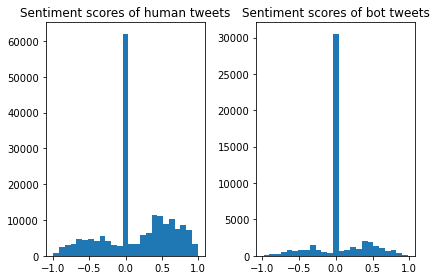

In [24]:
print(verified_tweets["sentiment_score"].describe())
print(botwiki_tweets["sentiment_score"].describe())

n_bins = 25

fig, axs = plt.subplots(1, 2, tight_layout=True)
axs[0].hist(verified_tweets['sentiment_score'], bins=n_bins)
axs[0].set_title("Sentiment scores of human tweets")
axs[1].hist(botwiki_tweets['sentiment_score'], bins=n_bins)
axs[1].set_title("Sentiment scores of bot tweets")
plt.show()

In [25]:
def calculateAverageSentiment(users, tweets):
    curr_ID = users['ID'][0]
    user_index = 0
    tweet_count = 0
    sentiment_count = 0.0

    users['Average_Tweet_Sentiment'] = 0.0
    for index, tweet in tweets.iterrows():
        if curr_ID != tweet['User_ID']:
            if tweet_count != 0:
                users['Average_Tweet_Sentiment'][user_index] = sentiment_count / tweet_count
            user_index += 1
            tweet_count = 0
            sentiment_count = 0
            curr_ID = tweet['User_ID']
        tweet_count += 1
        sentiment_count += tweet['sentiment_score']

    if tweet_count != 0:
        users['Average_Tweet_Sentiment'][user_index] = sentiment_count / tweet_count
    
    return users

In [26]:
verified_users = calculateAverageSentiment(verified_users, verified_tweets)
botwiki_users = calculateAverageSentiment(botwiki_users, botwiki_tweets)

/tmp/ipykernel_6437/2176482200.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users['Average_Tweet_Sentiment'][user_index] = sentiment_count / tweet_count
/tmp/ipykernel_6437/2176482200.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users['Average_Tweet_Sentiment'][user_index] = sentiment_count / tweet_count


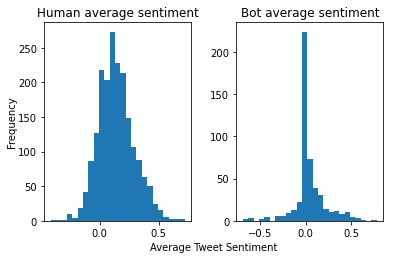

In [27]:
n_bins = 25

fig, axs = plt.subplots(1, 2, tight_layout=True)
axs[0].hist(verified_users['Average_Tweet_Sentiment'], bins=n_bins)
axs[0].set_title('Human average sentiment')
axs[1].hist(botwiki_users['Average_Tweet_Sentiment'], bins=n_bins)
axs[1].set_title('Bot average sentiment')
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel('Average Tweet Sentiment')
plt.ylabel('Frequency')
plt.show()

# Patterns in posting history

There's gotta be a statistic for measuring this segmentation/clustering besides standard deviation. <br />
Needs to consider that hour 23 and hour 0 are right next to each other in reality.
would it be better to record tweets since a point in time instead of x amount of tweets?

In [28]:
import statsmodels.api as sm
from statsmodels.graphics import tsaplots

def bin_posting_history(tweets):
    tweets_of_user = []

    #round time stamps
    for index, tweet in tweets.iterrows():
        tweets_of_user.append(tweet['Date'].round('H'))
        
    #create bins
    hour_range = pd.date_range(min(tweets_of_user).floor('h'), max(tweets_of_user).ceil('h'), freq = 'h')
    unique_hours = dict.fromkeys(hour_range, 0)

    curr_hour = tweets_of_user[0]
    tweet_count = 0

    for time in tweets_of_user:
        if curr_hour != time:
            unique_hours.update({curr_hour: tweet_count})
            tweet_count = 0
            curr_hour = time
        tweet_count += 1

    if tweet_count != 0:
        unique_hours.update({curr_hour: tweet_count})

    return pd.DataFrame(list(unique_hours.items()), columns=['Hour', 'Frequency'])

def autocorrelation_posting_history(all_users, all_tweets):
    acf_values = []
    for index, user in all_users.iterrows():
        acf_values.append(bin_posting_history(all_tweets[all_tweets['User_ID'] == user['ID']]))
    all_users = all_users.assign(acf=acf_values)
    return all_users

In [29]:
verified_users = autocorrelation_posting_history(verified_users, verified_tweets)
botwiki_users = autocorrelation_posting_history(botwiki_users, botwiki_tweets)

In [30]:
print(verified_users.head(5))

          ID  Average_Tweet_Sentiment  \
0   54619276                 0.010167   
1  948891169                 0.211653   
2   26042984                 0.210488   
3    8283682                -0.015762   
4  311062620                 0.145295   

                                                 acf  
0                     Hour  Frequency
0   2022-06...  
1                      Hour  Frequency
0    2022-...  
2                       Hour  Frequency
0     202...  
3                     Hour  Frequency
0   2022-05...  
4                     Hour  Frequency
0   2022-06...  


/home/austinteng/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/home/austinteng/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


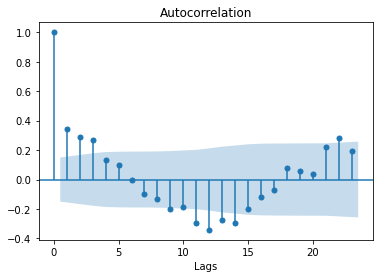

In [31]:
import statsmodels.api as sm
from statsmodels.graphics import tsaplots

sm.tsa.acf(verified_users['acf'][0]['Frequency'])

fig = tsaplots.plot_acf(verified_users['acf'][0]['Frequency'])
plt.xlabel('Lags')
plt.show()

# Statistical Tests

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

def generate_distribution_histogram(dataframe, 
                                    column_name, 
                                    title, x_axis_label, y_axis_label,
                                    label_name,
                                    number_bins = 15):
    """
    This function generates a histogram.
    Args:
        dataframe:
        column_name: String. Name of the column whose distribution we
        want to visualize.
        title: String. Title of the histogram.
        x_axis_label: String. X-axis label.
        y_axis_label: String. Y-axis label.
    Outputs:
        Histogram containing distribution for specific column column_name.
    """
    plt.hist(dataframe[column_name], bins = number_bins, label = label_name)
    plt.title(title)
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    plt.legend(loc='upper right')
    
def mann_whitney_u_test(distribution_1, distribution_2):
    """
    Perform the Mann-Whitney U Test, comparing two different distributions.
    Args:
       distribution_1: List. First distribution that we want to compare.
       distribution_2: List. Second distribution that we want to compare.
    Outputs:
        u_statistic: Float. U statisitic for the test.
        p_value: Float. p-value for the test.
    """
    u_statistic, p_value = stats.mannwhitneyu(distribution_1, distribution_2)
    #Print the results
    print('U-Statistic: ', u_statistic)
    print('p-value: ', p_value)
    return u_statistic, p_value

U-Statistic:  768857.0
p-value:  1.9475937610398338e-93


(768857.0, 1.9475937610398338e-93)

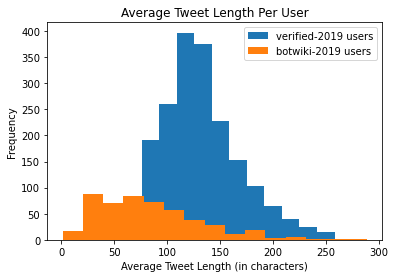

In [37]:
generate_distribution_histogram(verified_users, 'Average_Tweet_Length',
                               title = 'Average Tweet Length Per User',
                               x_axis_label = 'Average Tweet Length (in characters)',
                               y_axis_label = 'Frequency',
                               label_name = 'verified-2019 users')
generate_distribution_histogram(botwiki_users, 'Average_Tweet_Length',
                               title = 'Average Tweet Length Per User',
                               x_axis_label = 'Average Tweet Length (in characters)',
                               y_axis_label = 'Frequency',
                               label_name = 'botwiki-2019 users')
mann_whitney_u_test(list(verified_users['Average_Tweet_Length']), list(botwiki_users['Average_Tweet_Length']))

U-Statistic:  385366.0
p-value:  2.7553189826743513e-12


(385366.0, 2.7553189826743513e-12)

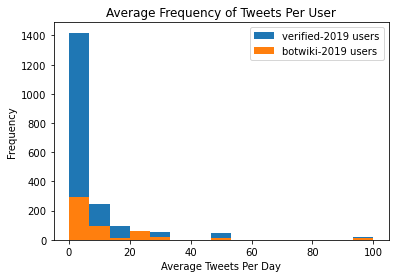

In [38]:
generate_distribution_histogram(verified_users, 'Average_Tweets_Per_Day',
                               title = 'Average Frequency of Tweets Per User',
                               x_axis_label = 'Average Tweets Per Day',
                               y_axis_label = 'Frequency',
                               label_name = 'verified-2019 users')
generate_distribution_histogram(botwiki_users, 'Average_Tweets_Per_Day',
                               title = 'Average Frequency of Tweets Per User',
                               x_axis_label = 'Average Tweets Per Day',
                               y_axis_label = 'Frequency',
                               label_name = 'botwiki-2019 users')
mann_whitney_u_test(list(verified_users['Average_Tweets_Per_Day']), list(botwiki_users['Average_Tweets_Per_Day']))

U-Statistic:  669809.0
p-value:  4.445664328778359e-41


(669809.0, 4.445664328778359e-41)

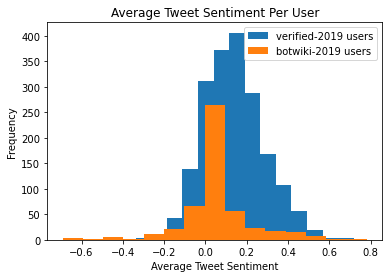

In [39]:
generate_distribution_histogram(verified_users, 'Average_Tweet_Sentiment',
                               title = 'Average Tweet Sentiment Per User',
                               x_axis_label = 'Average Tweet Sentiment',
                               y_axis_label = 'Frequency',
                               label_name = 'verified-2019 users')
generate_distribution_histogram(botwiki_users, 'Average_Tweet_Sentiment',
                               title = 'Average Tweet Sentiment Per User',
                               x_axis_label = 'Average Tweet Sentiment',
                               y_axis_label = 'Frequency',
                               label_name = 'botwiki-2019 users')
mann_whitney_u_test(list(verified_users['Average_Tweet_Sentiment']), list(botwiki_users['Average_Tweet_Sentiment']))

Min Bot = @ANWarriorBot - Generates posts of America Ninja Warrior contestants that are unfortunately doomed to fail <br />
Max Bot = @FixmeBot - Kindly requests people to fix lacking wikipedia posts <br />
Min Human = @Netwerk24 - German news station? <br />
Max Human = @timsilfies - A person with one tweet? <br />

# User Information WIP

In [11]:
import urllib3
from lxml.html import parse

#returns list(retweet users),list(favorite users) for a given screen_name and status_id
def get_twitter_user_rts_and_favs(screen_name, status_id):
    url = urllib3.urlopen('https://twitter.com/' + screen_name + '/status/' + status_id)
    root = parse(url).getroot()

    num_rts = 0
    num_favs = 0
    rt_users = []
    fav_users = []

    for ul in root.find_class('stats'):
        for li in ul.cssselect('li'):

            cls_name = li.attrib['class']

            if cls_name.find('retweet') >= 0:
                num_rts = int(li.cssselect('a')[0].attrib['data-tweet-stat-count'])

            elif cls_name.find('favorit') >= 0:
                num_favs = int(li.cssselect('a')[0].attrib['data-tweet-stat-count'])

            elif cls_name.find('avatar') >= 0 or cls_name.find('face-pile') >= 0:#else face-plant

                for users in li.cssselect('a'):
                    #apparently, favs are listed before retweets, but the retweet summary's listed before the fav summary
                    #if in doubt you can take the difference of returned uids here with retweet uids from the official api
                    if num_favs > 0:#num_rt > 0:
                        #num_rts -= 1
                        num_favs -= 1
                        #rt_users.append(users.attrib['data-user-id'])
                        fav_users.append(users.attrib['data-user-id'])
                    else:                        
                        #fav_users.append(users.attrib['data-user-id'])
                        rt_users.append(users.attrib['data-user-id'])

        return rt_users, fav_users

In [13]:
def get_twitter_user_rts_and_favs(screen_name, status_id):
    http = urllib3.PoolManager()

In [15]:
http = urllib3.PoolManager()
r = http.request('GET', 'https://twitter.com/ithinkitsk8idk/status/1539507739268874241')
r.data

b'<!DOCTYPE html>\n<html dir="ltr" lang="en">\n<meta charset="utf-8" />\n<meta name="viewport" content="width=device-width,initial-scale=1,maximum-scale=1,user-scalable=0,viewport-fit=cover" /><link rel="preconnect" href="//abs.twimg.com" /><link rel="dns-prefetch" href="//abs.twimg.com" /><link rel="preconnect" href="//api.twitter.com" /><link rel="dns-prefetch" href="//api.twitter.com" /><link rel="preconnect" href="//pbs.twimg.com" /><link rel="dns-prefetch" href="//pbs.twimg.com" /><link rel="preconnect" href="//t.co" /><link rel="dns-prefetch" href="//t.co" /><link rel="preconnect" href="//video.twimg.com" /><link rel="dns-prefetch" href="//video.twimg.com" /><link rel="preload" as="script" crossorigin="anonymous" href="https://abs.twimg.com/responsive-web/client-web-legacy/polyfills.5d5e8428.js" nonce="MjY5NzU2ODgtNzNkYS00NzVlLWFmY2QtY2VlNzg5OWJhNjUy" /><link rel="preload" as="script" crossorigin="anonymous" href="https://abs.twimg.com/responsive-web/client-web-legacy/vendors~mai

In [12]:
get_twitter_user_rts_and_favs("ithinkitsk8idk", "1539378137900929024")

AttributeError: module 'urllib3' has no attribute 'urlopen'

# Personal food for thought

**Some tweets may not be in English!**


https://www.quora.com/How-do-you-know-if-a-user-is-a-real-person-or-an-AI-bot-on-social-media?share=1

Should I target a specific type of bot?

Engagement? <br />
Search through liked by or retweeted by list on a tweet and determine how many of those accounts were sus <br />
API only allows most recent 100 retweets and 100 likes for tweets <br />
    * Web scraper may be possible instead

Narrative? <br />
Identify based on text? <br />
Network of fake engagement? <br />
Based purely on timings <br />